# INTEGRATE Synthetic Case Study example with different noise models
Demonstrates the use of different noise models with tTEM data 
using an example using inverting data obtained from synthetic reference model



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True



Notebook detected. Parallel processing is OK


# Create The reference model and data

In [ ]:


# select the type of referenc model
z_max = 60
rho = [120,10,120]
dx=.5
case = '3layer' # 'Wedge', '3layer', 'Wedge2', 'Wedge3'
if case.lower() == 'wedge':
    # Make Wedge MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, z_max=z_max, dz=.5, x_max=100, dx=dx, z1=15, rho = rho)
elif case.lower() == '3layer':
    # Make 3 layer MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], x_max = 100, x_range = 10)

# Create reference data
f_data_h5 = '%s_%d' % (case,z_max)    
thickness = np.diff(z_ref)
# Get a GEX file to use for creation of data
file_gex = ig.get_case_data(case='DAUGAARD', filelist=['TX07_20231016_2x4_RC20-33.gex'])[0]

# Compute the noise free reference data
D_ref = ig.forward_gaaem(C=1./M_ref, thickness=thickness, file_gex=file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD


gatdaem1d:  24%|████████████████████▏                                                                 | 47/200 [00:01<00:03, 46.90it/s]

## Plot the reference model and data

In [ ]:


plt.subplot(2,1,1)
xx_ref, zz_ref = np.meshgrid(x_ref, z_ref)
plt.pcolormesh(xx_ref, zz_ref, M_ref.T)
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.axis('equal')
plt.gca().invert_yaxis()
plt.colorbar(label='Resistivity (Ohm-m)')

plt.subplot(2,1,2)
plt.semilogy(x_ref, D_ref)
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Amplitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



## Create prior model and data

make prior model realizations


gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   1%|█                                                                                                                                                                       | 47/7813 [00:01<02:48, 46.14it/s]

gatdaem1d:   1%|█                                                                                                                                                                       | 47/7813 [00:01<02:46, 46.66it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 34/7813 [00:01<03:49, 33.97it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 45/7813 [00:01<02:55, 44.25it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 46/7813 [00:01<02:49, 45.78it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 34/7813 [00:01<03:52, 33.51it/s]

gatdaem1d:   1%|█                                                                                                                                                                       | 48/7813 [00:01<02:44, 47.14it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 34/7813 [00:01<03:51, 33.65it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 33/7813 [00:01<03:56, 32.94it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 46/7813 [00:01<02:48, 45.99it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 35/7813 [00:01<03:45, 34.43it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7812 [00:01<03:40, 35.26it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7813 [00:01<03:41, 35.08it/s]

gatdaem1d:   1%|█                                                                                                                                                                       | 47/7813 [00:01<02:48, 46.09it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7813 [00:01<03:42, 34.93it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 34/7813 [00:01<03:54, 33.19it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 35/7812 [00:01<03:45, 34.52it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7812 [00:01<03:40, 35.32it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 33/7813 [00:01<04:02, 32.12it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 44/7812 [00:01<02:58, 43.48it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 34/7812 [00:01<03:49, 33.91it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 46/7812 [00:01<02:50, 45.58it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 46/7812 [00:01<02:50, 45.65it/s]

gatdaem1d:   1%|█                                                                                                                                                                       | 47/7812 [00:01<02:50, 45.57it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7812 [00:01<03:38, 35.65it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 44/7812 [00:01<02:59, 43.18it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 36/7812 [00:01<03:40, 35.23it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 44/7812 [00:01<02:58, 43.44it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 43/7812 [00:01<03:03, 42.27it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 45/7812 [00:01<02:56, 44.09it/s]

gatdaem1d:   0%|▊                                                                                                                                                                       | 35/7812 [00:01<03:48, 34.05it/s]

gatdaem1d:   1%|▉                                                                                                                                                                       | 42/7812 [00:01<03:09, 40.99it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 69/7813 [00:02<03:44, 34.51it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 69/7813 [00:02<03:45, 34.34it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 94/7813 [00:02<02:48, 45.69it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 93/7813 [00:02<02:47, 46.01it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 70/7813 [00:02<03:42, 34.74it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 77/7813 [00:02<03:16, 39.28it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 69/7813 [00:02<03:47, 34.02it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 73/7812 [00:02<03:35, 35.98it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 94/7813 [00:02<02:46, 46.44it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 73/7813 [00:02<03:36, 35.73it/s]

gatdaem1d:   1%|█▊                                                                                                                                                                      | 82/7812 [00:02<03:06, 41.54it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 77/7813 [00:02<03:18, 38.94it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 93/7812 [00:02<02:48, 45.80it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 92/7812 [00:02<02:48, 45.85it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 70/7812 [00:02<03:45, 34.41it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 78/7812 [00:02<03:16, 39.44it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 88/7812 [00:02<02:57, 43.43it/s]

gatdaem1d:   1%|█▊                                                                                                                                                                      | 82/7812 [00:02<03:07, 41.32it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 88/7812 [00:02<02:58, 43.21it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 88/7812 [00:02<02:57, 43.54it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 69/7813 [00:02<03:51, 33.46it/s]

gatdaem1d:   1%|█▊                                                                                                                                                                      | 87/7812 [00:02<03:00, 42.80it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 71/7813 [00:02<03:48, 33.84it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 90/7812 [00:02<02:56, 43.78it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 72/7812 [00:02<03:44, 34.45it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 79/7812 [00:02<03:15, 39.65it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 90/7813 [00:02<03:20, 38.56it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 94/7813 [00:02<03:13, 39.93it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 96/7813 [00:02<03:08, 40.96it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 92/7813 [00:02<03:13, 39.94it/s]

gatdaem1d:   1%|█▊                                                                                                                                                                      | 83/7812 [00:02<03:21, 38.35it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 92/7812 [00:02<03:13, 39.83it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 104/7813 [00:03<03:42, 34.59it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 104/7813 [00:03<03:45, 34.23it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 140/7813 [00:03<02:47, 45.69it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 105/7813 [00:03<03:43, 34.43it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 141/7813 [00:03<02:45, 46.40it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 128/7812 [00:03<02:57, 43.37it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 139/7812 [00:03<02:47, 45.81it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 109/7812 [00:03<03:36, 35.60it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 121/7813 [00:03<03:07, 41.03it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 138/7812 [00:03<02:47, 45.78it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 109/7813 [00:03<03:37, 35.46it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 104/7813 [00:03<03:49, 33.58it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 132/7812 [00:03<02:56, 43.51it/s]

gatdaem1d:   1%|██▍                                                                                                                                                                    | 114/7812 [00:03<03:20, 38.44it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 132/7812 [00:03<02:57, 43.23it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 131/7812 [00:03<02:57, 43.25it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 129/7812 [00:03<02:56, 43.50it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 103/7813 [00:03<03:49, 33.56it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 105/7813 [00:03<03:47, 33.83it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 132/7812 [00:03<02:57, 43.30it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 123/7812 [00:03<03:05, 41.40it/s]

gatdaem1d:   1%|██▍                                                                                                                                                                    | 116/7812 [00:03<03:20, 38.46it/s]

gatdaem1d:   1%|██▌                                                                                                                                                                    | 117/7813 [00:03<03:34, 35.94it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 134/7813 [00:03<03:08, 40.66it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 118/7812 [00:03<03:29, 36.69it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 140/7813 [00:03<03:09, 40.56it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 125/7812 [00:03<03:14, 39.46it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 134/7812 [00:03<03:12, 39.84it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 135/7813 [00:03<03:21, 38.04it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 133/7813 [00:03<03:22, 37.87it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 138/7813 [00:03<03:19, 38.46it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 133/7812 [00:03<03:22, 37.84it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 149/7813 [00:04<03:20, 38.18it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 187/7813 [00:04<02:46, 45.92it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 139/7813 [00:04<03:44, 34.20it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 188/7813 [00:04<02:43, 46.50it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 140/7813 [00:04<03:43, 34.26it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 165/7813 [00:04<03:01, 42.12it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 175/7812 [00:04<02:51, 44.57it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 138/7813 [00:04<03:47, 33.71it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 146/7812 [00:04<03:33, 35.88it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 186/7812 [00:04<02:46, 45.89it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 185/7812 [00:04<02:46, 45.87it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 176/7812 [00:04<02:55, 43.53it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 145/7813 [00:04<03:37, 35.29it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 159/7812 [00:04<03:08, 40.69it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 137/7813 [00:04<03:48, 33.58it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 176/7812 [00:04<02:51, 44.52it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 176/7812 [00:04<02:56, 43.34it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 149/7813 [00:04<03:24, 37.57it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 168/7812 [00:04<02:59, 42.50it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 155/7812 [00:04<03:26, 37.17it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 178/7813 [00:04<03:02, 41.74it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 154/7813 [00:04<03:37, 35.24it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 170/7812 [00:04<03:04, 41.33it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 175/7812 [00:04<03:13, 39.51it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 155/7812 [00:04<03:38, 35.05it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 176/7812 [00:04<03:15, 38.98it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 184/7813 [00:04<03:06, 40.92it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 182/7813 [00:04<03:17, 38.60it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 174/7813 [00:04<03:25, 37.12it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 172/7813 [00:04<03:25, 37.21it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 172/7812 [00:04<03:25, 37.24it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 175/7812 [00:04<03:26, 36.98it/s]

gatdaem1d:   2%|████▏                                                                                                                                                                  | 193/7813 [00:05<03:09, 40.19it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 174/7813 [00:05<03:44, 34.09it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 184/7813 [00:05<03:22, 37.65it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 221/7812 [00:05<02:48, 45.05it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 209/7813 [00:05<02:58, 42.64it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 192/7812 [00:05<03:13, 39.32it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 191/7813 [00:05<03:15, 39.08it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 232/7812 [00:05<02:44, 46.12it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 220/7812 [00:05<02:54, 43.55it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 172/7813 [00:05<03:48, 33.38it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 222/7812 [00:05<02:48, 45.00it/s]

gatdaem1d:   2%|████▏                                                                                                                                                                  | 193/7813 [00:05<03:12, 39.61it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 212/7812 [00:05<02:56, 42.95it/s]

gatdaem1d:   2%|███▋                                                                                                                                                                   | 171/7813 [00:05<03:53, 32.72it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 235/7813 [00:05<02:51, 44.16it/s]

gatdaem1d:   3%|████▏                                                                                                                                                                  | 198/7812 [00:05<03:14, 39.07it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 233/7813 [00:05<03:00, 41.99it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 223/7813 [00:05<02:58, 42.57it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 200/7812 [00:05<03:22, 37.58it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 232/7812 [00:05<03:00, 41.96it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 214/7812 [00:05<03:00, 42.01it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 190/7813 [00:05<03:38, 34.89it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 191/7812 [00:05<03:39, 34.75it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 231/7813 [00:05<02:57, 42.72it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 220/7812 [00:05<03:15, 38.75it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7813 [00:05<03:03, 41.33it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 210/7813 [00:05<03:24, 37.18it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 212/7813 [00:05<03:27, 36.70it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 215/7812 [00:05<03:23, 37.24it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 216/7812 [00:05<03:24, 37.20it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 210/7812 [00:05<03:27, 36.57it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 213/7812 [00:05<03:31, 35.87it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 237/7813 [00:06<03:03, 41.28it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 253/7813 [00:06<02:56, 42.93it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7813 [00:06<03:10, 39.81it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 268/7812 [00:06<02:46, 45.43it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 232/7812 [00:06<03:11, 39.51it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 238/7813 [00:06<03:02, 41.57it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 209/7813 [00:06<03:46, 33.55it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 268/7812 [00:06<02:46, 45.29it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 279/7812 [00:06<02:43, 46.01it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 237/7813 [00:06<03:05, 40.91it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 256/7812 [00:06<02:54, 43.22it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 206/7813 [00:06<03:51, 32.82it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 205/7813 [00:06<03:51, 32.83it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 242/7812 [00:06<03:06, 40.62it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 279/7813 [00:06<02:54, 43.11it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 279/7812 [00:06<02:53, 43.44it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 258/7812 [00:06<02:57, 42.51it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 225/7813 [00:06<03:38, 34.72it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 264/7812 [00:06<03:13, 39.06it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 280/7813 [00:06<03:03, 41.03it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 226/7812 [00:06<03:40, 34.37it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 276/7813 [00:06<02:55, 42.96it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 238/7812 [00:06<03:30, 36.03it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 256/7813 [00:06<03:09, 39.89it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 266/7813 [00:06<03:12, 39.21it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 254/7813 [00:06<03:17, 38.21it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 247/7812 [00:06<03:27, 36.45it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 260/7812 [00:06<03:24, 36.96it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 254/7812 [00:06<03:27, 36.41it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 253/7812 [00:06<03:31, 35.78it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 275/7813 [00:06<03:08, 39.97it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 250/7812 [00:06<03:32, 35.65it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 281/7813 [00:07<02:58, 42.09it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 297/7813 [00:07<02:54, 43.18it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 314/7812 [00:07<02:44, 45.51it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 276/7812 [00:07<03:04, 40.84it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 273/7813 [00:07<03:03, 41.01it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 285/7813 [00:07<02:54, 43.15it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 244/7813 [00:07<03:43, 33.80it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 315/7812 [00:07<02:44, 45.57it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 326/7812 [00:07<02:42, 46.05it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 281/7813 [00:07<03:00, 41.71it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 240/7813 [00:07<03:49, 32.96it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 239/7813 [00:07<03:50, 32.88it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 300/7812 [00:07<02:58, 42.03it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 286/7812 [00:07<03:01, 41.41it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 326/7813 [00:07<02:49, 44.19it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 302/7812 [00:07<02:54, 42.95it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 260/7813 [00:07<03:39, 34.39it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 323/7813 [00:07<02:49, 44.09it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 323/7812 [00:07<03:00, 41.42it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 261/7812 [00:07<03:41, 34.03it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 302/7813 [00:07<02:59, 41.79it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 301/7813 [00:07<03:04, 40.78it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 275/7812 [00:07<03:33, 35.24it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 304/7812 [00:07<03:19, 37.67it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 322/7813 [00:07<03:09, 39.55it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 284/7812 [00:07<03:27, 36.23it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 306/7813 [00:07<03:18, 37.77it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 322/7813 [00:07<02:59, 41.83it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 291/7812 [00:07<03:30, 35.69it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 298/7812 [00:07<03:28, 36.04it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 290/7812 [00:07<03:33, 35.27it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 286/7812 [00:07<03:35, 34.89it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 325/7813 [00:08<02:55, 42.61it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 316/7813 [00:08<03:00, 41.63it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 341/7813 [00:08<02:52, 43.34it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 322/7812 [00:08<02:57, 42.26it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 361/7812 [00:08<02:43, 45.62it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 331/7813 [00:08<02:51, 43.73it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 278/7813 [00:08<03:43, 33.76it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 361/7812 [00:08<02:44, 45.31it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 324/7813 [00:08<02:58, 42.00it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 373/7812 [00:08<02:43, 45.51it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 273/7813 [00:08<03:49, 32.87it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 328/7812 [00:08<02:59, 41.58it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 272/7813 [00:08<03:50, 32.66it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 343/7812 [00:08<02:58, 41.94it/s]

gatdaem1d:   4%|███████▍                                                                                                                                                               | 345/7812 [00:08<02:56, 42.38it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 343/7813 [00:08<03:02, 41.01it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 345/7813 [00:08<02:59, 41.52it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 295/7813 [00:08<03:50, 32.57it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 362/7813 [00:08<03:08, 39.58it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 371/7813 [00:08<03:10, 39.07it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 296/7812 [00:08<03:54, 32.07it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 365/7813 [00:08<03:00, 41.29it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 311/7812 [00:08<03:48, 32.77it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 321/7812 [00:08<03:38, 34.24it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 365/7812 [00:08<03:19, 37.34it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 343/7812 [00:08<03:35, 34.73it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 368/7813 [00:08<03:11, 38.97it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 327/7812 [00:08<03:43, 33.45it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 345/7813 [00:09<03:34, 34.76it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 321/7812 [00:08<03:46, 33.04it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 335/7812 [00:09<03:43, 33.50it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 326/7812 [00:09<03:48, 32.70it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 368/7813 [00:09<02:58, 41.66it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 358/7813 [00:09<03:02, 40.84it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 365/7812 [00:09<02:59, 41.44it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 375/7813 [00:09<02:55, 42.47it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 367/7813 [00:09<03:01, 41.01it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 312/7813 [00:09<03:35, 34.76it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 407/7812 [00:09<02:49, 43.69it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 312/7813 [00:09<03:53, 32.12it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 370/7812 [00:09<03:00, 41.13it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 419/7812 [00:09<02:48, 43.84it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 385/7812 [00:09<02:59, 41.40it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 407/7812 [00:09<02:54, 42.55it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 306/7813 [00:09<04:05, 30.59it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 388/7812 [00:09<02:58, 41.49it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 387/7813 [00:09<02:57, 41.74it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 328/7813 [00:09<03:49, 32.62it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 407/7813 [00:09<03:00, 40.93it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 385/7813 [00:09<03:22, 36.69it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 387/7813 [00:09<03:09, 39.20it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7813 [00:09<02:53, 42.59it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 329/7812 [00:09<03:57, 31.54it/s]

gatdaem1d:   4%|███████▍                                                                                                                                                               | 345/7812 [00:09<03:47, 32.85it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 367/7812 [00:09<03:18, 37.43it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 412/7813 [00:10<03:16, 37.60it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 412/7813 [00:10<03:03, 40.29it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 361/7812 [00:09<03:43, 33.35it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 379/7812 [00:09<03:36, 34.28it/s]

gatdaem1d:   5%|███████▌                                                                                                                                                               | 356/7812 [00:09<03:43, 33.37it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 360/7812 [00:10<03:47, 32.69it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 412/7813 [00:10<02:55, 42.14it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 381/7813 [00:10<03:38, 34.03it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 369/7812 [00:10<03:46, 32.88it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 404/7812 [00:10<03:28, 35.48it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 401/7813 [00:10<02:59, 41.39it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7812 [00:10<02:53, 42.78it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 420/7813 [00:10<02:51, 43.23it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7813 [00:10<02:57, 41.67it/s]

gatdaem1d:   5%|███████▌                                                                                                                                                               | 355/7813 [00:10<03:20, 37.19it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 452/7812 [00:10<02:47, 44.03it/s]

gatdaem1d:   4%|███████▍                                                                                                                                                               | 346/7813 [00:10<03:49, 32.51it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 464/7812 [00:10<02:46, 44.14it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 414/7812 [00:10<02:57, 41.73it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 428/7812 [00:10<02:57, 41.59it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 340/7813 [00:10<03:57, 31.41it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 450/7812 [00:10<02:58, 41.20it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                                             | 431/7812 [00:10<02:56, 41.79it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                                             | 432/7813 [00:10<02:52, 42.67it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 362/7813 [00:10<03:47, 32.76it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 449/7813 [00:10<03:04, 39.90it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 363/7812 [00:10<03:51, 32.17it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 424/7813 [00:10<03:27, 35.59it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 412/7812 [00:10<03:07, 39.53it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 379/7812 [00:10<03:45, 32.94it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 427/7813 [00:10<03:15, 37.75it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 458/7813 [00:11<02:55, 41.81it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 454/7813 [00:11<03:01, 40.63it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 395/7812 [00:10<03:43, 33.20it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 451/7813 [00:11<03:20, 36.75it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 390/7812 [00:11<03:43, 33.20it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 414/7812 [00:11<03:41, 33.34it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 394/7812 [00:11<03:46, 32.81it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 412/7812 [00:11<03:28, 35.50it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 455/7813 [00:11<02:55, 41.86it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 416/7813 [00:11<03:38, 33.89it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 457/7812 [00:11<02:49, 43.51it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 443/7813 [00:11<02:59, 41.04it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 441/7812 [00:11<03:31, 34.87it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 465/7813 [00:11<02:48, 43.68it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 398/7813 [00:11<03:10, 38.94it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 453/7813 [00:11<02:56, 41.63it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 498/7812 [00:11<02:44, 44.37it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 381/7813 [00:11<03:43, 33.21it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 457/7812 [00:11<02:54, 42.10it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 510/7812 [00:11<02:44, 44.40it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 472/7812 [00:11<02:54, 42.13it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 495/7812 [00:11<02:53, 42.24it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 373/7813 [00:11<03:54, 31.71it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 475/7812 [00:11<02:53, 42.25it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 477/7813 [00:11<02:49, 43.30it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 396/7813 [00:11<03:44, 33.02it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 398/7812 [00:11<03:46, 32.79it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 458/7812 [00:11<02:57, 41.38it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 422/7812 [00:11<03:26, 35.73it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 490/7813 [00:11<03:12, 38.03it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 499/7813 [00:12<02:54, 41.84it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 504/7813 [00:12<02:50, 42.79it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 461/7813 [00:12<03:32, 34.67it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 429/7812 [00:12<03:44, 32.96it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 466/7813 [00:12<03:21, 36.46it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 437/7812 [00:12<03:26, 35.67it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 489/7813 [00:12<03:23, 35.94it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 424/7812 [00:12<03:45, 32.71it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 448/7812 [00:12<03:41, 33.28it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 455/7812 [00:12<03:16, 37.48it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 502/7812 [00:12<02:46, 43.84it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 451/7813 [00:12<03:40, 33.39it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 477/7812 [00:12<03:31, 34.72it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 441/7813 [00:12<03:03, 40.09it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 543/7812 [00:12<02:43, 44.52it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 415/7813 [00:12<03:41, 33.36it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 501/7812 [00:12<02:52, 42.49it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 515/7812 [00:12<02:52, 42.39it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 556/7812 [00:12<02:42, 44.59it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7813 [00:12<03:06, 39.28it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 485/7813 [00:12<03:11, 38.25it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7813 [00:12<03:40, 33.53it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 541/7812 [00:12<02:48, 43.14it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 509/7813 [00:12<02:59, 40.60it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 495/7813 [00:12<03:07, 38.97it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 519/7812 [00:12<02:51, 42.47it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 521/7813 [00:12<02:47, 43.42it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                                             | 430/7813 [00:12<03:42, 33.16it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                                             | 431/7812 [00:12<03:45, 32.67it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 503/7812 [00:12<02:52, 42.28it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 466/7812 [00:12<03:13, 37.98it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 545/7813 [00:13<02:49, 42.77it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 529/7813 [00:13<03:17, 36.93it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 463/7812 [00:13<03:42, 33.03it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7813 [00:13<03:35, 34.03it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 492/7812 [00:13<03:22, 36.23it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 481/7812 [00:13<03:13, 37.84it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 548/7813 [00:13<02:58, 40.77it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 498/7812 [00:13<03:07, 38.97it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 467/7812 [00:13<03:26, 35.48it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 503/7813 [00:13<03:24, 35.82it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 526/7813 [00:13<03:25, 35.44it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 548/7812 [00:13<02:44, 44.21it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 486/7813 [00:13<03:37, 33.65it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 484/7813 [00:13<02:58, 40.95it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 513/7812 [00:13<03:29, 34.88it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 588/7812 [00:13<02:41, 44.62it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 449/7813 [00:13<03:39, 33.54it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 558/7812 [00:13<02:50, 42.53it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 545/7812 [00:13<02:50, 42.54it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 601/7812 [00:13<02:41, 44.64it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 586/7812 [00:13<02:45, 43.62it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 563/7812 [00:13<02:49, 42.64it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 537/7813 [00:13<03:15, 37.24it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 445/7813 [00:13<03:45, 32.63it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 567/7813 [00:13<02:44, 43.93it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 524/7813 [00:13<03:20, 36.37it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 464/7813 [00:13<03:41, 33.13it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 551/7813 [00:13<03:09, 38.36it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 535/7813 [00:13<03:17, 36.92it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 465/7812 [00:13<03:43, 32.80it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 549/7812 [00:13<02:48, 43.20it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 509/7812 [00:13<03:05, 39.42it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 590/7813 [00:14<02:46, 43.39it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7812 [00:14<03:42, 32.83it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 535/7812 [00:14<03:11, 38.04it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 567/7813 [00:14<03:19, 36.29it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 541/7812 [00:14<03:01, 39.98it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 548/7813 [00:14<03:10, 38.23it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 532/7813 [00:14<03:36, 33.65it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 511/7812 [00:14<03:13, 37.75it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 562/7813 [00:14<03:27, 35.03it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 520/7813 [00:14<03:37, 33.51it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 520/7812 [00:14<03:19, 36.54it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 549/7812 [00:14<03:27, 35.08it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 633/7812 [00:14<02:41, 44.51it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 483/7813 [00:14<03:38, 33.57it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 601/7812 [00:14<02:49, 42.65it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 593/7812 [00:14<02:49, 42.47it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 589/7812 [00:14<02:48, 42.75it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 590/7813 [00:14<03:08, 38.38it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 525/7813 [00:14<03:06, 39.09it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 646/7812 [00:14<02:44, 43.47it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 606/7812 [00:14<02:48, 42.70it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 488/7813 [00:14<03:25, 35.59it/s]

gatdaem1d:   7%|████████████▍                                                                                                                                                          | 580/7813 [00:14<03:06, 38.69it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 612/7813 [00:14<02:43, 44.08it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 507/7813 [00:14<03:23, 35.97it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 630/7812 [00:14<02:56, 40.64it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 561/7813 [00:14<03:25, 35.32it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 590/7813 [00:14<03:12, 37.58it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 573/7813 [00:14<03:20, 36.05it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 499/7812 [00:14<03:42, 32.88it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 549/7812 [00:15<03:10, 38.08it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 593/7812 [00:15<02:53, 41.60it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 540/7812 [00:15<03:23, 35.74it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 634/7813 [00:15<02:53, 41.31it/s]

gatdaem1d:   7%|████████████▍                                                                                                                                                          | 584/7812 [00:15<02:57, 40.83it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 571/7813 [00:15<03:26, 35.08it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 594/7813 [00:15<02:59, 40.27it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 554/7812 [00:15<03:06, 39.01it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 604/7813 [00:15<03:20, 35.90it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 574/7812 [00:15<03:15, 37.11it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 564/7813 [00:15<03:19, 36.36it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 598/7813 [00:15<03:26, 34.87it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 595/7812 [00:15<03:09, 38.04it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 678/7812 [00:15<02:39, 44.61it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 644/7812 [00:15<02:48, 42.56it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 517/7813 [00:15<03:40, 33.15it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 632/7812 [00:15<02:48, 42.67it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 557/7812 [00:15<03:23, 35.67it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 690/7812 [00:15<02:43, 43.55it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 629/7813 [00:15<03:12, 37.40it/s]

gatdaem1d:   8%|█████████████▉                                                                                                                                                         | 650/7812 [00:15<02:47, 42.78it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 532/7813 [00:15<03:11, 37.97it/s]

gatdaem1d:   8%|█████████████▎                                                                                                                                                         | 623/7813 [00:15<03:00, 39.81it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 636/7812 [00:15<02:59, 40.03it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 658/7813 [00:15<02:41, 44.42it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 565/7813 [00:15<03:18, 36.59it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 550/7813 [00:15<03:12, 37.82it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 615/7813 [00:15<03:11, 37.64it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 597/7813 [00:15<03:29, 34.42it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 533/7812 [00:15<03:40, 33.09it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 628/7813 [00:15<03:17, 36.37it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 672/7812 [00:15<03:04, 38.68it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 578/7812 [00:16<03:19, 36.31it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 628/7812 [00:16<02:52, 41.64it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 639/7813 [00:16<02:52, 41.59it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 597/7812 [00:16<02:59, 40.13it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 588/7812 [00:16<03:17, 36.55it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 607/7813 [00:16<03:27, 34.71it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 640/7813 [00:16<03:21, 35.62it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 607/7813 [00:16<03:08, 38.15it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 635/7812 [00:16<03:04, 38.91it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 633/7813 [00:16<03:26, 34.76it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 641/7812 [00:16<02:58, 40.23it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 723/7812 [00:16<02:39, 44.49it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 676/7813 [00:16<03:01, 39.26it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 559/7813 [00:16<03:22, 35.74it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 612/7812 [00:16<03:21, 35.70it/s]

gatdaem1d:   9%|███████████████▋                                                                                                                                                       | 736/7812 [00:16<02:40, 44.05it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 675/7813 [00:16<03:00, 39.57it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 593/7812 [00:16<03:31, 34.08it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 576/7813 [00:16<03:02, 39.61it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 693/7812 [00:16<02:47, 42.39it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 681/7812 [00:16<02:52, 41.26it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 667/7813 [00:16<02:55, 40.83it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 703/7813 [00:16<02:39, 44.53it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 687/7812 [00:16<03:01, 39.27it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 588/7813 [00:16<03:11, 37.76it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 675/7812 [00:16<03:04, 38.75it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 603/7813 [00:16<03:23, 35.44it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 658/7813 [00:16<03:03, 39.01it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 567/7812 [00:16<03:38, 33.12it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 632/7813 [00:17<03:31, 34.00it/s]

gatdaem1d:   9%|██████████████▏                                                                                                                                                        | 665/7813 [00:17<03:17, 36.12it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 712/7812 [00:17<03:09, 37.42it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 685/7813 [00:17<02:47, 42.63it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 641/7812 [00:17<02:54, 41.01it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 631/7812 [00:17<03:08, 38.17it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 685/7813 [00:17<03:06, 38.26it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 615/7812 [00:17<03:24, 35.26it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 642/7813 [00:17<03:29, 34.21it/s]

gatdaem1d:   8%|█████████████▉                                                                                                                                                         | 650/7813 [00:17<03:01, 39.49it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 685/7812 [00:17<02:52, 41.33it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 768/7812 [00:17<02:37, 44.60it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 668/7813 [00:17<03:25, 34.69it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 602/7813 [00:17<03:10, 37.84it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 670/7812 [00:17<03:03, 38.98it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 675/7812 [00:17<03:08, 37.96it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 716/7813 [00:17<03:06, 38.13it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 781/7812 [00:17<02:39, 44.21it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 648/7812 [00:17<03:24, 35.02it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 720/7813 [00:17<02:53, 40.98it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 636/7812 [00:17<03:16, 36.53it/s]

gatdaem1d:   9%|███████████████▋                                                                                                                                                       | 736/7812 [00:17<02:46, 42.50it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 618/7813 [00:17<02:59, 40.08it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 748/7813 [00:17<02:38, 44.63it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 709/7813 [00:17<02:59, 39.62it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 723/7812 [00:17<03:00, 39.21it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 626/7813 [00:17<03:18, 36.21it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 701/7813 [00:17<02:57, 40.00it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 727/7812 [00:17<03:10, 37.10it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 639/7813 [00:17<03:25, 34.83it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 715/7812 [00:17<03:12, 36.80it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 601/7812 [00:17<03:37, 33.12it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 667/7813 [00:18<03:31, 33.84it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 702/7813 [00:18<03:19, 35.56it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 757/7812 [00:18<02:59, 39.35it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 731/7813 [00:18<02:43, 43.41it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 674/7812 [00:18<03:00, 39.54it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 730/7813 [00:18<02:56, 40.14it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 683/7812 [00:18<02:56, 40.44it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 693/7813 [00:18<02:56, 40.45it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 730/7812 [00:18<02:47, 42.39it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 677/7813 [00:18<03:29, 34.10it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 813/7812 [00:18<02:36, 44.63it/s]

gatdaem1d:   8%|█████████████▉                                                                                                                                                         | 651/7812 [00:18<03:27, 34.55it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 703/7813 [00:18<03:25, 34.55it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 645/7813 [00:18<03:02, 39.33it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 713/7812 [00:18<02:57, 40.05it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 827/7812 [00:18<02:37, 44.48it/s]

gatdaem1d:  10%|████████████████▎                                                                                                                                                      | 765/7813 [00:18<02:47, 42.02it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 714/7812 [00:18<03:12, 36.93it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 679/7812 [00:18<03:06, 38.21it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 684/7812 [00:18<03:28, 34.13it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 755/7813 [00:18<03:11, 36.93it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 780/7812 [00:18<02:44, 42.73it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7813 [00:18<02:37, 44.50it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 659/7813 [00:18<03:10, 37.62it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 769/7812 [00:18<03:03, 38.31it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 745/7813 [00:18<02:52, 40.91it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 749/7813 [00:19<03:08, 37.40it/s]

gatdaem1d:   8%|██████████████▏                                                                                                                                                        | 663/7813 [00:19<03:22, 35.39it/s]

gatdaem1d:  10%|████████████████▎                                                                                                                                                      | 763/7812 [00:19<03:07, 37.58it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 675/7813 [00:19<03:27, 34.44it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 636/7812 [00:18<03:34, 33.42it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 701/7813 [00:19<03:32, 33.53it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 753/7812 [00:19<03:17, 35.81it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 738/7813 [00:19<03:20, 35.32it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 802/7812 [00:19<02:51, 40.76it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 717/7812 [00:19<02:55, 40.42it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 720/7813 [00:19<03:13, 36.63it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 737/7813 [00:19<02:51, 41.30it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 858/7812 [00:19<02:35, 44.67it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 748/7813 [00:19<03:08, 37.52it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 771/7813 [00:19<03:00, 39.03it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 775/7813 [00:19<02:49, 41.62it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 688/7813 [00:19<02:56, 40.29it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 686/7812 [00:19<03:29, 33.99it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 756/7812 [00:19<02:53, 40.79it/s]

gatdaem1d:  11%|██████████████████▋                                                                                                                                                    | 872/7812 [00:19<02:35, 44.54it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 724/7812 [00:19<03:07, 37.88it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 810/7813 [00:19<02:43, 42.77it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 773/7812 [00:19<02:56, 39.79it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 759/7812 [00:19<03:00, 39.09it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 723/7812 [00:19<02:58, 39.63it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 722/7812 [00:19<03:23, 34.90it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 839/7813 [00:19<02:36, 44.69it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7813 [00:19<03:13, 36.22it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 788/7813 [00:19<02:49, 41.51it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 823/7812 [00:19<02:56, 39.51it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 813/7812 [00:19<02:56, 39.75it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 670/7812 [00:20<03:35, 33.10it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 710/7813 [00:20<03:29, 33.97it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 699/7813 [00:20<03:25, 34.61it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 746/7813 [00:20<03:12, 36.63it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 698/7813 [00:20<03:18, 35.83it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 801/7812 [00:20<03:11, 36.70it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 787/7813 [00:20<03:14, 36.20it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 775/7813 [00:20<03:18, 35.49it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 848/7812 [00:20<02:45, 42.09it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 790/7812 [00:20<03:21, 34.85it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 759/7812 [00:20<02:52, 40.82it/s]

gatdaem1d:  10%|████████████████▎                                                                                                                                                      | 763/7813 [00:20<03:03, 38.48it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 781/7813 [00:20<02:47, 41.96it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 903/7812 [00:20<02:34, 44.71it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7813 [00:20<02:56, 39.67it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 731/7813 [00:20<02:52, 41.07it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 799/7812 [00:20<02:49, 41.38it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 721/7812 [00:20<03:31, 33.53it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 768/7812 [00:20<02:58, 39.42it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 811/7813 [00:20<03:07, 37.31it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 855/7813 [00:20<02:40, 43.27it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 817/7813 [00:20<02:57, 39.39it/s]

gatdaem1d:  10%|████████████████▎                                                                                                                                                      | 763/7812 [00:20<03:00, 39.06it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 885/7813 [00:20<02:34, 44.79it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 799/7812 [00:20<03:06, 37.67it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 814/7812 [00:20<03:04, 37.95it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 758/7812 [00:20<03:27, 34.05it/s]

gatdaem1d:  12%|███████████████████▌                                                                                                                                                   | 917/7812 [00:20<02:47, 41.18it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 830/7813 [00:20<03:15, 35.69it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 831/7813 [00:20<02:46, 41.83it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 714/7812 [00:21<03:16, 36.13it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 788/7813 [00:21<03:04, 38.08it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 740/7813 [00:21<03:15, 36.20it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 741/7813 [00:21<03:08, 37.59it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 846/7812 [00:21<02:59, 38.85it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 745/7813 [00:21<03:29, 33.68it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 894/7812 [00:21<02:40, 43.00it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 854/7812 [00:21<03:06, 37.31it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 811/7813 [00:21<03:18, 35.27it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 863/7812 [00:21<03:10, 36.49it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 824/7813 [00:21<03:18, 35.14it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 826/7812 [00:21<03:21, 34.59it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 807/7813 [00:21<02:55, 39.92it/s]

gatdaem1d:  12%|████████████████████▎                                                                                                                                                  | 951/7812 [00:21<02:30, 45.63it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 825/7813 [00:21<02:45, 42.30it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 839/7813 [00:21<02:48, 41.30it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 775/7813 [00:21<02:48, 41.70it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 800/7812 [00:21<03:02, 38.37it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 755/7812 [00:21<03:29, 33.66it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 812/7812 [00:21<02:52, 40.56it/s]

gatdaem1d:  12%|███████████████████▏                                                                                                                                                   | 900/7813 [00:21<02:38, 43.71it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 841/7812 [00:21<02:57, 39.29it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 849/7813 [00:21<03:10, 36.59it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 930/7813 [00:21<02:33, 44.73it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 844/7812 [00:21<02:55, 39.70it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 857/7813 [00:21<03:03, 37.83it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7812 [00:21<03:27, 33.75it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 853/7812 [00:21<03:07, 37.02it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 803/7812 [00:21<03:10, 36.87it/s]

gatdaem1d:  11%|██████████████████▋                                                                                                                                                    | 875/7813 [00:21<02:43, 42.36it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 866/7813 [00:22<03:21, 34.56it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 959/7812 [00:21<02:54, 39.30it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 758/7812 [00:22<03:04, 38.20it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 783/7813 [00:22<03:04, 38.09it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 780/7813 [00:22<03:05, 37.91it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 891/7812 [00:22<02:51, 40.43it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 779/7813 [00:22<03:29, 33.53it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 939/7812 [00:22<02:37, 43.55it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 849/7813 [00:22<03:14, 35.90it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 827/7813 [00:22<03:12, 36.24it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 892/7812 [00:22<03:11, 36.06it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 901/7812 [00:22<03:13, 35.64it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 861/7812 [00:22<03:23, 34.14it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 860/7813 [00:22<03:23, 34.22it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 997/7812 [00:22<02:29, 45.55it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 851/7813 [00:22<02:50, 40.84it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 869/7813 [00:22<02:42, 42.62it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 885/7813 [00:22<02:43, 42.45it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 818/7813 [00:22<02:46, 42.08it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 844/7812 [00:22<02:55, 39.76it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 790/7812 [00:22<03:27, 33.80it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 857/7812 [00:22<02:46, 41.69it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 946/7813 [00:22<02:35, 44.18it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 886/7813 [00:22<03:12, 36.06it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 975/7813 [00:22<02:33, 44.60it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 890/7812 [00:22<02:47, 41.31it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 881/7812 [00:22<03:05, 37.34it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 896/7813 [00:22<03:08, 36.68it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 919/7813 [00:22<02:41, 42.69it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 827/7812 [00:22<03:32, 32.80it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 905/7813 [00:23<03:14, 35.52it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 891/7812 [00:22<03:10, 36.42it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 801/7812 [00:23<02:57, 39.61it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 841/7812 [00:23<03:18, 35.19it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 827/7813 [00:23<02:55, 39.70it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 936/7812 [00:23<02:45, 41.66it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 999/7812 [00:23<03:00, 37.78it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 813/7813 [00:23<03:30, 33.33it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 985/7812 [00:23<02:34, 44.05it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 885/7813 [00:23<03:14, 35.63it/s]

gatdaem1d:  10%|█████████████████▌                                                                                                                                                     | 819/7813 [00:23<03:10, 36.67it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 867/7813 [00:23<03:06, 37.28it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 903/7813 [00:23<03:09, 36.44it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1043/7812 [00:23<02:29, 45.39it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 895/7813 [00:23<02:46, 41.51it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 896/7812 [00:23<03:24, 33.85it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 930/7813 [00:23<02:39, 43.18it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 929/7812 [00:23<03:14, 35.31it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 862/7813 [00:23<02:43, 42.46it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 938/7812 [00:23<03:17, 34.83it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 824/7812 [00:23<03:27, 33.73it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 901/7812 [00:23<02:44, 42.13it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 991/7813 [00:23<02:34, 44.22it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 885/7812 [00:23<03:01, 38.12it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 925/7813 [00:23<03:06, 36.89it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1021/7813 [00:23<02:31, 44.84it/s]

gatdaem1d:  12%|███████████████████▍                                                                                                                                                   | 912/7813 [00:23<03:01, 37.95it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 932/7812 [00:23<02:50, 40.31it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 941/7813 [00:24<03:13, 35.44it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 860/7812 [00:23<03:33, 32.54it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 933/7813 [00:24<03:11, 35.90it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 919/7812 [00:23<03:11, 36.04it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 936/7812 [00:24<02:57, 38.75it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 884/7812 [00:24<03:06, 37.16it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 871/7813 [00:24<02:50, 40.82it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 845/7812 [00:24<02:51, 40.63it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 982/7812 [00:24<02:39, 42.87it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 857/7813 [00:24<03:12, 36.18it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 962/7813 [00:24<02:53, 39.53it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1030/7812 [00:24<02:34, 43.98it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 921/7813 [00:24<03:14, 35.44it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1038/7812 [00:24<03:03, 36.91it/s]

gatdaem1d:  12%|███████████████████▍                                                                                                                                                   | 911/7813 [00:24<02:57, 38.97it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 946/7813 [00:24<02:59, 38.24it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 856/7813 [00:24<03:17, 35.30it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 930/7812 [00:24<03:25, 33.54it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 906/7813 [00:24<02:41, 42.67it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 981/7812 [00:24<03:05, 36.92it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 965/7812 [00:24<03:18, 34.54it/s]

gatdaem1d:  14%|███████████████████████▏                                                                                                                                              | 1089/7812 [00:24<02:33, 43.72it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1036/7813 [00:24<02:32, 44.39it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 944/7812 [00:24<02:42, 42.25it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 974/7813 [00:24<02:48, 40.70it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 858/7812 [00:24<03:31, 32.84it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 937/7813 [00:24<02:58, 38.56it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 928/7812 [00:24<02:54, 39.36it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1066/7813 [00:24<02:30, 44.81it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 963/7813 [00:24<03:10, 35.93it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 976/7812 [00:24<02:54, 39.08it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 894/7812 [00:24<03:30, 32.84it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 977/7813 [00:25<03:13, 35.37it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 979/7813 [00:25<02:57, 38.49it/s]

gatdaem1d:  12%|████████████████████▎                                                                                                                                                  | 951/7813 [00:25<03:08, 36.31it/s]

gatdaem1d:  12%|████████████████████▍                                                                                                                                                  | 956/7812 [00:25<03:12, 35.68it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 973/7812 [00:25<02:58, 38.22it/s]

gatdaem1d:  12%|███████████████████▌                                                                                                                                                   | 914/7813 [00:25<02:46, 41.39it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 928/7812 [00:25<02:57, 38.87it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1028/7812 [00:25<02:35, 43.51it/s]

gatdaem1d:  12%|███████████████████▏                                                                                                                                                   | 900/7813 [00:25<03:01, 38.15it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1003/7813 [00:25<02:53, 39.34it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7812 [00:25<02:52, 39.07it/s]

gatdaem1d:  12%|████████████████████▍                                                                                                                                                  | 954/7813 [00:25<02:50, 40.13it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 886/7812 [00:25<02:59, 38.59it/s]

gatdaem1d:  12%|████████████████████▍                                                                                                                                                  | 957/7813 [00:25<03:16, 34.80it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 989/7813 [00:25<02:52, 39.53it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 964/7812 [00:25<03:24, 33.54it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 892/7813 [00:25<03:18, 34.91it/s]

gatdaem1d:  12%|████████████████████▎                                                                                                                                                  | 950/7813 [00:25<02:39, 42.93it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1024/7812 [00:25<02:55, 38.59it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1075/7812 [00:25<02:46, 40.35it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                | 1000/7812 [00:25<03:18, 34.35it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 987/7812 [00:25<02:40, 42.44it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1082/7813 [00:25<02:31, 44.56it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 891/7812 [00:25<03:30, 32.85it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 980/7813 [00:25<02:52, 39.59it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 971/7812 [00:25<02:49, 40.34it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1111/7813 [00:25<02:29, 44.68it/s]

gatdaem1d:  15%|████████████████████████                                                                                                                                              | 1133/7812 [00:25<02:45, 40.40it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1016/7813 [00:25<02:56, 38.62it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                | 1000/7813 [00:25<03:09, 35.94it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1023/7813 [00:26<02:49, 40.04it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 927/7812 [00:25<03:30, 32.72it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 993/7812 [00:26<03:10, 35.85it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1013/7813 [00:26<03:15, 34.82it/s]

gatdaem1d:  12%|████████████████████▍                                                                                                                                                  | 957/7813 [00:26<02:44, 41.79it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1016/7812 [00:26<03:00, 37.57it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 971/7812 [00:26<02:51, 39.92it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1074/7812 [00:26<02:32, 44.05it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 989/7813 [00:26<03:13, 35.19it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1012/7812 [00:26<03:04, 36.85it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 944/7813 [00:26<02:53, 39.66it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1129/7812 [00:26<02:43, 40.76it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 997/7813 [00:26<02:47, 40.81it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 929/7812 [00:26<02:53, 39.68it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 992/7813 [00:26<03:17, 34.46it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1032/7813 [00:26<02:47, 40.37it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 994/7813 [00:26<02:38, 43.03it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1043/7813 [00:26<03:02, 37.16it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 998/7812 [00:26<03:24, 33.24it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1067/7812 [00:26<02:50, 39.60it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 928/7813 [00:26<03:20, 34.30it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1035/7812 [00:26<03:20, 33.86it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1030/7812 [00:26<02:40, 42.36it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1127/7813 [00:26<02:30, 44.57it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 924/7812 [00:26<03:31, 32.62it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1014/7812 [00:26<02:45, 41.10it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1023/7813 [00:26<02:48, 40.38it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1116/7812 [00:26<02:53, 38.49it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1156/7813 [00:26<02:29, 44.59it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1037/7813 [00:26<03:10, 35.56it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1174/7812 [00:26<02:51, 38.67it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 961/7812 [00:26<03:27, 33.08it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1068/7813 [00:27<02:43, 41.38it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1056/7813 [00:27<03:01, 37.28it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1048/7813 [00:27<03:14, 34.82it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1029/7812 [00:27<03:12, 35.27it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                | 1000/7813 [00:27<02:42, 42.05it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1013/7812 [00:27<02:48, 40.44it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1119/7812 [00:27<02:31, 44.23it/s]

gatdaem1d:  13%|██████████████████████▍                                                                                                                                               | 1054/7812 [00:27<03:02, 36.94it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 987/7813 [00:27<02:48, 40.53it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1025/7813 [00:27<03:16, 34.47it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1174/7812 [00:27<02:38, 41.85it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1050/7812 [00:27<03:07, 36.11it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1040/7813 [00:27<02:44, 41.30it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1027/7813 [00:27<03:16, 34.56it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1075/7813 [00:27<02:44, 40.96it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 969/7812 [00:27<02:59, 38.17it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1084/7813 [00:27<02:56, 38.11it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1038/7813 [00:27<02:37, 43.00it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1111/7812 [00:27<02:44, 40.70it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1032/7812 [00:27<03:25, 33.02it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 963/7813 [00:27<03:20, 34.15it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1074/7812 [00:27<02:38, 42.61it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1172/7813 [00:27<02:29, 44.56it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1069/7812 [00:27<03:21, 33.55it/s]

gatdaem1d:  12%|████████████████████▍                                                                                                                                                  | 957/7812 [00:27<03:30, 32.64it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1066/7813 [00:27<02:44, 41.10it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1058/7812 [00:27<02:41, 41.75it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1201/7813 [00:27<02:28, 44.59it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1156/7812 [00:27<02:58, 37.23it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1073/7813 [00:27<03:09, 35.57it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1113/7813 [00:28<02:38, 42.39it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 996/7812 [00:28<03:24, 33.40it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7813 [00:28<03:14, 34.59it/s]

gatdaem1d:  14%|███████████████████████▏                                                                                                                                              | 1094/7813 [00:28<03:03, 36.56it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1214/7812 [00:28<02:55, 37.66it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1072/7812 [00:28<03:00, 37.36it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1057/7812 [00:28<02:43, 41.26it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1099/7812 [00:28<02:51, 39.08it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1030/7813 [00:28<02:44, 41.22it/s]

gatdaem1d:  14%|██████████████████████▌                                                                                                                                               | 1060/7813 [00:28<03:17, 34.20it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7813 [00:28<02:41, 41.73it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1220/7812 [00:28<02:34, 42.77it/s]

gatdaem1d:  14%|██████████████████████▌                                                                                                                                               | 1062/7813 [00:28<03:15, 34.58it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1043/7813 [00:28<02:52, 39.28it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1087/7812 [00:28<03:09, 35.53it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1118/7813 [00:28<02:41, 41.44it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1164/7812 [00:28<02:43, 40.67it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1126/7813 [00:28<02:50, 39.16it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1082/7813 [00:28<02:36, 43.07it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1066/7812 [00:28<03:23, 33.08it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1006/7813 [00:28<03:06, 36.54it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1008/7812 [00:28<03:06, 36.47it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1117/7812 [00:28<02:37, 42.51it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1217/7813 [00:28<02:28, 44.44it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 992/7812 [00:28<03:25, 33.19it/s]

gatdaem1d:  14%|███████████████████████▍                                                                                                                                              | 1103/7812 [00:28<03:21, 33.31it/s]

gatdaem1d:  14%|███████████████████████▍                                                                                                                                              | 1101/7812 [00:28<02:39, 42.07it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1110/7813 [00:28<02:40, 41.67it/s]

gatdaem1d:  15%|████████████████████████▍                                                                                                                                             | 1152/7812 [00:28<02:53, 38.47it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1246/7813 [00:28<02:27, 44.56it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1109/7813 [00:28<03:09, 35.38it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1194/7812 [00:28<03:00, 36.59it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1158/7813 [00:29<02:34, 43.03it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1030/7812 [00:29<03:23, 33.40it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1118/7813 [00:29<03:13, 34.52it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1115/7812 [00:29<02:51, 38.94it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1099/7812 [00:29<02:42, 41.33it/s]

gatdaem1d:  14%|████████████████████████                                                                                                                                              | 1131/7813 [00:29<03:05, 35.96it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1252/7812 [00:29<02:58, 36.83it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1139/7812 [00:29<02:49, 39.27it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1073/7813 [00:29<02:41, 41.69it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1264/7812 [00:29<02:31, 43.13it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1127/7813 [00:29<02:38, 42.22it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1095/7813 [00:29<03:17, 34.00it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1097/7813 [00:29<03:15, 34.41it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1162/7813 [00:29<02:38, 41.92it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1123/7812 [00:29<03:09, 35.21it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1170/7813 [00:29<02:44, 40.28it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1126/7813 [00:29<02:35, 42.98it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1100/7812 [00:29<03:22, 33.08it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1049/7813 [00:29<02:56, 38.36it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7813 [00:29<03:00, 37.23it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1046/7812 [00:29<03:04, 36.74it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1160/7812 [00:29<02:36, 42.62it/s]

gatdaem1d:  15%|█████████████████████████▋                                                                                                                                            | 1206/7812 [00:29<02:49, 39.03it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1146/7812 [00:29<03:05, 36.01it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1027/7812 [00:29<03:22, 33.44it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1145/7812 [00:29<02:37, 42.41it/s]

gatdaem1d:  15%|████████████████████████▍                                                                                                                                             | 1153/7813 [00:29<02:39, 41.77it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1291/7813 [00:29<02:26, 44.61it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1191/7812 [00:29<03:02, 36.24it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1262/7813 [00:30<02:39, 40.96it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1145/7813 [00:30<03:08, 35.42it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1203/7813 [00:30<02:31, 43.56it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1231/7812 [00:30<03:01, 36.19it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1066/7812 [00:30<03:17, 34.14it/s]

gatdaem1d:  15%|████████████████████████▍                                                                                                                                             | 1153/7813 [00:30<03:12, 34.65it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1176/7813 [00:30<02:53, 38.36it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1155/7812 [00:30<02:53, 38.44it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1116/7813 [00:30<02:39, 42.02it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1290/7812 [00:30<02:59, 36.34it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1309/7812 [00:30<02:29, 43.60it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1170/7813 [00:30<02:36, 42.35it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1179/7812 [00:30<02:55, 37.72it/s]

gatdaem1d:  14%|████████████████████████                                                                                                                                              | 1130/7813 [00:30<03:17, 33.82it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1136/7813 [00:30<03:07, 35.53it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1141/7812 [00:30<02:52, 38.62it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1167/7812 [00:30<02:56, 37.64it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1213/7813 [00:30<02:41, 40.96it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1170/7813 [00:30<02:33, 43.23it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1205/7813 [00:30<02:42, 40.68it/s]

gatdaem1d:  15%|████████████████████████                                                                                                                                              | 1134/7812 [00:30<03:21, 33.08it/s]

gatdaem1d:  14%|███████████████████████▏                                                                                                                                              | 1089/7813 [00:30<02:54, 38.56it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1203/7812 [00:30<02:34, 42.73it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1251/7812 [00:30<02:41, 40.58it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1190/7812 [00:30<02:53, 38.07it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1121/7813 [00:30<03:05, 36.14it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1189/7812 [00:30<02:35, 42.61it/s]

gatdaem1d:  15%|█████████████████████████▍                                                                                                                                            | 1196/7813 [00:30<02:37, 42.04it/s]

gatdaem1d:  14%|██████████████████████▌                                                                                                                                               | 1061/7812 [00:30<03:23, 33.25it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7812 [00:30<03:08, 35.67it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1337/7813 [00:30<02:24, 44.83it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1181/7813 [00:31<03:08, 35.24it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1248/7813 [00:31<02:29, 43.78it/s]

gatdaem1d:  14%|███████████████████████▍                                                                                                                                              | 1101/7812 [00:31<03:17, 33.91it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1268/7812 [00:31<03:03, 35.75it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1228/7812 [00:30<03:07, 35.05it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1188/7813 [00:31<03:11, 34.56it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1304/7813 [00:31<02:47, 38.81it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1221/7813 [00:31<02:43, 40.22it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1160/7813 [00:31<02:36, 42.45it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1354/7812 [00:31<02:27, 43.88it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1213/7813 [00:31<02:35, 42.53it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1327/7812 [00:31<03:02, 35.60it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1164/7813 [00:31<03:16, 33.80it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1194/7812 [00:31<03:01, 36.47it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1181/7813 [00:31<02:53, 38.20it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1212/7812 [00:31<02:46, 39.68it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1217/7812 [00:31<02:59, 36.82it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1257/7813 [00:31<02:37, 41.61it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1181/7812 [00:31<02:55, 37.68it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1214/7813 [00:31<02:32, 43.25it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1168/7812 [00:31<03:20, 33.20it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1246/7812 [00:31<02:33, 42.75it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1297/7812 [00:31<02:35, 41.91it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1233/7812 [00:31<02:46, 39.47it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1246/7813 [00:31<02:50, 38.56it/s]

gatdaem1d:  16%|██████████████████████████▎                                                                                                                                           | 1239/7813 [00:31<02:36, 42.11it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1128/7813 [00:31<03:00, 37.08it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1095/7812 [00:31<03:22, 33.19it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1120/7812 [00:31<03:07, 35.77it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7813 [00:31<02:22, 45.06it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1158/7813 [00:31<03:10, 34.85it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1232/7812 [00:31<02:42, 40.50it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1293/7813 [00:32<02:28, 44.03it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1217/7813 [00:32<03:08, 34.96it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1144/7812 [00:32<03:02, 36.49it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1270/7812 [00:32<02:58, 36.74it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1304/7812 [00:32<03:03, 35.49it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1224/7813 [00:32<03:09, 34.78it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1266/7813 [00:32<02:37, 41.57it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1204/7813 [00:32<02:34, 42.65it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1344/7813 [00:32<02:52, 37.53it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1399/7812 [00:32<02:25, 44.14it/s]

gatdaem1d:  15%|█████████████████████████▋                                                                                                                                            | 1207/7813 [00:32<03:02, 36.27it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1363/7812 [00:32<03:02, 35.42it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1227/7813 [00:32<02:43, 40.26it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1252/7812 [00:32<02:45, 39.53it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1231/7812 [00:32<03:04, 35.58it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1254/7812 [00:32<03:00, 36.32it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1299/7813 [00:32<02:36, 41.69it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1258/7813 [00:32<02:31, 43.13it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1256/7813 [00:32<02:45, 39.51it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1202/7812 [00:32<03:19, 33.15it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1289/7812 [00:32<02:32, 42.71it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1342/7812 [00:32<02:31, 42.72it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1219/7812 [00:32<03:01, 36.28it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1276/7812 [00:32<02:41, 40.35it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1282/7813 [00:32<02:34, 42.22it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1129/7812 [00:32<03:21, 33.18it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1429/7813 [00:32<02:21, 45.01it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1156/7812 [00:32<03:10, 35.00it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1201/7813 [00:32<02:59, 36.91it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1166/7813 [00:32<03:06, 35.68it/s]

gatdaem1d:  16%|███████████████████████████▎                                                                                                                                          | 1285/7813 [00:33<02:57, 36.80it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1338/7813 [00:33<02:26, 44.10it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1253/7813 [00:33<03:07, 35.03it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1188/7812 [00:33<02:52, 38.50it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1340/7812 [00:33<03:01, 35.59it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1313/7812 [00:33<02:49, 38.31it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1273/7812 [00:33<02:50, 38.24it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1259/7813 [00:33<03:09, 34.64it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1311/7813 [00:33<02:33, 42.46it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1248/7813 [00:33<02:32, 42.93it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1444/7812 [00:33<02:23, 44.26it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1250/7813 [00:33<02:51, 38.22it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1382/7813 [00:33<02:55, 36.72it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1400/7812 [00:33<03:00, 35.60it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1268/7813 [00:33<02:43, 40.01it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1342/7813 [00:33<02:34, 41.90it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1291/7812 [00:33<03:02, 35.74it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1267/7812 [00:33<03:08, 34.73it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1292/7812 [00:33<02:51, 37.97it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1302/7813 [00:33<02:31, 42.96it/s]

gatdaem1d:  16%|██████████████████████████▎                                                                                                                                           | 1236/7812 [00:33<03:17, 33.22it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1332/7812 [00:33<02:32, 42.58it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1388/7812 [00:33<02:27, 43.45it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1318/7812 [00:33<02:39, 40.63it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1256/7812 [00:33<03:04, 35.60it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1173/7812 [00:33<03:03, 36.16it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1296/7813 [00:33<02:55, 37.18it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1475/7813 [00:33<02:21, 44.93it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1244/7813 [00:33<02:50, 38.54it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1206/7813 [00:34<02:59, 36.74it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1192/7812 [00:33<03:12, 34.38it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7813 [00:34<02:24, 44.35it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1325/7813 [00:34<02:46, 38.99it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1323/7813 [00:34<03:02, 35.53it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1290/7813 [00:34<03:04, 35.35it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1231/7812 [00:34<02:45, 39.82it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1356/7812 [00:34<02:42, 39.63it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1294/7813 [00:34<03:08, 34.52it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1376/7812 [00:34<03:03, 35.03it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1356/7813 [00:34<02:29, 43.11it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1291/7813 [00:34<02:31, 42.91it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1312/7812 [00:34<02:56, 36.87it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1490/7812 [00:34<02:21, 44.62it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1293/7813 [00:34<02:44, 39.61it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1419/7813 [00:34<02:57, 36.08it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1436/7812 [00:34<03:04, 34.63it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1385/7813 [00:34<02:32, 42.22it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1310/7812 [00:34<02:55, 36.97it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1346/7813 [00:34<02:29, 43.20it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1309/7813 [00:34<02:50, 38.24it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1376/7812 [00:34<02:30, 42.78it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1433/7812 [00:34<02:25, 43.82it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1270/7812 [00:34<03:17, 33.07it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1331/7812 [00:34<02:54, 37.06it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1327/7812 [00:34<03:08, 34.41it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1292/7812 [00:34<03:04, 35.32it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1216/7812 [00:34<02:53, 38.08it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1520/7813 [00:34<02:20, 44.92it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1334/7813 [00:35<02:58, 36.27it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1359/7812 [00:34<02:49, 38.07it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1227/7812 [00:35<03:14, 33.89it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1243/7813 [00:35<03:04, 35.59it/s]

gatdaem1d:  16%|███████████████████████████▎                                                                                                                                          | 1283/7813 [00:35<02:56, 36.98it/s]

gatdaem1d:  17%|█████████████████████████████                                                                                                                                         | 1366/7813 [00:35<02:51, 37.51it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1274/7812 [00:35<02:41, 40.60it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1399/7812 [00:35<02:37, 40.59it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1326/7813 [00:35<03:06, 34.74it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1339/7813 [00:35<02:52, 37.52it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1421/7812 [00:35<02:48, 37.83it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1404/7813 [00:35<02:23, 44.52it/s]

gatdaem1d:  17%|█████████████████████████████                                                                                                                                         | 1365/7813 [00:35<02:53, 37.22it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1428/7813 [00:35<02:32, 41.89it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1335/7813 [00:35<02:30, 43.05it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1337/7813 [00:35<02:38, 40.74it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1350/7812 [00:35<03:00, 35.79it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1456/7813 [00:35<02:58, 35.65it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1429/7813 [00:35<02:30, 42.49it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1471/7812 [00:35<03:05, 34.26it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1353/7812 [00:35<02:47, 38.67it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1390/7813 [00:35<02:28, 43.21it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1419/7812 [00:35<02:29, 42.81it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1535/7812 [00:35<02:35, 40.42it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1314/7812 [00:35<02:59, 36.16it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1375/7812 [00:35<02:45, 38.97it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1362/7812 [00:35<03:07, 34.36it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1348/7813 [00:35<02:53, 37.35it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1259/7812 [00:35<02:46, 39.38it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1565/7813 [00:35<02:19, 44.75it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1328/7812 [00:35<03:06, 34.84it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1478/7812 [00:36<02:35, 40.84it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1261/7812 [00:36<03:13, 33.82it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1371/7813 [00:36<03:02, 35.33it/s]

gatdaem1d:  18%|█████████████████████████████▉                                                                                                                                        | 1411/7813 [00:36<02:42, 39.39it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1317/7812 [00:36<02:37, 41.19it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1442/7812 [00:36<02:35, 41.08it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1398/7812 [00:36<02:55, 36.58it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1362/7813 [00:36<03:04, 34.91it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1449/7813 [00:36<02:22, 44.62it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1467/7812 [00:36<02:38, 39.99it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1321/7813 [00:36<03:01, 35.67it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1279/7813 [00:36<03:13, 33.82it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1379/7813 [00:36<02:29, 43.03it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1377/7813 [00:36<02:58, 36.08it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1403/7813 [00:36<02:58, 35.81it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1380/7813 [00:36<02:35, 41.33it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1391/7812 [00:36<02:52, 37.19it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1471/7813 [00:36<02:43, 38.76it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1472/7813 [00:36<02:29, 42.48it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1506/7812 [00:36<03:02, 34.46it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1492/7813 [00:36<02:59, 35.27it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1396/7812 [00:36<02:41, 39.77it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1434/7813 [00:36<02:27, 43.21it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1462/7812 [00:36<02:28, 42.75it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1357/7812 [00:36<02:49, 38.12it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1420/7812 [00:36<02:37, 40.67it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1397/7812 [00:36<03:06, 34.42it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1301/7812 [00:36<02:43, 39.90it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1610/7813 [00:36<02:19, 44.60it/s]

gatdaem1d:  20%|█████████████████████████████████▌                                                                                                                                    | 1577/7812 [00:36<02:40, 38.92it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1386/7813 [00:37<03:00, 35.68it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1363/7812 [00:36<03:09, 34.07it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1295/7812 [00:37<03:14, 33.57it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1453/7813 [00:37<02:38, 40.04it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1360/7812 [00:37<02:35, 41.54it/s]

gatdaem1d:  18%|█████████████████████████████▉                                                                                                                                        | 1407/7813 [00:37<03:04, 34.70it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1485/7812 [00:37<02:32, 41.56it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1520/7812 [00:37<02:40, 39.22it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1398/7813 [00:37<03:02, 35.14it/s]

gatdaem1d:  19%|████████████████████████████████▏                                                                                                                                     | 1512/7812 [00:37<02:32, 41.43it/s]

gatdaem1d:  19%|███████████████████████████████▊                                                                                                                                      | 1495/7813 [00:37<02:21, 44.77it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1435/7812 [00:37<03:00, 35.36it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1314/7813 [00:37<03:13, 33.65it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1357/7813 [00:37<03:06, 34.69it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1423/7813 [00:37<02:28, 42.91it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1414/7813 [00:37<03:00, 35.36it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1434/7812 [00:37<02:44, 38.75it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1424/7813 [00:37<02:32, 41.85it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1440/7813 [00:37<03:01, 35.05it/s]

gatdaem1d:  19%|████████████████████████████████▏                                                                                                                                     | 1516/7813 [00:37<02:27, 42.68it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1439/7812 [00:37<02:36, 40.62it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1528/7813 [00:37<02:58, 35.12it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1541/7812 [00:37<03:05, 33.86it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1478/7813 [00:37<02:26, 43.25it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1511/7813 [00:37<02:47, 37.69it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1506/7812 [00:37<02:26, 43.11it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1400/7812 [00:37<02:42, 39.44it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1465/7812 [00:37<02:31, 41.84it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1432/7812 [00:37<03:08, 33.93it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1655/7813 [00:38<02:18, 44.59it/s]

gatdaem1d:  21%|██████████████████████████████████▍                                                                                                                                   | 1622/7812 [00:37<02:33, 40.45it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1422/7813 [00:38<03:00, 35.37it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1398/7812 [00:38<03:09, 33.80it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1341/7812 [00:38<02:52, 37.45it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1329/7812 [00:38<03:13, 33.51it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1527/7812 [00:38<02:30, 41.64it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1565/7812 [00:38<02:33, 40.57it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1434/7813 [00:38<03:01, 35.19it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1442/7813 [00:38<03:07, 33.94it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1540/7813 [00:38<02:20, 44.64it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1402/7812 [00:38<02:38, 40.39it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1356/7813 [00:38<02:59, 35.93it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1466/7813 [00:38<02:27, 42.94it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1471/7812 [00:38<03:01, 34.96it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1494/7813 [00:38<02:47, 37.80it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1554/7812 [00:38<02:39, 39.36it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1392/7813 [00:38<03:08, 34.05it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1475/7812 [00:38<02:41, 39.27it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1467/7813 [00:38<02:30, 42.13it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1450/7813 [00:38<03:01, 35.14it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1476/7813 [00:38<03:02, 34.75it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1482/7812 [00:38<02:33, 41.16it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1576/7812 [00:38<03:02, 34.15it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1559/7813 [00:38<02:29, 41.79it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7813 [00:38<02:58, 35.01it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1522/7813 [00:38<02:25, 43.20it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1556/7813 [00:38<02:37, 39.69it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1510/7812 [00:38<02:27, 42.70it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1550/7812 [00:38<02:26, 42.86it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1443/7812 [00:38<02:38, 40.27it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1467/7812 [00:38<03:06, 34.08it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1700/7813 [00:39<02:17, 44.51it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1667/7812 [00:38<02:28, 41.50it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1458/7813 [00:39<03:01, 34.96it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1432/7812 [00:39<03:10, 33.42it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1363/7812 [00:39<03:13, 33.30it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1611/7812 [00:39<02:28, 41.86it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1379/7812 [00:39<02:57, 36.18it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1470/7813 [00:39<03:00, 35.21it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1481/7813 [00:39<03:00, 35.05it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1399/7813 [00:39<02:49, 37.89it/s]

gatdaem1d:  19%|████████████████████████████████▏                                                                                                                                     | 1514/7812 [00:39<02:49, 37.13it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1569/7812 [00:39<02:38, 39.42it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1510/7813 [00:39<02:26, 43.02it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1599/7812 [00:39<02:31, 40.88it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1519/7812 [00:39<02:35, 40.40it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1443/7812 [00:39<02:47, 38.09it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1427/7813 [00:39<03:10, 33.52it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1585/7813 [00:39<02:29, 41.59it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1486/7813 [00:39<03:00, 35.05it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1510/7813 [00:39<02:31, 41.63it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1533/7813 [00:39<02:53, 36.14it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1511/7813 [00:39<03:02, 34.57it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1525/7812 [00:39<02:31, 41.55it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1611/7812 [00:39<03:00, 34.36it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1609/7813 [00:39<02:44, 37.71it/s]

gatdaem1d:  20%|██████████████████████████████████                                                                                                                                    | 1601/7813 [00:39<02:31, 41.10it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1555/7812 [00:39<02:24, 43.33it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1593/7812 [00:39<02:25, 42.87it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1486/7812 [00:39<02:34, 40.89it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1566/7813 [00:39<02:27, 42.37it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1502/7812 [00:39<03:04, 34.17it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1747/7813 [00:40<02:14, 45.09it/s]

gatdaem1d:  20%|██████████████████████████████████                                                                                                                                    | 1601/7813 [00:39<02:39, 38.95it/s]

gatdaem1d:  22%|████████████████████████████████████▍                                                                                                                                 | 1712/7812 [00:39<02:24, 42.31it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1494/7813 [00:40<03:01, 34.73it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1466/7812 [00:40<03:10, 33.25it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1397/7812 [00:40<03:14, 33.02it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1657/7812 [00:40<02:23, 42.77it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1506/7813 [00:40<02:59, 35.18it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1442/7813 [00:40<02:42, 39.31it/s]

gatdaem1d:  19%|████████████████████████████████▏                                                                                                                                     | 1517/7813 [00:40<03:01, 34.76it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1416/7812 [00:40<03:01, 35.15it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1557/7812 [00:40<02:41, 38.68it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1612/7812 [00:40<02:34, 40.19it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1644/7812 [00:40<02:26, 42.02it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1563/7812 [00:40<02:31, 41.26it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1553/7813 [00:40<02:29, 41.90it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1461/7813 [00:40<03:10, 33.32it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1522/7813 [00:40<02:59, 35.05it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1554/7813 [00:40<02:36, 39.88it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1568/7812 [00:40<02:29, 41.77it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1546/7813 [00:40<03:03, 34.15it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1650/7812 [00:40<02:54, 35.41it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1654/7813 [00:40<02:35, 39.62it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1570/7813 [00:40<02:59, 34.79it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1646/7813 [00:40<02:26, 42.08it/s]

gatdaem1d:  21%|██████████████████████████████████▌                                                                                                                                   | 1628/7813 [00:40<02:37, 39.25it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1600/7812 [00:40<02:22, 43.65it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1637/7812 [00:40<02:23, 42.92it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1529/7812 [00:40<02:31, 41.37it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1482/7812 [00:40<03:00, 35.00it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1537/7812 [00:40<03:04, 34.07it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1794/7813 [00:41<02:12, 45.38it/s]

gatdaem1d:  22%|█████████████████████████████████████▎                                                                                                                                | 1757/7812 [00:40<02:21, 42.85it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1609/7813 [00:41<02:37, 39.44it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1529/7813 [00:41<03:00, 34.76it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1503/7812 [00:41<03:05, 34.07it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1641/7813 [00:41<02:46, 37.04it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1431/7812 [00:41<03:13, 32.92it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1703/7812 [00:41<02:20, 43.50it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1485/7813 [00:41<02:36, 40.36it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1542/7813 [00:41<03:00, 34.74it/s]

gatdaem1d:  20%|██████████████████████████████████                                                                                                                                    | 1601/7812 [00:41<02:35, 40.00it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1552/7813 [00:41<03:03, 34.19it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1689/7812 [00:41<02:22, 42.88it/s]

gatdaem1d:  21%|██████████████████████████████████                                                                                                                                    | 1605/7812 [00:41<02:29, 41.43it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1452/7812 [00:41<03:07, 33.93it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1504/7813 [00:41<02:55, 35.97it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1597/7813 [00:41<02:27, 42.26it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1567/7813 [00:41<02:45, 37.73it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1653/7812 [00:41<02:40, 38.31it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1611/7812 [00:41<02:27, 42.03it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1686/7812 [00:41<02:52, 35.47it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1699/7813 [00:41<02:28, 41.15it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1691/7813 [00:41<02:23, 42.79it/s]

gatdaem1d:  20%|█████████████████████████████████▌                                                                                                                                    | 1581/7813 [00:41<03:04, 33.77it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1645/7812 [00:41<02:20, 44.03it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1572/7812 [00:41<02:29, 41.79it/s]

gatdaem1d:  22%|███████████████████████████████████▋                                                                                                                                  | 1681/7812 [00:41<02:22, 43.03it/s]

gatdaem1d:  21%|██████████████████████████████████                                                                                                                                    | 1606/7813 [00:41<03:02, 34.04it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1595/7813 [00:41<02:44, 37.89it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1668/7813 [00:42<02:42, 37.85it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1518/7812 [00:41<03:02, 34.46it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1572/7812 [00:41<03:02, 34.27it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1801/7812 [00:41<02:19, 43.12it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1840/7813 [00:42<02:12, 45.11it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7813 [00:42<03:00, 34.55it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1538/7812 [00:42<03:05, 33.81it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1649/7813 [00:42<02:43, 37.62it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1465/7812 [00:42<03:12, 32.97it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1679/7813 [00:42<02:48, 36.30it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1749/7812 [00:42<02:17, 43.95it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1528/7813 [00:42<02:33, 41.04it/s]

gatdaem1d:  20%|█████████████████████████████████▌                                                                                                                                    | 1578/7813 [00:42<02:58, 34.92it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1644/7812 [00:42<02:30, 40.86it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1595/7813 [00:42<02:49, 36.64it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1734/7812 [00:42<02:20, 43.37it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1487/7812 [00:42<03:05, 34.16it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1612/7813 [00:42<02:35, 39.85it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1548/7813 [00:42<02:44, 38.11it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1641/7813 [00:42<02:25, 42.56it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1744/7813 [00:42<02:23, 42.16it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1731/7812 [00:42<02:39, 38.13it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1737/7813 [00:42<02:19, 43.52it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1647/7812 [00:42<02:40, 38.53it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1690/7812 [00:42<02:18, 44.24it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1692/7812 [00:42<02:47, 36.51it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1616/7813 [00:42<03:03, 33.86it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1616/7812 [00:42<02:26, 42.18it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1725/7812 [00:42<02:21, 43.04it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1641/7813 [00:43<03:02, 33.76it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1607/7812 [00:42<03:00, 34.36it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1847/7812 [00:42<02:16, 43.77it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1654/7812 [00:42<02:38, 38.82it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1886/7813 [00:43<02:11, 45.00it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1553/7812 [00:43<03:06, 33.60it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1634/7813 [00:43<02:48, 36.64it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1707/7813 [00:43<02:45, 36.86it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1600/7813 [00:43<02:58, 34.80it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1572/7812 [00:43<03:06, 33.45it/s]

gatdaem1d:  19%|███████████████████████████████▊                                                                                                                                      | 1498/7812 [00:43<03:12, 32.74it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1795/7812 [00:43<02:15, 44.30it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1687/7813 [00:43<02:47, 36.61it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1572/7813 [00:43<02:29, 41.71it/s]

gatdaem1d:  22%|████████████████████████████████████▍                                                                                                                                 | 1716/7813 [00:43<02:52, 35.41it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1614/7813 [00:43<02:56, 35.15it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1687/7812 [00:43<02:27, 41.39it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1633/7813 [00:43<02:47, 36.86it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1779/7812 [00:43<02:17, 43.72it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1591/7813 [00:43<02:37, 39.46it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1684/7813 [00:43<02:23, 42.68it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1655/7813 [00:43<02:31, 40.58it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1522/7812 [00:43<03:06, 33.75it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1790/7813 [00:43<02:19, 43.28it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1776/7812 [00:43<02:30, 40.05it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1782/7813 [00:43<02:17, 43.95it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1736/7812 [00:43<02:16, 44.59it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1660/7812 [00:43<02:24, 42.44it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1769/7812 [00:43<02:20, 42.93it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1650/7813 [00:43<03:06, 33.08it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1729/7812 [00:43<02:52, 35.19it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1686/7812 [00:43<02:45, 36.93it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1675/7813 [00:44<03:05, 33.12it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1642/7812 [00:44<03:01, 34.04it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1892/7812 [00:43<02:14, 44.03it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1932/7813 [00:44<02:10, 45.06it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1589/7812 [00:44<03:02, 34.10it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1745/7813 [00:44<02:46, 36.43it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1671/7813 [00:44<02:52, 35.65it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1636/7813 [00:44<02:56, 34.92it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1694/7812 [00:44<02:45, 36.90it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1606/7812 [00:44<03:06, 33.32it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1840/7812 [00:44<02:14, 44.45it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1533/7812 [00:44<03:09, 33.13it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1616/7813 [00:44<02:26, 42.27it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1650/7813 [00:44<02:55, 35.21it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1760/7813 [00:44<02:41, 37.57it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1730/7812 [00:44<02:25, 41.86it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1676/7813 [00:44<02:38, 38.61it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1724/7813 [00:44<02:51, 35.61it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1727/7813 [00:44<02:22, 42.67it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1635/7813 [00:44<02:32, 40.64it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1701/7813 [00:44<02:25, 41.94it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1556/7812 [00:44<03:07, 33.39it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1823/7812 [00:44<02:26, 40.95it/s]

gatdaem1d:  23%|███████████████████████████████████████                                                                                                                               | 1836/7813 [00:44<02:16, 43.95it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1821/7812 [00:44<02:24, 41.42it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1827/7813 [00:44<02:16, 44.00it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1781/7812 [00:44<02:15, 44.58it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1703/7812 [00:44<02:24, 42.41it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1685/7813 [00:44<03:03, 33.37it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1937/7812 [00:45<02:12, 44.20it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1765/7812 [00:44<02:54, 34.59it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1677/7812 [00:45<03:00, 33.98it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1709/7813 [00:45<03:06, 32.72it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1724/7812 [00:45<02:49, 35.88it/s]

gatdaem1d:  21%|██████████████████████████████████▌                                                                                                                                   | 1624/7812 [00:45<03:02, 33.91it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1812/7812 [00:45<02:30, 39.97it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1791/7813 [00:45<02:35, 38.84it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1671/7813 [00:45<02:56, 34.75it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1707/7813 [00:45<02:56, 34.64it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1978/7813 [00:45<02:18, 42.19it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1640/7812 [00:45<03:04, 33.42it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1885/7812 [00:45<02:13, 44.48it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1567/7812 [00:45<03:07, 33.33it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1732/7812 [00:45<02:50, 35.64it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1660/7813 [00:45<02:24, 42.52it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1803/7813 [00:45<02:33, 39.04it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1773/7812 [00:45<02:23, 42.17it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1720/7813 [00:45<02:32, 39.97it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1767/7813 [00:45<02:40, 37.61it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1686/7813 [00:45<02:57, 34.54it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1771/7813 [00:45<02:20, 43.05it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1678/7813 [00:45<02:29, 41.17it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1590/7812 [00:45<03:06, 33.30it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1867/7812 [00:45<02:22, 41.81it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1866/7812 [00:45<02:20, 42.45it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1882/7813 [00:45<02:13, 44.27it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1874/7813 [00:45<02:12, 44.74it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1746/7812 [00:45<02:22, 42.46it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1743/7813 [00:45<02:36, 38.86it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1719/7813 [00:46<03:06, 32.70it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1808/7812 [00:45<02:43, 36.68it/s]

gatdaem1d:  22%|████████████████████████████████████▍                                                                                                                                 | 1712/7812 [00:46<02:58, 34.15it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1742/7813 [00:46<03:05, 32.73it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1659/7812 [00:46<03:02, 33.77it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1837/7813 [00:46<02:27, 40.60it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1761/7812 [00:46<02:53, 34.97it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1706/7813 [00:46<02:55, 34.79it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1826/7812 [00:46<02:30, 39.83it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1982/7812 [00:46<02:20, 41.38it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1610/7812 [00:46<02:52, 36.04it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1674/7812 [00:46<03:05, 33.05it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1742/7813 [00:46<02:58, 33.97it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1853/7812 [00:46<02:38, 37.65it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1846/7813 [00:46<02:28, 40.10it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1704/7813 [00:46<02:23, 42.72it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1816/7812 [00:46<02:21, 42.36it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1764/7813 [00:46<02:27, 40.90it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1811/7813 [00:46<02:33, 39.21it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1769/7812 [00:46<02:53, 34.79it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2021/7813 [00:46<02:25, 39.87it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1721/7813 [00:46<02:58, 34.07it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1930/7812 [00:46<02:21, 41.48it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1721/7813 [00:46<02:26, 41.69it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1633/7812 [00:46<02:51, 36.03it/s]

gatdaem1d:  24%|████████████████████████████████████████▋                                                                                                                             | 1912/7812 [00:46<02:18, 42.62it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1815/7813 [00:46<02:24, 41.47it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1911/7812 [00:46<02:16, 43.16it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1928/7813 [00:46<02:12, 44.51it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1920/7813 [00:46<02:11, 44.83it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1789/7812 [00:46<02:21, 42.58it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1752/7813 [00:47<03:06, 32.45it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1783/7813 [00:47<02:41, 37.43it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1851/7812 [00:46<02:35, 38.38it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1747/7812 [00:47<02:57, 34.24it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1777/7813 [00:47<03:02, 33.10it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1693/7812 [00:47<03:00, 33.83it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1883/7813 [00:47<02:21, 41.91it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1869/7812 [00:47<02:26, 40.68it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1742/7813 [00:47<02:53, 35.00it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1797/7812 [00:47<02:54, 34.50it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1653/7812 [00:47<02:41, 38.07it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1708/7812 [00:47<03:04, 33.05it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1889/7813 [00:47<02:25, 40.84it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1777/7813 [00:47<02:59, 33.60it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1859/7812 [00:47<02:20, 42.38it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1748/7813 [00:47<02:21, 42.88it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1807/7813 [00:47<02:25, 41.42it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1854/7813 [00:47<02:28, 40.22it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2024/7812 [00:47<02:29, 38.76it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1805/7812 [00:47<02:52, 34.76it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1892/7812 [00:47<02:43, 36.13it/s]

gatdaem1d:  22%|█████████████████████████████████████▎                                                                                                                                | 1757/7813 [00:47<02:55, 34.54it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1764/7813 [00:47<02:23, 42.02it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1676/7812 [00:47<02:41, 37.98it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2062/7813 [00:47<02:30, 38.26it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1957/7812 [00:47<02:15, 43.21it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1972/7812 [00:47<02:27, 39.47it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1956/7812 [00:47<02:14, 43.60it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1974/7813 [00:47<02:10, 44.69it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1965/7813 [00:47<02:10, 44.79it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1833/7812 [00:47<02:19, 42.77it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1857/7813 [00:48<02:33, 38.78it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1786/7813 [00:48<03:03, 32.81it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1828/7813 [00:48<02:31, 39.50it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1784/7812 [00:48<02:52, 34.90it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1811/7813 [00:48<03:00, 33.25it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1728/7812 [00:48<02:59, 33.94it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1928/7813 [00:48<02:17, 42.65it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1890/7812 [00:48<02:41, 36.71it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1778/7813 [00:48<02:52, 34.92it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1696/7812 [00:48<02:34, 39.49it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1832/7812 [00:48<02:55, 34.05it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1742/7812 [00:48<03:05, 32.79it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1902/7812 [00:48<02:18, 42.57it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1933/7813 [00:48<02:21, 41.57it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1911/7812 [00:48<02:32, 38.60it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1791/7813 [00:48<02:21, 42.70it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1811/7813 [00:48<03:01, 32.99it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2069/7812 [00:48<02:22, 40.42it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1898/7813 [00:48<02:23, 41.13it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1847/7812 [00:48<02:42, 36.64it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1792/7813 [00:48<02:54, 34.60it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1807/7813 [00:48<02:22, 42.15it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1929/7812 [00:48<02:45, 35.53it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1719/7812 [00:48<02:34, 39.45it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2002/7812 [00:48<02:13, 43.67it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1849/7813 [00:48<02:34, 38.53it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2001/7812 [00:48<02:12, 43.81it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2101/7813 [00:48<02:33, 37.10it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2010/7813 [00:48<02:09, 44.74it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2019/7813 [00:48<02:10, 44.25it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1877/7812 [00:48<02:17, 43.04it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2012/7812 [00:48<02:32, 37.95it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1820/7813 [00:49<03:01, 33.05it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1873/7813 [00:49<02:24, 41.05it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1820/7812 [00:49<02:51, 34.97it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1845/7813 [00:49<03:00, 33.01it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1762/7812 [00:49<02:58, 33.80it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1897/7813 [00:49<02:39, 37.09it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1973/7813 [00:49<02:14, 43.28it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1814/7813 [00:49<02:50, 35.15it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1737/7812 [00:49<02:33, 39.66it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1867/7812 [00:49<02:55, 33.88it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1928/7812 [00:49<02:47, 35.09it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1976/7813 [00:49<02:19, 41.96it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1946/7812 [00:49<02:17, 42.77it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1776/7812 [00:49<03:03, 32.87it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1834/7813 [00:49<02:20, 42.60it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1956/7812 [00:49<02:25, 40.14it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1845/7813 [00:49<03:01, 32.96it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2115/7812 [00:49<02:16, 41.75it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1941/7813 [00:49<02:21, 41.42it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1828/7813 [00:49<02:51, 34.82it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1850/7813 [00:49<02:21, 42.27it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1884/7812 [00:49<02:45, 35.73it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1763/7812 [00:49<02:29, 40.51it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1965/7812 [00:49<02:47, 35.00it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2048/7812 [00:49<02:10, 44.13it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2047/7812 [00:49<02:10, 44.17it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2146/7813 [00:49<02:24, 39.20it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2055/7813 [00:49<02:08, 44.77it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1921/7812 [00:49<02:16, 43.16it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1888/7813 [00:50<02:41, 36.66it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2051/7812 [00:50<02:35, 37.10it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1854/7813 [00:50<03:01, 32.83it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1866/7812 [00:50<02:35, 38.17it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2064/7813 [00:50<02:21, 40.77it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1879/7813 [00:50<02:59, 33.04it/s]

gatdaem1d:  25%|████████████████████████████████████████▋                                                                                                                             | 1915/7813 [00:50<02:28, 39.62it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2017/7813 [00:50<02:13, 43.47it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1796/7812 [00:50<02:59, 33.57it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1851/7813 [00:50<02:48, 35.45it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1935/7813 [00:50<02:44, 35.81it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1901/7812 [00:50<02:55, 33.75it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2020/7813 [00:50<02:16, 42.36it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1990/7812 [00:50<02:15, 42.87it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1877/7813 [00:50<02:19, 42.55it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2001/7812 [00:50<02:20, 41.30it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1810/7812 [00:50<03:02, 32.90it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1964/7812 [00:50<02:50, 34.35it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1878/7813 [00:50<03:01, 32.77it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1984/7813 [00:50<02:19, 41.73it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2161/7812 [00:50<02:12, 42.68it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1777/7812 [00:50<02:41, 37.26it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1863/7813 [00:50<02:51, 34.79it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1893/7813 [00:50<02:19, 42.41it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1807/7812 [00:50<02:24, 41.44it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1920/7812 [00:50<02:48, 35.06it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:50<02:09, 44.26it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:50<02:08, 44.49it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2191/7813 [00:50<02:18, 40.72it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2100/7813 [00:50<02:07, 44.81it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2001/7812 [00:50<02:53, 33.55it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1965/7812 [00:50<02:15, 43.05it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1926/7813 [00:51<02:39, 36.83it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1887/7813 [00:51<03:00, 32.74it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1911/7812 [00:51<02:27, 40.02it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2089/7812 [00:51<02:38, 36.05it/s]

gatdaem1d:  24%|████████████████████████████████████████▋                                                                                                                             | 1913/7813 [00:51<02:57, 33.21it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2062/7813 [00:51<02:11, 43.78it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1830/7812 [00:51<02:59, 33.32it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1955/7813 [00:51<02:32, 38.43it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1887/7813 [00:51<02:47, 35.37it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2106/7813 [00:51<02:27, 38.73it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1935/7812 [00:51<02:54, 33.66it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2063/7813 [00:51<02:15, 42.42it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1972/7813 [00:51<02:47, 34.96it/s]

gatdaem1d:  26%|███████████████████████████████████████████▏                                                                                                                          | 2034/7812 [00:51<02:14, 42.99it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1853/7812 [00:51<02:46, 35.82it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2008/7812 [00:51<02:37, 36.81it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2027/7813 [00:51<02:17, 42.06it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1912/7813 [00:51<02:58, 32.98it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2206/7812 [00:51<02:09, 43.29it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1898/7813 [00:51<02:52, 34.26it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2043/7812 [00:51<02:25, 39.57it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1936/7813 [00:51<02:19, 42.26it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1850/7812 [00:51<02:22, 41.85it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1920/7813 [00:51<02:27, 39.83it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7812 [00:51<02:08, 44.31it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1963/7812 [00:51<02:37, 37.06it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1815/7812 [00:51<02:50, 35.13it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2145/7813 [00:51<02:06, 44.74it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2237/7813 [00:51<02:12, 41.97it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2044/7812 [00:51<02:40, 36.03it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2009/7812 [00:51<02:15, 42.98it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7812 [00:52<02:16, 41.43it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1921/7813 [00:52<02:58, 33.01it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1956/7812 [00:52<02:21, 41.39it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1964/7813 [00:52<02:44, 35.54it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2126/7812 [00:52<02:38, 35.92it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1947/7813 [00:52<02:55, 33.43it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1873/7812 [00:52<02:44, 36.04it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1923/7813 [00:52<02:47, 35.23it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2106/7813 [00:52<02:14, 42.53it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1969/7812 [00:52<02:55, 33.31it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2106/7813 [00:52<02:20, 40.69it/s]

gatdaem1d:  26%|██████████████████████████████████████████▎                                                                                                                           | 1994/7813 [00:52<02:37, 37.00it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1896/7812 [00:52<02:36, 37.72it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2078/7812 [00:52<02:13, 43.02it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2008/7813 [00:52<02:47, 34.55it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2051/7812 [00:52<02:29, 38.54it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2146/7813 [00:52<02:31, 37.42it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2070/7813 [00:52<02:15, 42.33it/s]

gatdaem1d:  25%|█████████████████████████████████████████▍                                                                                                                            | 1951/7813 [00:52<02:48, 34.70it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▊                                                                                                                      | 2251/7812 [00:52<02:07, 43.56it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1933/7813 [00:52<02:51, 34.24it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1893/7812 [00:52<02:20, 42.13it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2183/7812 [00:52<02:06, 44.50it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2006/7812 [00:52<02:30, 38.63it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2084/7812 [00:52<02:30, 38.15it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2191/7813 [00:52<02:05, 44.84it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▍                                                                                                                     | 2282/7813 [00:52<02:09, 42.70it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2084/7812 [00:52<02:34, 37.14it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1851/7812 [00:52<02:52, 34.46it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1961/7813 [00:52<02:34, 37.88it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2052/7812 [00:52<02:14, 42.97it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1979/7813 [00:53<02:32, 38.28it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1955/7813 [00:53<02:57, 32.93it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1983/7813 [00:53<02:50, 34.14it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2171/7812 [00:53<02:27, 38.22it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 2000/7813 [00:53<02:48, 34.54it/s]

gatdaem1d:  25%|████████████████████████████████████████▋                                                                                                                             | 1916/7812 [00:53<02:34, 38.08it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2180/7812 [00:53<02:24, 39.09it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1998/7812 [00:53<02:28, 39.03it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1959/7813 [00:53<02:47, 35.02it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2038/7813 [00:53<02:28, 38.88it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2151/7813 [00:53<02:15, 41.76it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2013/7812 [00:53<02:40, 36.17it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1939/7812 [00:53<02:29, 39.23it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2113/7813 [00:53<02:14, 42.44it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2095/7812 [00:53<02:23, 39.88it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2296/7812 [00:53<02:05, 43.91it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2043/7813 [00:53<02:49, 33.98it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1986/7813 [00:53<02:50, 34.24it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2184/7813 [00:53<02:34, 36.47it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1968/7813 [00:53<02:50, 34.28it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7812 [00:53<02:20, 40.54it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2149/7813 [00:53<02:24, 39.24it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▎                                                                                                                      | 2228/7812 [00:53<02:05, 44.37it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2050/7812 [00:53<02:24, 39.90it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2236/7813 [00:53<02:04, 44.89it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7813 [00:53<02:06, 43.49it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2127/7812 [00:53<02:26, 38.80it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2123/7812 [00:53<02:32, 37.34it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1886/7812 [00:53<02:53, 34.22it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2095/7812 [00:53<02:13, 42.75it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1936/7812 [00:54<02:31, 38.72it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2020/7813 [00:54<02:28, 38.93it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1988/7813 [00:54<02:58, 32.70it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 2000/7813 [00:54<02:43, 35.49it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2216/7812 [00:54<02:19, 40.06it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1959/7812 [00:54<02:28, 39.48it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2018/7813 [00:54<02:51, 33.73it/s]

gatdaem1d:  26%|███████████████████████████████████████████▏                                                                                                                          | 2035/7813 [00:54<02:49, 34.12it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1995/7813 [00:54<02:47, 34.80it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2220/7812 [00:54<02:26, 38.07it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2083/7813 [00:54<02:21, 40.58it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2197/7813 [00:54<02:11, 42.81it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2056/7812 [00:54<02:31, 38.05it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1983/7812 [00:54<02:24, 40.43it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2038/7812 [00:54<02:36, 37.01it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7812 [00:54<02:19, 40.71it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2157/7813 [00:54<02:12, 42.66it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2341/7812 [00:54<02:04, 44.02it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2078/7813 [00:54<02:49, 33.78it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2021/7813 [00:54<02:50, 33.89it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2003/7813 [00:54<02:48, 34.46it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2221/7813 [00:54<02:34, 36.11it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2273/7812 [00:54<02:04, 44.53it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:54<02:20, 40.71it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▍                                                                                                                     | 2281/7813 [00:54<02:03, 44.86it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2374/7813 [00:55<02:03, 43.98it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2171/7812 [00:54<02:20, 40.21it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2189/7813 [00:54<02:29, 37.73it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2163/7812 [00:54<02:27, 38.37it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2161/7812 [00:55<02:34, 36.62it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1921/7812 [00:55<02:53, 33.86it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2063/7813 [00:55<02:23, 39.96it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7812 [00:55<02:20, 40.24it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2021/7813 [00:55<02:57, 32.61it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2261/7812 [00:55<02:14, 41.25it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1976/7812 [00:55<02:38, 36.89it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2036/7813 [00:55<02:45, 34.92it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2052/7813 [00:55<02:53, 33.26it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2070/7813 [00:55<02:52, 33.33it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1999/7812 [00:55<02:33, 37.79it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2040/7813 [00:55<02:32, 37.76it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2128/7813 [00:55<02:16, 41.63it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2259/7812 [00:55<02:27, 37.60it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2099/7812 [00:55<02:25, 39.39it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2181/7812 [00:55<02:16, 41.31it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2201/7813 [00:55<02:11, 42.80it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2386/7812 [00:55<02:02, 44.18it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2024/7812 [00:55<02:27, 39.32it/s]

gatdaem1d:  27%|████████████████████████████████████████████                                                                                                                          | 2076/7812 [00:55<02:37, 36.39it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7813 [00:55<02:36, 36.47it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2241/7813 [00:55<02:17, 40.56it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2055/7813 [00:55<02:51, 33.49it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2038/7813 [00:55<02:51, 33.73it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▎                                                                                                                    | 2318/7812 [00:55<02:03, 44.63it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2136/7812 [00:55<02:17, 41.15it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2258/7813 [00:55<02:37, 35.28it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2327/7813 [00:55<02:01, 45.01it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2419/7813 [00:56<02:02, 44.16it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2232/7813 [00:55<02:22, 39.07it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1955/7812 [00:56<02:53, 33.80it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2106/7813 [00:56<02:19, 40.83it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2212/7812 [00:56<02:24, 38.79it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2198/7812 [00:56<02:36, 35.94it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2202/7812 [00:56<02:32, 36.68it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2064/7813 [00:56<02:41, 35.64it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▉                                                                                                                     | 2304/7812 [00:56<02:12, 41.66it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2079/7813 [00:56<02:34, 37.06it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2086/7813 [00:56<02:53, 32.95it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2014/7812 [00:56<02:43, 35.45it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2104/7813 [00:56<02:51, 33.21it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2085/7813 [00:56<02:24, 39.77it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7812 [00:56<02:29, 37.70it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2139/7812 [00:56<02:24, 39.35it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2037/7812 [00:56<02:38, 36.41it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2225/7812 [00:56<02:13, 41.89it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2297/7812 [00:56<02:30, 36.72it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2431/7812 [00:56<02:01, 44.32it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2113/7812 [00:56<02:36, 36.36it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2163/7813 [00:56<02:30, 37.63it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7813 [00:56<02:11, 41.96it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2170/7813 [00:56<02:25, 38.90it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2089/7813 [00:56<02:52, 33.22it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2084/7813 [00:56<02:34, 37.18it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2364/7812 [00:56<02:01, 44.77it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7812 [00:56<02:15, 41.55it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2064/7812 [00:56<02:34, 37.21it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2244/7813 [00:56<02:20, 39.52it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2294/7813 [00:56<02:38, 34.83it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2373/7813 [00:56<02:01, 44.82it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2466/7813 [00:57<01:59, 44.70it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1998/7812 [00:57<02:39, 36.44it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2255/7812 [00:57<02:18, 39.98it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2150/7813 [00:57<02:16, 41.48it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2272/7813 [00:57<02:27, 37.63it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2235/7812 [00:57<02:36, 35.67it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2107/7813 [00:57<02:30, 37.81it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7813 [00:57<02:27, 38.68it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2240/7812 [00:57<02:38, 35.19it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2120/7813 [00:57<02:52, 33.03it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2058/7812 [00:57<02:32, 37.70it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7813 [00:57<02:50, 33.33it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2130/7813 [00:57<02:17, 41.24it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2346/7812 [00:57<02:21, 38.71it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2268/7812 [00:57<02:11, 42.01it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2342/7812 [00:57<02:20, 38.99it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2476/7812 [00:57<02:00, 44.37it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2218/7812 [00:57<02:36, 35.65it/s]

gatdaem1d:  27%|████████████████████████████████████████████                                                                                                                          | 2074/7812 [00:57<02:43, 35.11it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7812 [00:57<02:31, 37.09it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2215/7813 [00:57<02:18, 40.38it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2150/7812 [00:57<02:39, 35.57it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2123/7813 [00:57<02:50, 33.29it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▏                                                                                                                  | 2409/7812 [00:57<02:00, 44.73it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2222/7812 [00:57<02:13, 41.78it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2201/7813 [00:57<02:36, 35.82it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7813 [00:57<02:16, 40.45it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2330/7813 [00:58<02:37, 34.90it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7813 [00:57<02:38, 36.00it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2511/7813 [00:58<01:58, 44.67it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2330/7813 [00:58<02:17, 39.77it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2418/7813 [00:58<02:02, 44.10it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2102/7812 [00:57<02:38, 36.01it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2041/7812 [00:58<02:31, 38.12it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2298/7812 [00:58<02:15, 40.63it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2192/7813 [00:58<02:15, 41.38it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2271/7812 [00:58<02:37, 35.24it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2150/7813 [00:58<02:24, 39.21it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2310/7813 [00:58<02:32, 36.18it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2162/7813 [00:58<02:26, 38.65it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2158/7813 [00:58<02:44, 34.28it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2276/7812 [00:58<02:42, 34.17it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2175/7813 [00:58<02:13, 42.24it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2173/7813 [00:58<02:47, 33.68it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2386/7812 [00:58<02:22, 38.15it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2311/7812 [00:58<02:10, 42.19it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2388/7812 [00:58<02:12, 40.80it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2097/7812 [00:58<02:38, 36.02it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2521/7812 [00:58<01:58, 44.48it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2186/7812 [00:58<02:37, 35.62it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2255/7812 [00:58<02:37, 35.28it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2110/7812 [00:58<02:44, 34.63it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2261/7813 [00:58<02:13, 41.70it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████▏                                                                                                                 | 2454/7812 [00:58<02:00, 44.64it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2157/7813 [00:58<02:52, 32.85it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2265/7812 [00:58<02:12, 41.99it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2244/7813 [00:59<02:27, 37.68it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2217/7812 [00:58<02:36, 35.82it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2375/7813 [00:59<02:24, 37.66it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7813 [00:59<02:17, 39.86it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2463/7813 [00:59<02:00, 44.26it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2159/7813 [00:59<02:39, 35.47it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2141/7812 [00:58<02:34, 36.67it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2084/7812 [00:59<02:25, 39.26it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2342/7812 [00:59<02:12, 41.33it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2371/7813 [00:59<02:21, 38.43it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2556/7813 [00:59<02:07, 41.33it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2193/7813 [00:59<02:19, 40.19it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2307/7812 [00:59<02:38, 34.70it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2234/7813 [00:59<02:23, 38.82it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2347/7813 [00:59<02:34, 35.35it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2202/7813 [00:59<02:31, 36.96it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2215/7813 [00:59<02:35, 36.08it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2220/7813 [00:59<02:10, 42.95it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2311/7812 [00:59<02:42, 33.82it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2201/7813 [00:59<02:32, 36.69it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2431/7812 [00:59<02:14, 39.95it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████                                                                                                                    | 2354/7812 [00:59<02:09, 42.30it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2434/7812 [00:59<02:07, 42.16it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2566/7812 [00:59<01:58, 44.37it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2134/7812 [00:59<02:41, 35.12it/s]

gatdaem1d:  30%|████████████████████████████████████████████████▉                                                                                                                     | 2306/7813 [00:59<02:09, 42.39it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2145/7812 [00:59<02:44, 34.42it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2222/7812 [00:59<02:38, 35.20it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2499/7812 [00:59<01:58, 44.68it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2291/7812 [00:59<02:38, 34.84it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2191/7813 [00:59<02:50, 33.07it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2308/7812 [00:59<02:10, 42.03it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7813 [01:00<02:21, 38.97it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2420/7813 [01:00<02:15, 39.72it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2508/7813 [01:00<01:59, 44.47it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2195/7813 [01:00<02:39, 35.25it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2254/7812 [01:00<02:39, 34.77it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2125/7812 [01:00<02:24, 39.48it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2385/7812 [01:00<02:10, 41.57it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2178/7812 [01:00<02:38, 35.51it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2369/7813 [01:00<02:23, 37.91it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▏                                                                                                                  | 2410/7813 [01:00<02:24, 37.33it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2235/7813 [01:00<02:17, 40.71it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2343/7812 [01:00<02:37, 34.82it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2383/7813 [01:00<02:36, 34.77it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2246/7813 [01:00<02:23, 38.80it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2598/7813 [01:00<02:14, 38.89it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2259/7813 [01:00<02:25, 38.19it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2265/7813 [01:00<02:08, 43.32it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2345/7812 [01:00<02:41, 33.75it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2274/7813 [01:00<02:30, 36.75it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2476/7812 [01:00<02:09, 41.31it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2239/7813 [01:00<02:37, 35.48it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2397/7812 [01:00<02:11, 41.10it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2477/7812 [01:00<02:10, 40.92it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2350/7813 [01:00<02:07, 42.83it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2267/7812 [01:00<02:26, 37.98it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2188/7812 [01:00<02:33, 36.69it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2170/7812 [01:00<02:43, 34.41it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2611/7812 [01:00<02:04, 41.92it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2351/7812 [01:00<02:09, 42.18it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2327/7812 [01:00<02:38, 34.56it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2330/7813 [01:01<02:17, 39.97it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2225/7813 [01:00<02:51, 32.67it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2465/7813 [01:01<02:10, 41.09it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2553/7813 [01:01<01:58, 44.47it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2544/7812 [01:01<02:06, 41.80it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2231/7813 [01:01<02:39, 34.96it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2289/7812 [01:01<02:40, 34.39it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2167/7812 [01:01<02:20, 40.19it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2221/7812 [01:01<02:29, 37.41it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2427/7812 [01:01<02:13, 40.19it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▍                                                                                                                     | 2278/7813 [01:01<02:14, 41.24it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2448/7813 [01:01<02:26, 36.70it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2378/7812 [01:01<02:36, 34.77it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▏                                                                                                                  | 2408/7813 [01:01<02:28, 36.48it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2643/7813 [01:01<02:07, 40.42it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2418/7813 [01:01<02:36, 34.40it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▉                                                                                                                     | 2302/7813 [01:01<02:19, 39.44it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2285/7813 [01:01<02:24, 38.14it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2388/7812 [01:01<02:29, 36.29it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▏                                                                                                                    | 2317/7813 [01:01<02:23, 38.39it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2518/7812 [01:01<02:08, 41.16it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2275/7813 [01:01<02:38, 34.98it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2309/7813 [01:01<02:16, 40.27it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2441/7812 [01:01<02:08, 41.69it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▏                                                                                                                    | 2312/7812 [01:01<02:17, 39.96it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2654/7812 [01:01<02:02, 42.22it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2214/7812 [01:01<02:32, 36.82it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2395/7812 [01:01<02:07, 42.53it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2225/7812 [01:01<02:36, 35.80it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2267/7813 [01:01<02:36, 35.35it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2519/7812 [01:01<02:14, 39.27it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2374/7813 [01:02<02:12, 40.92it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2362/7812 [01:01<02:39, 34.09it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2598/7813 [01:02<01:56, 44.58it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2394/7813 [01:02<02:15, 39.92it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2211/7812 [01:02<02:16, 41.17it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2267/7813 [01:02<02:38, 34.97it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7812 [01:02<02:41, 34.08it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2507/7813 [01:02<02:16, 38.98it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2259/7812 [01:02<02:31, 36.65it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▎                                                                                                                    | 2321/7813 [01:02<02:11, 41.73it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2587/7812 [01:02<02:12, 39.37it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2424/7812 [01:02<02:22, 37.92it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2485/7813 [01:02<02:26, 36.40it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2689/7813 [01:02<02:02, 41.84it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2445/7813 [01:02<02:33, 35.02it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2468/7812 [01:02<02:22, 37.44it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2342/7813 [01:02<02:18, 39.39it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2430/7812 [01:02<02:22, 37.80it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2453/7813 [01:02<02:39, 33.69it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2360/7813 [01:02<02:18, 39.49it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7813 [01:02<02:33, 35.78it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2311/7813 [01:02<02:38, 34.76it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7812 [01:02<02:13, 39.30it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████                                                                                                                    | 2358/7812 [01:02<02:11, 41.47it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2699/7812 [01:02<01:59, 42.80it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2257/7812 [01:02<02:24, 38.37it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2438/7812 [01:02<02:06, 42.59it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2350/7813 [01:02<02:21, 38.66it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2483/7812 [01:02<02:13, 39.83it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2310/7813 [01:02<02:26, 37.47it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2417/7813 [01:03<02:10, 41.41it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2405/7812 [01:02<02:28, 36.48it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2261/7812 [01:03<02:38, 35.05it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2643/7813 [01:03<01:55, 44.62it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2559/7812 [01:03<02:19, 37.71it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2254/7812 [01:03<02:13, 41.58it/s]

gatdaem1d:  30%|████████████████████████████████████████████████▉                                                                                                                     | 2306/7813 [01:03<02:33, 35.98it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2552/7813 [01:03<02:09, 40.53it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2359/7812 [01:03<02:40, 34.05it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2364/7813 [01:03<02:09, 42.00it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2435/7813 [01:03<02:20, 38.25it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2470/7812 [01:03<02:13, 40.13it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2296/7812 [01:03<02:35, 35.51it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2522/7813 [01:03<02:27, 35.91it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▊                                                                                                              | 2627/7812 [01:03<02:16, 38.08it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2734/7813 [01:03<01:59, 42.67it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2473/7812 [01:03<02:16, 39.10it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2495/7813 [01:03<02:27, 35.99it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2481/7813 [01:03<02:34, 34.42it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2506/7812 [01:03<02:26, 36.13it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2400/7813 [01:03<02:22, 38.11it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2382/7813 [01:03<02:25, 37.20it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2367/7813 [01:03<02:24, 37.68it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2346/7813 [01:03<02:39, 34.36it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2403/7812 [01:03<02:07, 42.33it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2300/7812 [01:03<02:19, 39.55it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2481/7812 [01:03<02:05, 42.48it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████▎                                                                                                                 | 2460/7813 [01:04<02:07, 41.84it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2353/7813 [01:03<02:20, 38.88it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2600/7812 [01:04<02:17, 37.87it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2448/7812 [01:04<02:20, 38.20it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2688/7813 [01:04<01:55, 44.54it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2524/7812 [01:03<02:15, 39.00it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2297/7812 [01:04<02:38, 34.70it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2390/7813 [01:04<02:24, 37.51it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2297/7812 [01:04<02:11, 41.87it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2742/7812 [01:04<02:07, 39.80it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2597/7813 [01:04<02:05, 41.64it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2343/7813 [01:04<02:33, 35.62it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2597/7812 [01:04<02:22, 36.56it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2394/7812 [01:04<02:40, 33.83it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▏                                                                                                                  | 2407/7813 [01:04<02:08, 42.21it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2516/7812 [01:04<02:06, 41.80it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2474/7813 [01:04<02:24, 36.98it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2332/7812 [01:04<02:36, 35.02it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2558/7813 [01:04<02:27, 35.61it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2671/7812 [01:04<02:09, 39.70it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2516/7812 [01:04<02:11, 40.13it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2523/7813 [01:04<02:25, 36.47it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▊                                                                                                                | 2534/7813 [01:04<02:24, 36.57it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2778/7813 [01:04<02:05, 40.09it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2543/7812 [01:04<02:28, 35.56it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▏                                                                                                                  | 2411/7813 [01:04<02:17, 39.25it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2420/7813 [01:04<02:29, 36.08it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2448/7812 [01:04<02:04, 42.96it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2381/7813 [01:04<02:39, 34.11it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2439/7813 [01:04<02:27, 36.39it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2343/7812 [01:04<02:15, 40.37it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2524/7812 [01:04<02:04, 42.47it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2504/7813 [01:05<02:05, 42.41it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2396/7813 [01:05<02:15, 39.84it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2491/7812 [01:05<02:14, 39.49it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2733/7813 [01:05<01:54, 44.54it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2340/7812 [01:05<02:09, 42.18it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2639/7812 [01:05<02:20, 36.69it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2428/7813 [01:05<02:25, 36.88it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2332/7812 [01:05<02:41, 33.87it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2642/7813 [01:05<02:01, 42.59it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2379/7813 [01:05<02:33, 35.47it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2564/7812 [01:05<02:21, 37.19it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2450/7813 [01:05<02:06, 42.44it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2634/7812 [01:05<02:23, 36.08it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2428/7812 [01:05<02:42, 33.22it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2559/7812 [01:05<02:05, 41.80it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2783/7812 [01:05<02:14, 37.41it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████                                                                                                               | 2594/7813 [01:05<02:26, 35.62it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2512/7813 [01:05<02:24, 36.65it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2368/7812 [01:05<02:37, 34.59it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2559/7812 [01:05<02:08, 40.79it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2564/7813 [01:05<02:19, 37.72it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2712/7812 [01:05<02:12, 38.36it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2571/7813 [01:05<02:26, 35.83it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2819/7813 [01:05<02:05, 39.68it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2463/7813 [01:05<02:21, 37.91it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▊                                                                                                               | 2579/7812 [01:05<02:32, 34.34it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2493/7812 [01:05<02:02, 43.36it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2424/7813 [01:05<02:27, 36.46it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2482/7813 [01:05<02:20, 38.05it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2386/7812 [01:05<02:12, 40.95it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2567/7812 [01:05<02:03, 42.55it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2451/7813 [01:06<02:22, 37.52it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2548/7813 [01:06<02:03, 42.60it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2438/7813 [01:06<02:13, 40.21it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▊                                                                                                                | 2534/7812 [01:06<02:10, 40.35it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2778/7813 [01:06<01:53, 44.54it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2383/7812 [01:06<02:08, 42.35it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2472/7813 [01:06<02:18, 38.66it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2676/7812 [01:06<02:21, 36.17it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2687/7813 [01:06<01:58, 43.14it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2366/7812 [01:06<02:43, 33.36it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2415/7813 [01:06<02:32, 35.42it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2493/7813 [01:06<02:06, 42.13it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2471/7812 [01:06<02:28, 35.87it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2671/7812 [01:06<02:24, 35.58it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2602/7812 [01:06<02:24, 36.11it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2630/7813 [01:06<02:26, 35.48it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2403/7812 [01:06<02:36, 34.49it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2821/7812 [01:06<02:16, 36.55it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2549/7813 [01:06<02:26, 36.02it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2601/7812 [01:06<02:11, 39.49it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2603/7812 [01:06<02:05, 41.47it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2602/7813 [01:06<02:22, 36.55it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2751/7812 [01:06<02:15, 37.27it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2607/7813 [01:06<02:28, 35.12it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2506/7813 [01:06<02:15, 39.14it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▉                                                                                                                | 2538/7812 [01:06<02:00, 43.72it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2614/7812 [01:06<02:31, 34.21it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2464/7813 [01:06<02:23, 37.30it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2610/7812 [01:06<02:01, 42.64it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2430/7812 [01:06<02:09, 41.60it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2521/7813 [01:07<02:19, 37.97it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████                                                                                                               | 2591/7813 [01:07<02:02, 42.72it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2860/7813 [01:07<02:10, 38.00it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▊                                                                                                               | 2577/7812 [01:07<02:07, 41.12it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2481/7813 [01:07<02:10, 40.87it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2823/7813 [01:07<01:52, 44.50it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2489/7813 [01:07<02:26, 36.27it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2428/7812 [01:07<02:05, 42.91it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2517/7813 [01:07<02:11, 40.42it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2732/7813 [01:07<01:56, 43.54it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2400/7812 [01:07<02:43, 33.19it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2451/7813 [01:07<02:32, 35.11it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2713/7812 [01:07<02:23, 35.45it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▉                                                                                                                | 2536/7813 [01:07<02:05, 42.03it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2517/7812 [01:07<02:17, 38.58it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2707/7812 [01:07<02:25, 35.10it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▋                                                                                                             | 2666/7813 [01:07<02:25, 35.35it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2639/7812 [01:07<02:27, 34.99it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2595/7813 [01:07<02:15, 38.58it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2858/7812 [01:07<02:17, 36.12it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2438/7812 [01:07<02:37, 34.05it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2647/7812 [01:07<02:03, 41.98it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2641/7812 [01:07<02:15, 38.27it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2789/7812 [01:07<02:17, 36.55it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2643/7813 [01:07<02:28, 34.74it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2639/7813 [01:07<02:26, 35.23it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2583/7812 [01:07<01:58, 44.08it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2653/7812 [01:07<02:01, 42.63it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2473/7812 [01:07<02:07, 41.97it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2649/7812 [01:07<02:33, 33.66it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2635/7813 [01:08<02:01, 42.79it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2620/7812 [01:08<02:04, 41.59it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2899/7813 [01:08<02:09, 37.98it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2524/7813 [01:08<02:07, 41.34it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2868/7813 [01:08<01:51, 44.54it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2502/7813 [01:08<02:28, 35.66it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2546/7813 [01:08<02:24, 36.52it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2472/7812 [01:08<02:04, 43.00it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2562/7813 [01:08<02:06, 41.66it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2777/7813 [01:08<01:55, 43.72it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2526/7813 [01:08<02:29, 35.31it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2443/7812 [01:08<02:30, 35.79it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7813 [01:08<02:30, 34.97it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2487/7813 [01:08<02:32, 35.00it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2749/7812 [01:08<02:24, 35.15it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▊                                                                                                               | 2580/7813 [01:08<02:03, 42.47it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7812 [01:08<02:12, 39.73it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2743/7812 [01:08<02:24, 35.00it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2702/7813 [01:08<02:24, 35.28it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2640/7813 [01:08<02:08, 40.23it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2675/7812 [01:08<02:30, 34.24it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2895/7812 [01:08<02:17, 35.79it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2691/7812 [01:08<02:00, 42.34it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2473/7812 [01:08<02:41, 33.03it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2834/7812 [01:08<02:08, 38.82it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2680/7812 [01:08<02:18, 36.95it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2678/7813 [01:08<02:30, 34.08it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▊                                                                                                              | 2628/7812 [01:08<01:57, 44.26it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2696/7812 [01:08<02:00, 42.62it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2517/7812 [01:08<02:05, 42.31it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2675/7813 [01:09<02:30, 34.21it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2663/7812 [01:09<02:02, 41.98it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2679/7813 [01:09<01:59, 42.92it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2683/7812 [01:09<02:33, 33.33it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▉                                                                                                        | 2913/7813 [01:09<01:51, 43.94it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2938/7813 [01:09<02:12, 36.93it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2607/7813 [01:09<02:02, 42.61it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▉                                                                                                                | 2538/7813 [01:09<02:32, 34.67it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2822/7813 [01:09<01:53, 43.97it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2516/7812 [01:09<02:04, 42.44it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2566/7813 [01:09<02:14, 39.04it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2583/7813 [01:09<02:25, 35.83it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2486/7812 [01:09<02:21, 37.66it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2523/7813 [01:09<02:30, 35.12it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2797/7812 [01:09<02:09, 38.62it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2603/7812 [01:09<02:08, 40.45it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2562/7813 [01:09<02:33, 34.24it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2596/7813 [01:09<02:31, 34.44it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2779/7812 [01:09<02:23, 34.99it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2738/7813 [01:09<02:25, 34.87it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2685/7813 [01:09<02:03, 41.44it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2718/7812 [01:09<02:19, 36.48it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2734/7812 [01:09<01:59, 42.40it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2931/7812 [01:09<02:17, 35.47it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2623/7813 [01:09<02:15, 38.42it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2507/7812 [01:09<02:42, 32.71it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2881/7812 [01:09<02:00, 40.92it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2722/7813 [01:09<02:18, 36.73it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2673/7812 [01:09<01:56, 44.24it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2718/7812 [01:09<02:20, 36.21it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2739/7812 [01:09<01:59, 42.49it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2706/7812 [01:10<02:00, 42.21it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2723/7813 [01:10<01:58, 43.03it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2710/7813 [01:10<02:30, 33.81it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7812 [01:10<02:32, 33.38it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7812 [01:10<02:07, 41.29it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2958/7813 [01:10<01:50, 44.06it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2652/7813 [01:10<01:59, 43.23it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2976/7813 [01:10<02:12, 36.38it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2867/7813 [01:10<01:51, 44.20it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2573/7813 [01:10<02:32, 34.41it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2529/7812 [01:10<02:15, 39.09it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2620/7813 [01:10<02:27, 35.14it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2842/7812 [01:10<02:03, 40.33it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2559/7813 [01:10<02:29, 35.11it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2646/7812 [01:10<02:05, 41.09it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2597/7813 [01:10<02:34, 33.75it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2606/7813 [01:10<02:20, 37.15it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2631/7813 [01:10<02:32, 33.93it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2559/7812 [01:10<02:13, 39.20it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2815/7812 [01:10<02:24, 34.59it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▉                                                                                                           | 2773/7813 [01:10<02:24, 34.90it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2730/7813 [01:10<01:59, 42.45it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2761/7812 [01:10<02:11, 38.28it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2777/7812 [01:10<01:58, 42.50it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2967/7812 [01:10<02:19, 34.79it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2927/7812 [01:10<01:55, 42.18it/s]

gatdaem1d:  33%|█████████████████████████████████████████████████████▉                                                                                                                | 2540/7812 [01:10<02:44, 31.99it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2764/7813 [01:10<02:12, 38.15it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2718/7812 [01:10<01:54, 44.34it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2761/7812 [01:10<02:12, 38.05it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2663/7813 [01:11<02:24, 35.70it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2749/7812 [01:11<01:59, 42.30it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2753/7813 [01:11<02:19, 36.32it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2751/7812 [01:11<02:31, 33.46it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3004/7813 [01:11<01:48, 44.49it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2697/7813 [01:11<01:57, 43.67it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2912/7813 [01:11<01:50, 44.35it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2782/7812 [01:11<02:07, 39.48it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2608/7813 [01:11<02:31, 34.39it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7813 [01:11<02:13, 36.07it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2571/7812 [01:11<02:11, 39.89it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▊                                                                                                           | 2767/7813 [01:11<02:05, 40.07it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2602/7812 [01:11<02:14, 38.69it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2887/7812 [01:11<01:58, 41.62it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2689/7812 [01:11<02:03, 41.54it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2604/7813 [01:11<02:17, 37.81it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2656/7813 [01:11<02:29, 34.49it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2631/7813 [01:11<02:35, 33.33it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▋                                                                                                             | 2666/7813 [01:11<02:33, 33.57it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▌                                                                                                         | 2850/7812 [01:11<02:23, 34.62it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2599/7812 [01:11<02:13, 39.07it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▋                                                                                                          | 2810/7813 [01:11<02:21, 35.26it/s]

gatdaem1d:  36%|██████████████████████████████████████████████████████████▉                                                                                                           | 2776/7813 [01:11<01:56, 43.23it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2644/7813 [01:11<02:24, 35.70it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2805/7812 [01:11<02:06, 39.68it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2821/7812 [01:11<01:56, 42.78it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3002/7812 [01:11<02:18, 34.68it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2970/7812 [01:11<01:55, 42.08it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2573/7812 [01:11<02:44, 31.83it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2763/7812 [01:11<01:53, 44.53it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2792/7812 [01:12<01:58, 42.26it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2800/7812 [01:12<02:15, 37.04it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2796/7813 [01:12<02:11, 38.08it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2794/7812 [01:12<02:19, 36.02it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2803/7813 [01:12<02:19, 36.04it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3049/7813 [01:12<01:47, 44.50it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2700/7813 [01:12<02:28, 34.54it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2742/7813 [01:12<01:55, 43.84it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2957/7813 [01:12<01:49, 44.39it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2613/7812 [01:12<02:08, 40.48it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2643/7813 [01:12<02:31, 34.02it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7812 [01:12<01:54, 42.55it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2732/7812 [01:12<02:01, 41.87it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3050/7813 [01:12<02:14, 35.34it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2642/7813 [01:12<02:17, 37.66it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2822/7812 [01:12<02:12, 37.55it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2699/7813 [01:12<02:19, 36.77it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2642/7812 [01:12<02:19, 37.16it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▋                                                                                                             | 2666/7813 [01:12<02:33, 33.54it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▋                                                                                                          | 2808/7813 [01:12<02:11, 37.97it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2700/7813 [01:12<02:33, 33.28it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2642/7812 [01:12<02:08, 40.12it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2885/7812 [01:12<02:22, 34.46it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2683/7813 [01:12<02:20, 36.60it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2846/7813 [01:12<02:21, 35.13it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▌                                                                                                         | 2848/7812 [01:12<02:02, 40.60it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2864/7812 [01:12<01:55, 42.67it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3038/7812 [01:12<02:16, 34.88it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2820/7813 [01:12<02:01, 41.21it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2616/7812 [01:12<02:28, 34.92it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2836/7812 [01:13<01:57, 42.49it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▋                                                                                                          | 2808/7812 [01:13<01:57, 42.76it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2837/7812 [01:13<02:10, 37.99it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2835/7813 [01:13<02:10, 38.02it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7812 [01:13<02:01, 39.53it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2838/7812 [01:13<02:16, 36.50it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2743/7813 [01:13<02:18, 36.58it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2787/7813 [01:13<01:54, 44.06it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2840/7813 [01:13<02:21, 35.15it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3002/7813 [01:13<01:48, 44.48it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2658/7812 [01:13<02:03, 41.79it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2678/7813 [01:13<02:31, 33.83it/s]

gatdaem1d:  36%|██████████████████████████████████████████████████████████▉                                                                                                           | 2775/7812 [01:13<02:00, 41.97it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3086/7813 [01:13<02:14, 35.14it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2680/7813 [01:13<02:17, 37.45it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3094/7813 [01:13<01:54, 41.22it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2742/7813 [01:13<02:12, 38.36it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2709/7813 [01:13<02:21, 36.09it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2975/7812 [01:13<01:58, 40.66it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2743/7813 [01:13<02:20, 36.00it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2685/7812 [01:13<02:05, 40.72it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2860/7812 [01:13<02:17, 35.92it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2920/7812 [01:13<02:22, 34.21it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2680/7812 [01:13<02:22, 36.09it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2891/7813 [01:13<02:09, 38.01it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2907/7812 [01:13<01:54, 42.72it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2720/7813 [01:13<02:22, 35.74it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2847/7813 [01:13<02:16, 36.42it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2889/7812 [01:13<02:05, 39.26it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▎                                                                                                    | 3073/7812 [01:13<02:19, 33.92it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2659/7812 [01:13<02:18, 37.18it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2879/7812 [01:14<01:55, 42.59it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2880/7812 [01:14<02:05, 39.42it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2878/7812 [01:14<02:11, 37.47it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3058/7812 [01:14<01:56, 40.91it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2862/7813 [01:14<02:12, 37.38it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2786/7813 [01:14<02:11, 38.21it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2832/7813 [01:14<01:52, 44.26it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2874/7813 [01:14<02:16, 36.24it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2876/7813 [01:14<02:21, 35.00it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2703/7812 [01:14<01:59, 42.61it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▌                                                                                                         | 2851/7812 [01:14<02:03, 40.03it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2721/7813 [01:14<02:20, 36.29it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3047/7813 [01:14<01:53, 41.95it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3122/7813 [01:14<02:14, 34.82it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2786/7813 [01:14<02:06, 39.83it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2718/7813 [01:14<02:19, 36.56it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2752/7813 [01:14<02:13, 38.02it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3136/7813 [01:14<01:57, 39.85it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2785/7813 [01:14<02:13, 37.58it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2728/7812 [01:14<02:02, 41.35it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2961/7812 [01:14<02:14, 35.96it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2817/7812 [01:14<02:07, 39.06it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2936/7813 [01:14<02:02, 39.94it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▋                                                                                                       | 2950/7812 [01:14<01:54, 42.62it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7812 [01:14<02:23, 35.54it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3016/7812 [01:14<02:04, 38.61it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2897/7812 [01:14<02:20, 34.98it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2756/7813 [01:14<02:24, 35.03it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2884/7813 [01:14<02:20, 35.10it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2702/7812 [01:14<02:11, 38.82it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3107/7812 [01:14<02:22, 32.97it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2929/7812 [01:14<02:14, 36.38it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2923/7812 [01:15<01:54, 42.82it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2923/7812 [01:15<02:00, 40.47it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3103/7812 [01:15<01:52, 41.96it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2924/7812 [01:15<02:03, 39.69it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2907/7813 [01:15<02:04, 39.35it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2877/7813 [01:15<01:52, 43.94it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2919/7813 [01:15<02:11, 37.16it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2825/7813 [01:15<02:15, 36.83it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2764/7813 [01:15<02:12, 38.09it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2911/7813 [01:15<02:19, 35.09it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3092/7813 [01:15<01:50, 42.64it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2828/7813 [01:15<02:03, 40.34it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2892/7812 [01:15<02:08, 38.39it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3157/7813 [01:15<02:14, 34.54it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2795/7813 [01:15<02:07, 39.34it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2746/7812 [01:15<02:07, 39.73it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2828/7813 [01:15<02:07, 39.13it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2755/7813 [01:15<02:21, 35.84it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▉                                                                                                           | 2771/7812 [01:15<02:01, 41.65it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2981/7813 [01:15<01:57, 41.22it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▌                                                                                                      | 2993/7812 [01:15<01:53, 42.55it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3177/7813 [01:15<02:00, 38.46it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2997/7812 [01:15<02:17, 35.06it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2753/7812 [01:15<02:24, 34.94it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2792/7813 [01:15<02:23, 34.89it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3055/7812 [01:15<02:06, 37.57it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2933/7812 [01:15<02:21, 34.40it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2857/7812 [01:15<02:14, 36.71it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2745/7812 [01:15<02:06, 39.94it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2920/7813 [01:16<02:22, 34.37it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3142/7812 [01:15<02:19, 33.49it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2972/7812 [01:15<02:06, 38.19it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2966/7812 [01:16<01:57, 41.17it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2967/7812 [01:16<01:53, 42.87it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3148/7812 [01:16<01:49, 42.73it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2969/7812 [01:16<01:58, 41.00it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▋                                                                                                       | 2952/7813 [01:16<01:58, 40.86it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2962/7813 [01:16<02:05, 38.62it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2947/7813 [01:16<02:19, 34.91it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3136/7813 [01:16<01:48, 42.98it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2863/7813 [01:16<02:17, 35.95it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2921/7813 [01:16<02:00, 40.68it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3192/7813 [01:16<02:15, 34.22it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2839/7813 [01:16<02:02, 40.52it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2803/7813 [01:16<02:17, 36.42it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2871/7813 [01:16<02:03, 40.13it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2801/7813 [01:16<02:09, 38.60it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2814/7812 [01:16<01:59, 41.83it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2931/7812 [01:16<02:10, 37.30it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3026/7813 [01:16<01:53, 42.27it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3036/7812 [01:16<01:52, 42.42it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2869/7813 [01:16<02:11, 37.67it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2787/7812 [01:16<02:13, 37.58it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2834/7813 [01:16<02:15, 36.84it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▍                                                                                                     | 3033/7812 [01:16<02:19, 34.24it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3216/7813 [01:16<02:02, 37.38it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2789/7812 [01:16<02:27, 34.16it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2968/7812 [01:16<02:23, 33.75it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3093/7812 [01:17<02:09, 36.53it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2895/7812 [01:16<02:14, 36.51it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2788/7812 [01:16<02:03, 40.58it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3178/7812 [01:17<02:16, 33.98it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2955/7813 [01:17<02:23, 33.84it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3016/7812 [01:16<02:00, 39.66it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3009/7812 [01:17<01:55, 41.63it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3193/7812 [01:17<01:46, 43.21it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7812 [01:17<01:54, 41.75it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2997/7813 [01:17<01:54, 41.98it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3010/7812 [01:17<01:54, 41.76it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3006/7813 [01:17<02:00, 39.94it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3180/7813 [01:17<01:47, 43.15it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2983/7813 [01:17<02:19, 34.52it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3227/7813 [01:17<02:13, 34.27it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2883/7813 [01:17<01:59, 41.28it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2900/7813 [01:17<02:20, 35.08it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2846/7813 [01:17<02:02, 40.39it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3071/7813 [01:17<01:50, 43.04it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2840/7813 [01:17<02:20, 35.34it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2963/7813 [01:17<02:04, 38.94it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3079/7812 [01:17<01:51, 42.55it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2969/7812 [01:17<02:13, 36.25it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2912/7813 [01:17<02:07, 38.58it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2912/7813 [01:17<02:05, 39.00it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2877/7813 [01:17<02:07, 38.61it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3078/7812 [01:17<02:07, 37.19it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2856/7812 [01:17<02:07, 38.85it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3002/7812 [01:17<02:22, 33.76it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3254/7813 [01:18<02:05, 36.38it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2831/7812 [01:17<02:01, 41.12it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2826/7812 [01:18<02:17, 36.19it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2824/7812 [01:18<02:28, 33.61it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3130/7812 [01:18<02:09, 36.05it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3213/7812 [01:18<02:15, 34.05it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2997/7813 [01:18<02:14, 35.91it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7812 [01:18<02:18, 35.14it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3052/7812 [01:18<01:53, 41.92it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3057/7812 [01:18<02:00, 39.35it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3239/7812 [01:18<01:44, 43.82it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3058/7812 [01:18<01:51, 42.63it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3042/7813 [01:18<01:51, 42.74it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3047/7813 [01:18<02:00, 39.48it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3052/7812 [01:18<02:03, 38.56it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2926/7813 [01:18<01:57, 41.76it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3263/7813 [01:18<02:11, 34.63it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3018/7813 [01:18<02:20, 34.13it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3224/7813 [01:18<01:49, 42.01it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2890/7813 [01:18<01:59, 41.10it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2936/7813 [01:18<02:19, 34.86it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3116/7813 [01:18<01:47, 43.51it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3122/7812 [01:18<01:50, 42.44it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2955/7813 [01:18<02:01, 40.02it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2876/7813 [01:18<02:22, 34.69it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▋                                                                                                       | 2951/7813 [01:18<02:07, 38.27it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3006/7812 [01:18<02:13, 35.87it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2920/7813 [01:18<02:02, 39.83it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3003/7813 [01:18<02:07, 37.74it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3123/7812 [01:18<01:59, 39.26it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3036/7812 [01:18<02:22, 33.56it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2874/7812 [01:18<01:58, 41.58it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2869/7812 [01:19<02:10, 37.97it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2858/7812 [01:19<02:27, 33.49it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3291/7813 [01:19<02:05, 35.96it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3167/7812 [01:19<02:09, 35.94it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3258/7812 [01:19<02:02, 37.03it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2896/7812 [01:19<02:11, 37.38it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3040/7813 [01:19<02:06, 37.76it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2975/7812 [01:19<02:10, 37.19it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3100/7812 [01:19<01:57, 40.21it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3102/7812 [01:19<01:49, 43.03it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3087/7813 [01:19<01:48, 43.36it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3284/7812 [01:19<01:43, 43.93it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3094/7812 [01:19<02:01, 38.79it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3087/7813 [01:19<02:05, 37.64it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3299/7813 [01:19<02:09, 34.91it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2969/7813 [01:19<01:55, 41.96it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3053/7813 [01:19<02:19, 34.06it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3092/7812 [01:19<02:06, 37.34it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3161/7813 [01:19<01:46, 43.88it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2972/7813 [01:19<02:21, 34.29it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3165/7812 [01:19<01:49, 42.52it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2997/7813 [01:19<01:58, 40.56it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3042/7812 [01:19<02:13, 35.81it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2963/7813 [01:19<01:59, 40.64it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2911/7813 [01:19<02:24, 34.04it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3267/7813 [01:19<01:55, 39.31it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7813 [01:19<02:05, 38.77it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3168/7812 [01:19<01:54, 40.69it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▌                                                                                                      | 2990/7813 [01:20<02:10, 36.87it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3042/7813 [01:20<02:07, 37.28it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3070/7812 [01:19<02:21, 33.54it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▉                                                                                                        | 2917/7812 [01:19<01:56, 41.95it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▉                                                                                                        | 2915/7812 [01:20<02:01, 40.16it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2892/7812 [01:20<02:26, 33.51it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3303/7812 [01:20<01:54, 39.29it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3328/7813 [01:20<02:05, 35.61it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3084/7813 [01:20<02:00, 39.26it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▏                                                                                                     | 3019/7812 [01:20<02:03, 38.90it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3143/7812 [01:20<01:54, 40.75it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3147/7812 [01:20<01:47, 43.45it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3329/7812 [01:20<01:41, 44.17it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3204/7812 [01:20<02:13, 34.51it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3133/7813 [01:20<01:46, 43.91it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2934/7812 [01:20<02:19, 34.94it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3134/7812 [01:20<02:03, 37.93it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3334/7813 [01:20<02:08, 34.89it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7813 [01:20<01:53, 42.32it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3089/7813 [01:20<02:17, 34.39it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3206/7813 [01:20<01:44, 44.09it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3125/7813 [01:20<02:08, 36.36it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3208/7812 [01:20<01:48, 42.51it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3040/7813 [01:20<01:56, 41.00it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3130/7812 [01:20<02:10, 36.01it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3078/7812 [01:20<02:13, 35.53it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3006/7813 [01:20<01:56, 41.33it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2946/7813 [01:20<02:23, 33.84it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3007/7813 [01:20<02:25, 33.01it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3213/7812 [01:20<01:50, 41.68it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2960/7812 [01:20<01:55, 42.16it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3104/7812 [01:21<02:21, 33.38it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2959/7812 [01:21<01:58, 41.11it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3307/7813 [01:21<01:58, 38.02it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2935/7812 [01:21<02:14, 36.15it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3080/7813 [01:21<02:09, 36.44it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2972/7813 [01:21<02:10, 37.22it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3346/7812 [01:21<01:50, 40.35it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3373/7813 [01:21<01:56, 38.18it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3028/7813 [01:21<02:14, 35.52it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▋                                                                                                  | 3184/7812 [01:21<01:54, 40.40it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3059/7812 [01:21<02:04, 38.25it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3374/7812 [01:21<01:40, 44.17it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3191/7812 [01:21<01:46, 43.30it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3240/7812 [01:21<02:12, 34.63it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3178/7813 [01:21<01:45, 43.75it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3124/7813 [01:21<02:05, 37.43it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2970/7812 [01:21<02:20, 34.45it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3369/7813 [01:21<02:07, 34.80it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3057/7813 [01:21<01:51, 42.52it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3173/7812 [01:21<02:07, 36.46it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3132/7813 [01:21<02:07, 36.66it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3251/7813 [01:21<01:43, 44.26it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3251/7812 [01:21<01:47, 42.45it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3083/7813 [01:21<01:54, 41.43it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3116/7812 [01:21<02:09, 36.24it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3049/7813 [01:21<01:53, 41.80it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3162/7813 [01:21<02:11, 35.26it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3167/7812 [01:21<02:12, 35.16it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3050/7813 [01:21<02:13, 35.58it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3257/7812 [01:21<01:48, 42.01it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2980/7813 [01:22<02:24, 33.51it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3003/7812 [01:22<01:53, 42.28it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3002/7812 [01:22<01:55, 41.55it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2978/7812 [01:22<02:07, 38.06it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3138/7812 [01:22<02:20, 33.16it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3125/7813 [01:22<02:00, 38.75it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3390/7812 [01:22<01:46, 41.41it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3418/7813 [01:22<01:49, 39.99it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3346/7813 [01:22<02:00, 37.05it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3064/7813 [01:22<02:15, 35.10it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3010/7813 [01:22<02:12, 36.21it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3419/7812 [01:22<01:39, 44.27it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3275/7812 [01:22<02:10, 34.65it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3223/7813 [01:22<01:44, 44.10it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3098/7812 [01:22<02:09, 36.46it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3162/7813 [01:22<02:08, 36.14it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3225/7812 [01:22<02:00, 38.11it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3005/7812 [01:22<02:21, 34.05it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3235/7812 [01:22<01:54, 40.04it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3405/7813 [01:22<02:06, 34.91it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3101/7813 [01:22<01:49, 42.84it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3175/7813 [01:22<02:00, 38.36it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3296/7813 [01:22<01:41, 44.41it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3210/7812 [01:22<02:09, 35.62it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3126/7813 [01:22<01:52, 41.78it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3294/7812 [01:22<01:47, 42.21it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3092/7813 [01:22<01:52, 42.04it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3205/7813 [01:22<02:03, 37.29it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3153/7812 [01:22<02:09, 35.92it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3093/7813 [01:22<02:05, 37.61it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3014/7813 [01:23<02:23, 33.37it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3203/7812 [01:23<02:12, 34.70it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3046/7812 [01:23<01:52, 42.38it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3045/7812 [01:23<01:53, 41.85it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▏                                                                                                     | 3021/7812 [01:23<02:01, 39.48it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3170/7813 [01:23<01:55, 40.36it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3435/7812 [01:23<01:43, 42.33it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3172/7812 [01:23<02:20, 33.10it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3463/7813 [01:23<01:45, 41.06it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3300/7812 [01:23<01:54, 39.51it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3384/7813 [01:23<02:01, 36.55it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3100/7813 [01:23<02:16, 34.56it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3047/7813 [01:23<02:13, 35.74it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3464/7812 [01:23<01:38, 44.23it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3268/7813 [01:23<01:43, 44.11it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3311/7812 [01:23<02:09, 34.82it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3040/7812 [01:23<02:21, 33.73it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3135/7812 [01:23<02:12, 35.28it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3199/7813 [01:23<02:11, 35.07it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3264/7812 [01:23<02:04, 36.42it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3144/7813 [01:23<01:48, 42.87it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████                                                                                             | 3441/7813 [01:23<02:04, 35.05it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3218/7813 [01:23<01:55, 39.67it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3276/7812 [01:23<01:58, 38.29it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3341/7813 [01:23<01:40, 44.45it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3171/7813 [01:23<01:49, 42.54it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3136/7813 [01:23<01:50, 42.40it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3249/7813 [01:23<01:57, 38.93it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3136/7813 [01:23<01:59, 39.05it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3057/7813 [01:24<02:12, 35.94it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3246/7812 [01:24<02:15, 33.60it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3189/7812 [01:24<02:12, 34.82it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3089/7812 [01:24<01:51, 42.34it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3238/7812 [01:24<02:13, 34.34it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3064/7812 [01:24<01:57, 40.40it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3215/7813 [01:24<01:50, 41.54it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3480/7812 [01:24<01:40, 42.97it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3207/7812 [01:24<02:17, 33.59it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7812 [01:24<01:58, 37.85it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3088/7812 [01:24<01:59, 39.60it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3509/7812 [01:24<01:36, 44.37it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3086/7813 [01:24<02:09, 36.44it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3313/7813 [01:24<01:42, 44.09it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3135/7813 [01:24<02:17, 34.10it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3348/7812 [01:24<02:06, 35.22it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3340/7812 [01:24<01:56, 38.23it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3421/7813 [01:24<02:03, 35.62it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3505/7813 [01:24<01:50, 39.02it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3078/7812 [01:24<02:15, 34.83it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3171/7812 [01:24<02:14, 34.54it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3478/7813 [01:24<02:01, 35.61it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▋                                                                                                  | 3188/7813 [01:24<01:47, 42.98it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3235/7813 [01:24<02:13, 34.34it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3262/7813 [01:24<01:51, 40.77it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3387/7813 [01:24<01:39, 44.66it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3301/7812 [01:24<02:07, 35.51it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3315/7812 [01:24<02:00, 37.24it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3214/7813 [01:24<01:48, 42.57it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3179/7813 [01:24<01:49, 42.47it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3292/7813 [01:24<01:53, 39.97it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3179/7813 [01:24<01:55, 40.07it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3099/7813 [01:25<02:05, 37.59it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3228/7812 [01:25<02:07, 35.82it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3132/7812 [01:25<01:50, 42.44it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3280/7812 [01:25<02:16, 33.25it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3107/7812 [01:25<01:54, 40.92it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3273/7812 [01:25<02:12, 34.15it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3242/7812 [01:25<02:14, 33.99it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3260/7813 [01:25<01:47, 42.29it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3554/7812 [01:25<01:36, 44.35it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3524/7812 [01:25<01:44, 40.86it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3131/7813 [01:25<02:01, 38.66it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▎                                                                                              | 3358/7813 [01:25<01:40, 44.31it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3172/7813 [01:25<02:13, 34.73it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3387/7812 [01:25<02:02, 36.02it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3457/7813 [01:25<02:03, 35.31it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3376/7812 [01:25<02:01, 36.59it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3379/7812 [01:25<01:58, 37.30it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3128/7812 [01:25<02:05, 37.45it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3545/7813 [01:25<01:53, 37.64it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3113/7812 [01:25<02:16, 34.46it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3214/7812 [01:25<02:04, 36.87it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3231/7813 [01:25<01:46, 42.96it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3278/7813 [01:25<02:04, 36.56it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7813 [01:25<02:02, 35.16it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3306/7813 [01:25<01:48, 41.54it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3432/7813 [01:25<01:38, 44.67it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7812 [01:25<02:08, 34.73it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3257/7813 [01:25<01:47, 42.50it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3222/7813 [01:25<01:47, 42.61it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3353/7812 [01:25<02:01, 36.64it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3335/7813 [01:25<01:50, 40.59it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3142/7813 [01:26<01:59, 39.10it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3274/7812 [01:26<01:57, 38.56it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3150/7812 [01:26<01:52, 41.44it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3285/7812 [01:26<02:03, 36.63it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3314/7812 [01:26<02:16, 33.03it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3305/7813 [01:26<01:44, 42.97it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3308/7812 [01:26<02:13, 33.80it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3220/7813 [01:26<02:00, 37.97it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3569/7812 [01:26<01:41, 41.93it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3176/7813 [01:26<01:54, 40.37it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3403/7813 [01:26<01:39, 44.44it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3175/7812 [01:26<01:59, 38.84it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3207/7813 [01:26<02:15, 34.11it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3424/7812 [01:26<02:03, 35.54it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3493/7813 [01:26<02:03, 34.92it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3417/7812 [01:26<01:59, 36.67it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3414/7812 [01:26<02:04, 35.46it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3599/7812 [01:26<01:42, 40.94it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3166/7812 [01:26<02:08, 36.28it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3583/7813 [01:26<01:55, 36.72it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3148/7812 [01:26<02:17, 33.82it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3257/7812 [01:26<01:58, 38.54it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3274/7813 [01:26<01:45, 42.88it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3318/7813 [01:26<01:59, 37.48it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3350/7813 [01:26<01:46, 42.04it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3550/7813 [01:26<02:02, 34.84it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3477/7813 [01:26<01:38, 44.03it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3300/7813 [01:26<01:46, 42.35it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3372/7812 [01:26<02:09, 34.18it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3378/7813 [01:26<01:48, 41.05it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3390/7812 [01:26<02:02, 36.04it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3182/7813 [01:27<01:57, 39.35it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▌                                                                                               | 3319/7812 [01:27<01:51, 40.16it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3265/7813 [01:27<01:52, 40.48it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3329/7812 [01:27<01:55, 38.69it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3193/7812 [01:27<01:50, 41.71it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3349/7812 [01:27<02:13, 33.35it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3350/7813 [01:27<01:42, 43.40it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3342/7812 [01:27<02:14, 33.23it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3614/7812 [01:27<01:38, 42.71it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3221/7813 [01:27<01:50, 41.53it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 3259/7813 [01:27<02:04, 36.60it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3218/7812 [01:27<01:55, 39.82it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3469/7812 [01:27<01:53, 38.25it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3242/7813 [01:27<02:14, 34.05it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3528/7813 [01:27<02:03, 34.69it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3462/7812 [01:27<01:51, 38.85it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3448/7813 [01:27<01:46, 41.04it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3628/7813 [01:27<01:47, 38.78it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3450/7812 [01:27<02:05, 34.67it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3300/7812 [01:27<01:54, 39.57it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3182/7812 [01:27<02:17, 33.65it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3318/7813 [01:27<01:44, 42.96it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3203/7812 [01:27<02:09, 35.51it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3361/7813 [01:27<01:54, 38.87it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3585/7813 [01:27<02:01, 34.73it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3641/7812 [01:27<01:46, 39.04it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3343/7813 [01:27<01:45, 42.32it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3407/7812 [01:27<02:09, 34.09it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3421/7813 [01:28<01:45, 41.58it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3393/7813 [01:28<01:51, 39.54it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3432/7812 [01:28<01:56, 37.64it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3364/7812 [01:28<01:47, 41.55it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3235/7812 [01:28<01:49, 41.78it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3522/7813 [01:28<01:45, 40.63it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3373/7812 [01:28<01:50, 40.02it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3385/7812 [01:28<02:09, 34.07it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3395/7813 [01:28<01:40, 43.80it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3222/7813 [01:28<02:02, 37.48it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3377/7812 [01:28<02:12, 33.56it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3306/7813 [01:28<01:58, 38.08it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3659/7812 [01:28<01:36, 43.20it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3266/7813 [01:28<01:47, 42.42it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3508/7812 [01:28<01:53, 38.06it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3564/7813 [01:28<02:01, 34.90it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3277/7813 [01:28<02:14, 33.77it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3259/7812 [01:28<01:57, 38.90it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3296/7813 [01:28<02:09, 34.96it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3507/7812 [01:28<01:46, 40.48it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3225/7812 [01:28<02:06, 36.33it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3485/7812 [01:28<02:05, 34.38it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3343/7812 [01:28<01:50, 40.46it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3244/7812 [01:28<02:03, 36.98it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3363/7813 [01:28<01:42, 43.29it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3668/7813 [01:28<01:48, 38.08it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3404/7813 [01:28<01:50, 39.85it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3621/7813 [01:28<02:00, 34.89it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3490/7813 [01:28<01:50, 38.96it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3450/7812 [01:28<01:59, 36.52it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3386/7813 [01:29<01:46, 41.69it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3681/7812 [01:29<01:51, 37.15it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3463/7813 [01:29<01:45, 41.09it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3470/7812 [01:29<01:57, 37.00it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3409/7812 [01:29<01:44, 42.33it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3278/7812 [01:29<01:48, 41.86it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████                                                                                             | 3440/7813 [01:29<01:39, 44.06it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3424/7812 [01:29<02:04, 35.27it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3433/7813 [01:29<01:56, 37.65it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3412/7812 [01:29<02:09, 33.86it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3414/7812 [01:29<01:53, 38.68it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3564/7813 [01:29<01:49, 38.73it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3704/7812 [01:29<01:34, 43.56it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3311/7813 [01:29<01:44, 42.96it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3260/7813 [01:29<02:06, 36.08it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3554/7812 [01:29<01:46, 40.15it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3600/7813 [01:29<02:00, 35.00it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3311/7813 [01:29<02:13, 33.70it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3345/7813 [01:29<02:02, 36.43it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3339/7813 [01:29<02:01, 36.96it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3552/7812 [01:29<01:42, 41.58it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3299/7812 [01:29<02:01, 37.21it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3525/7812 [01:29<01:59, 35.95it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3268/7812 [01:29<01:58, 38.26it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3386/7812 [01:29<01:47, 41.15it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3287/7812 [01:29<01:57, 38.59it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3713/7813 [01:29<01:43, 39.80it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3407/7813 [01:29<01:42, 43.18it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3656/7813 [01:29<01:59, 34.74it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3535/7813 [01:29<01:45, 40.60it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3493/7812 [01:29<01:53, 38.17it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3445/7813 [01:30<01:56, 37.55it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████                                                                                       | 3719/7812 [01:30<01:52, 36.48it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3454/7812 [01:30<01:41, 42.93it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▌                                                                                               | 3321/7812 [01:30<01:46, 42.12it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3485/7813 [01:30<01:37, 44.29it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3508/7812 [01:30<01:59, 35.96it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3460/7812 [01:30<02:05, 34.71it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3428/7813 [01:30<01:53, 38.61it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3447/7812 [01:30<02:08, 33.92it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3471/7813 [01:30<01:59, 36.28it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3505/7813 [01:30<01:53, 37.84it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▎                                                                                              | 3356/7813 [01:30<01:42, 43.40it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3303/7813 [01:30<01:59, 37.89it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3453/7812 [01:30<01:57, 36.95it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3599/7812 [01:30<01:41, 41.51it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3604/7813 [01:30<01:52, 37.52it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3636/7813 [01:30<01:59, 34.96it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3382/7813 [01:30<01:54, 38.60it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3597/7812 [01:30<01:39, 42.53it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3345/7813 [01:30<02:14, 33.24it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3382/7813 [01:30<02:03, 35.94it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3748/7812 [01:30<01:40, 40.44it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3429/7812 [01:30<01:45, 41.68it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3307/7812 [01:30<01:57, 38.31it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3565/7812 [01:30<01:55, 36.86it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3330/7812 [01:30<01:52, 39.67it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3758/7813 [01:30<01:38, 41.06it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3451/7813 [01:30<01:41, 42.89it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7812 [01:30<02:03, 36.17it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3691/7813 [01:30<01:59, 34.60it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3578/7813 [01:30<01:43, 41.05it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3532/7812 [01:30<01:52, 38.09it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3483/7813 [01:31<01:59, 36.38it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3499/7812 [01:31<01:39, 43.53it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3756/7812 [01:31<01:52, 36.18it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3364/7812 [01:31<01:45, 42.28it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3530/7813 [01:31<01:36, 44.40it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3545/7812 [01:31<02:00, 35.42it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3481/7812 [01:31<02:07, 33.86it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3495/7812 [01:31<02:05, 34.33it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7813 [01:31<01:53, 37.96it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3548/7813 [01:31<01:49, 39.04it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3401/7813 [01:31<01:40, 43.87it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3346/7813 [01:31<01:53, 39.23it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3468/7813 [01:31<01:56, 37.14it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3644/7812 [01:31<01:38, 42.38it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3671/7813 [01:31<01:58, 34.83it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3425/7813 [01:31<01:50, 39.77it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3491/7812 [01:31<01:59, 36.04it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3642/7812 [01:31<01:36, 43.21it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3380/7813 [01:31<02:11, 33.62it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3419/7813 [01:31<02:02, 36.00it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3642/7813 [01:31<01:54, 36.28it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3350/7812 [01:31<01:52, 39.64it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3473/7812 [01:31<01:42, 42.18it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3373/7812 [01:31<01:49, 40.57it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3802/7813 [01:31<01:35, 41.86it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3789/7812 [01:31<01:44, 38.65it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3495/7813 [01:31<01:40, 43.17it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3603/7812 [01:31<01:57, 35.91it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3374/7812 [01:31<02:04, 35.51it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3726/7813 [01:32<02:00, 33.85it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3574/7812 [01:31<01:48, 39.13it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3544/7812 [01:32<01:37, 43.83it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3620/7813 [01:32<01:49, 38.21it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3407/7812 [01:32<01:43, 42.49it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3575/7813 [01:32<01:35, 44.48it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3793/7812 [01:32<01:52, 35.83it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3520/7813 [01:32<02:01, 35.20it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3581/7812 [01:32<01:59, 35.49it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3524/7812 [01:32<01:58, 36.34it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3558/7813 [01:32<01:47, 39.46it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3530/7812 [01:32<02:07, 33.64it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3389/7813 [01:32<01:50, 40.18it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3509/7813 [01:32<01:53, 37.99it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:32<01:35, 42.96it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3707/7813 [01:32<01:57, 35.04it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3588/7813 [01:32<01:53, 37.13it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3468/7813 [01:32<01:46, 40.63it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3687/7812 [01:32<01:34, 43.52it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3414/7813 [01:32<02:11, 33.38it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3445/7813 [01:32<01:47, 40.53it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3679/7813 [01:32<01:55, 35.93it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3456/7813 [01:32<02:02, 35.46it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3528/7812 [01:32<02:03, 34.80it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3416/7812 [01:32<01:46, 41.17it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3847/7813 [01:32<01:32, 42.67it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▏                                                                                          | 3539/7813 [01:32<01:39, 43.16it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3516/7812 [01:32<01:44, 40.92it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3646/7812 [01:32<01:50, 37.82it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3390/7812 [01:32<01:57, 37.67it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3761/7813 [01:33<01:59, 34.02it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3829/7812 [01:32<01:47, 37.16it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3410/7812 [01:33<02:07, 34.66it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3617/7812 [01:32<01:44, 40.24it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▎                                                                                         | 3589/7812 [01:33<01:35, 44.01it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3450/7812 [01:33<01:42, 42.52it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3620/7813 [01:33<01:33, 44.62it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3829/7812 [01:33<01:52, 35.35it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3563/7813 [01:33<01:53, 37.35it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3659/7813 [01:33<01:52, 36.76it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3567/7812 [01:33<01:51, 38.21it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3617/7812 [01:33<01:59, 35.25it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3601/7813 [01:33<01:44, 40.42it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3430/7813 [01:33<01:49, 40.13it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3564/7812 [01:33<02:08, 33.11it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3733/7812 [01:33<01:34, 43.27it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3548/7813 [01:33<01:55, 36.84it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3733/7812 [01:33<01:32, 44.00it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3743/7813 [01:33<01:57, 34.67it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3626/7813 [01:33<01:55, 36.33it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3509/7813 [01:33<01:49, 39.34it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3448/7813 [01:33<02:13, 32.71it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3571/7812 [01:33<01:54, 36.96it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3492/7813 [01:33<02:03, 34.88it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3716/7813 [01:33<01:55, 35.45it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3893/7813 [01:33<01:30, 43.45it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3487/7813 [01:33<01:50, 39.07it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3583/7813 [01:33<01:38, 43.12it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3559/7812 [01:33<01:42, 41.44it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:33<01:44, 39.30it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3796/7813 [01:34<01:57, 34.09it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3874/7812 [01:33<01:40, 39.21it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3660/7812 [01:33<01:41, 40.90it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3458/7812 [01:34<01:54, 38.09it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3445/7812 [01:34<02:07, 34.29it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3428/7812 [01:34<02:02, 35.93it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3634/7812 [01:34<01:34, 44.17it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▏                                                                                           | 3494/7812 [01:34<01:41, 42.66it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3665/7813 [01:34<01:33, 44.55it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3601/7813 [01:34<01:53, 37.04it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3610/7812 [01:34<01:46, 39.62it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3706/7813 [01:34<01:44, 39.33it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3653/7812 [01:34<01:58, 35.18it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3865/7812 [01:34<01:54, 34.35it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3645/7813 [01:34<01:41, 41.22it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3598/7812 [01:34<02:08, 32.87it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3778/7812 [01:34<01:32, 43.53it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3778/7812 [01:34<01:31, 44.14it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3778/7813 [01:34<01:57, 34.40it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3471/7813 [01:34<01:54, 37.78it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3482/7813 [01:34<02:10, 33.08it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3586/7813 [01:34<01:57, 35.99it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3663/7813 [01:34<01:56, 35.54it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3761/7813 [01:34<01:46, 38.09it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3938/7813 [01:34<01:28, 43.63it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3733/7812 [01:34<01:40, 40.52it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3627/7813 [01:34<01:37, 43.01it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3527/7813 [01:34<02:07, 33.70it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3609/7812 [01:34<01:58, 35.52it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3549/7813 [01:34<01:54, 37.19it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3527/7813 [01:35<01:53, 37.76it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3918/7812 [01:34<01:36, 40.54it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3841/7813 [01:35<01:46, 37.13it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3703/7812 [01:34<01:39, 41.35it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3601/7812 [01:35<01:47, 39.29it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3470/7812 [01:35<01:55, 37.60it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3480/7812 [01:35<02:08, 33.84it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3680/7812 [01:35<01:32, 44.52it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▏                                                                                          | 3538/7812 [01:35<01:39, 42.81it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3710/7813 [01:35<01:32, 44.38it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3497/7812 [01:35<01:58, 36.40it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3654/7812 [01:35<01:42, 40.69it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3751/7813 [01:35<01:39, 40.74it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:35<01:58, 34.83it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3900/7812 [01:35<01:55, 33.91it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3639/7813 [01:35<01:57, 35.57it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3641/7812 [01:35<01:56, 35.72it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3823/7812 [01:35<01:30, 43.86it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3813/7813 [01:35<01:56, 34.48it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3687/7813 [01:35<01:48, 37.87it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3823/7812 [01:35<01:32, 42.90it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3516/7813 [01:35<02:09, 33.06it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3510/7813 [01:35<01:58, 36.42it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3982/7813 [01:35<01:27, 43.73it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3800/7813 [01:35<01:46, 37.66it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3623/7813 [01:35<01:59, 35.13it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3699/7813 [01:35<01:57, 34.98it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3776/7812 [01:35<01:38, 41.01it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3561/7813 [01:35<02:06, 33.67it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3671/7813 [01:36<01:36, 42.98it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3651/7812 [01:35<01:52, 37.13it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3886/7813 [01:36<01:39, 39.37it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7813 [01:36<01:55, 36.47it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3747/7812 [01:35<01:37, 41.87it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3644/7812 [01:36<01:43, 40.17it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3515/7812 [01:36<01:48, 39.63it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3566/7813 [01:36<01:55, 36.63it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3959/7812 [01:36<01:38, 39.08it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7812 [01:36<02:07, 33.62it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3725/7812 [01:36<01:31, 44.60it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3582/7812 [01:36<01:38, 42.97it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3756/7813 [01:36<01:30, 44.59it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▏                                                                                          | 3540/7812 [01:36<01:51, 38.17it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3796/7813 [01:36<01:35, 41.92it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3936/7812 [01:36<01:53, 34.21it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3695/7812 [01:36<01:46, 38.82it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3685/7812 [01:36<01:48, 38.03it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3675/7813 [01:36<01:58, 35.06it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3868/7812 [01:36<01:29, 44.15it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3724/7812 [01:36<02:04, 32.93it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3848/7813 [01:36<01:54, 34.51it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3550/7813 [01:36<02:08, 33.29it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3847/7813 [01:36<01:38, 40.30it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3726/7813 [01:36<01:52, 36.32it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3820/7812 [01:36<01:35, 41.74it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3715/7813 [01:37<01:35, 43.03it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3547/7813 [01:36<02:00, 35.52it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3659/7813 [01:37<02:01, 34.18it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3867/7812 [01:36<01:38, 40.23it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3735/7813 [01:37<02:00, 33.78it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3931/7813 [01:37<01:34, 40.93it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3595/7813 [01:37<02:09, 32.55it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3687/7812 [01:37<01:40, 40.94it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3790/7812 [01:36<01:35, 42.11it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3559/7812 [01:37<01:44, 40.78it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3624/7813 [01:37<01:58, 35.37it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3611/7813 [01:37<01:48, 38.72it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4026/7813 [01:37<01:34, 40.13it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:37<01:57, 35.10it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3770/7812 [01:37<01:30, 44.52it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3801/7813 [01:37<01:29, 44.60it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3625/7812 [01:37<01:38, 42.68it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3548/7812 [01:37<02:09, 32.84it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3584/7812 [01:37<01:46, 39.60it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3841/7813 [01:37<01:33, 42.67it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3999/7812 [01:37<01:43, 36.92it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3971/7812 [01:37<01:52, 34.25it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▍                                                                                      | 3739/7812 [01:37<01:41, 40.30it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3724/7812 [01:37<01:47, 37.89it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3711/7813 [01:37<01:58, 34.66it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3883/7813 [01:37<01:53, 34.56it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3913/7812 [01:37<01:32, 42.35it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3758/7812 [01:37<02:06, 31.98it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3584/7813 [01:37<02:08, 32.97it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3767/7813 [01:38<01:48, 37.32it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3759/7813 [01:38<01:34, 42.96it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3703/7813 [01:38<01:52, 36.69it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3778/7813 [01:38<01:51, 36.29it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3888/7813 [01:38<01:41, 38.62it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3912/7812 [01:38<01:34, 41.37it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3583/7813 [01:38<02:01, 34.91it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3976/7813 [01:38<01:31, 41.89it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3628/7813 [01:38<02:08, 32.65it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3730/7812 [01:38<01:38, 41.43it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3833/7812 [01:37<01:34, 42.15it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3602/7812 [01:38<01:41, 41.38it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3656/7813 [01:38<01:43, 40.25it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3862/7812 [01:38<01:41, 38.89it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3815/7812 [01:38<01:29, 44.53it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3660/7813 [01:38<01:59, 34.70it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3725/7812 [01:38<01:57, 34.72it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3846/7813 [01:38<01:28, 44.64it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3582/7812 [01:38<02:07, 33.06it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3627/7812 [01:38<01:43, 40.55it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3668/7812 [01:38<01:37, 42.43it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 4067/7813 [01:38<01:37, 38.28it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3889/7813 [01:38<01:29, 44.00it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4037/7812 [01:38<01:44, 36.02it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4007/7812 [01:38<01:50, 34.51it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3746/7813 [01:38<01:58, 34.35it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3762/7812 [01:38<01:50, 36.64it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3780/7812 [01:38<01:44, 38.50it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3928/7813 [01:38<01:43, 37.60it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3793/7812 [01:38<02:02, 32.80it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3618/7813 [01:38<02:06, 33.25it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3956/7812 [01:38<01:36, 39.99it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3802/7813 [01:39<01:33, 42.93it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3747/7813 [01:39<01:45, 38.56it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3822/7813 [01:39<01:44, 38.24it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3957/7812 [01:39<01:31, 42.19it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3619/7813 [01:39<02:00, 34.68it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3661/7813 [01:39<02:08, 32.36it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3805/7813 [01:39<01:51, 35.98it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3774/7812 [01:39<01:36, 42.04it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3927/7813 [01:39<01:43, 37.64it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3876/7812 [01:39<01:33, 42.24it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3645/7812 [01:39<01:39, 41.83it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3701/7813 [01:39<01:38, 41.57it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3860/7812 [01:39<01:28, 44.53it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3703/7813 [01:39<01:51, 36.97it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3671/7812 [01:39<01:40, 41.35it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3712/7812 [01:39<01:36, 42.64it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3891/7813 [01:39<01:28, 44.12it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3760/7812 [01:39<01:59, 34.01it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4018/7813 [01:39<01:37, 38.85it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3616/7812 [01:39<02:08, 32.76it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3902/7812 [01:39<01:46, 36.89it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3937/7813 [01:39<01:26, 45.00it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4106/7813 [01:39<01:41, 36.39it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4042/7812 [01:39<01:51, 33.87it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4074/7812 [01:39<01:46, 35.02it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3805/7812 [01:39<01:44, 38.34it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3973/7813 [01:39<01:36, 39.63it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3781/7813 [01:39<02:00, 33.54it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3828/7812 [01:39<02:00, 33.15it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3652/7813 [01:39<02:04, 33.43it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3819/7812 [01:39<01:48, 36.92it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3845/7813 [01:40<01:32, 42.79it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3789/7813 [01:40<01:42, 39.36it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3865/7813 [01:40<01:39, 39.56it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4001/7812 [01:40<01:29, 42.69it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3662/7813 [01:40<01:52, 36.98it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3694/7813 [01:40<02:06, 32.49it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3997/7812 [01:40<01:39, 38.50it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3817/7812 [01:40<01:34, 42.28it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3972/7813 [01:40<01:36, 39.65it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:40<01:37, 42.40it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3743/7813 [01:40<01:38, 41.41it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3842/7813 [01:40<01:52, 35.25it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3905/7812 [01:40<01:27, 44.62it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3714/7812 [01:40<01:38, 41.71it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3798/7812 [01:40<01:54, 35.07it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▍                                                                                      | 3741/7813 [01:40<01:52, 36.27it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3649/7812 [01:40<02:08, 32.50it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3919/7812 [01:40<01:39, 39.25it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3983/7813 [01:40<01:25, 44.75it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4058/7813 [01:40<01:42, 36.63it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3755/7812 [01:40<01:42, 39.66it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3936/7813 [01:40<01:34, 40.97it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4088/7812 [01:40<01:39, 37.32it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4143/7813 [01:40<01:42, 35.94it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3940/7812 [01:40<01:51, 34.78it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4110/7812 [01:40<01:45, 35.03it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3848/7812 [01:40<01:39, 39.69it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4019/7813 [01:40<01:31, 41.34it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3824/7813 [01:40<01:50, 36.19it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3864/7812 [01:40<01:56, 33.78it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3696/7813 [01:40<01:53, 36.36it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3862/7812 [01:40<01:42, 38.50it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3888/7813 [01:41<01:31, 42.77it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4046/7812 [01:41<01:27, 43.28it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3908/7813 [01:41<01:36, 40.34it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3705/7813 [01:41<01:46, 38.64it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3727/7813 [01:41<02:05, 32.52it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3860/7812 [01:41<01:33, 42.34it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4017/7813 [01:41<01:32, 40.96it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3829/7813 [01:41<01:46, 37.48it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4036/7812 [01:41<01:40, 37.49it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3950/7812 [01:41<01:26, 44.62it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3757/7812 [01:41<01:36, 42.02it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3840/7812 [01:41<01:47, 37.01it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3878/7813 [01:41<01:54, 34.27it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3684/7812 [01:41<02:05, 32.95it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 3785/7813 [01:41<01:42, 39.18it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3778/7813 [01:41<01:53, 35.48it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4028/7813 [01:41<01:24, 44.60it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3732/7812 [01:41<01:46, 38.36it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3959/7812 [01:41<01:43, 37.28it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4130/7812 [01:41<01:35, 38.65it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4096/7813 [01:41<01:42, 36.42it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4180/7813 [01:41<01:42, 35.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4146/7812 [01:41<01:45, 34.84it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3891/7812 [01:41<01:36, 40.52it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3976/7812 [01:41<01:51, 34.33it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3978/7813 [01:41<01:38, 39.06it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3868/7813 [01:41<01:43, 38.23it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3796/7812 [01:41<01:47, 37.34it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3910/7812 [01:41<01:45, 37.11it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▍                                                                                      | 3740/7813 [01:41<01:46, 38.42it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4061/7813 [01:42<01:36, 38.94it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3931/7813 [01:42<01:30, 42.78it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3901/7812 [01:42<01:46, 36.87it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4091/7812 [01:42<01:25, 43.75it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3951/7813 [01:42<01:34, 40.96it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3749/7813 [01:42<01:41, 39.93it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3761/7813 [01:42<02:04, 32.63it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3904/7812 [01:42<01:31, 42.60it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4062/7813 [01:42<01:29, 41.98it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3995/7812 [01:42<01:25, 44.70it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3867/7813 [01:42<01:48, 36.49it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3884/7812 [01:42<01:40, 38.95it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4074/7812 [01:42<01:43, 36.02it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3800/7812 [01:42<01:36, 41.49it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3830/7813 [01:42<01:37, 40.66it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3913/7813 [01:42<01:56, 33.49it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████                                                                                       | 3721/7812 [01:42<02:00, 33.88it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4073/7813 [01:42<01:23, 44.63it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3814/7813 [01:42<01:54, 34.97it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4133/7813 [01:42<01:42, 35.88it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4181/7812 [01:42<01:44, 34.74it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3934/7812 [01:42<01:34, 41.03it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4169/7812 [01:42<01:37, 37.40it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 4216/7813 [01:42<01:42, 35.15it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3997/7812 [01:42<01:45, 36.07it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3772/7812 [01:42<01:51, 36.32it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4011/7812 [01:42<01:51, 34.04it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3908/7813 [01:42<01:41, 38.64it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3955/7812 [01:42<01:38, 39.31it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4018/7813 [01:42<01:38, 38.57it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4106/7813 [01:43<01:31, 40.52it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3974/7813 [01:43<01:29, 42.75it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3834/7812 [01:43<01:51, 35.64it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4136/7812 [01:43<01:23, 43.89it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3993/7813 [01:43<01:32, 41.25it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3939/7812 [01:43<01:45, 36.81it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 3779/7813 [01:43<01:52, 35.96it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3792/7813 [01:43<01:39, 40.60it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3947/7812 [01:43<01:30, 42.60it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4107/7813 [01:43<01:26, 42.81it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3798/7813 [01:43<01:59, 33.65it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4040/7812 [01:43<01:24, 44.66it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3926/7812 [01:43<01:37, 39.84it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3910/7813 [01:43<01:42, 38.21it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3764/7812 [01:43<01:50, 36.52it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3875/7813 [01:43<01:34, 41.73it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4111/7812 [01:43<01:43, 35.73it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3947/7813 [01:43<01:55, 33.38it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4118/7813 [01:43<01:22, 44.67it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3850/7813 [01:43<01:52, 35.17it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3842/7812 [01:43<01:43, 38.33it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 4216/7812 [01:43<01:43, 34.75it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3977/7812 [01:43<01:32, 41.46it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4170/7813 [01:43<01:42, 35.41it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4252/7813 [01:43<01:42, 34.91it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3951/7813 [01:43<01:36, 39.83it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4046/7812 [01:43<01:50, 34.02it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4034/7812 [01:43<01:46, 35.54it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4207/7812 [01:43<01:38, 36.55it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 3810/7812 [01:43<01:51, 35.74it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4063/7813 [01:43<01:33, 40.29it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4152/7813 [01:44<01:27, 41.99it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4017/7813 [01:44<01:28, 42.80it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3995/7812 [01:44<01:41, 37.46it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4181/7812 [01:44<01:22, 44.19it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4036/7813 [01:44<01:30, 41.70it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3871/7812 [01:44<01:52, 34.99it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3835/7813 [01:44<01:36, 41.22it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3841/7813 [01:44<01:49, 36.34it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3990/7812 [01:44<01:29, 42.52it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3816/7813 [01:44<01:52, 35.39it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4085/7812 [01:44<01:23, 44.61it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3977/7812 [01:44<01:48, 35.29it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3969/7812 [01:44<01:34, 40.68it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3953/7813 [01:44<01:37, 39.50it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4150/7813 [01:44<01:31, 40.05it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3805/7812 [01:44<01:46, 37.70it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3982/7813 [01:44<01:53, 33.74it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4163/7813 [01:44<01:21, 44.72it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4147/7812 [01:44<01:43, 35.32it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3918/7813 [01:44<01:36, 40.41it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3886/7813 [01:44<01:53, 34.49it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3881/7812 [01:44<01:42, 38.33it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4251/7812 [01:44<01:43, 34.54it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4021/7812 [01:44<01:30, 41.95it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4287/7813 [01:44<01:41, 34.84it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4206/7813 [01:44<01:42, 35.19it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4077/7812 [01:44<01:39, 37.53it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4081/7812 [01:44<01:50, 33.73it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4108/7813 [01:44<01:29, 41.51it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4244/7812 [01:44<01:39, 35.79it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4198/7813 [01:45<01:24, 42.96it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4061/7813 [01:45<01:27, 42.95it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3847/7812 [01:45<01:55, 34.46it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4079/7813 [01:45<01:28, 42.08it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3991/7813 [01:45<01:43, 36.85it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3877/7813 [01:45<01:35, 41.37it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4226/7812 [01:45<01:22, 43.42it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4033/7812 [01:45<01:43, 36.42it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4033/7812 [01:45<01:28, 42.49it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 3859/7813 [01:45<01:45, 37.49it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3907/7812 [01:45<01:52, 34.57it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3878/7813 [01:45<01:49, 36.06it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4132/7812 [01:45<01:21, 45.28it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4019/7812 [01:45<01:42, 37.03it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4011/7812 [01:45<01:32, 41.07it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3996/7813 [01:45<01:34, 40.47it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4016/7813 [01:45<01:52, 33.69it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4208/7813 [01:45<01:20, 44.63it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4183/7812 [01:45<01:43, 35.17it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3843/7812 [01:45<01:49, 36.08it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3921/7813 [01:45<01:52, 34.45it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4191/7813 [01:45<01:35, 37.93it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3924/7812 [01:45<01:38, 39.62it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3959/7813 [01:45<01:39, 38.81it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4063/7812 [01:45<01:29, 41.97it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4286/7812 [01:45<01:42, 34.50it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4323/7813 [01:45<01:39, 35.01it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4120/7812 [01:45<01:34, 38.99it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4242/7813 [01:45<01:43, 34.61it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4115/7812 [01:45<01:53, 32.69it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4150/7813 [01:46<01:31, 40.22it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4243/7813 [01:46<01:22, 43.40it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4280/7812 [01:46<01:41, 34.89it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3890/7812 [01:46<01:46, 36.68it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4104/7813 [01:46<01:27, 42.60it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4122/7813 [01:46<01:27, 42.31it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3920/7813 [01:46<01:33, 41.77it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4076/7812 [01:46<01:37, 38.26it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3902/7813 [01:46<01:40, 39.00it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4076/7812 [01:46<01:28, 42.38it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4029/7813 [01:46<01:46, 35.53it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3942/7812 [01:46<01:53, 34.12it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3915/7813 [01:46<01:49, 35.57it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4178/7812 [01:46<01:20, 45.11it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4062/7812 [01:46<01:37, 38.59it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4053/7812 [01:46<01:30, 41.33it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4039/7813 [01:46<01:31, 41.09it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4270/7812 [01:46<01:27, 40.52it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4253/7813 [01:46<01:19, 44.52it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4050/7813 [01:46<01:52, 33.51it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4219/7812 [01:46<01:42, 35.14it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3956/7813 [01:46<01:53, 34.02it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3968/7812 [01:46<01:34, 40.67it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3880/7812 [01:46<01:52, 34.98it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4230/7813 [01:46<01:37, 36.82it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4106/7812 [01:46<01:28, 42.00it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4321/7812 [01:46<01:41, 34.49it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4359/7813 [01:46<01:38, 35.06it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4163/7812 [01:46<01:31, 40.09it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3999/7813 [01:46<01:40, 37.79it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4278/7813 [01:46<01:41, 34.87it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4288/7813 [01:47<01:20, 43.75it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4148/7812 [01:46<01:52, 32.51it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4315/7812 [01:47<01:40, 34.83it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3930/7812 [01:47<01:43, 37.49it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4147/7813 [01:47<01:26, 42.33it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3963/7813 [01:47<01:31, 42.07it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4165/7813 [01:47<01:27, 41.51it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4191/7813 [01:47<01:34, 38.40it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4119/7812 [01:47<01:26, 42.55it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3945/7813 [01:47<01:36, 39.95it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4115/7812 [01:47<01:38, 37.60it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3977/7812 [01:47<01:51, 34.24it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3958/7813 [01:47<01:42, 37.61it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4101/7812 [01:47<01:36, 38.46it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4224/7812 [01:47<01:19, 45.00it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4096/7812 [01:47<01:29, 41.68it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4065/7813 [01:47<01:48, 34.65it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4082/7813 [01:47<01:29, 41.61it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4093/7813 [01:47<01:42, 36.24it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4311/7812 [01:47<01:30, 38.63it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 4255/7812 [01:47<01:41, 34.89it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3991/7813 [01:47<01:53, 33.75it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4149/7812 [01:47<01:26, 42.28it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3916/7812 [01:47<01:52, 34.66it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4404/7813 [01:47<01:29, 37.90it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4298/7813 [01:47<01:26, 40.44it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4206/7812 [01:47<01:28, 40.88it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4356/7812 [01:47<01:42, 33.83it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4042/7813 [01:47<01:36, 39.15it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4268/7813 [01:48<01:38, 35.85it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4009/7812 [01:47<01:38, 38.76it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4326/7813 [01:47<01:30, 38.62it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4182/7812 [01:47<01:50, 32.86it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4334/7813 [01:48<01:18, 44.11it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4350/7812 [01:48<01:39, 34.69it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3968/7812 [01:48<01:45, 36.59it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4006/7813 [01:48<01:29, 42.30it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4208/7813 [01:48<01:26, 41.71it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4162/7812 [01:48<01:25, 42.59it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3989/7813 [01:48<01:33, 40.91it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4001/7813 [01:48<01:37, 39.13it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4190/7813 [01:48<01:31, 39.71it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4270/7812 [01:48<01:18, 44.92it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4230/7813 [01:48<01:37, 36.78it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4125/7813 [01:48<01:27, 41.98it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4012/7812 [01:48<01:53, 33.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4153/7812 [01:48<01:41, 36.02it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4138/7812 [01:48<01:31, 40.31it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4100/7813 [01:48<01:50, 33.62it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4136/7813 [01:48<01:36, 38.00it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4140/7812 [01:48<01:43, 35.60it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4356/7812 [01:48<01:25, 40.24it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4293/7812 [01:48<01:38, 35.58it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4025/7813 [01:48<01:52, 33.72it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4192/7812 [01:48<01:25, 42.36it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4449/7813 [01:48<01:24, 39.93it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3951/7812 [01:48<01:53, 34.05it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4391/7812 [01:48<01:40, 33.98it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4313/7813 [01:49<01:31, 38.17it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4371/7813 [01:49<01:25, 40.37it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4248/7812 [01:48<01:27, 40.51it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4049/7812 [01:48<01:37, 38.42it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4082/7813 [01:49<01:39, 37.55it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 4216/7812 [01:49<01:48, 33.00it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4340/7813 [01:49<01:30, 38.51it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4385/7812 [01:49<01:39, 34.28it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4379/7813 [01:49<01:18, 43.61it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4049/7813 [01:49<01:28, 42.41it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4251/7813 [01:49<01:24, 42.09it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4205/7812 [01:49<01:24, 42.62it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4005/7812 [01:49<01:46, 35.77it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4033/7813 [01:49<01:30, 41.56it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4042/7813 [01:49<01:35, 39.44it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4315/7812 [01:49<01:17, 44.89it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4055/7812 [01:49<01:44, 36.10it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4169/7813 [01:49<01:26, 42.36it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4190/7812 [01:49<01:41, 35.73it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4268/7813 [01:49<01:39, 35.74it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4135/7813 [01:49<01:48, 33.76it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4179/7813 [01:49<01:32, 39.41it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4231/7813 [01:49<01:35, 37.46it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4401/7812 [01:49<01:22, 41.38it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4338/7812 [01:49<01:31, 38.09it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4179/7812 [01:49<01:35, 38.04it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4177/7812 [01:49<01:43, 34.97it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4059/7813 [01:49<01:51, 33.62it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4235/7812 [01:49<01:24, 42.44it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4494/7813 [01:49<01:20, 41.22it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4427/7812 [01:49<01:38, 34.28it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4358/7813 [01:50<01:26, 39.97it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3986/7812 [01:49<01:53, 33.62it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4289/7812 [01:49<01:29, 39.16it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4412/7813 [01:50<01:27, 38.75it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4424/7813 [01:50<01:17, 43.97it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4120/7813 [01:50<01:40, 36.87it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4092/7813 [01:50<01:27, 42.51it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4420/7812 [01:50<01:40, 33.61it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4294/7813 [01:50<01:23, 42.28it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4250/7812 [01:50<01:51, 31.86it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4088/7812 [01:50<01:43, 35.96it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4248/7812 [01:50<01:23, 42.57it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4380/7813 [01:50<01:32, 37.24it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4050/7812 [01:50<01:38, 38.22it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4076/7813 [01:50<01:29, 41.91it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4360/7812 [01:50<01:17, 44.79it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4098/7812 [01:50<01:37, 38.01it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4212/7813 [01:50<01:24, 42.42it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4236/7812 [01:50<01:32, 38.59it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4169/7813 [01:50<01:48, 33.62it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4219/7813 [01:50<01:31, 39.38it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4082/7813 [01:50<01:40, 37.00it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4304/7813 [01:50<01:40, 34.98it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4446/7812 [01:50<01:19, 42.31it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4383/7812 [01:50<01:25, 40.04it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4269/7813 [01:50<01:38, 36.07it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4093/7813 [01:50<01:50, 33.53it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 4213/7812 [01:50<01:44, 34.38it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4278/7812 [01:50<01:23, 42.44it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4218/7812 [01:50<01:38, 36.63it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 4539/7813 [01:50<01:17, 42.32it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4403/7813 [01:51<01:22, 41.32it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4463/7812 [01:50<01:37, 34.48it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4020/7812 [01:50<01:52, 33.59it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4469/7813 [01:51<01:15, 44.15it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4451/7813 [01:51<01:29, 37.37it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4455/7812 [01:51<01:39, 33.76it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4293/7812 [01:51<01:40, 34.90it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4158/7813 [01:51<01:41, 36.06it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4425/7813 [01:51<01:26, 39.24it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4291/7812 [01:51<01:22, 42.52it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4329/7812 [01:51<01:33, 37.09it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4119/7813 [01:51<01:27, 42.10it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4135/7813 [01:51<01:28, 41.43it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4405/7812 [01:51<01:16, 44.69it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 4256/7813 [01:51<01:23, 42.64it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4125/7812 [01:51<01:47, 34.22it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4137/7812 [01:51<01:37, 37.62it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4282/7812 [01:51<01:26, 40.58it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4089/7812 [01:51<01:44, 35.79it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4262/7813 [01:51<01:28, 40.22it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4337/7813 [01:51<01:31, 38.12it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4203/7813 [01:51<01:48, 33.19it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4340/7813 [01:51<01:39, 35.04it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4490/7812 [01:51<01:17, 42.78it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4428/7812 [01:51<01:21, 41.27it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4120/7813 [01:51<01:42, 35.90it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4127/7813 [01:51<01:49, 33.52it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4250/7812 [01:51<01:41, 34.94it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4322/7812 [01:51<01:21, 42.70it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7813 [01:51<01:39, 35.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4584/7813 [01:51<01:15, 42.93it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4448/7813 [01:52<01:19, 42.28it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 4255/7812 [01:51<01:39, 35.81it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4508/7812 [01:51<01:28, 37.36it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4054/7812 [01:51<01:52, 33.52it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4514/7813 [01:52<01:14, 44.25it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4336/7812 [01:52<01:33, 37.13it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4490/7812 [01:52<01:38, 33.82it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4470/7813 [01:52<01:22, 40.72it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 4177/7813 [01:52<01:27, 41.35it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4195/7813 [01:52<01:41, 35.60it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4489/7813 [01:52<01:31, 36.28it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4367/7812 [01:52<01:36, 35.80it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4300/7813 [01:52<01:22, 42.76it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4168/7812 [01:52<01:39, 36.54it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4180/7812 [01:52<01:32, 39.10it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4162/7813 [01:52<01:31, 40.01it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4334/7812 [01:52<01:27, 39.70it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4323/7812 [01:52<01:27, 39.68it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7813 [01:52<01:25, 41.09it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4380/7813 [01:52<01:27, 39.21it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4126/7812 [01:52<01:44, 35.17it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4237/7813 [01:52<01:48, 32.89it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4376/7813 [01:52<01:38, 34.98it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4535/7812 [01:52<01:15, 43.27it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4450/7812 [01:52<01:21, 41.39it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4473/7812 [01:52<01:19, 42.11it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4157/7813 [01:52<01:44, 35.13it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4349/7813 [01:52<01:33, 37.22it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4366/7812 [01:52<01:20, 42.84it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4161/7813 [01:52<01:50, 33.02it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4286/7812 [01:52<01:41, 34.62it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4494/7813 [01:53<01:16, 43.27it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7813 [01:52<01:16, 41.91it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4553/7812 [01:52<01:22, 39.39it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4088/7812 [01:52<01:51, 33.53it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4291/7812 [01:52<01:39, 35.24it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4559/7813 [01:53<01:13, 44.21it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4378/7812 [01:53<01:29, 38.54it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4526/7812 [01:53<01:35, 34.33it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4515/7813 [01:53<01:18, 41.80it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4220/7813 [01:53<01:26, 41.56it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4231/7813 [01:53<01:41, 35.14it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4526/7813 [01:53<01:31, 36.03it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 4343/7813 [01:53<01:21, 42.75it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4211/7812 [01:53<01:34, 38.24it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4223/7812 [01:53<01:29, 40.12it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4404/7812 [01:53<01:36, 35.14it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4349/7813 [01:53<01:23, 41.62it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4423/7813 [01:53<01:24, 40.25it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4580/7812 [01:53<01:13, 43.72it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 4495/7812 [01:53<01:18, 42.28it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4272/7813 [01:53<01:46, 33.22it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4517/7812 [01:53<01:17, 42.65it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4375/7812 [01:53<01:30, 37.84it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4203/7813 [01:53<01:35, 37.73it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4412/7813 [01:53<01:38, 34.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4162/7812 [01:53<01:45, 34.49it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4363/7812 [01:53<01:32, 37.49it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4392/7813 [01:53<01:28, 38.77it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4409/7812 [01:53<01:19, 42.73it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4195/7813 [01:53<01:49, 33.16it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4193/7813 [01:53<01:45, 34.45it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4321/7812 [01:53<01:42, 34.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4598/7812 [01:53<01:18, 40.95it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4122/7812 [01:54<01:50, 33.28it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 4538/7813 [01:54<01:17, 42.32it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4327/7812 [01:54<01:40, 34.68it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4669/7813 [01:54<01:19, 39.72it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4604/7813 [01:54<01:12, 44.23it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4421/7812 [01:54<01:25, 39.82it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4562/7812 [01:54<01:34, 34.52it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4560/7813 [01:54<01:16, 42.47it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4263/7813 [01:54<01:24, 41.81it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4267/7813 [01:54<01:40, 35.12it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4563/7813 [01:54<01:31, 35.69it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4386/7813 [01:54<01:20, 42.76it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4266/7812 [01:54<01:26, 40.87it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4250/7812 [01:54<01:34, 37.55it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4466/7813 [01:54<01:21, 40.95it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4392/7813 [01:54<01:21, 41.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4440/7812 [01:54<01:37, 34.53it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7813 [01:54<01:44, 33.43it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4625/7812 [01:54<01:12, 43.77it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4562/7812 [01:54<01:15, 43.10it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4457/7813 [01:54<01:29, 37.43it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4204/7812 [01:54<01:39, 36.34it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 4538/7812 [01:54<01:20, 40.69it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4401/7812 [01:54<01:32, 36.85it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4436/7813 [01:54<01:24, 40.01it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4453/7812 [01:54<01:18, 42.85it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4242/7813 [01:54<01:38, 36.24it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4414/7812 [01:54<01:33, 36.29it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4230/7813 [01:54<01:46, 33.52it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4228/7813 [01:54<01:45, 33.92it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4356/7812 [01:54<01:42, 33.86it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4643/7812 [01:54<01:15, 42.02it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4165/7812 [01:55<01:41, 35.94it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4362/7812 [01:55<01:40, 34.35it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4649/7813 [01:55<01:11, 44.25it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4464/7812 [01:55<01:22, 40.55it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 4709/7813 [01:55<01:21, 38.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4605/7813 [01:55<01:14, 43.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4581/7813 [01:55<01:21, 39.54it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4597/7812 [01:55<01:33, 34.41it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7813 [01:55<01:23, 42.12it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4303/7813 [01:55<01:40, 35.02it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4599/7813 [01:55<01:30, 35.65it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4429/7813 [01:55<01:19, 42.73it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4309/7812 [01:55<01:24, 41.49it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4435/7813 [01:55<01:20, 42.11it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4510/7813 [01:55<01:19, 41.55it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4288/7812 [01:55<01:37, 36.19it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4340/7813 [01:55<01:44, 33.32it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4607/7812 [01:55<01:13, 43.55it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4475/7812 [01:55<01:39, 33.63it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4246/7812 [01:55<01:33, 37.94it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4502/7813 [01:55<01:23, 39.44it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4479/7813 [01:55<01:21, 40.77it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4669/7812 [01:55<01:16, 41.25it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4451/7812 [01:55<01:32, 36.48it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4270/7813 [01:55<01:40, 35.26it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4439/7812 [01:55<01:33, 36.12it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4279/7813 [01:56<01:39, 35.47it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4263/7813 [01:56<01:44, 33.99it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4390/7812 [01:56<01:41, 33.72it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4688/7812 [01:55<01:13, 42.71it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4580/7812 [01:56<01:23, 38.70it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4208/7812 [01:56<01:35, 37.78it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4694/7813 [01:56<01:10, 44.32it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 4496/7812 [01:56<01:24, 39.25it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4397/7812 [01:56<01:41, 33.81it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4507/7812 [01:56<01:20, 41.15it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4642/7812 [01:56<01:24, 37.49it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4651/7813 [01:56<01:12, 43.64it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4349/7813 [01:56<01:22, 42.24it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 4748/7813 [01:56<01:22, 37.24it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4621/7813 [01:56<01:23, 38.22it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4339/7813 [01:56<01:39, 34.89it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4473/7813 [01:56<01:17, 42.84it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 4635/7813 [01:56<01:29, 35.35it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4352/7812 [01:56<01:22, 41.71it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4478/7813 [01:56<01:19, 42.17it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4553/7813 [01:56<01:17, 41.90it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4374/7813 [01:56<01:43, 33.29it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4517/7812 [01:56<01:31, 35.90it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4652/7812 [01:56<01:12, 43.76it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4290/7812 [01:56<01:28, 39.58it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4547/7813 [01:56<01:19, 40.90it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4325/7812 [01:56<01:38, 35.33it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4522/7813 [01:56<01:19, 41.35it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7813 [01:57<01:41, 34.57it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4488/7812 [01:57<01:33, 35.51it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4476/7812 [01:57<01:33, 35.78it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4424/7812 [01:57<01:40, 33.66it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4625/7812 [01:57<01:19, 40.19it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4315/7813 [01:57<01:39, 34.99it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4298/7813 [01:57<01:44, 33.69it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 4711/7812 [01:57<01:19, 39.05it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4246/7812 [01:57<01:36, 36.80it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 4538/7812 [01:57<01:21, 40.01it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4739/7813 [01:57<01:09, 44.35it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4431/7812 [01:57<01:40, 33.67it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4731/7812 [01:57<01:17, 39.91it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4550/7812 [01:57<01:18, 41.65it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4696/7813 [01:57<01:10, 43.93it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4680/7812 [01:57<01:24, 37.10it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4392/7813 [01:57<01:21, 42.17it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4666/7813 [01:57<01:18, 39.98it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4374/7813 [01:57<01:38, 34.88it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4516/7813 [01:57<01:17, 42.63it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4671/7813 [01:57<01:29, 35.27it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4786/7813 [01:57<01:23, 36.42it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4394/7812 [01:57<01:24, 40.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4597/7813 [01:57<01:16, 42.23it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4521/7813 [01:57<01:18, 41.88it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4560/7812 [01:57<01:25, 37.88it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4408/7813 [01:57<01:42, 33.25it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4699/7812 [01:57<01:09, 44.51it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4333/7812 [01:57<01:25, 40.46it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4592/7813 [01:57<01:16, 41.92it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4361/7812 [01:57<01:39, 34.68it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4565/7813 [01:57<01:17, 41.80it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4341/7813 [01:58<01:41, 34.17it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4670/7812 [01:58<01:15, 41.37it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4341/7813 [01:58<01:35, 36.28it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4524/7812 [01:58<01:33, 35.01it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4512/7812 [01:58<01:33, 35.22it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4458/7812 [01:58<01:41, 33.15it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4351/7813 [01:58<01:40, 34.52it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4784/7813 [01:58<01:08, 44.35it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4465/7812 [01:58<01:39, 33.66it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 4751/7812 [01:58<01:21, 37.77it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4593/7812 [01:58<01:16, 42.01it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4283/7812 [01:58<01:39, 35.57it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4741/7813 [01:58<01:09, 44.22it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4725/7812 [01:58<01:18, 39.26it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4435/7813 [01:58<01:19, 42.27it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 4711/7813 [01:58<01:15, 41.31it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4772/7812 [01:58<01:20, 37.79it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4559/7813 [01:58<01:16, 42.68it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4409/7813 [01:58<01:38, 34.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4579/7812 [01:58<01:27, 36.82it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4716/7813 [01:58<01:21, 37.91it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4823/7813 [01:58<01:22, 36.10it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4640/7813 [01:58<01:14, 42.44it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4375/7812 [01:58<01:24, 40.83it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4442/7813 [01:58<01:41, 33.21it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4638/7813 [01:58<01:13, 42.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4599/7812 [01:58<01:25, 37.38it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4435/7812 [01:58<01:28, 38.14it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4608/7813 [01:58<01:16, 42.01it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4396/7812 [01:58<01:39, 34.27it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4563/7813 [01:59<01:23, 38.92it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4744/7812 [01:59<01:13, 41.67it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4384/7813 [01:59<01:29, 38.16it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4568/7812 [01:59<01:26, 37.31it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4376/7813 [01:59<01:41, 33.99it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4492/7812 [01:59<01:40, 33.10it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4548/7812 [01:59<01:33, 34.91it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4393/7813 [01:59<01:33, 36.44it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4712/7812 [01:59<01:17, 39.89it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4829/7813 [01:59<01:07, 44.26it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 4499/7812 [01:59<01:38, 33.55it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4636/7812 [01:59<01:15, 42.28it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4321/7812 [01:59<01:36, 36.07it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4786/7813 [01:59<01:08, 44.28it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4770/7812 [01:59<01:14, 40.91it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 4790/7812 [01:59<01:22, 36.80it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4478/7813 [01:59<01:18, 42.31it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4756/7813 [01:59<01:12, 42.16it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4602/7813 [01:59<01:15, 42.49it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4761/7813 [01:59<01:16, 39.83it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4444/7813 [01:59<01:38, 34.28it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4811/7812 [01:59<01:20, 37.07it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4860/7813 [01:59<01:22, 35.85it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4683/7813 [01:59<01:13, 42.59it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4617/7812 [01:59<01:29, 35.63it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4476/7813 [01:59<01:39, 33.37it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4682/7813 [01:59<01:12, 43.16it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4642/7812 [01:59<01:21, 38.84it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4416/7812 [01:59<01:26, 39.14it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4651/7813 [02:00<01:14, 42.19it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4431/7812 [01:59<01:39, 34.10it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4474/7812 [01:59<01:31, 36.67it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4427/7813 [02:00<01:25, 39.52it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4415/7813 [02:00<01:36, 35.38it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4611/7812 [02:00<01:22, 38.83it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4603/7813 [02:00<01:25, 37.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4583/7812 [02:00<01:33, 34.68it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4526/7812 [02:00<01:39, 32.98it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4436/7813 [02:00<01:28, 38.17it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4787/7812 [02:00<01:17, 39.10it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4874/7813 [02:00<01:06, 44.28it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4679/7812 [02:00<01:13, 42.41it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4831/7813 [02:00<01:07, 44.26it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4533/7812 [02:00<01:40, 32.66it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4815/7812 [02:00<01:11, 42.04it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 4753/7812 [02:00<01:19, 38.28it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4358/7812 [02:00<01:38, 35.12it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4801/7813 [02:00<01:10, 42.88it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4828/7812 [02:00<01:22, 36.17it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4521/7813 [02:00<01:20, 40.90it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4647/7813 [02:00<01:13, 42.93it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4479/7813 [02:00<01:36, 34.48it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4806/7813 [02:00<01:13, 41.18it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4896/7813 [02:00<01:22, 35.54it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4726/7813 [02:00<01:12, 42.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4849/7812 [02:00<01:21, 36.38it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4727/7813 [02:00<01:10, 43.69it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4654/7812 [02:00<01:30, 34.85it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4685/7812 [02:00<01:18, 39.97it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4510/7813 [02:00<01:40, 32.83it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4694/7813 [02:01<01:13, 42.23it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4474/7812 [02:00<01:31, 36.49it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4511/7812 [02:01<01:31, 35.96it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4470/7813 [02:01<01:22, 40.38it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4651/7812 [02:01<01:20, 39.04it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4456/7812 [02:01<01:31, 36.85it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4618/7812 [02:01<01:32, 34.51it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4451/7813 [02:01<01:36, 34.73it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4559/7812 [02:01<01:39, 32.78it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4480/7813 [02:01<01:24, 39.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4919/7813 [02:01<01:05, 44.27it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4641/7813 [02:01<01:28, 35.82it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4723/7812 [02:01<01:12, 42.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4876/7813 [02:01<01:06, 44.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 4575/7812 [02:01<01:32, 35.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4860/7812 [02:01<01:09, 42.70it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4827/7812 [02:01<01:19, 37.59it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 4792/7812 [02:01<01:20, 37.51it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4394/7812 [02:01<01:38, 34.70it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4845/7813 [02:01<01:09, 42.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4865/7812 [02:01<01:22, 35.61it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4690/7813 [02:01<01:13, 42.73it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4851/7813 [02:01<01:10, 42.10it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4514/7813 [02:01<01:35, 34.38it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4932/7813 [02:01<01:21, 35.37it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4895/7812 [02:01<01:15, 38.86it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4563/7813 [02:01<01:25, 38.22it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4772/7813 [02:01<01:09, 43.87it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4697/7812 [02:01<01:24, 36.91it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4729/7812 [02:01<01:15, 40.89it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4543/7813 [02:01<01:40, 32.67it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4769/7813 [02:01<01:16, 39.53it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4737/7813 [02:02<01:12, 42.18it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4517/7812 [02:01<01:26, 38.27it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4513/7813 [02:02<01:20, 41.02it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4548/7812 [02:02<01:32, 35.42it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4654/7812 [02:02<01:30, 34.82it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4523/7813 [02:02<01:21, 40.50it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4592/7812 [02:02<01:38, 32.55it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4486/7813 [02:02<01:38, 33.91it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4691/7812 [02:02<01:23, 37.51it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4964/7813 [02:02<01:04, 44.26it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4766/7812 [02:02<01:11, 42.65it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4683/7813 [02:02<01:23, 37.28it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4494/7812 [02:02<01:33, 35.60it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4617/7812 [02:02<01:26, 37.12it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4921/7813 [02:02<01:05, 44.25it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4906/7812 [02:02<01:06, 43.44it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4865/7812 [02:02<01:19, 36.92it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4429/7812 [02:02<01:38, 34.37it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4901/7812 [02:02<01:22, 35.49it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4896/7813 [02:02<01:08, 42.82it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4830/7812 [02:02<01:21, 36.56it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4559/7813 [02:02<01:27, 37.34it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4939/7812 [02:02<01:11, 40.09it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 4968/7813 [02:02<01:21, 35.04it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4888/7813 [02:02<01:12, 40.14it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4816/7813 [02:02<01:08, 43.69it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4740/7812 [02:02<01:20, 38.36it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4772/7812 [02:02<01:13, 41.41it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4733/7813 [02:02<01:18, 39.25it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 4577/7813 [02:02<01:38, 32.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4602/7813 [02:03<01:27, 36.81it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4780/7813 [02:03<01:11, 42.26it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4560/7812 [02:02<01:22, 39.48it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4557/7813 [02:03<01:18, 41.66it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4810/7813 [02:03<01:20, 37.31it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4568/7813 [02:03<01:17, 41.75it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4584/7812 [02:03<01:32, 34.73it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4689/7812 [02:03<01:30, 34.39it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7812 [02:03<01:36, 33.01it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5009/7813 [02:03<01:03, 44.37it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4520/7813 [02:03<01:38, 33.59it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4809/7812 [02:03<01:10, 42.62it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4726/7813 [02:03<01:19, 38.79it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 4660/7812 [02:03<01:21, 38.62it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4530/7812 [02:03<01:34, 34.71it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 4966/7813 [02:03<01:04, 44.08it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4951/7812 [02:03<01:05, 43.76it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4729/7812 [02:03<01:25, 36.02it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4464/7812 [02:03<01:37, 34.34it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4903/7812 [02:03<01:19, 36.43it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4946/7812 [02:03<01:15, 38.05it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4604/7813 [02:03<01:21, 39.52it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4939/7813 [02:03<01:08, 42.26it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4867/7812 [02:03<01:21, 35.95it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4933/7813 [02:03<01:09, 41.38it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 5004/7813 [02:03<01:20, 34.75it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4861/7813 [02:03<01:07, 43.96it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4815/7812 [02:03<01:11, 41.82it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4610/7813 [02:04<01:37, 32.73it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4980/7812 [02:03<01:14, 38.11it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4823/7813 [02:04<01:10, 42.38it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4773/7813 [02:04<01:21, 37.38it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4640/7813 [02:04<01:28, 35.82it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4779/7812 [02:04<01:24, 35.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4601/7813 [02:04<01:16, 42.07it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4613/7813 [02:04<01:15, 42.44it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4670/7812 [02:04<01:28, 35.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4600/7812 [02:04<01:27, 36.58it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4619/7812 [02:04<01:33, 34.19it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4724/7812 [02:04<01:31, 33.92it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4768/7813 [02:04<01:16, 39.69it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5055/7813 [02:04<01:01, 44.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4852/7812 [02:04<01:09, 42.53it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4848/7813 [02:04<01:22, 35.88it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4554/7813 [02:04<01:39, 32.81it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 4703/7812 [02:04<01:18, 39.75it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 4573/7812 [02:04<01:27, 36.88it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5011/7813 [02:04<01:03, 44.26it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4995/7812 [02:04<01:06, 42.13it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4766/7812 [02:04<01:27, 34.91it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4991/7812 [02:04<01:10, 39.98it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4649/7813 [02:04<01:17, 41.08it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4940/7812 [02:04<01:19, 36.18it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 4499/7812 [02:04<01:39, 33.40it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4904/7812 [02:04<01:21, 35.66it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4978/7813 [02:04<01:06, 42.40it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5039/7813 [02:04<01:20, 34.64it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4906/7813 [02:04<01:05, 44.13it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4858/7812 [02:04<01:10, 42.15it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4982/7813 [02:05<01:12, 39.15it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4643/7813 [02:05<01:37, 32.53it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4866/7813 [02:05<01:09, 42.42it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5019/7812 [02:05<01:15, 36.97it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4677/7813 [02:05<01:27, 35.80it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4645/7813 [02:05<01:14, 42.41it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4811/7813 [02:05<01:22, 36.26it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4657/7813 [02:05<01:13, 42.85it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4816/7812 [02:05<01:26, 34.74it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4642/7812 [02:05<01:23, 38.07it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5100/7813 [02:05<01:00, 44.62it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4811/7813 [02:05<01:14, 40.50it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4895/7812 [02:05<01:08, 42.65it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4760/7812 [02:05<01:28, 34.30it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 4706/7812 [02:05<01:28, 35.06it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4654/7812 [02:05<01:34, 33.38it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5056/7813 [02:05<01:01, 44.48it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4746/7812 [02:05<01:15, 40.59it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4885/7813 [02:05<01:22, 35.31it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4587/7813 [02:05<01:41, 31.88it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4611/7812 [02:05<01:28, 36.03it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5040/7812 [02:05<01:04, 42.73it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4692/7813 [02:05<01:15, 41.55it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5037/7812 [02:05<01:06, 41.50it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4802/7812 [02:05<01:27, 34.46it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4533/7812 [02:05<01:38, 33.20it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4949/7812 [02:05<01:15, 38.16it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4977/7812 [02:05<01:20, 35.21it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5024/7813 [02:05<01:04, 43.23it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5074/7813 [02:05<01:19, 34.51it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4951/7813 [02:05<01:04, 44.26it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4901/7812 [02:05<01:08, 42.31it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4676/7813 [02:06<01:36, 32.66it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5022/7813 [02:06<01:13, 37.79it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5057/7812 [02:06<01:16, 36.19it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4688/7813 [02:06<01:13, 42.34it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4909/7813 [02:06<01:12, 40.05it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4713/7813 [02:06<01:28, 35.04it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4700/7813 [02:06<01:12, 42.80it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4859/7812 [02:06<01:20, 36.79it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4848/7813 [02:06<01:24, 35.25it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5145/7813 [02:06<00:59, 44.59it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4938/7812 [02:06<01:07, 42.63it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4681/7812 [02:06<01:22, 37.74it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4745/7812 [02:06<01:25, 36.06it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4795/7812 [02:06<01:27, 34.29it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4696/7812 [02:06<01:27, 35.73it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4788/7812 [02:06<01:14, 40.77it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5102/7813 [02:06<01:00, 44.65it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4921/7813 [02:06<01:23, 34.81it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4619/7813 [02:06<01:40, 31.87it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4852/7813 [02:06<01:17, 38.10it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5085/7812 [02:06<01:03, 43.25it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5083/7812 [02:06<01:04, 42.53it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4648/7812 [02:06<01:30, 34.86it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4837/7812 [02:06<01:27, 34.07it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4568/7812 [02:06<01:36, 33.59it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5022/7812 [02:06<01:13, 37.92it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4994/7812 [02:06<01:10, 39.97it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5069/7813 [02:06<01:02, 43.75it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5110/7813 [02:06<01:17, 34.90it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4734/7813 [02:06<01:18, 39.00it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4996/7813 [02:06<01:03, 44.22it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4720/7813 [02:07<01:26, 35.83it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4944/7812 [02:06<01:09, 41.32it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5061/7813 [02:07<01:14, 36.86it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4731/7813 [02:07<01:12, 42.34it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5094/7812 [02:07<01:15, 35.78it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4902/7812 [02:07<01:15, 38.39it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4891/7813 [02:07<01:18, 37.27it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 4749/7813 [02:07<01:29, 34.07it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5190/7813 [02:07<00:58, 44.58it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4981/7812 [02:07<01:06, 42.67it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4830/7812 [02:07<01:27, 34.19it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4950/7813 [02:07<01:15, 37.88it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4738/7812 [02:07<01:21, 37.52it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4782/7812 [02:07<01:26, 35.04it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4832/7812 [02:07<01:11, 41.47it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4743/7813 [02:07<01:16, 39.90it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4653/7813 [02:07<01:37, 32.46it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4720/7812 [02:07<01:25, 36.12it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 4956/7813 [02:07<01:22, 34.49it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4894/7813 [02:07<01:14, 39.19it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5130/7812 [02:07<01:01, 43.70it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5147/7813 [02:07<01:02, 42.51it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5128/7812 [02:07<01:02, 43.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4603/7812 [02:07<01:35, 33.75it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4872/7812 [02:07<01:26, 33.92it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5065/7812 [02:07<01:10, 39.20it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5039/7812 [02:07<01:07, 41.26it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4684/7812 [02:07<01:30, 34.43it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5114/7813 [02:07<01:01, 43.95it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5149/7813 [02:07<01:14, 35.99it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5041/7813 [02:07<01:02, 44.43it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4763/7813 [02:08<01:20, 37.94it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4774/7813 [02:08<01:21, 37.29it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4986/7812 [02:08<01:11, 39.64it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4774/7813 [02:08<01:11, 42.49it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5130/7812 [02:08<01:15, 35.32it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5099/7813 [02:08<01:14, 36.28it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4946/7812 [02:08<01:12, 39.76it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4934/7813 [02:08<01:14, 38.73it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4795/7813 [02:08<01:21, 37.22it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5024/7812 [02:08<01:05, 42.56it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5235/7813 [02:08<00:57, 44.46it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4865/7812 [02:08<01:26, 34.04it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4994/7813 [02:08<01:11, 39.35it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4825/7812 [02:08<01:20, 37.28it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4688/7813 [02:08<01:34, 32.96it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4776/7812 [02:08<01:23, 36.33it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4757/7812 [02:08<01:25, 35.71it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5173/7812 [02:08<01:00, 43.34it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4991/7813 [02:08<01:25, 33.12it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4784/7813 [02:08<01:20, 37.48it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4914/7812 [02:08<01:20, 36.22it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5082/7812 [02:08<01:05, 41.69it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4934/7813 [02:08<01:18, 36.86it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4637/7812 [02:08<01:35, 33.25it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4874/7812 [02:08<01:17, 37.74it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5159/7813 [02:08<01:00, 43.76it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5192/7813 [02:08<01:09, 37.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5190/7813 [02:08<01:05, 39.84it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5174/7812 [02:08<01:06, 39.82it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5086/7813 [02:08<01:02, 43.65it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5105/7812 [02:08<01:12, 37.27it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4804/7813 [02:09<01:17, 38.72it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4719/7812 [02:08<01:34, 32.64it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4812/7813 [02:09<01:23, 36.08it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4817/7813 [02:09<01:12, 41.41it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4836/7813 [02:09<01:17, 38.22it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4987/7812 [02:09<01:11, 39.35it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4974/7813 [02:09<01:13, 38.54it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5026/7812 [02:09<01:15, 36.74it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5166/7812 [02:09<01:17, 34.00it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4863/7812 [02:09<01:18, 37.36it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5067/7812 [02:09<01:06, 41.07it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5034/7813 [02:09<01:11, 38.94it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5280/7813 [02:09<00:59, 42.70it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4900/7812 [02:09<01:27, 33.20it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5136/7813 [02:09<01:19, 33.83it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4721/7813 [02:09<01:37, 31.69it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 4793/7812 [02:09<01:27, 34.54it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4953/7812 [02:09<01:17, 36.83it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4813/7812 [02:09<01:27, 34.13it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5217/7812 [02:09<01:01, 42.08it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5025/7813 [02:09<01:25, 32.49it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5124/7812 [02:09<01:05, 41.01it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5231/7813 [02:09<01:07, 38.19it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4671/7812 [02:09<01:36, 32.48it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5203/7813 [02:10<01:01, 42.50it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4972/7813 [02:10<01:19, 35.81it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4754/7812 [02:09<01:32, 33.15it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5130/7813 [02:10<01:02, 42.77it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4843/7813 [02:10<01:17, 38.13it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4823/7813 [02:10<01:25, 35.05it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5143/7812 [02:10<01:15, 35.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4913/7812 [02:10<01:23, 34.74it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5231/7813 [02:10<01:09, 37.12it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5215/7812 [02:10<01:09, 37.26it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4849/7813 [02:10<01:24, 35.28it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4859/7813 [02:10<01:11, 41.12it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 4878/7813 [02:10<01:15, 39.11it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7813 [02:10<01:10, 39.42it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5027/7812 [02:10<01:10, 39.23it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5201/7812 [02:10<01:16, 34.03it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4905/7812 [02:10<01:15, 38.62it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5109/7812 [02:10<01:05, 41.11it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5078/7813 [02:10<01:08, 40.14it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5325/7813 [02:10<00:57, 43.08it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4935/7812 [02:10<01:25, 33.62it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5171/7813 [02:10<01:17, 34.11it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5064/7812 [02:10<01:17, 35.46it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4755/7813 [02:10<01:35, 32.05it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4828/7812 [02:10<01:26, 34.35it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4997/7812 [02:10<01:12, 38.78it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4856/7812 [02:10<01:20, 36.56it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5168/7812 [02:10<01:03, 41.88it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5059/7813 [02:10<01:24, 32.64it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5271/7813 [02:10<01:06, 38.41it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 4705/7812 [02:10<01:34, 32.88it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5248/7813 [02:11<00:59, 43.19it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7813 [02:11<01:13, 37.89it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5260/7812 [02:10<01:03, 40.26it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5175/7813 [02:11<01:00, 43.31it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4886/7813 [02:11<01:14, 39.48it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4788/7812 [02:11<01:31, 32.87it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4859/7813 [02:11<01:25, 34.52it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5276/7813 [02:11<01:04, 39.13it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 5179/7812 [02:11<01:14, 35.36it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4949/7812 [02:11<01:23, 34.33it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4885/7813 [02:11<01:22, 35.35it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5253/7812 [02:11<01:09, 36.60it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4902/7813 [02:11<01:09, 41.63it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4921/7813 [02:11<01:11, 40.21it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5056/7813 [02:11<01:10, 39.38it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5246/7812 [02:11<01:09, 37.04it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5122/7813 [02:11<01:05, 41.18it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5371/7813 [02:11<00:55, 43.69it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5151/7812 [02:11<01:05, 40.77it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4971/7812 [02:11<01:23, 34.05it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5207/7813 [02:11<01:15, 34.58it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4944/7812 [02:11<01:16, 37.63it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5067/7812 [02:11<01:14, 36.91it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5100/7812 [02:11<01:17, 34.78it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4788/7813 [02:11<01:33, 32.20it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4899/7812 [02:11<01:15, 38.35it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4863/7812 [02:11<01:26, 34.06it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5041/7812 [02:11<01:09, 40.07it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5213/7812 [02:11<01:01, 42.59it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5104/7813 [02:11<01:15, 35.96it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4738/7812 [02:11<01:33, 32.81it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5293/7813 [02:12<00:57, 43.59it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5059/7813 [02:12<01:10, 39.29it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5310/7813 [02:12<01:07, 36.96it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 5220/7813 [02:12<00:59, 43.66it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4930/7813 [02:12<01:11, 40.57it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4822/7812 [02:12<01:30, 33.04it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5301/7812 [02:12<01:05, 38.34it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5322/7813 [02:12<01:00, 40.96it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4894/7813 [02:12<01:26, 33.82it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5215/7812 [02:12<01:14, 34.83it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4930/7813 [02:12<01:15, 38.02it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4984/7812 [02:12<01:24, 33.64it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4945/7813 [02:12<01:08, 41.94it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4964/7813 [02:12<01:09, 40.99it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5291/7812 [02:12<01:04, 39.29it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5291/7812 [02:12<01:11, 35.02it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5416/7813 [02:12<00:54, 43.94it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5194/7812 [02:12<01:03, 41.36it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5164/7813 [02:12<01:05, 40.70it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 5006/7812 [02:12<01:22, 34.14it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5242/7813 [02:12<01:14, 34.45it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5096/7813 [02:12<01:13, 36.81it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5135/7812 [02:12<01:18, 34.30it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4822/7813 [02:12<01:32, 32.47it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4982/7812 [02:12<01:18, 36.08it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5105/7812 [02:12<01:16, 35.51it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5082/7812 [02:12<01:08, 40.06it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5147/7813 [02:12<01:10, 37.94it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4898/7812 [02:12<01:26, 33.77it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 5258/7812 [02:12<00:59, 43.07it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4772/7812 [02:12<01:31, 33.13it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4938/7812 [02:12<01:17, 36.93it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5102/7813 [02:13<01:07, 40.34it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5337/7813 [02:13<00:57, 42.94it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4865/7812 [02:13<01:22, 35.74it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5264/7813 [02:13<00:59, 43.00it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5348/7813 [02:13<01:07, 36.28it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5346/7812 [02:13<01:01, 40.12it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5367/7813 [02:13<00:58, 41.93it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5260/7812 [02:13<01:07, 37.57it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4929/7813 [02:13<01:26, 33.31it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4976/7813 [02:13<01:10, 40.13it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 4971/7813 [02:13<01:15, 37.85it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4988/7813 [02:13<01:07, 42.12it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5019/7812 [02:13<01:22, 33.81it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5336/7812 [02:13<01:00, 40.84it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 5006/7813 [02:13<01:10, 39.57it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5327/7812 [02:13<01:10, 35.05it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5461/7813 [02:13<00:53, 44.24it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5237/7812 [02:13<01:01, 41.76it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5051/7812 [02:13<01:14, 37.21it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5277/7813 [02:13<01:13, 34.50it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4865/7813 [02:13<01:23, 35.49it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5170/7812 [02:13<01:17, 33.96it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5205/7813 [02:13<01:08, 38.28it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5134/7813 [02:13<01:15, 35.64it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5148/7812 [02:13<01:11, 37.42it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5190/7813 [02:13<01:06, 39.28it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4941/7812 [02:13<01:19, 36.22it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5019/7812 [02:13<01:20, 34.70it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4806/7812 [02:13<01:30, 33.18it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5145/7813 [02:14<01:05, 40.98it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5302/7812 [02:14<01:01, 40.73it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5123/7812 [02:14<01:11, 37.53it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4901/7812 [02:14<01:21, 35.70it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5308/7813 [02:14<00:58, 43.09it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4976/7812 [02:14<01:20, 35.44it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5391/7812 [02:14<00:58, 41.30it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5385/7813 [02:14<01:07, 35.72it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5381/7813 [02:14<01:00, 40.07it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5305/7812 [02:14<01:03, 39.52it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4965/7813 [02:14<01:23, 34.06it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5014/7813 [02:14<01:11, 39.14it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5021/7813 [02:14<01:07, 41.33it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5031/7813 [02:14<01:06, 42.05it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5410/7813 [02:14<00:59, 40.06it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5054/7812 [02:14<01:21, 33.76it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5381/7812 [02:14<00:58, 41.79it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5365/7812 [02:14<01:08, 35.81it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5506/7813 [02:14<00:52, 44.26it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5280/7812 [02:14<01:00, 41.94it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5096/7812 [02:14<01:08, 39.47it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5313/7813 [02:14<01:12, 34.71it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 5046/7813 [02:14<01:13, 37.83it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4908/7813 [02:14<01:17, 37.57it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5190/7812 [02:14<01:07, 38.66it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5177/7813 [02:14<01:10, 37.58it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5205/7812 [02:14<01:17, 33.50it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5233/7813 [02:14<01:04, 40.21it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4984/7812 [02:14<01:14, 38.08it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4840/7812 [02:14<01:28, 33.41it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5188/7813 [02:15<01:03, 41.48it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5244/7813 [02:15<01:10, 36.60it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5054/7812 [02:14<01:20, 34.12it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4937/7812 [02:15<01:20, 35.66it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5435/7812 [02:15<00:56, 41.97it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5421/7813 [02:15<01:06, 35.78it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5012/7812 [02:15<01:20, 34.63it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5161/7812 [02:15<01:13, 36.19it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5350/7812 [02:15<01:00, 40.90it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5344/7812 [02:15<01:03, 38.69it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5352/7813 [02:15<01:00, 40.83it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5065/7813 [02:15<01:05, 42.04it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5054/7813 [02:15<01:10, 38.95it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 5000/7813 [02:15<01:23, 33.68it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5074/7813 [02:15<01:04, 42.21it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5422/7813 [02:15<01:01, 38.95it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5454/7813 [02:15<00:57, 40.93it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5088/7812 [02:15<01:21, 33.62it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5425/7812 [02:15<00:56, 42.23it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5323/7812 [02:15<00:59, 42.18it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5551/7813 [02:15<00:51, 44.27it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5402/7812 [02:15<01:08, 35.44it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 5141/7812 [02:15<01:05, 40.99it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5348/7813 [02:15<01:11, 34.66it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4952/7813 [02:15<01:12, 39.23it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5233/7812 [02:15<01:04, 39.83it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5276/7813 [02:15<01:01, 40.99it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5239/7812 [02:15<01:17, 33.30it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5085/7813 [02:15<01:15, 36.06it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5028/7812 [02:15<01:10, 39.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4874/7812 [02:15<01:27, 33.49it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5231/7813 [02:16<01:01, 41.92it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5215/7813 [02:16<01:11, 36.11it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5090/7812 [02:16<01:18, 34.55it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5281/7813 [02:16<01:10, 35.81it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4980/7812 [02:16<01:14, 37.76it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5459/7813 [02:16<01:04, 36.38it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5480/7812 [02:16<00:54, 42.72it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 5047/7812 [02:16<01:21, 34.08it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5389/7812 [02:16<00:59, 40.40it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5198/7812 [02:16<01:14, 35.21it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5392/7812 [02:16<00:59, 40.58it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5034/7813 [02:16<01:23, 33.45it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5466/7813 [02:16<00:58, 40.27it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5117/7813 [02:16<01:03, 42.18it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5499/7813 [02:16<00:55, 41.89it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5131/7812 [02:16<01:14, 36.09it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5394/7813 [02:16<01:02, 38.72it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5094/7813 [02:16<01:13, 37.18it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5108/7813 [02:16<01:08, 39.64it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5366/7812 [02:16<00:57, 42.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5596/7813 [02:16<00:50, 44.27it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5186/7812 [02:16<01:02, 42.17it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5438/7812 [02:16<01:07, 35.41it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5383/7813 [02:16<01:10, 34.71it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5468/7812 [02:16<00:58, 39.86it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4995/7813 [02:16<01:09, 40.33it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5276/7812 [02:16<01:02, 40.56it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5319/7813 [02:16<01:00, 41.38it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5128/7813 [02:16<01:10, 37.82it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5273/7812 [02:16<01:16, 33.22it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5068/7812 [02:16<01:10, 38.75it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 5257/7813 [02:17<01:07, 37.70it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4908/7812 [02:17<01:27, 33.14it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5125/7812 [02:17<01:18, 34.33it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5022/7812 [02:17<01:11, 38.94it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5526/7812 [02:17<00:52, 43.45it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5318/7813 [02:17<01:12, 34.65it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5274/7813 [02:17<01:05, 39.04it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5496/7813 [02:17<01:04, 35.66it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5434/7812 [02:17<00:57, 41.46it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5082/7812 [02:17<01:20, 33.74it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5437/7812 [02:17<00:56, 41.78it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5068/7813 [02:17<01:22, 33.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5511/7813 [02:17<00:55, 41.38it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5544/7813 [02:17<00:53, 42.67it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5160/7813 [02:17<01:02, 42.17it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5234/7812 [02:17<01:14, 34.54it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5174/7812 [02:17<01:09, 37.92it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 5137/7813 [02:17<01:09, 38.71it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5231/7812 [02:17<01:00, 42.81it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5482/7812 [02:17<01:01, 37.85it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5418/7813 [02:17<01:09, 34.64it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5434/7813 [02:17<01:03, 37.42it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5149/7813 [02:17<01:09, 38.30it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5038/7813 [02:17<01:07, 40.97it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5641/7813 [02:17<00:52, 41.29it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5319/7812 [02:17<01:00, 41.01it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5409/7812 [02:17<01:01, 38.98it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5509/7812 [02:17<01:00, 38.36it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5362/7813 [02:17<00:58, 41.72it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5316/7812 [02:17<01:09, 35.93it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5299/7813 [02:18<01:04, 38.87it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4942/7812 [02:18<01:26, 33.32it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5160/7812 [02:18<01:17, 34.16it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5167/7813 [02:18<01:12, 36.54it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5065/7812 [02:18<01:08, 39.84it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5107/7812 [02:18<01:13, 36.91it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5571/7812 [02:18<00:51, 43.88it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5353/7813 [02:18<01:12, 34.15it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5532/7813 [02:18<01:04, 35.33it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5479/7812 [02:18<00:55, 42.24it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5482/7812 [02:18<00:54, 42.56it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5116/7812 [02:18<01:20, 33.46it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5555/7813 [02:18<00:53, 42.11it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5203/7813 [02:18<01:01, 42.35it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5314/7813 [02:18<01:07, 37.19it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5589/7813 [02:18<00:51, 43.08it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5102/7813 [02:18<01:21, 33.30it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5217/7812 [02:18<01:06, 39.27it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5269/7812 [02:18<01:14, 34.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 5180/7813 [02:18<01:05, 39.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5526/7812 [02:18<00:57, 39.64it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5276/7812 [02:18<00:58, 43.26it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5454/7813 [02:18<01:07, 34.73it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5081/7813 [02:18<01:05, 41.54it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5472/7813 [02:18<01:04, 36.54it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5188/7813 [02:18<01:10, 37.18it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5362/7812 [02:18<00:58, 41.53it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5404/7813 [02:18<00:57, 41.62it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5354/7812 [02:18<01:07, 36.33it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5449/7812 [02:18<01:01, 38.72it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5548/7812 [02:19<01:00, 37.43it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4976/7812 [02:19<01:25, 33.27it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5683/7813 [02:19<00:54, 39.31it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5203/7812 [02:19<01:11, 36.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5204/7813 [02:19<01:12, 35.78it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5339/7813 [02:19<01:06, 36.93it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5616/7812 [02:19<00:49, 43.99it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5105/7812 [02:19<01:11, 37.87it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5145/7812 [02:19<01:14, 35.73it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5388/7813 [02:19<01:11, 33.99it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5577/7813 [02:19<00:59, 37.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5525/7812 [02:19<00:53, 43.08it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5150/7812 [02:19<01:19, 33.43it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5600/7813 [02:19<00:51, 42.83it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5246/7813 [02:19<01:00, 42.52it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5145/7813 [02:19<01:13, 36.08it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5633/7813 [02:19<00:50, 43.03it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5352/7813 [02:19<01:06, 37.12it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5260/7812 [02:19<01:03, 40.16it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5304/7812 [02:19<01:13, 34.04it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5525/7812 [02:19<00:56, 40.23it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 5224/7813 [02:19<01:03, 40.86it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5321/7812 [02:19<00:56, 43.77it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5571/7812 [02:19<00:54, 41.00it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5489/7813 [02:19<01:07, 34.55it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5123/7813 [02:19<01:04, 41.65it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5509/7813 [02:19<01:04, 35.97it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5226/7813 [02:19<01:09, 36.98it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5493/7812 [02:19<00:57, 40.07it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5397/7812 [02:19<01:03, 38.08it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5727/7813 [02:20<00:51, 40.56it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5010/7812 [02:20<01:24, 33.07it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5246/7812 [02:20<01:06, 38.30it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5586/7812 [02:20<01:00, 36.75it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5404/7812 [02:20<01:02, 38.45it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5661/7812 [02:20<00:48, 44.10it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5240/7813 [02:20<01:13, 34.87it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5446/7813 [02:20<01:02, 37.73it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5377/7813 [02:20<01:07, 36.08it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5622/7813 [02:20<00:54, 39.87it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5570/7812 [02:20<00:51, 43.60it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 5181/7812 [02:20<01:14, 35.10it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5423/7813 [02:20<01:10, 33.78it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5289/7813 [02:20<00:59, 42.58it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5144/7812 [02:20<01:12, 36.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5184/7812 [02:20<01:19, 33.10it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5189/7813 [02:20<01:08, 38.16it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5390/7813 [02:20<01:05, 37.27it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5679/7813 [02:20<00:48, 43.65it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5304/7812 [02:20<01:01, 41.04it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5268/7813 [02:20<01:01, 41.68it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5339/7812 [02:20<01:13, 33.61it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5367/7812 [02:20<00:55, 44.14it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5644/7813 [02:20<00:54, 39.79it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5524/7813 [02:20<01:06, 34.20it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5566/7812 [02:20<00:58, 38.34it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5169/7813 [02:20<01:01, 42.94it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5554/7813 [02:20<00:58, 38.33it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5264/7813 [02:20<01:09, 36.68it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5613/7812 [02:20<00:58, 37.71it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 5538/7812 [02:20<00:55, 41.33it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5773/7813 [02:21<00:48, 41.90it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 5047/7812 [02:21<01:20, 34.18it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5289/7812 [02:21<01:03, 39.45it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5447/7812 [02:21<00:59, 39.66it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5623/7812 [02:21<01:01, 35.79it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5706/7812 [02:21<00:47, 44.25it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5436/7812 [02:21<01:07, 34.96it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5275/7813 [02:21<01:14, 34.29it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5667/7813 [02:21<00:52, 41.24it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5414/7813 [02:21<01:07, 35.49it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5457/7813 [02:21<01:10, 33.39it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5187/7812 [02:21<01:08, 38.45it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5217/7812 [02:21<01:14, 34.66it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5333/7813 [02:21<00:57, 42.82it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5485/7813 [02:21<01:04, 36.20it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 5218/7812 [02:21<01:18, 33.04it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5233/7813 [02:21<01:05, 39.62it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5724/7813 [02:21<00:47, 43.84it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5347/7812 [02:21<00:59, 41.58it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5614/7812 [02:21<00:53, 40.85it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5312/7813 [02:21<00:59, 42.19it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5373/7812 [02:21<01:13, 33.35it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5412/7812 [02:21<00:54, 44.25it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5689/7813 [02:21<00:51, 40.99it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5428/7813 [02:21<01:08, 34.64it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5560/7813 [02:21<01:05, 34.47it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5605/7812 [02:21<00:58, 37.58it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5212/7813 [02:21<01:02, 41.80it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5600/7813 [02:21<00:54, 40.35it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5581/7812 [02:21<00:53, 41.81it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5301/7813 [02:22<01:09, 36.19it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5818/7813 [02:22<00:46, 42.62it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 5652/7812 [02:22<00:58, 36.64it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5332/7812 [02:22<01:01, 40.45it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5082/7812 [02:22<01:20, 34.06it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5490/7812 [02:22<00:57, 40.60it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5659/7812 [02:22<01:00, 35.31it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5751/7812 [02:22<00:46, 44.28it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5712/7813 [02:22<00:49, 42.14it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5472/7812 [02:22<01:08, 33.96it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5503/7813 [02:22<01:02, 36.86it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5310/7813 [02:22<01:15, 33.30it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5230/7812 [02:22<01:04, 39.73it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5450/7813 [02:22<01:08, 34.69it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5276/7813 [02:22<01:02, 40.44it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5769/7813 [02:22<00:46, 44.03it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5391/7812 [02:22<00:57, 42.04it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5252/7812 [02:22<01:15, 34.00it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5252/7812 [02:22<01:18, 32.59it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5659/7812 [02:22<00:51, 41.80it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5356/7813 [02:22<00:57, 42.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5522/7813 [02:22<01:05, 34.78it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5407/7812 [02:22<01:11, 33.47it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5457/7812 [02:22<00:53, 44.32it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5376/7813 [02:22<01:01, 39.38it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5596/7813 [02:22<01:03, 34.80it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5731/7813 [02:22<00:51, 40.19it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5644/7813 [02:22<00:52, 41.35it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5464/7813 [02:23<01:09, 33.68it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5643/7812 [02:22<00:58, 36.87it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5624/7812 [02:23<00:52, 41.38it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5338/7813 [02:23<01:09, 35.71it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5864/7813 [02:23<00:44, 43.37it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5373/7812 [02:23<01:00, 40.06it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 5254/7813 [02:23<01:06, 38.67it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5534/7812 [02:23<00:55, 41.38it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5690/7812 [02:23<00:58, 36.09it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5117/7812 [02:23<01:22, 32.63it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5796/7812 [02:23<00:46, 43.60it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5695/7812 [02:23<01:01, 34.29it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5757/7813 [02:23<00:47, 42.88it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5546/7813 [02:23<00:58, 38.48it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5273/7812 [02:23<01:02, 40.53it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5353/7813 [02:23<01:08, 35.82it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5507/7812 [02:23<01:08, 33.52it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5318/7813 [02:23<01:01, 40.76it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5814/7813 [02:23<00:45, 44.13it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5295/7812 [02:23<01:09, 36.41it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5285/7812 [02:23<01:17, 32.68it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5485/7813 [02:23<01:08, 34.09it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5704/7812 [02:23<00:49, 42.66it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5399/7813 [02:23<00:56, 42.45it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5441/7812 [02:23<01:11, 33.28it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5502/7812 [02:23<00:52, 44.25it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5558/7813 [02:23<01:05, 34.19it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5417/7813 [02:23<01:00, 39.55it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5641/7813 [02:23<00:57, 37.68it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5689/7813 [02:23<00:50, 42.26it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5499/7813 [02:24<01:08, 33.80it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5434/7812 [02:23<01:03, 37.60it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5772/7813 [02:24<00:53, 38.47it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5681/7812 [02:24<00:58, 36.26it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5667/7812 [02:24<00:51, 41.71it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5374/7813 [02:24<01:08, 35.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5909/7813 [02:24<00:43, 43.79it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5578/7812 [02:24<00:53, 41.93it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5727/7812 [02:24<00:58, 35.72it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5150/7812 [02:24<01:21, 32.73it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5731/7812 [02:24<00:59, 34.70it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5294/7813 [02:24<01:08, 36.85it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5414/7812 [02:24<01:03, 37.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5802/7813 [02:24<00:46, 43.21it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5589/7813 [02:24<00:56, 39.70it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5396/7813 [02:24<01:04, 37.71it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5553/7812 [02:24<01:01, 36.92it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5361/7813 [02:24<00:59, 41.35it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5860/7813 [02:24<00:43, 44.42it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5338/7812 [02:24<01:04, 38.20it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5319/7812 [02:24<01:15, 32.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5840/7812 [02:24<00:48, 40.55it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5314/7812 [02:24<01:04, 38.95it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5750/7812 [02:24<00:47, 43.35it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5520/7813 [02:24<01:08, 33.64it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5443/7813 [02:24<00:55, 42.62it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5547/7812 [02:24<00:51, 44.33it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5475/7812 [02:24<01:10, 33.10it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5593/7813 [02:24<01:05, 33.92it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5684/7813 [02:24<00:54, 39.00it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5734/7813 [02:24<00:48, 42.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5534/7813 [02:25<01:08, 33.45it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5457/7813 [02:25<01:03, 37.02it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5710/7812 [02:25<00:50, 42.00it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5718/7812 [02:25<00:58, 35.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5811/7813 [02:25<00:53, 37.49it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5955/7813 [02:25<00:42, 44.20it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5410/7813 [02:25<01:09, 34.54it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5473/7812 [02:25<01:06, 35.20it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5769/7812 [02:25<00:54, 37.44it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5621/7812 [02:25<00:53, 40.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5183/7812 [02:25<01:21, 32.43it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5335/7813 [02:25<01:05, 37.88it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5766/7812 [02:25<00:59, 34.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5847/7813 [02:25<00:45, 43.60it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5632/7813 [02:25<00:53, 40.52it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5439/7813 [02:25<01:00, 39.12it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5596/7812 [02:25<00:57, 38.59it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5405/7813 [02:25<00:57, 41.86it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5905/7813 [02:25<00:42, 44.48it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5453/7812 [02:25<01:05, 36.26it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5354/7812 [02:25<01:13, 33.53it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5795/7812 [02:25<00:46, 43.69it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5554/7813 [02:25<01:07, 33.66it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5486/7813 [02:25<00:54, 42.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5592/7812 [02:25<00:50, 44.28it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5515/7812 [02:25<01:05, 34.86it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5881/7812 [02:25<00:49, 38.98it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5377/7812 [02:25<01:07, 36.16it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5635/7813 [02:25<01:00, 36.13it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5354/7812 [02:25<01:05, 37.30it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5779/7813 [02:25<00:46, 43.46it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5724/7813 [02:26<00:55, 37.50it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5577/7813 [02:26<01:02, 36.02it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5753/7812 [02:26<00:48, 42.20it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5495/7813 [02:26<01:04, 36.12it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7812 [02:26<00:58, 35.27it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5849/7813 [02:26<00:53, 36.92it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5445/7813 [02:26<01:08, 34.64it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5510/7812 [02:26<01:05, 34.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5807/7812 [02:26<00:54, 36.65it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5226/7812 [02:26<01:13, 35.41it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 6000/7813 [02:26<00:43, 41.68it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5378/7813 [02:26<01:02, 39.12it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5811/7812 [02:26<00:53, 37.38it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5892/7813 [02:26<00:43, 43.83it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5675/7813 [02:26<00:51, 41.15it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5483/7813 [02:26<00:57, 40.27it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5639/7812 [02:26<00:54, 39.62it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5449/7813 [02:26<00:55, 42.22it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5950/7813 [02:26<00:41, 44.47it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5388/7812 [02:26<01:12, 33.56it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5662/7812 [02:26<00:56, 37.86it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5840/7812 [02:26<00:44, 44.00it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5529/7813 [02:26<00:53, 42.77it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5490/7812 [02:26<01:05, 35.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5588/7813 [02:26<01:06, 33.36it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5637/7812 [02:26<00:49, 44.26it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5550/7812 [02:26<01:05, 34.31it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5677/7813 [02:26<00:56, 37.72it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5414/7812 [02:26<01:08, 35.05it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5921/7812 [02:26<00:50, 37.61it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5824/7813 [02:26<00:45, 43.82it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5392/7812 [02:26<01:07, 35.95it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5620/7813 [02:27<00:57, 37.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5796/7812 [02:27<00:47, 42.42it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5762/7813 [02:27<00:56, 36.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5790/7812 [02:27<00:57, 34.97it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5480/7813 [02:27<01:07, 34.55it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5532/7813 [02:27<01:04, 35.33it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5887/7813 [02:27<00:53, 36.18it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5269/7812 [02:27<01:07, 37.52it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5844/7812 [02:27<00:54, 36.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5546/7812 [02:27<01:05, 34.46it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5421/7813 [02:27<00:59, 40.02it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5856/7812 [02:27<00:49, 39.42it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5937/7813 [02:27<00:42, 44.10it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5718/7813 [02:27<00:50, 41.58it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5682/7812 [02:27<00:52, 40.44it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5492/7813 [02:27<00:54, 42.38it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5995/7813 [02:27<00:40, 44.55it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6043/7813 [02:27<00:44, 39.46it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5422/7812 [02:27<01:11, 33.50it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5885/7812 [02:27<00:43, 44.07it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5572/7813 [02:27<00:52, 42.67it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5625/7813 [02:27<01:03, 34.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5524/7813 [02:27<00:59, 38.40it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5701/7812 [02:27<00:57, 36.73it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5682/7812 [02:27<00:48, 44.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5526/7812 [02:27<01:05, 34.66it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5719/7813 [02:27<00:53, 38.88it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5585/7812 [02:27<01:05, 33.95it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5869/7813 [02:27<00:44, 44.16it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5450/7812 [02:28<01:08, 34.48it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5959/7812 [02:28<00:50, 36.58it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5663/7813 [02:28<00:54, 39.26it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5429/7812 [02:28<01:07, 35.14it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5840/7812 [02:28<00:46, 42.59it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5799/7813 [02:28<00:55, 36.03it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5825/7812 [02:28<00:57, 34.70it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5515/7813 [02:28<01:06, 34.56it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5573/7813 [02:28<01:00, 36.84it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5924/7813 [02:28<00:53, 35.63it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5312/7812 [02:28<01:04, 38.97it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5464/7813 [02:28<00:57, 40.73it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5901/7812 [02:28<00:46, 40.85it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5982/7813 [02:28<00:41, 44.16it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5581/7812 [02:28<01:05, 34.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5881/7812 [02:28<00:54, 35.70it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5761/7813 [02:28<00:48, 41.93it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5725/7812 [02:28<00:50, 41.01it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5535/7813 [02:28<00:53, 42.51it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6040/7813 [02:28<00:39, 44.62it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5456/7812 [02:28<01:10, 33.46it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5931/7812 [02:28<00:42, 44.38it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5616/7813 [02:28<00:51, 42.83it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6083/7813 [02:28<00:45, 38.08it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5660/7813 [02:28<01:03, 34.14it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5727/7812 [02:28<00:46, 44.41it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5762/7813 [02:28<00:51, 39.97it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5739/7812 [02:28<00:58, 35.69it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5561/7812 [02:28<01:06, 33.73it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5619/7812 [02:28<01:05, 33.62it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5563/7813 [02:28<01:01, 36.46it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5914/7813 [02:29<00:42, 44.33it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5704/7813 [02:29<00:53, 39.76it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6003/7812 [02:29<00:46, 38.54it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5485/7812 [02:29<01:08, 33.82it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5883/7812 [02:29<00:45, 42.61it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5465/7812 [02:29<01:07, 34.65it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5836/7813 [02:29<00:55, 35.77it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5860/7812 [02:29<00:56, 34.75it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5551/7813 [02:29<01:04, 34.82it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5355/7812 [02:29<01:01, 40.04it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5960/7813 [02:29<00:52, 35.53it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5611/7813 [02:29<01:01, 35.75it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5507/7813 [02:29<00:55, 41.26it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5946/7812 [02:29<00:44, 41.92it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6027/7813 [02:29<00:40, 44.24it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5616/7812 [02:29<01:04, 33.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5804/7813 [02:29<00:47, 42.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5917/7812 [02:29<00:54, 35.07it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5768/7812 [02:29<00:49, 41.42it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5578/7813 [02:29<00:52, 42.52it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6085/7813 [02:29<00:38, 44.57it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5490/7812 [02:29<01:09, 33.33it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5659/7813 [02:29<00:50, 42.86it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5976/7812 [02:29<00:41, 44.35it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5772/7812 [02:29<00:45, 44.51it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5695/7813 [02:29<01:02, 33.70it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5804/7813 [02:29<00:49, 40.53it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6122/7813 [02:29<00:45, 36.99it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5662/7812 [02:29<00:59, 36.17it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5595/7812 [02:29<01:06, 33.33it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5959/7813 [02:30<00:41, 44.38it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5775/7812 [02:29<00:58, 34.96it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5600/7813 [02:30<01:02, 35.63it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5747/7813 [02:30<00:51, 40.47it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5926/7812 [02:30<00:44, 42.58it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7812 [02:30<01:08, 33.33it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6042/7812 [02:30<00:47, 37.21it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5500/7812 [02:30<01:07, 34.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5872/7813 [02:30<00:54, 35.63it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5896/7812 [02:30<00:54, 34.87it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5587/7813 [02:30<01:03, 34.98it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5398/7812 [02:30<00:59, 40.76it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5996/7813 [02:30<00:51, 35.22it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5550/7813 [02:30<00:54, 41.59it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5647/7813 [02:30<01:01, 35.11it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5991/7812 [02:30<00:42, 42.58it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6072/7813 [02:30<00:39, 44.25it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5847/7813 [02:30<00:46, 42.34it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 5651/7812 [02:30<01:03, 33.98it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5953/7812 [02:30<00:53, 35.06it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5811/7812 [02:30<00:47, 41.80it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5621/7813 [02:30<00:51, 42.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6130/7813 [02:30<00:37, 44.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5533/7812 [02:30<01:03, 36.04it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6021/7812 [02:30<00:40, 44.44it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5817/7812 [02:30<00:44, 44.48it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5729/7813 [02:30<01:02, 33.58it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5847/7813 [02:30<00:47, 41.07it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5705/7812 [02:30<00:55, 38.03it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5629/7812 [02:30<01:05, 33.41it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6004/7813 [02:31<00:40, 44.54it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6160/7813 [02:31<00:45, 35.97it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5702/7813 [02:31<00:53, 39.34it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5642/7813 [02:31<00:58, 37.31it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5811/7812 [02:31<00:57, 34.51it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5970/7812 [02:31<00:43, 42.76it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5553/7812 [02:31<01:07, 33.39it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5535/7812 [02:31<01:06, 34.11it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5931/7812 [02:31<00:53, 34.90it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5788/7813 [02:31<00:52, 38.25it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6080/7812 [02:31<00:47, 36.45it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5908/7813 [02:31<00:54, 35.26it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5623/7813 [02:31<01:02, 35.03it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5442/7812 [02:31<00:57, 41.44it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6032/7813 [02:31<00:50, 34.98it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6117/7813 [02:31<00:38, 44.42it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6036/7812 [02:31<00:41, 43.15it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5891/7813 [02:31<00:45, 42.59it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5683/7813 [02:31<01:01, 34.42it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5998/7812 [02:31<00:47, 37.86it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5686/7812 [02:31<01:03, 33.68it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5854/7812 [02:31<00:46, 42.07it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6175/7813 [02:31<00:36, 44.49it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5592/7813 [02:31<00:56, 39.29it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5664/7813 [02:31<00:52, 41.20it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6066/7812 [02:31<00:39, 44.41it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5570/7812 [02:31<01:02, 35.65it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5764/7813 [02:31<01:00, 33.88it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5890/7813 [02:31<00:46, 41.47it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5744/7812 [02:31<00:54, 37.96it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5664/7812 [02:31<01:03, 33.61it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6049/7813 [02:32<00:39, 44.47it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5862/7812 [02:32<00:46, 42.00it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5745/7813 [02:32<00:51, 40.20it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5685/7813 [02:32<00:54, 38.88it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6197/7813 [02:32<00:45, 35.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5854/7812 [02:32<00:53, 36.74it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6014/7812 [02:32<00:41, 42.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5587/7812 [02:32<01:07, 33.14it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5966/7812 [02:32<00:53, 34.80it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6125/7812 [02:32<00:43, 38.71it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5944/7813 [02:32<00:52, 35.32it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5667/7813 [02:32<00:57, 37.65it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5570/7812 [02:32<01:06, 33.69it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5485/7812 [02:32<00:55, 41.87it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5827/7813 [02:32<00:54, 36.38it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6162/7813 [02:32<00:37, 44.49it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6068/7813 [02:32<00:49, 35.05it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6081/7812 [02:32<00:39, 43.52it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5934/7813 [02:32<00:44, 42.45it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6040/7812 [02:32<00:45, 38.81it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5898/7812 [02:32<00:45, 42.45it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5718/7813 [02:32<01:01, 34.16it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5720/7812 [02:32<01:02, 33.51it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6220/7813 [02:32<00:35, 44.59it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6111/7812 [02:32<00:38, 44.47it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5606/7812 [02:32<01:03, 34.81it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5632/7813 [02:32<00:58, 37.34it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5798/7813 [02:32<01:00, 33.53it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5706/7813 [02:32<00:54, 38.88it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6094/7813 [02:33<00:38, 44.50it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5932/7813 [02:33<00:47, 39.92it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5698/7812 [02:33<01:03, 33.35it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5789/7813 [02:33<00:49, 41.03it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5897/7812 [02:33<00:49, 38.48it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5725/7813 [02:33<00:54, 38.39it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6233/7813 [02:33<00:44, 35.22it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5783/7812 [02:33<00:55, 36.45it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6058/7812 [02:33<00:40, 43.01it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5905/7812 [02:33<00:48, 39.04it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6002/7812 [02:33<00:51, 34.97it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6170/7812 [02:33<00:40, 40.38it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5985/7813 [02:33<00:49, 36.87it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5611/7812 [02:33<01:01, 35.76it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5621/7812 [02:33<01:07, 32.29it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5712/7813 [02:33<00:53, 39.61it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5529/7812 [02:33<00:54, 42.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6126/7812 [02:33<00:38, 43.91it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6113/7813 [02:33<00:44, 37.82it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5978/7813 [02:33<00:43, 42.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5864/7813 [02:33<00:54, 35.48it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6265/7813 [02:33<00:34, 44.70it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5942/7812 [02:33<00:43, 42.62it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5753/7813 [02:33<01:01, 33.67it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7812 [02:33<01:03, 32.61it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6079/7812 [02:33<00:46, 37.40it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6156/7812 [02:33<00:37, 44.51it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6207/7813 [02:33<00:38, 41.23it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5644/7812 [02:33<01:01, 35.52it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5832/7813 [02:34<00:59, 33.11it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6140/7813 [02:34<00:37, 44.67it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5741/7812 [02:34<00:57, 36.13it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5670/7813 [02:34<00:59, 36.12it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5832/7813 [02:34<00:47, 41.53it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5940/7812 [02:34<00:47, 39.73it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5746/7813 [02:34<00:55, 37.36it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6269/7813 [02:34<00:44, 34.83it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5973/7813 [02:34<00:48, 37.71it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5764/7813 [02:34<00:55, 36.82it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5820/7812 [02:34<00:56, 35.20it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5950/7812 [02:34<00:45, 40.52it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5654/7812 [02:34<00:57, 37.81it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6038/7812 [02:34<00:50, 35.06it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5757/7813 [02:34<00:50, 41.03it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5664/7812 [02:34<01:01, 35.13it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6022/7813 [02:34<00:49, 36.52it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6211/7812 [02:34<00:40, 39.67it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5573/7812 [02:34<00:52, 42.50it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6102/7812 [02:34<00:43, 39.56it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6157/7813 [02:34<00:41, 39.62it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6171/7812 [02:34<00:37, 44.02it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6021/7813 [02:34<00:42, 42.64it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6310/7813 [02:34<00:33, 44.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5900/7813 [02:34<00:55, 34.59it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5787/7813 [02:34<01:00, 33.51it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5985/7812 [02:34<00:44, 41.42it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5787/7812 [02:34<01:02, 32.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6201/7812 [02:34<00:36, 44.02it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6117/7812 [02:34<00:46, 36.17it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5687/7812 [02:34<00:56, 37.51it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5870/7813 [02:35<00:56, 34.35it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6249/7813 [02:35<00:40, 38.93it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6185/7813 [02:35<00:36, 44.75it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5784/7812 [02:35<00:53, 38.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5876/7813 [02:35<00:46, 41.95it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5983/7812 [02:35<00:45, 40.50it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5707/7813 [02:35<00:59, 35.43it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5806/7813 [02:35<00:52, 38.21it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6304/7813 [02:35<00:44, 33.95it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6074/7812 [02:35<00:49, 35.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5856/7812 [02:35<00:56, 34.59it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5708/7812 [02:35<00:56, 37.49it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5784/7813 [02:35<00:57, 35.22it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6067/7813 [02:35<00:44, 38.81it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5992/7812 [02:35<00:45, 40.16it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 6012/7813 [02:35<00:49, 36.24it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5799/7813 [02:35<00:50, 40.16it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5692/7812 [02:35<00:58, 36.05it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6145/7812 [02:35<00:41, 40.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6251/7812 [02:35<00:40, 38.14it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6216/7812 [02:35<00:36, 44.06it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6064/7813 [02:35<00:41, 42.64it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6355/7813 [02:35<00:32, 44.62it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6197/7813 [02:35<00:42, 38.14it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7813 [02:35<00:59, 33.44it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6028/7812 [02:35<00:42, 41.75it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5935/7813 [02:35<00:55, 34.00it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5616/7812 [02:35<00:56, 39.02it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5830/7812 [02:35<00:56, 35.30it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6246/7812 [02:35<00:35, 44.06it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6154/7812 [02:35<00:45, 36.21it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5913/7813 [02:36<00:51, 36.73it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6296/7813 [02:36<00:36, 41.06it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5828/7812 [02:36<00:50, 39.56it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5919/7813 [02:36<00:44, 42.24it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5725/7812 [02:36<00:58, 35.45it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6026/7812 [02:36<00:43, 41.05it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6230/7813 [02:36<00:37, 42.11it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5743/7813 [02:36<01:00, 34.38it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5849/7813 [02:36<00:49, 39.41it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6341/7813 [02:36<00:42, 34.53it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6110/7812 [02:36<00:48, 35.22it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6112/7813 [02:36<00:41, 40.60it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5751/7812 [02:36<00:53, 38.87it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6053/7813 [02:36<00:47, 37.44it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5891/7812 [02:36<00:56, 33.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5820/7813 [02:36<00:57, 34.63it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6188/7812 [02:36<00:39, 40.95it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6261/7812 [02:36<00:35, 44.08it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6033/7812 [02:36<00:46, 38.17it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5840/7813 [02:36<00:51, 38.62it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5729/7812 [02:36<00:59, 35.18it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6107/7813 [02:36<00:40, 42.48it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6290/7812 [02:36<00:41, 37.05it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6400/7813 [02:36<00:31, 44.49it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6236/7813 [02:36<00:42, 37.48it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6071/7812 [02:36<00:41, 42.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5873/7812 [02:36<00:51, 37.38it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5855/7813 [02:36<00:59, 33.02it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6291/7812 [02:36<00:34, 44.20it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5970/7813 [02:36<00:54, 33.53it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6191/7812 [02:36<00:45, 35.95it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5956/7813 [02:37<00:48, 38.48it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5656/7812 [02:36<00:58, 37.03it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6340/7813 [02:37<00:35, 41.88it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5871/7812 [02:37<00:48, 40.36it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5962/7813 [02:37<00:43, 42.21it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6069/7812 [02:37<00:42, 41.43it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5761/7812 [02:37<00:58, 34.82it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5892/7813 [02:37<00:47, 40.32it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5778/7813 [02:37<00:59, 34.03it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6376/7813 [02:37<00:41, 34.32it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6146/7812 [02:37<00:47, 35.13it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5794/7812 [02:37<00:50, 39.90it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6095/7813 [02:37<00:44, 38.68it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5863/7813 [02:37<00:53, 36.74it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6273/7813 [02:37<00:38, 39.57it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5926/7812 [02:37<00:56, 33.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6231/7812 [02:37<00:38, 41.42it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6153/7813 [02:37<00:42, 38.84it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6306/7812 [02:37<00:34, 44.18it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6150/7813 [02:37<00:39, 41.82it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6072/7812 [02:37<00:46, 37.31it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6445/7813 [02:37<00:30, 44.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5879/7813 [02:37<00:51, 37.52it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5765/7812 [02:37<00:59, 34.27it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6328/7812 [02:37<00:40, 36.42it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6114/7812 [02:37<00:40, 42.22it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5915/7812 [02:37<00:49, 38.70it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5889/7813 [02:37<00:58, 33.07it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6274/7813 [02:37<00:42, 36.64it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6336/7812 [02:37<00:33, 44.22it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6004/7813 [02:37<00:54, 33.33it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5999/7813 [02:38<00:45, 39.75it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6228/7812 [02:38<00:44, 35.60it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5699/7812 [02:38<00:54, 38.57it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6385/7813 [02:38<00:33, 42.48it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5912/7812 [02:38<00:47, 39.96it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6111/7812 [02:38<00:40, 41.56it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5796/7812 [02:38<00:58, 34.56it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5935/7813 [02:38<00:45, 41.00it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5813/7813 [02:38<00:59, 33.87it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6412/7813 [02:38<00:40, 34.63it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6005/7813 [02:38<00:46, 39.05it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6182/7812 [02:38<00:46, 35.31it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5837/7812 [02:38<00:48, 40.64it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6138/7813 [02:38<00:42, 39.67it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5906/7813 [02:38<00:49, 38.37it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6318/7813 [02:38<00:36, 40.84it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5960/7812 [02:38<00:55, 33.54it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6275/7812 [02:38<00:36, 41.91it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6351/7812 [02:38<00:32, 44.28it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6193/7813 [02:38<00:43, 37.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5806/7812 [02:38<00:55, 36.11it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6373/7812 [02:38<00:37, 38.69it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6157/7812 [02:38<00:39, 42.30it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6110/7812 [02:38<00:46, 36.50it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5917/7813 [02:38<00:51, 36.69it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5955/7812 [02:38<00:47, 39.06it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5930/7813 [02:38<00:53, 35.29it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6381/7812 [02:38<00:32, 44.25it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6038/7813 [02:38<00:53, 33.47it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6311/7813 [02:39<00:42, 35.76it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6490/7813 [02:39<00:32, 41.09it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6192/7813 [02:39<00:42, 38.50it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6264/7812 [02:39<00:43, 35.58it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5742/7812 [02:39<00:52, 39.55it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6430/7813 [02:39<00:32, 42.97it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6154/7812 [02:39<00:39, 41.92it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6039/7813 [02:39<00:47, 37.49it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5831/7812 [02:39<00:58, 34.06it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5978/7813 [02:39<00:44, 41.36it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5847/7813 [02:39<00:58, 33.81it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6448/7813 [02:39<00:39, 34.76it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6218/7812 [02:39<00:45, 35.20it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5880/7812 [02:39<00:46, 41.14it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5953/7812 [02:39<00:50, 36.95it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6180/7813 [02:39<00:40, 40.33it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5949/7813 [02:39<00:46, 39.69it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7813 [02:39<00:34, 41.81it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6318/7812 [02:39<00:35, 42.19it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5994/7812 [02:39<00:54, 33.42it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6045/7813 [02:39<00:47, 37.33it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6396/7812 [02:39<00:31, 44.43it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6418/7812 [02:39<00:34, 40.43it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5843/7812 [02:39<00:55, 35.72it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6200/7812 [02:39<00:37, 42.49it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6231/7813 [02:39<00:43, 36.54it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 6000/7812 [02:39<00:44, 40.57it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5973/7813 [02:39<00:49, 37.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6426/7812 [02:39<00:31, 44.45it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6147/7812 [02:39<00:46, 35.68it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5954/7813 [02:39<00:52, 35.46it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6072/7813 [02:40<00:52, 33.10it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6535/7813 [02:40<00:30, 42.16it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6347/7813 [02:40<00:41, 35.38it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5787/7812 [02:40<00:49, 41.01it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6300/7812 [02:40<00:42, 35.32it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6474/7813 [02:40<00:31, 42.54it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6197/7812 [02:40<00:38, 42.15it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6231/7813 [02:40<00:43, 36.33it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5866/7812 [02:40<00:56, 34.14it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6077/7813 [02:40<00:48, 36.06it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6483/7813 [02:40<00:38, 34.76it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5881/7813 [02:40<00:57, 33.55it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6020/7813 [02:40<00:44, 40.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6254/7812 [02:40<00:44, 35.33it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6223/7813 [02:40<00:38, 40.88it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5989/7813 [02:40<00:46, 39.31it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5991/7812 [02:40<00:50, 36.16it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6408/7813 [02:40<00:33, 42.50it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6441/7812 [02:40<00:30, 44.41it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6361/7812 [02:40<00:35, 41.45it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5922/7812 [02:40<00:49, 38.50it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6028/7812 [02:40<00:55, 32.13it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6083/7813 [02:40<00:48, 35.66it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6463/7812 [02:40<00:32, 41.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6243/7812 [02:40<00:36, 42.54it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6273/7813 [02:40<00:40, 38.01it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5886/7812 [02:40<00:51, 37.61it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6043/7812 [02:40<00:42, 41.16it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6017/7813 [02:40<00:45, 39.14it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6471/7812 [02:40<00:30, 44.60it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6183/7812 [02:40<00:46, 35.25it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5997/7813 [02:40<00:48, 37.47it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6106/7813 [02:41<00:51, 33.06it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6580/7813 [02:41<00:28, 42.86it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6392/7813 [02:41<00:37, 37.94it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6345/7812 [02:41<00:38, 38.06it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6241/7812 [02:41<00:37, 42.44it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5829/7812 [02:41<00:51, 38.69it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5901/7812 [02:41<00:56, 34.09it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6268/7813 [02:41<00:43, 35.47it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6517/7813 [02:41<00:32, 39.72it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6519/7813 [02:41<00:37, 34.91it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6298/7812 [02:41<00:40, 37.74it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6114/7813 [02:41<00:48, 35.37it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5915/7813 [02:41<00:57, 32.91it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6265/7813 [02:41<00:37, 41.07it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6453/7813 [02:41<00:31, 43.09it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6486/7812 [02:41<00:29, 44.46it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6028/7812 [02:41<00:50, 35.32it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6061/7813 [02:41<00:46, 37.80it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5964/7812 [02:41<00:46, 39.37it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6029/7813 [02:41<00:47, 37.41it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6062/7812 [02:41<00:53, 32.44it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6508/7812 [02:41<00:30, 42.55it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6286/7812 [02:41<00:35, 42.53it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6318/7813 [02:41<00:37, 39.94it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5929/7812 [02:41<00:48, 38.88it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6085/7812 [02:41<00:41, 41.39it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6403/7812 [02:41<00:36, 38.89it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6060/7813 [02:41<00:43, 40.23it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6517/7812 [02:41<00:28, 44.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6120/7813 [02:42<00:48, 34.75it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6219/7812 [02:41<00:45, 35.23it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6140/7813 [02:42<00:50, 33.19it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6625/7813 [02:42<00:27, 43.34it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6437/7813 [02:42<00:34, 39.87it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6035/7813 [02:42<00:48, 36.64it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6390/7812 [02:42<00:35, 39.99it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6284/7812 [02:42<00:35, 42.59it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5936/7812 [02:42<00:55, 33.73it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6304/7813 [02:42<00:43, 34.88it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6555/7813 [02:42<00:35, 35.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5869/7812 [02:42<00:52, 37.03it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6157/7813 [02:42<00:44, 37.28it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6307/7813 [02:42<00:36, 41.33it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5948/7813 [02:42<00:57, 32.66it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6336/7812 [02:42<00:40, 36.73it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6558/7813 [02:42<00:32, 38.18it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6498/7813 [02:42<00:30, 43.39it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6104/7812 [02:42<00:48, 34.97it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6064/7812 [02:42<00:50, 34.43it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6553/7812 [02:42<00:29, 43.09it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6004/7812 [02:42<00:47, 38.29it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6329/7812 [02:42<00:34, 42.56it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6362/7813 [02:42<00:35, 40.94it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5972/7812 [02:42<00:45, 40.04it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6067/7813 [02:42<00:48, 35.85it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 6100/7813 [02:42<00:47, 35.93it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6103/7813 [02:42<00:41, 40.85it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6531/7812 [02:42<00:31, 41.30it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6562/7812 [02:42<00:27, 44.67it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6255/7812 [02:42<00:44, 35.12it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6156/7813 [02:43<00:48, 34.20it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6670/7813 [02:43<00:26, 43.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6181/7813 [02:43<00:46, 35.31it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6077/7813 [02:43<00:45, 38.06it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6127/7812 [02:43<00:43, 39.04it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7813 [02:43<00:33, 39.58it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6435/7812 [02:43<00:33, 41.32it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6443/7812 [02:43<00:37, 36.79it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6327/7812 [02:43<00:34, 42.52it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5970/7812 [02:43<00:54, 33.57it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6340/7813 [02:43<00:42, 34.45it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6591/7813 [02:43<00:35, 34.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6200/7813 [02:43<00:41, 38.71it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5991/7813 [02:43<00:51, 35.55it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6542/7813 [02:43<00:29, 43.56it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6603/7813 [02:43<00:30, 39.85it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6373/7812 [02:43<00:39, 36.18it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5907/7812 [02:43<00:53, 35.80it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6349/7813 [02:43<00:38, 38.38it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6147/7812 [02:43<00:44, 37.16it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6107/7812 [02:43<00:46, 36.61it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6598/7812 [02:43<00:27, 43.43it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6372/7812 [02:43<00:33, 42.60it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6016/7812 [02:43<00:43, 41.05it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6110/7813 [02:43<00:45, 37.68it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6146/7813 [02:43<00:40, 41.28it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6607/7812 [02:43<00:27, 44.59it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6043/7812 [02:43<00:48, 36.63it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6137/7813 [02:44<00:47, 35.19it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6715/7813 [02:44<00:24, 44.09it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6291/7812 [02:44<00:43, 35.07it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6404/7813 [02:44<00:36, 38.84it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6522/7813 [02:44<00:31, 40.85it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6480/7812 [02:44<00:31, 42.24it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6191/7813 [02:44<00:48, 33.51it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6573/7812 [02:44<00:31, 39.07it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6217/7813 [02:44<00:46, 34.34it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6370/7812 [02:44<00:33, 42.59it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6116/7813 [02:44<00:45, 36.92it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6481/7812 [02:44<00:37, 35.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6167/7812 [02:44<00:44, 37.19it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6004/7812 [02:44<00:53, 33.62it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6626/7813 [02:44<00:34, 34.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6243/7813 [02:44<00:39, 39.75it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6035/7813 [02:44<00:47, 37.76it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6375/7813 [02:44<00:42, 33.97it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7813 [02:44<00:27, 43.82it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6644/7813 [02:44<00:29, 39.93it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6410/7812 [02:44<00:39, 35.19it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5944/7812 [02:44<00:53, 35.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6190/7812 [02:44<00:41, 38.84it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6150/7812 [02:44<00:43, 38.36it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6644/7812 [02:44<00:26, 43.97it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6415/7812 [02:44<00:32, 42.55it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/7812 [02:44<00:25, 44.70it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6153/7813 [02:44<00:42, 38.97it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6388/7813 [02:44<00:38, 36.70it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6760/7813 [02:45<00:23, 44.23it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6058/7812 [02:45<00:44, 39.14it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6448/7813 [02:45<00:33, 40.17it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6327/7812 [02:45<00:42, 35.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6173/7813 [02:45<00:47, 34.74it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6567/7813 [02:45<00:29, 41.96it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6080/7812 [02:45<00:48, 35.72it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6234/7813 [02:45<00:43, 36.05it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6160/7813 [02:45<00:42, 38.93it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6413/7812 [02:45<00:32, 42.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6188/7813 [02:45<00:42, 38.19it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6252/7813 [02:45<00:46, 33.80it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6523/7812 [02:45<00:31, 40.78it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6613/7812 [02:45<00:31, 37.79it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6518/7812 [02:45<00:36, 34.98it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6205/7812 [02:45<00:44, 36.00it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6038/7812 [02:45<00:53, 32.95it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6671/7813 [02:45<00:30, 37.46it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6286/7813 [02:45<00:37, 40.45it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6632/7813 [02:45<00:26, 43.99it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6073/7813 [02:45<00:47, 36.98it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6410/7813 [02:45<00:41, 33.52it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6454/7812 [02:45<00:36, 37.67it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6233/7812 [02:45<00:39, 40.06it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5980/7812 [02:45<00:52, 34.91it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6685/7813 [02:45<00:29, 38.23it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6193/7812 [02:45<00:40, 39.66it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6458/7812 [02:45<00:31, 42.60it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6690/7812 [02:45<00:25, 44.30it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6698/7812 [02:45<00:24, 44.86it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6193/7813 [02:45<00:41, 39.04it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6805/7813 [02:46<00:22, 44.19it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6493/7813 [02:46<00:31, 41.51it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6426/7813 [02:46<00:38, 35.68it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7812 [02:46<00:41, 35.04it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6612/7813 [02:46<00:28, 42.75it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6277/7813 [02:46<00:40, 37.99it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6208/7813 [02:46<00:46, 34.34it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6116/7812 [02:46<00:48, 35.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6203/7813 [02:46<00:40, 40.03it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6456/7812 [02:46<00:31, 42.72it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6286/7813 [02:46<00:45, 33.65it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 6098/7812 [02:46<00:46, 37.17it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6227/7813 [02:46<00:42, 37.10it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/7812 [02:46<00:31, 37.06it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6564/7812 [02:46<00:31, 39.13it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6554/7812 [02:46<00:36, 34.30it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6072/7812 [02:46<00:52, 33.11it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6242/7812 [02:46<00:44, 35.14it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6716/7813 [02:46<00:27, 39.59it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6330/7813 [02:46<00:35, 41.20it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6679/7813 [02:46<00:25, 44.66it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6444/7813 [02:46<00:41, 33.21it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6111/7813 [02:46<00:47, 35.97it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7812 [02:46<00:32, 39.93it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6277/7812 [02:46<00:37, 40.94it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6731/7813 [02:46<00:26, 40.18it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6236/7812 [02:46<00:39, 40.36it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6016/7812 [02:46<00:51, 34.60it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6501/7812 [02:46<00:30, 42.58it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6735/7812 [02:46<00:24, 44.47it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6743/7812 [02:46<00:23, 44.87it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6850/7813 [02:47<00:21, 44.33it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6657/7813 [02:47<00:26, 43.39it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6320/7813 [02:47<00:37, 39.42it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6535/7813 [02:47<00:31, 40.74it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6248/7813 [02:47<00:43, 35.70it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6399/7812 [02:47<00:40, 34.74it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6233/7813 [02:47<00:42, 37.02it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6462/7813 [02:47<00:38, 34.99it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6152/7812 [02:47<00:47, 34.75it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6320/7813 [02:47<00:44, 33.60it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6697/7812 [02:47<00:28, 39.09it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6244/7813 [02:47<00:41, 37.55it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6136/7812 [02:47<00:47, 35.05it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6265/7813 [02:47<00:43, 35.50it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6761/7813 [02:47<00:25, 41.15it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6285/7812 [02:47<00:41, 37.09it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6499/7812 [02:47<00:33, 38.62it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6373/7813 [02:47<00:34, 41.57it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6604/7812 [02:47<00:32, 37.36it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6106/7812 [02:47<00:52, 32.63it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6589/7812 [02:47<00:37, 33.02it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6486/7813 [02:47<00:37, 35.70it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6545/7812 [02:47<00:30, 41.34it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6149/7813 [02:47<00:45, 36.30it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6320/7812 [02:47<00:36, 41.44it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6778/7813 [02:47<00:24, 42.05it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6279/7812 [02:47<00:37, 40.97it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6546/7812 [02:47<00:29, 43.02it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6051/7812 [02:47<00:51, 34.38it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6724/7813 [02:47<00:26, 41.01it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6788/7812 [02:47<00:22, 44.70it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6895/7813 [02:48<00:20, 44.47it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6702/7813 [02:48<00:25, 43.83it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7813 [02:48<00:35, 40.40it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6434/7812 [02:48<00:39, 34.77it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6291/7813 [02:48<00:40, 37.64it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6356/7813 [02:48<00:42, 34.29it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6780/7812 [02:48<00:25, 39.88it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6187/7812 [02:48<00:47, 34.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6498/7813 [02:48<00:38, 34.21it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6576/7813 [02:48<00:31, 38.90it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6271/7813 [02:48<00:43, 35.69it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6742/7812 [02:48<00:26, 40.57it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6282/7813 [02:48<00:41, 36.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6806/7813 [02:48<00:23, 42.25it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6328/7812 [02:48<00:38, 38.70it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6416/7813 [02:48<00:33, 41.77it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6139/7812 [02:48<00:51, 32.59it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6172/7812 [02:48<00:47, 34.21it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6628/7812 [02:48<00:34, 34.62it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6642/7812 [02:48<00:31, 36.65it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6301/7813 [02:48<00:44, 34.11it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6522/7813 [02:48<00:36, 35.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6539/7812 [02:48<00:34, 36.92it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6590/7812 [02:48<00:28, 42.21it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7812 [02:48<00:34, 41.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6823/7813 [02:48<00:23, 42.71it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6322/7812 [02:48<00:35, 41.50it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6087/7812 [02:48<00:49, 34.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6186/7813 [02:48<00:46, 35.21it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6590/7812 [02:48<00:28, 42.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6833/7812 [02:48<00:21, 44.61it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6940/7813 [02:49<00:19, 44.46it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6747/7813 [02:49<00:24, 44.02it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6406/7813 [02:49<00:34, 41.05it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6766/7813 [02:49<00:26, 39.00it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6334/7813 [02:49<00:37, 39.09it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6469/7812 [02:49<00:38, 34.67it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6823/7812 [02:49<00:24, 40.58it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6227/7812 [02:49<00:44, 35.68it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6533/7813 [02:49<00:37, 34.04it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6391/7813 [02:49<00:42, 33.67it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6307/7813 [02:49<00:42, 35.04it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6787/7812 [02:49<00:24, 41.73it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6616/7813 [02:49<00:31, 37.65it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6371/7812 [02:49<00:36, 39.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6851/7813 [02:49<00:22, 42.85it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6320/7813 [02:49<00:41, 36.35it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6459/7813 [02:49<00:32, 41.92it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6172/7812 [02:49<00:50, 32.64it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6207/7812 [02:49<00:47, 33.75it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6663/7812 [02:49<00:33, 34.20it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6679/7812 [02:49<00:31, 35.75it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6336/7813 [02:49<00:44, 33.48it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6635/7812 [02:49<00:27, 42.92it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6558/7813 [02:49<00:36, 34.82it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6867/7813 [02:49<00:21, 43.07it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6406/7812 [02:49<00:33, 41.95it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6577/7812 [02:49<00:34, 35.94it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6635/7812 [02:49<00:27, 43.31it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6122/7812 [02:49<00:49, 34.45it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6364/7812 [02:49<00:35, 40.31it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6222/7813 [02:49<00:45, 34.66it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6878/7812 [02:49<00:20, 44.60it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6985/7813 [02:50<00:18, 44.51it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6449/7813 [02:50<00:32, 41.49it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6374/7813 [02:50<00:36, 39.01it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6504/7812 [02:50<00:38, 33.77it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6868/7812 [02:50<00:22, 41.67it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6792/7813 [02:50<00:24, 41.90it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6806/7813 [02:50<00:26, 37.48it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6572/7813 [02:50<00:35, 35.40it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6434/7813 [02:50<00:38, 36.23it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6263/7812 [02:50<00:44, 34.66it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6832/7812 [02:50<00:23, 42.46it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6661/7813 [02:50<00:29, 39.61it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6343/7813 [02:50<00:42, 34.67it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6414/7812 [02:50<00:34, 40.72it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6502/7813 [02:50<00:31, 41.97it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6207/7812 [02:50<00:48, 33.07it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6357/7813 [02:50<00:40, 36.02it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6241/7812 [02:50<00:46, 33.66it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6706/7812 [02:50<00:30, 36.53it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7813 [02:50<00:22, 40.37it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6724/7812 [02:50<00:28, 38.21it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6680/7812 [02:50<00:26, 43.48it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6370/7813 [02:50<00:43, 33.11it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6912/7813 [02:50<00:20, 43.43it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6593/7813 [02:50<00:35, 34.26it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6618/7812 [02:50<00:31, 37.32it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6160/7812 [02:50<00:46, 35.18it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6923/7812 [02:51<00:19, 44.57it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6257/7813 [02:51<00:45, 34.27it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6448/7812 [02:51<00:34, 39.04it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7030/7813 [02:51<00:17, 44.47it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6679/7812 [02:50<00:27, 41.31it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6405/7812 [02:51<00:36, 38.12it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6492/7813 [02:51<00:31, 41.61it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6540/7812 [02:51<00:37, 34.17it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6913/7812 [02:51<00:21, 42.46it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7813 [02:51<00:34, 38.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7813 [02:51<00:26, 36.87it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6608/7813 [02:51<00:34, 34.88it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6414/7813 [02:51<00:38, 36.70it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6877/7812 [02:51<00:21, 43.03it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6835/7813 [02:51<00:24, 40.37it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6387/7813 [02:51<00:38, 37.20it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6706/7813 [02:51<00:27, 40.98it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6298/7812 [02:51<00:44, 33.75it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6457/7812 [02:51<00:32, 41.30it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6545/7813 [02:51<00:30, 42.27it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6241/7812 [02:51<00:47, 33.12it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6749/7812 [02:51<00:27, 38.34it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6275/7812 [02:51<00:45, 33.53it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6394/7813 [02:51<00:39, 35.61it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6769/7812 [02:51<00:26, 40.10it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6725/7812 [02:51<00:24, 43.73it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6404/7813 [02:51<00:42, 33.29it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6661/7812 [02:51<00:29, 38.89it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6956/7813 [02:51<00:20, 42.68it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6935/7813 [02:52<00:22, 38.53it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6628/7813 [02:52<00:35, 33.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6203/7812 [02:51<00:43, 37.21it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6968/7812 [02:52<00:18, 44.65it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6300/7813 [02:52<00:41, 36.60it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7075/7813 [02:52<00:16, 44.49it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6488/7812 [02:52<00:35, 37.32it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6575/7812 [02:52<00:36, 34.29it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6958/7812 [02:52<00:19, 43.01it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6444/7812 [02:52<00:37, 36.63it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6521/7813 [02:52<00:32, 39.66it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6721/7812 [02:52<00:28, 38.55it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6534/7813 [02:52<00:32, 38.93it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6643/7813 [02:52<00:34, 34.38it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6457/7813 [02:52<00:35, 38.24it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6922/7812 [02:52<00:20, 43.46it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6882/7813 [02:52<00:25, 36.30it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6751/7813 [02:52<00:25, 42.09it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6425/7813 [02:52<00:38, 36.39it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6332/7812 [02:52<00:44, 33.34it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7812 [02:52<00:31, 41.77it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6876/7813 [02:52<00:24, 38.64it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6588/7813 [02:52<00:28, 42.40it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6275/7812 [02:52<00:46, 33.08it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6794/7812 [02:52<00:25, 40.10it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6309/7812 [02:52<00:44, 33.48it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6814/7812 [02:52<00:24, 41.41it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6771/7812 [02:52<00:23, 44.19it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6430/7813 [02:52<00:40, 34.31it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6438/7813 [02:52<00:42, 32.66it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6980/7813 [02:53<00:20, 40.29it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6701/7812 [02:52<00:28, 38.35it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7013/7812 [02:53<00:17, 44.72it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6246/7812 [02:52<00:40, 38.65it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6662/7813 [02:53<00:34, 33.11it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6344/7813 [02:53<00:38, 38.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7120/7813 [02:53<00:15, 44.63it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6999/7813 [02:53<00:20, 39.28it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6622/7812 [02:53<00:31, 37.86it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7003/7812 [02:53<00:18, 43.58it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6565/7813 [02:53<00:30, 40.86it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6526/7812 [02:53<00:35, 36.10it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6481/7812 [02:53<00:37, 35.57it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6501/7813 [02:53<00:33, 39.69it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6967/7812 [02:53<00:19, 43.73it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6678/7813 [02:53<00:33, 34.21it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6919/7813 [02:53<00:24, 35.85it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6375/7812 [02:53<00:39, 36.03it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6760/7812 [02:53<00:29, 36.18it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6574/7813 [02:53<00:33, 36.77it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6631/7813 [02:53<00:27, 42.30it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6462/7813 [02:53<00:38, 35.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6837/7812 [02:53<00:23, 40.89it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6915/7813 [02:53<00:23, 37.77it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6309/7812 [02:53<00:45, 32.95it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6794/7813 [02:53<00:26, 38.97it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6859/7812 [02:53<00:22, 42.30it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6542/7812 [02:53<00:32, 38.99it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6816/7812 [02:53<00:22, 44.21it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6343/7812 [02:53<00:44, 32.74it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6465/7813 [02:53<00:39, 34.34it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6471/7813 [02:53<00:41, 32.69it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7023/7813 [02:54<00:19, 40.75it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6289/7812 [02:53<00:38, 39.86it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7058/7812 [02:54<00:16, 44.54it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6705/7813 [02:54<00:30, 35.76it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6386/7813 [02:54<00:36, 39.46it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6740/7812 [02:54<00:28, 37.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7165/7813 [02:54<00:14, 44.58it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6668/7812 [02:54<00:28, 40.02it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7048/7812 [02:54<00:17, 43.74it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7039/7813 [02:54<00:20, 37.96it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6609/7813 [02:54<00:28, 41.54it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6544/7813 [02:54<00:31, 40.64it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6721/7813 [02:54<00:29, 36.65it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6563/7812 [02:54<00:35, 35.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6517/7812 [02:54<00:37, 34.85it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6955/7813 [02:54<00:23, 35.77it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6418/7812 [02:54<00:36, 37.90it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6674/7813 [02:54<00:26, 42.28it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6960/7813 [02:54<00:21, 39.72it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6343/7812 [02:54<00:44, 33.03it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6498/7813 [02:54<00:37, 34.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6797/7812 [02:54<00:28, 35.05it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6612/7813 [02:54<00:33, 35.86it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7011/7812 [02:54<00:20, 39.95it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6904/7812 [02:54<00:21, 42.88it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6377/7812 [02:54<00:43, 32.82it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6510/7813 [02:54<00:35, 37.22it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6834/7813 [02:55<00:26, 37.58it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6879/7812 [02:54<00:24, 38.83it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6514/7813 [02:54<00:36, 35.61it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6582/7812 [02:55<00:33, 37.17it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6332/7812 [02:55<00:36, 40.64it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7103/7812 [02:55<00:15, 44.57it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6429/7813 [02:55<00:34, 40.39it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6861/7812 [02:55<00:23, 40.92it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7210/7813 [02:55<00:13, 44.50it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6781/7812 [02:55<00:27, 37.84it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7065/7813 [02:55<00:19, 38.99it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6741/7813 [02:55<00:31, 34.26it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6713/7812 [02:55<00:26, 41.44it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/7813 [02:55<00:27, 41.91it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7813 [02:55<00:29, 41.26it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6764/7813 [02:55<00:27, 38.47it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7078/7813 [02:55<00:19, 36.96it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7092/7812 [02:55<00:17, 41.46it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6992/7813 [02:55<00:22, 36.01it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6552/7812 [02:55<00:36, 34.40it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6461/7812 [02:55<00:34, 39.20it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6599/7812 [02:55<00:35, 34.38it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6717/7813 [02:55<00:25, 42.39it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7005/7813 [02:55<00:19, 41.18it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6840/7812 [02:55<00:26, 36.98it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6377/7812 [02:55<00:43, 32.82it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6533/7813 [02:55<00:37, 34.42it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6949/7812 [02:55<00:19, 43.32it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6649/7813 [02:55<00:32, 35.30it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6410/7812 [02:55<00:43, 32.38it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6921/7812 [02:55<00:22, 39.66it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6878/7813 [02:56<00:23, 39.12it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6558/7813 [02:55<00:33, 37.83it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7052/7812 [02:55<00:19, 38.42it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6548/7813 [02:56<00:34, 36.44it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7148/7812 [02:56<00:14, 44.65it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6375/7812 [02:56<00:34, 41.13it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6473/7813 [02:56<00:32, 41.19it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7255/7813 [02:56<00:12, 44.40it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6620/7812 [02:56<00:33, 35.66it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6776/7813 [02:56<00:30, 33.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6820/7812 [02:56<00:27, 36.45it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6903/7812 [02:56<00:23, 38.88it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6758/7812 [02:56<00:24, 42.35it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7105/7813 [02:56<00:18, 37.42it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6695/7813 [02:56<00:26, 42.08it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6630/7813 [02:56<00:28, 41.55it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6807/7813 [02:56<00:25, 39.54it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7124/7813 [02:56<00:17, 39.21it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7029/7813 [02:56<00:21, 35.70it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6634/7812 [02:56<00:34, 34.30it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7812 [02:56<00:36, 33.70it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6760/7813 [02:56<00:24, 42.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7812 [02:56<00:17, 39.27it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7050/7813 [02:56<00:18, 42.17it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6883/7812 [02:56<00:24, 38.40it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6501/7812 [02:56<00:35, 37.07it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6411/7812 [02:56<00:42, 32.99it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6994/7812 [02:56<00:18, 43.67it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6692/7813 [02:56<00:30, 37.24it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6568/7813 [02:56<00:37, 33.32it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6964/7812 [02:56<00:20, 40.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6443/7812 [02:56<00:42, 32.15it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6601/7813 [02:56<00:30, 39.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7193/7812 [02:57<00:13, 44.70it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6585/7813 [02:57<00:33, 36.20it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6418/7812 [02:57<00:33, 41.67it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6516/7813 [02:57<00:31, 41.60it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7091/7812 [02:57<00:19, 37.06it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6918/7813 [02:57<00:23, 37.60it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7300/7813 [02:57<00:11, 44.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6810/7813 [02:57<00:29, 33.74it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6657/7812 [02:57<00:32, 35.15it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7150/7813 [02:57<00:16, 39.38it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6857/7812 [02:57<00:26, 35.89it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6739/7813 [02:57<00:25, 42.49it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6943/7812 [02:57<00:23, 37.56it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6673/7813 [02:57<00:27, 41.85it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6851/7813 [02:57<00:23, 40.70it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6801/7812 [02:57<00:25, 39.58it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7073/7813 [02:57<00:19, 37.87it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6621/7812 [02:57<00:35, 33.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6803/7813 [02:57<00:23, 42.51it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6669/7812 [02:57<00:33, 34.14it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7164/7813 [02:57<00:17, 37.20it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6926/7812 [02:57<00:22, 39.45it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6444/7812 [02:57<00:41, 32.86it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7039/7812 [02:57<00:17, 44.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7174/7812 [02:57<00:16, 37.91it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7093/7813 [02:58<00:17, 40.68it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6736/7813 [02:57<00:27, 38.99it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6476/7812 [02:57<00:41, 32.35it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7008/7812 [02:57<00:19, 41.32it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6602/7813 [02:58<00:36, 33.26it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6539/7812 [02:57<00:35, 35.78it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/7813 [02:58<00:28, 40.68it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6630/7813 [02:58<00:30, 38.63it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6462/7812 [02:58<00:32, 42.11it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6559/7813 [02:58<00:29, 41.99it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7345/7813 [02:58<00:10, 44.50it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7129/7812 [02:58<00:18, 36.05it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6956/7813 [02:58<00:23, 36.09it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6693/7812 [02:58<00:31, 35.23it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7813 [02:58<00:29, 33.26it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7195/7813 [02:58<00:15, 40.96it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7238/7812 [02:58<00:14, 40.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6782/7813 [02:58<00:24, 42.63it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6717/7813 [02:58<00:25, 42.25it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7812 [02:58<00:26, 34.59it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7813 [02:58<00:22, 41.22it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6981/7812 [02:58<00:22, 36.85it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7118/7813 [02:58<00:17, 39.79it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6655/7812 [02:58<00:34, 33.75it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6841/7812 [02:58<00:25, 38.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6846/7813 [02:58<00:22, 42.59it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7202/7813 [02:58<00:16, 36.81it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6704/7812 [02:58<00:33, 33.50it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7812 [02:58<00:40, 33.13it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6969/7812 [02:58<00:20, 40.30it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 7084/7812 [02:58<00:16, 44.12it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6779/7813 [02:58<00:25, 40.13it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6509/7812 [02:58<00:40, 32.43it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7051/7812 [02:58<00:18, 41.68it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6689/7813 [02:59<00:27, 41.27it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7213/7812 [02:59<00:16, 36.70it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7813 [02:59<00:17, 39.15it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6675/7813 [02:59<00:28, 40.20it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6636/7813 [02:59<00:36, 32.54it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6506/7812 [02:59<00:30, 42.39it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6603/7813 [02:59<00:28, 42.31it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7390/7813 [02:59<00:09, 44.60it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6576/7812 [02:59<00:36, 34.19it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7173/7812 [02:59<00:16, 38.21it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6878/7813 [02:59<00:28, 33.16it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6993/7813 [02:59<00:23, 35.49it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7240/7813 [02:59<00:13, 42.02it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6729/7812 [02:59<00:31, 34.36it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7280/7812 [02:59<00:13, 40.40it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6826/7813 [02:59<00:23, 42.76it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6760/7813 [02:59<00:24, 42.39it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6937/7813 [02:59<00:21, 41.68it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6929/7812 [02:59<00:25, 34.14it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7162/7813 [02:59<00:15, 40.80it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7019/7812 [02:59<00:21, 36.14it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6889/7813 [02:59<00:21, 42.52it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6689/7812 [02:59<00:33, 33.30it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6738/7812 [02:59<00:32, 33.40it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6880/7812 [02:59<00:25, 37.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7240/7813 [02:59<00:15, 36.30it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6512/7812 [02:59<00:39, 32.95it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7129/7812 [02:59<00:15, 43.63it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7010/7812 [02:59<00:20, 38.91it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6550/7812 [02:59<00:36, 34.72it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7093/7812 [02:59<00:17, 41.25it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7255/7812 [03:00<00:14, 37.97it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7176/7813 [03:00<00:16, 39.70it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6669/7813 [03:00<00:35, 32.36it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6549/7812 [03:00<00:30, 41.62it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/7813 [03:00<00:28, 41.42it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7213/7812 [03:00<00:15, 38.71it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6820/7813 [03:00<00:27, 36.34it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7435/7813 [03:00<00:08, 43.18it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6611/7812 [03:00<00:36, 33.08it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6731/7813 [03:00<00:28, 37.82it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6716/7813 [03:00<00:29, 37.50it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6912/7813 [03:00<00:27, 32.38it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7321/7812 [03:00<00:12, 39.72it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7029/7813 [03:00<00:22, 34.25it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6764/7812 [03:00<00:31, 33.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6869/7813 [03:00<00:22, 41.09it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6979/7813 [03:00<00:20, 40.23it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7203/7813 [03:00<00:15, 40.12it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6803/7813 [03:00<00:25, 40.01it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6964/7812 [03:00<00:25, 32.81it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7283/7813 [03:00<00:14, 37.71it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7056/7812 [03:00<00:21, 34.92it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6932/7813 [03:00<00:21, 41.05it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6723/7812 [03:00<00:33, 32.32it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6772/7812 [03:00<00:31, 32.98it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6545/7812 [03:00<00:39, 32.28it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6589/7812 [03:00<00:34, 35.94it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7277/7813 [03:01<00:15, 34.99it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7173/7812 [03:01<00:15, 42.40it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7050/7812 [03:00<00:19, 38.78it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7296/7812 [03:01<00:13, 38.80it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6918/7812 [03:01<00:25, 35.35it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7217/7813 [03:01<00:14, 39.86it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7135/7812 [03:01<00:16, 40.75it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6702/7813 [03:01<00:34, 32.33it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6591/7812 [03:01<00:29, 41.07it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6688/7813 [03:01<00:27, 41.20it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7253/7812 [03:01<00:14, 38.94it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7479/7813 [03:01<00:07, 42.95it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6645/7812 [03:01<00:35, 32.75it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6754/7813 [03:01<00:29, 36.31it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6954/7813 [03:01<00:24, 34.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6858/7813 [03:01<00:27, 34.77it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7365/7812 [03:01<00:10, 40.74it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7064/7813 [03:01<00:21, 34.06it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6770/7813 [03:01<00:29, 35.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6798/7812 [03:01<00:30, 33.11it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6912/7813 [03:01<00:21, 41.47it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7022/7813 [03:01<00:19, 40.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7248/7813 [03:01<00:13, 41.48it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6998/7812 [03:01<00:24, 32.86it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6975/7813 [03:01<00:20, 41.56it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7092/7812 [03:01<00:20, 34.88it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6756/7812 [03:01<00:32, 32.39it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6806/7812 [03:01<00:30, 33.15it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7322/7813 [03:02<00:13, 36.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7813 [03:02<00:25, 37.72it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6578/7812 [03:01<00:38, 32.19it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6632/7812 [03:02<00:31, 37.90it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7218/7812 [03:02<00:13, 43.08it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7093/7812 [03:01<00:18, 39.90it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7336/7812 [03:02<00:12, 39.10it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6962/7812 [03:02<00:22, 37.66it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7177/7812 [03:02<00:15, 41.02it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7262/7813 [03:02<00:13, 41.17it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7313/7813 [03:02<00:14, 34.50it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6735/7813 [03:02<00:33, 32.51it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6634/7812 [03:02<00:28, 41.62it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6731/7813 [03:02<00:25, 41.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7524/7813 [03:02<00:06, 43.37it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6688/7812 [03:02<00:31, 35.49it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7293/7812 [03:02<00:13, 37.56it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7410/7812 [03:02<00:09, 41.77it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6791/7813 [03:02<00:28, 35.71it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6989/7813 [03:02<00:24, 34.26it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7099/7813 [03:02<00:20, 34.26it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6813/7813 [03:02<00:26, 37.65it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7813 [03:02<00:26, 34.20it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6955/7813 [03:02<00:20, 41.76it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6832/7812 [03:02<00:29, 32.90it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7066/7813 [03:02<00:17, 41.58it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7031/7812 [03:02<00:23, 32.57it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7290/7813 [03:02<00:12, 40.39it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7018/7813 [03:02<00:18, 41.91it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7127/7812 [03:02<00:19, 34.88it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6790/7812 [03:02<00:31, 32.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6840/7812 [03:02<00:29, 33.16it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6887/7813 [03:03<00:23, 39.15it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6612/7812 [03:03<00:36, 32.57it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7360/7813 [03:03<00:12, 36.00it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7263/7812 [03:03<00:12, 43.62it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6676/7812 [03:03<00:28, 39.44it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7812 [03:02<00:16, 40.08it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7380/7812 [03:03<00:10, 40.35it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7007/7812 [03:03<00:20, 39.51it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7348/7813 [03:03<00:13, 34.47it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6769/7813 [03:03<00:31, 32.66it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7304/7813 [03:03<00:12, 40.22it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6678/7812 [03:03<00:26, 42.03it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6774/7813 [03:03<00:24, 41.85it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7569/7813 [03:03<00:05, 43.72it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7219/7812 [03:03<00:15, 38.23it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6731/7812 [03:03<00:28, 37.51it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7331/7812 [03:03<00:12, 37.00it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7455/7812 [03:03<00:08, 42.59it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6829/7813 [03:03<00:27, 36.24it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6856/7813 [03:03<00:24, 39.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7813 [03:03<00:19, 34.25it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6998/7813 [03:03<00:19, 42.11it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7024/7813 [03:03<00:23, 33.75it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6929/7813 [03:03<00:26, 33.99it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6866/7812 [03:03<00:28, 32.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7109/7813 [03:03<00:16, 41.92it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7335/7813 [03:03<00:11, 41.58it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7065/7812 [03:03<00:22, 32.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7061/7813 [03:03<00:17, 42.17it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7162/7812 [03:03<00:18, 34.69it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6834/7812 [03:03<00:27, 35.81it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6874/7812 [03:03<00:28, 33.14it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6931/7813 [03:04<00:21, 40.28it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/7812 [03:04<00:35, 32.85it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7307/7812 [03:04<00:11, 43.16it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7052/7812 [03:04<00:18, 40.99it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7397/7813 [03:04<00:11, 35.50it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7421/7812 [03:04<00:09, 39.90it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7383/7813 [03:04<00:12, 34.46it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6811/7813 [03:04<00:28, 35.37it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6716/7812 [03:04<00:29, 37.65it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6721/7812 [03:04<00:25, 42.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7175/7812 [03:04<00:16, 37.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6817/7813 [03:04<00:23, 41.98it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7345/7813 [03:04<00:11, 39.04it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7616/7813 [03:04<00:04, 44.43it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6774/7812 [03:04<00:26, 39.04it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7258/7812 [03:04<00:15, 36.64it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7369/7812 [03:04<00:12, 36.58it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7500/7812 [03:04<00:07, 43.25it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6899/7813 [03:04<00:22, 40.10it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7179/7813 [03:04<00:17, 37.09it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6866/7813 [03:04<00:26, 35.74it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6900/7812 [03:04<00:27, 33.08it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7058/7813 [03:04<00:22, 33.22it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6964/7813 [03:04<00:25, 33.57it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7152/7813 [03:04<00:15, 42.12it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7041/7813 [03:04<00:19, 40.46it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7379/7813 [03:04<00:10, 42.24it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7108/7812 [03:04<00:19, 35.66it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7104/7813 [03:04<00:16, 42.32it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7197/7812 [03:04<00:17, 34.52it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6877/7812 [03:04<00:24, 37.88it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6908/7812 [03:04<00:27, 33.11it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6679/7812 [03:05<00:34, 32.73it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6972/7813 [03:05<00:20, 40.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7441/7813 [03:05<00:09, 37.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6854/7813 [03:05<00:25, 37.47it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7418/7813 [03:05<00:11, 33.88it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6764/7812 [03:05<00:24, 42.33it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7462/7812 [03:05<00:09, 38.57it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7218/7812 [03:05<00:15, 39.08it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7094/7812 [03:05<00:18, 38.87it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6860/7813 [03:05<00:22, 42.01it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7351/7812 [03:05<00:11, 40.18it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7661/7813 [03:05<00:03, 44.29it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6754/7812 [03:05<00:29, 35.84it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6817/7812 [03:05<00:24, 40.12it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7385/7813 [03:05<00:11, 37.90it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7545/7812 [03:05<00:06, 43.66it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7406/7812 [03:05<00:11, 36.03it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7224/7813 [03:05<00:14, 39.28it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6906/7813 [03:05<00:24, 36.85it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7295/7812 [03:05<00:14, 35.56it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6936/7812 [03:05<00:25, 33.74it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7092/7813 [03:05<00:21, 33.21it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7195/7813 [03:05<00:14, 42.18it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6998/7813 [03:05<00:24, 33.31it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6940/7813 [03:05<00:23, 37.55it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7424/7813 [03:05<00:09, 42.87it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7151/7812 [03:05<00:17, 37.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7147/7813 [03:05<00:15, 42.30it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6920/7812 [03:05<00:22, 39.28it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7233/7812 [03:05<00:16, 34.74it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7082/7813 [03:06<00:19, 37.80it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6942/7812 [03:06<00:26, 32.80it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6722/7812 [03:06<00:30, 35.48it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7015/7813 [03:06<00:19, 40.66it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6897/7813 [03:06<00:23, 39.05it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7480/7813 [03:06<00:08, 37.17it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7454/7813 [03:06<00:10, 34.31it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7507/7812 [03:06<00:07, 40.25it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7261/7812 [03:06<00:13, 39.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7139/7812 [03:06<00:16, 40.39it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6903/7813 [03:06<00:21, 42.02it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7706/7813 [03:06<00:02, 44.41it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6860/7812 [03:06<00:23, 40.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6807/7812 [03:06<00:25, 39.53it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7392/7812 [03:06<00:10, 38.40it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6791/7812 [03:06<00:29, 34.72it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7424/7813 [03:06<00:10, 37.07it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6950/7813 [03:06<00:22, 38.85it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7443/7812 [03:06<00:10, 35.67it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7589/7812 [03:06<00:05, 42.10it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6970/7812 [03:06<00:24, 33.74it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7238/7813 [03:06<00:13, 42.41it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7126/7813 [03:06<00:20, 33.22it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7331/7812 [03:06<00:13, 34.77it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7264/7813 [03:06<00:14, 37.59it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7032/7813 [03:06<00:23, 33.00it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7469/7813 [03:06<00:07, 43.43it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7194/7812 [03:06<00:15, 39.03it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7190/7813 [03:06<00:14, 42.33it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6963/7812 [03:06<00:21, 40.36it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7268/7812 [03:06<00:15, 34.67it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6986/7812 [03:07<00:22, 35.95it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6979/7813 [03:07<00:23, 35.83it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6766/7812 [03:07<00:27, 37.75it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6940/7813 [03:07<00:21, 40.12it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7121/7813 [03:07<00:19, 36.31it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7525/7813 [03:07<00:07, 39.28it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7490/7813 [03:07<00:09, 34.64it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7056/7813 [03:07<00:19, 38.47it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7552/7812 [03:07<00:06, 41.61it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7306/7812 [03:07<00:12, 41.42it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7183/7812 [03:07<00:15, 41.18it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6946/7813 [03:07<00:20, 42.24it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7751/7813 [03:07<00:01, 44.58it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6826/7812 [03:07<00:28, 34.30it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7462/7813 [03:07<00:09, 36.45it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6995/7813 [03:07<00:20, 40.52it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7431/7812 [03:07<00:10, 37.43it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6901/7812 [03:07<00:23, 38.16it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7479/7812 [03:07<00:09, 35.34it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6847/7812 [03:07<00:25, 37.43it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7160/7813 [03:07<00:19, 33.35it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7282/7813 [03:07<00:12, 42.60it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7004/7812 [03:07<00:24, 33.16it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7366/7812 [03:07<00:13, 34.10it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7515/7813 [03:07<00:06, 44.01it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7066/7813 [03:08<00:23, 32.46it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7302/7813 [03:08<00:13, 36.55it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7234/7812 [03:07<00:14, 39.04it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7233/7813 [03:07<00:13, 42.42it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7632/7812 [03:07<00:04, 39.46it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7303/7812 [03:08<00:14, 34.17it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7029/7812 [03:08<00:20, 37.99it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7022/7813 [03:08<00:21, 37.65it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7004/7812 [03:08<00:20, 38.70it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6808/7812 [03:08<00:25, 38.83it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6984/7813 [03:08<00:20, 41.12it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7164/7813 [03:08<00:17, 38.11it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7530/7813 [03:08<00:07, 35.98it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7597/7812 [03:08<00:05, 42.53it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7350/7812 [03:08<00:10, 42.03it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6992/7813 [03:08<00:18, 43.27it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7565/7813 [03:08<00:06, 37.61it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7796/7813 [03:08<00:00, 44.67it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7225/7812 [03:08<00:14, 39.80it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7095/7813 [03:08<00:20, 35.45it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6870/7812 [03:08<00:25, 36.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7499/7813 [03:08<00:08, 36.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7524/7812 [03:08<00:07, 38.02it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6890/7812 [03:08<00:23, 38.86it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7469/7812 [03:08<00:09, 36.53it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7325/7813 [03:08<00:11, 42.69it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7195/7813 [03:08<00:18, 33.63it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7038/7812 [03:08<00:23, 33.09it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7036/7813 [03:08<00:20, 38.81it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6940/7812 [03:08<00:23, 36.79it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7401/7812 [03:08<00:12, 33.98it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7560/7813 [03:08<00:05, 44.29it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7347/7813 [03:09<00:11, 38.86it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7100/7813 [03:09<00:21, 32.74it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7338/7812 [03:09<00:13, 34.14it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7071/7812 [03:09<00:19, 38.88it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7065/7813 [03:09<00:19, 39.09it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7274/7812 [03:09<00:14, 37.21it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7672/7812 [03:09<00:03, 37.86it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6851/7812 [03:09<00:24, 39.92it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7276/7813 [03:09<00:13, 39.16it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7029/7813 [03:09<00:18, 42.06it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7208/7813 [03:09<00:15, 39.57it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7643/7812 [03:09<00:03, 43.35it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7393/7812 [03:09<00:09, 42.25it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7036/7813 [03:09<00:17, 43.29it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7567/7813 [03:09<00:06, 35.24it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 7043/7812 [03:09<00:21, 35.70it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7603/7813 [03:09<00:05, 37.64it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7266/7812 [03:09<00:14, 38.23it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7132/7813 [03:09<00:19, 35.01it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6908/7812 [03:09<00:24, 36.33it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7570/7812 [03:09<00:06, 40.26it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6934/7812 [03:09<00:21, 40.16it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7536/7813 [03:09<00:07, 35.68it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7369/7813 [03:09<00:10, 42.86it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7229/7813 [03:09<00:17, 33.32it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7082/7812 [03:09<00:20, 36.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7506/7812 [03:09<00:08, 35.96it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7080/7813 [03:09<00:18, 39.98it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7437/7812 [03:09<00:10, 34.36it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7605/7813 [03:09<00:04, 44.48it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7144/7813 [03:10<00:18, 35.81it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6978/7812 [03:09<00:23, 35.81it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7373/7812 [03:10<00:12, 34.35it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7115/7812 [03:10<00:17, 40.35it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7387/7813 [03:10<00:11, 37.35it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7109/7813 [03:10<00:17, 40.41it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 7711/7812 [03:10<00:02, 37.16it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6891/7812 [03:10<00:23, 38.75it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7324/7813 [03:10<00:11, 41.49it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7254/7813 [03:10<00:13, 41.31it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7312/7812 [03:10<00:13, 36.05it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7689/7812 [03:10<00:02, 43.90it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7437/7812 [03:10<00:08, 42.56it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7605/7813 [03:10<00:05, 35.95it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7649/7813 [03:10<00:04, 39.90it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7072/7813 [03:10<00:18, 39.36it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7080/7812 [03:10<00:20, 34.88it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7311/7812 [03:10<00:12, 40.02it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7080/7813 [03:10<00:18, 39.47it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6978/7812 [03:10<00:20, 41.20it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7616/7812 [03:10<00:04, 41.79it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7413/7813 [03:10<00:09, 43.07it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7572/7813 [03:10<00:06, 35.30it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6945/7812 [03:10<00:24, 35.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7168/7813 [03:10<00:18, 33.95it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7122/7812 [03:10<00:18, 36.97it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7263/7813 [03:10<00:16, 33.02it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7543/7812 [03:10<00:07, 35.77it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7481/7812 [03:10<00:08, 36.91it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7655/7813 [03:10<00:03, 45.82it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7180/7813 [03:11<00:17, 35.30it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7158/7812 [03:11<00:15, 41.06it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7121/7813 [03:11<00:18, 37.52it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7153/7813 [03:11<00:15, 41.28it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7015/7812 [03:11<00:23, 34.52it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7408/7812 [03:11<00:12, 33.56it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7425/7813 [03:11<00:10, 36.09it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6937/7812 [03:11<00:21, 40.75it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7351/7812 [03:11<00:12, 36.81it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7298/7813 [03:11<00:12, 41.83it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7749/7812 [03:11<00:01, 36.34it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7737/7812 [03:11<00:01, 44.87it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7481/7812 [03:11<00:07, 42.68it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7642/7813 [03:11<00:04, 35.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7113/7813 [03:11<00:17, 39.79it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7366/7813 [03:11<00:11, 38.60it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7690/7813 [03:11<00:03, 39.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7116/7812 [03:11<00:20, 34.52it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7359/7812 [03:11<00:10, 42.23it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7663/7812 [03:11<00:03, 43.12it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7022/7812 [03:11<00:18, 41.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7457/7813 [03:11<00:08, 43.13it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7121/7813 [03:11<00:17, 38.68it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7608/7813 [03:11<00:05, 35.34it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7203/7813 [03:11<00:17, 34.21it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6984/7812 [03:11<00:22, 36.18it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7297/7813 [03:11<00:15, 33.15it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7579/7812 [03:11<00:06, 35.54it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7701/7813 [03:11<00:02, 45.76it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7160/7812 [03:11<00:18, 36.10it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7217/7813 [03:12<00:16, 35.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7519/7812 [03:11<00:08, 35.96it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7202/7812 [03:12<00:14, 41.77it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7197/7813 [03:12<00:14, 41.81it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7059/7812 [03:12<00:20, 36.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7447/7812 [03:12<00:10, 35.01it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7159/7813 [03:12<00:17, 36.99it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7463/7813 [03:12<00:09, 36.59it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6984/7812 [03:12<00:19, 42.33it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7390/7812 [03:12<00:11, 37.27it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7342/7813 [03:12<00:11, 42.20it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7783/7812 [03:12<00:00, 44.95it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7525/7812 [03:12<00:06, 42.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7786/7812 [03:12<00:00, 35.79it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7679/7813 [03:12<00:03, 36.03it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7410/7813 [03:12<00:10, 39.92it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7154/7812 [03:12<00:18, 35.40it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7730/7813 [03:12<00:02, 38.04it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7405/7812 [03:12<00:09, 43.15it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7154/7813 [03:12<00:17, 37.69it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7714/7812 [03:12<00:02, 45.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7502/7813 [03:12<00:07, 43.52it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7656/7813 [03:12<00:04, 38.77it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7238/7813 [03:12<00:16, 33.98it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7337/7813 [03:13<00:13, 34.87it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7615/7812 [03:12<00:05, 35.47it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7021/7812 [03:12<00:22, 35.50it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7747/7813 [03:12<00:01, 45.44it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7161/7813 [03:13<00:17, 37.39it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7065/7812 [03:12<00:18, 39.41it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7197/7812 [03:13<00:17, 35.69it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7245/7812 [03:13<00:13, 42.10it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7244/7813 [03:13<00:13, 43.32it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7253/7813 [03:13<00:16, 34.36it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7097/7812 [03:13<00:19, 37.23it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7483/7812 [03:13<00:09, 35.14it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7556/7812 [03:13<00:07, 34.56it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7029/7812 [03:13<00:18, 43.00it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7436/7812 [03:13<00:09, 39.65it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7197/7813 [03:13<00:17, 35.92it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7386/7813 [03:13<00:10, 42.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7500/7813 [03:13<00:08, 35.98it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7718/7813 [03:13<00:02, 36.84it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7454/7813 [03:13<00:08, 41.05it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7781/7813 [03:13<00:00, 41.59it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7190/7812 [03:13<00:17, 34.67it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7450/7812 [03:13<00:08, 43.51it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7569/7812 [03:13<00:06, 39.52it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7198/7813 [03:13<00:15, 39.38it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7550/7813 [03:13<00:05, 44.68it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7273/7813 [03:13<00:15, 34.01it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7695/7813 [03:14<00:03, 37.88it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7372/7813 [03:14<00:12, 34.41it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7651/7812 [03:13<00:04, 35.06it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7057/7812 [03:13<00:21, 34.87it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7239/7812 [03:14<00:15, 37.29it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7760/7812 [03:14<00:01, 42.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7199/7813 [03:14<00:16, 36.25it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7288/7812 [03:14<00:12, 41.70it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7142/7812 [03:14<00:17, 39.34it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7288/7813 [03:14<00:12, 43.01it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7288/7813 [03:14<00:15, 33.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7519/7812 [03:14<00:08, 34.85it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7105/7812 [03:14<00:18, 37.31it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7594/7812 [03:14<00:06, 35.28it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 7538/7813 [03:14<00:07, 36.43it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 7793/7813 [03:14<00:00, 40.82it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7073/7812 [03:14<00:17, 42.02it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7429/7813 [03:14<00:09, 41.85it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7234/7813 [03:14<00:16, 35.14it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7758/7813 [03:14<00:01, 37.74it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7476/7812 [03:14<00:09, 37.04it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7496/7813 [03:14<00:07, 40.11it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7238/7813 [03:14<00:14, 39.16it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7225/7812 [03:14<00:17, 33.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7494/7812 [03:14<00:07, 42.21it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7610/7812 [03:14<00:05, 37.69it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7308/7813 [03:15<00:15, 33.31it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7281/7812 [03:15<00:13, 38.55it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7687/7812 [03:15<00:03, 34.58it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7407/7813 [03:15<00:12, 33.60it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7733/7813 [03:15<00:02, 36.53it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7092/7812 [03:15<00:21, 34.11it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7248/7813 [03:15<00:14, 39.72it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7595/7813 [03:15<00:05, 41.22it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7330/7812 [03:15<00:11, 41.70it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7338/7813 [03:15<00:10, 44.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7155/7812 [03:15<00:16, 40.68it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7322/7813 [03:15<00:14, 33.58it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7554/7812 [03:15<00:07, 34.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7182/7812 [03:15<00:16, 38.08it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7803/7812 [03:15<00:00, 39.49it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7630/7812 [03:15<00:05, 34.70it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7591/7813 [03:15<00:05, 41.21it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7472/7813 [03:15<00:08, 42.16it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7117/7812 [03:15<00:16, 42.45it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7271/7813 [03:15<00:15, 35.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7804/7813 [03:15<00:00, 39.92it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 7542/7813 [03:15<00:06, 41.58it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7514/7812 [03:15<00:08, 35.86it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7260/7812 [03:15<00:16, 34.09it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7278/7813 [03:15<00:13, 38.65it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7542/7812 [03:15<00:06, 43.70it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7343/7813 [03:16<00:13, 33.79it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7649/7812 [03:15<00:04, 37.08it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7723/7812 [03:16<00:02, 34.95it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7443/7813 [03:16<00:10, 34.26it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7336/7812 [03:16<00:11, 43.27it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7770/7813 [03:16<00:01, 36.54it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7127/7812 [03:16<00:19, 34.30it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7373/7812 [03:16<00:10, 41.88it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7289/7813 [03:16<00:13, 39.28it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7393/7813 [03:16<00:08, 47.67it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7209/7812 [03:16<00:13, 44.33it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7358/7813 [03:16<00:13, 34.22it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7591/7812 [03:16<00:06, 35.16it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7236/7812 [03:16<00:13, 42.60it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7637/7813 [03:16<00:04, 39.47it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7644/7813 [03:16<00:03, 44.38it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7667/7812 [03:16<00:04, 35.08it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7525/7813 [03:16<00:06, 45.27it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7169/7812 [03:16<00:14, 45.09it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7309/7813 [03:16<00:14, 35.94it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 7589/7813 [03:16<00:05, 43.00it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7551/7812 [03:16<00:07, 35.98it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7296/7812 [03:16<00:14, 34.63it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7592/7812 [03:16<00:04, 45.40it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7317/7813 [03:16<00:13, 37.59it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7379/7813 [03:17<00:12, 34.24it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7760/7812 [03:17<00:01, 35.53it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7481/7813 [03:17<00:09, 35.31it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7687/7812 [03:16<00:03, 36.75it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7392/7812 [03:17<00:08, 46.79it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7808/7813 [03:17<00:00, 36.81it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7163/7812 [03:17<00:18, 34.65it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7428/7812 [03:17<00:08, 45.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7447/7813 [03:17<00:07, 49.27it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7260/7812 [03:17<00:11, 46.20it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7395/7813 [03:17<00:12, 34.76it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7629/7812 [03:17<00:05, 35.75it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7690/7813 [03:17<00:02, 43.18it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7329/7813 [03:17<00:12, 38.23it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7286/7812 [03:17<00:11, 44.45it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7704/7812 [03:17<00:03, 35.51it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7224/7812 [03:17<00:12, 47.91it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7571/7813 [03:17<00:05, 44.62it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7348/7813 [03:17<00:12, 36.53it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7689/7813 [03:17<00:02, 41.95it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 7588/7812 [03:17<00:06, 35.87it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7333/7812 [03:17<00:13, 35.22it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7633/7813 [03:17<00:04, 41.43it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7650/7812 [03:17<00:03, 48.89it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7355/7813 [03:17<00:12, 37.50it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7416/7813 [03:18<00:11, 34.99it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7518/7813 [03:18<00:08, 35.73it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7803/7812 [03:18<00:00, 37.59it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7743/7812 [03:17<00:01, 42.03it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7446/7812 [03:18<00:07, 48.83it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7200/7812 [03:18<00:17, 35.18it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7484/7812 [03:18<00:06, 48.61it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7500/7813 [03:18<00:06, 50.27it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7667/7812 [03:18<00:03, 36.30it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7432/7813 [03:18<00:10, 35.21it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7745/7813 [03:18<00:01, 46.42it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7373/7813 [03:18<00:11, 39.67it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7741/7812 [03:18<00:01, 35.80it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7281/7812 [03:18<00:10, 50.39it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7386/7813 [03:18<00:11, 36.83it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7307/7812 [03:18<00:11, 42.90it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7616/7813 [03:18<00:04, 43.39it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7331/7812 [03:18<00:11, 41.56it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7732/7813 [03:18<00:01, 40.71it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7626/7812 [03:18<00:05, 36.32it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7369/7812 [03:18<00:12, 35.41it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7690/7813 [03:18<00:02, 45.75it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 7709/7812 [03:18<00:01, 51.62it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7393/7813 [03:19<00:11, 37.10it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7453/7813 [03:19<00:10, 35.41it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7555/7813 [03:19<00:07, 36.07it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7503/7812 [03:19<00:06, 51.06it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7795/7812 [03:18<00:00, 44.62it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7236/7812 [03:19<00:16, 35.41it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7725/7812 [03:19<00:02, 42.64it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7469/7813 [03:19<00:09, 35.51it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7430/7813 [03:19<00:08, 44.51it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7798/7812 [03:19<00:00, 41.94it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7332/7812 [03:19<00:09, 50.14it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7533/7812 [03:19<00:06, 45.06it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7424/7813 [03:19<00:10, 37.10it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 7793/7813 [03:19<00:00, 43.90it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7551/7813 [03:19<00:05, 45.96it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7674/7813 [03:19<00:02, 47.42it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7351/7812 [03:19<00:11, 40.99it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7374/7812 [03:19<00:10, 40.03it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7664/7812 [03:19<00:04, 36.70it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7774/7813 [03:19<00:00, 39.61it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7413/7812 [03:19<00:10, 37.82it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7768/7812 [03:19<00:00, 53.74it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7737/7813 [03:19<00:01, 45.30it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7431/7813 [03:20<00:10, 37.18it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7490/7813 [03:20<00:09, 35.74it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7593/7813 [03:20<00:06, 36.43it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7561/7812 [03:20<00:04, 53.00it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7274/7812 [03:20<00:14, 35.91it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7785/7812 [03:20<00:00, 47.75it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7519/7813 [03:20<00:07, 39.67it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7486/7813 [03:20<00:06, 47.78it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7391/7812 [03:20<00:08, 52.53it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7468/7813 [03:20<00:08, 39.02it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7732/7813 [03:20<00:01, 50.50it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7579/7812 [03:20<00:05, 42.29it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7393/7812 [03:20<00:10, 40.96it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7702/7812 [03:20<00:02, 37.01it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7472/7812 [03:20<00:07, 43.84it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7598/7813 [03:20<00:05, 42.81it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7415/7812 [03:20<00:10, 39.10it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7783/7813 [03:21<00:00, 44.20it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7469/7813 [03:21<00:09, 37.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7528/7813 [03:21<00:07, 36.28it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7620/7812 [03:21<00:03, 54.73it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7631/7813 [03:21<00:04, 36.68it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7320/7812 [03:21<00:12, 38.80it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7546/7813 [03:21<00:05, 51.30it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7559/7813 [03:21<00:06, 38.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7451/7812 [03:21<00:06, 54.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7515/7813 [03:21<00:07, 41.13it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 7791/7813 [03:21<00:00, 52.77it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7763/7812 [03:21<00:01, 43.97it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7622/7812 [03:21<00:04, 41.36it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7435/7812 [03:21<00:09, 40.33it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7528/7812 [03:21<00:05, 47.35it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7475/7812 [03:21<00:07, 44.79it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7642/7813 [03:21<00:04, 41.68it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7509/7813 [03:22<00:07, 38.03it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7567/7813 [03:22<00:06, 37.07it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7681/7812 [03:22<00:02, 56.43it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7682/7813 [03:22<00:03, 40.82it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7381/7812 [03:22<00:09, 45.28it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7607/7813 [03:22<00:03, 53.94it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7599/7813 [03:22<00:05, 38.91it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7557/7813 [03:22<00:06, 41.23it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7668/7812 [03:22<00:03, 42.59it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7589/7812 [03:22<00:04, 51.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7489/7812 [03:22<00:07, 44.00it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7530/7812 [03:22<00:05, 47.66it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7506/7812 [03:22<00:06, 48.74it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7567/7813 [03:23<00:05, 43.72it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7685/7813 [03:23<00:03, 41.04it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7608/7813 [03:23<00:05, 38.07it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7744/7813 [03:23<00:01, 47.09it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7744/7812 [03:23<00:01, 58.19it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7443/7812 [03:23<00:07, 50.16it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7653/7813 [03:23<00:03, 43.16it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7603/7813 [03:23<00:04, 42.57it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7662/7813 [03:23<00:03, 48.69it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7724/7812 [03:23<00:01, 46.37it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7552/7812 [03:23<00:05, 49.25it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7593/7812 [03:23<00:04, 51.83it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7641/7812 [03:24<00:03, 49.12it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7627/7813 [03:24<00:03, 48.47it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7649/7813 [03:24<00:04, 38.73it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7727/7813 [03:24<00:02, 40.73it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7556/7812 [03:24<00:05, 45.89it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7807/7813 [03:24<00:00, 51.69it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7807/7812 [03:24<00:00, 59.46it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7505/7812 [03:24<00:05, 53.55it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7715/7813 [03:24<00:02, 48.68it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7646/7813 [03:24<00:03, 42.16it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7721/7813 [03:24<00:01, 51.44it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7785/7812 [03:24<00:00, 50.57it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7609/7812 [03:24<00:03, 51.33it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7654/7812 [03:24<00:02, 54.34it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7696/7812 [03:25<00:02, 50.67it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7704/7813 [03:25<00:02, 43.55it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7676/7813 [03:25<00:02, 47.50it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7768/7813 [03:25<00:01, 40.04it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7564/7812 [03:25<00:04, 54.90it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7603/7812 [03:25<00:04, 43.14it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7772/7813 [03:25<00:00, 50.95it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7689/7813 [03:25<00:03, 40.46it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7774/7813 [03:25<00:00, 51.09it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7667/7812 [03:25<00:02, 53.12it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7713/7812 [03:25<00:01, 55.55it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7755/7812 [03:26<00:01, 52.87it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7761/7813 [03:26<00:01, 47.37it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7737/7813 [03:26<00:01, 51.26it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7625/7812 [03:26<00:03, 56.53it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7809/7813 [03:26<00:00, 39.71it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7648/7812 [03:26<00:03, 43.59it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7740/7813 [03:26<00:01, 43.32it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7733/7812 [03:26<00:01, 56.68it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7779/7812 [03:26<00:00, 58.44it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7804/7813 [03:27<00:00, 55.65it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7691/7812 [03:27<00:02, 59.24it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7714/7812 [03:27<00:01, 49.62it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7807/7813 [03:27<00:00, 50.12it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7800/7812 [03:27<00:00, 59.69it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7759/7812 [03:28<00:00, 61.62it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7783/7812 [03:28<00:00, 54.85it/s]

prior_data_gaaem: Time=209.5s/250000 soundings.  0.8ms/sounding, 1193.4it/s


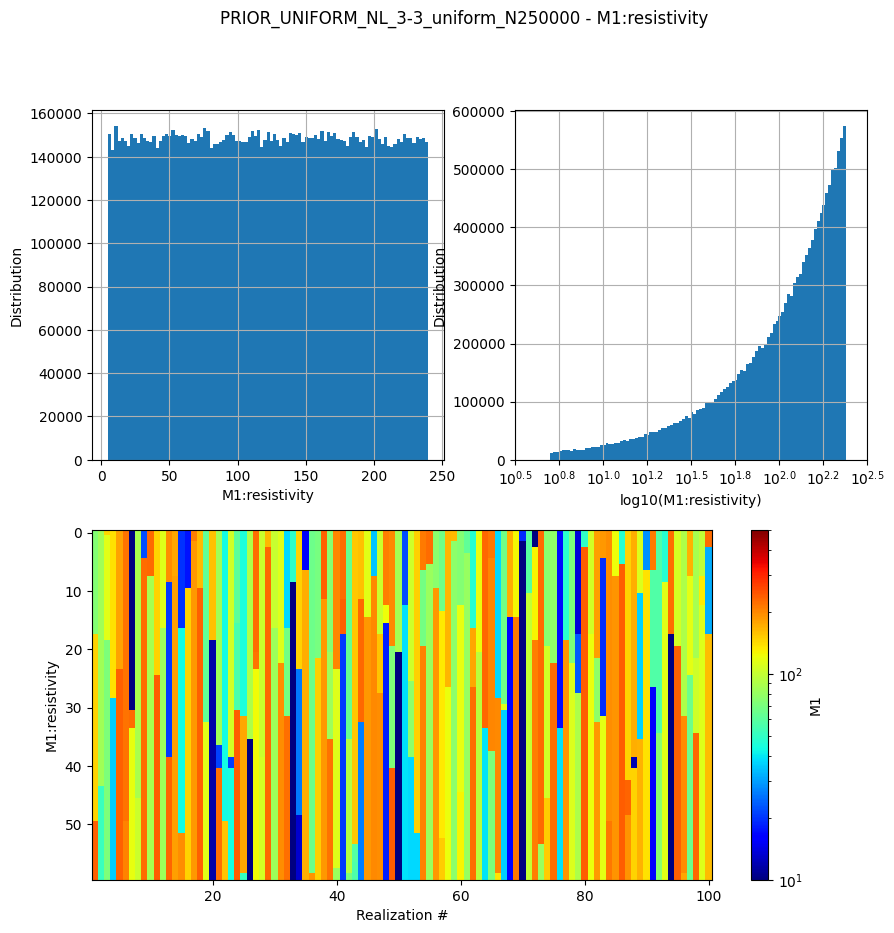

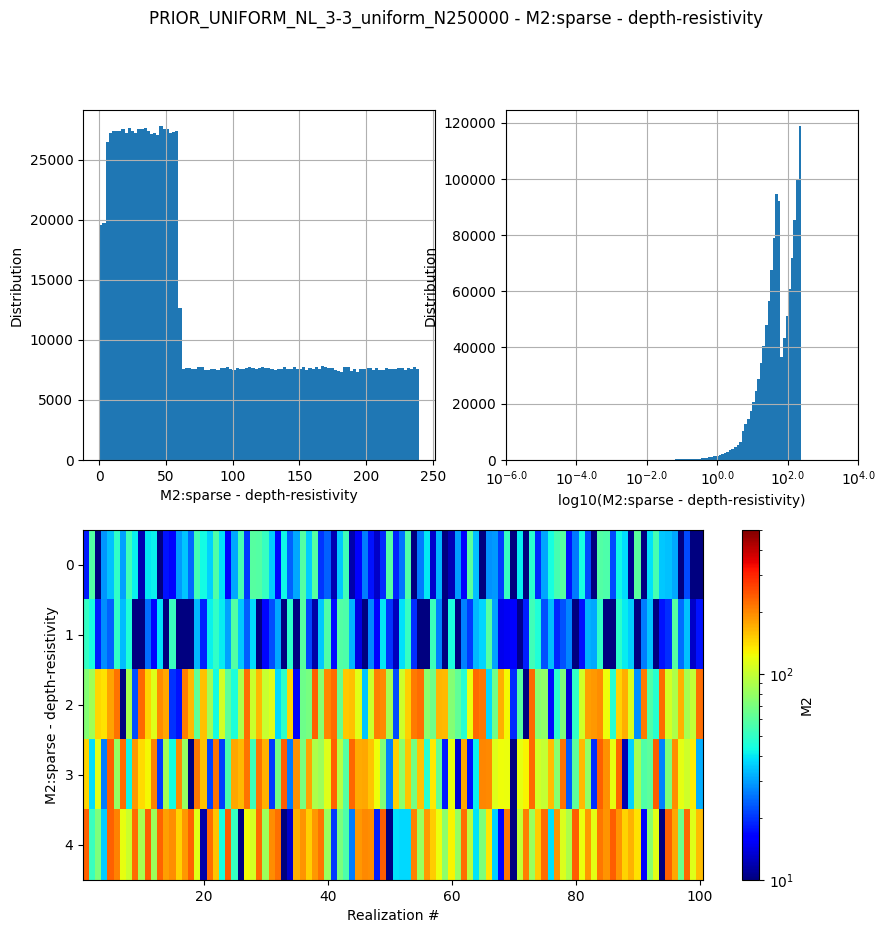

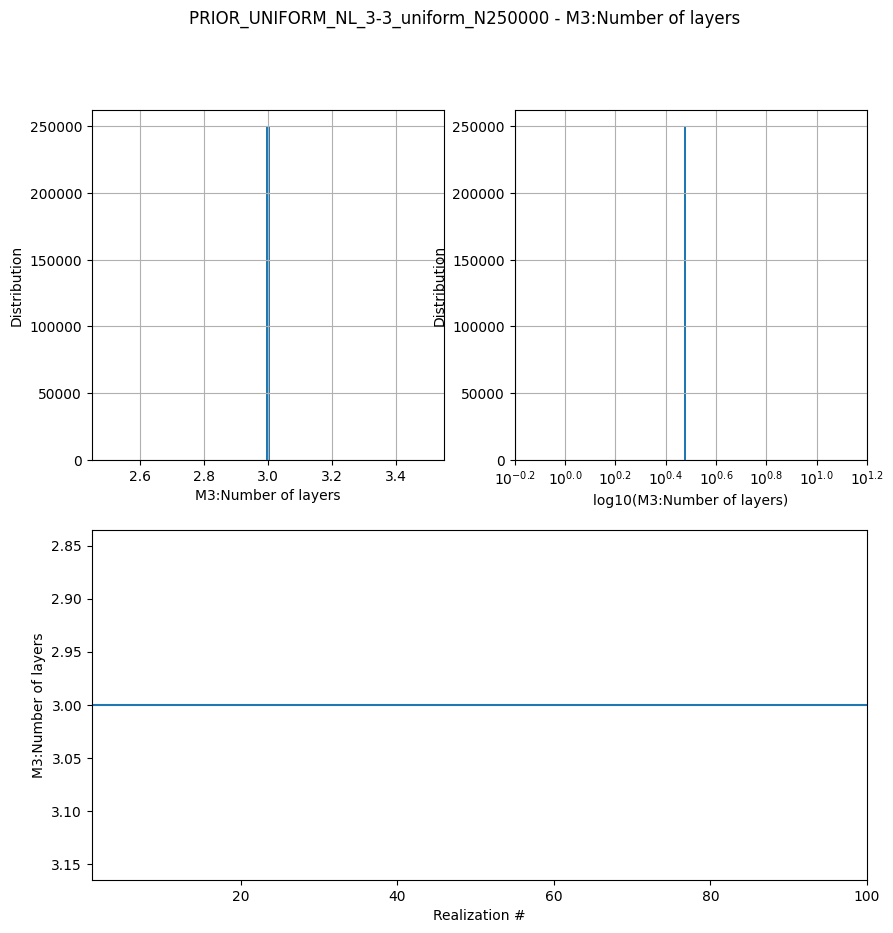

In [ ]:
N=200000 # sample size 
NLAY_min=3
NLAY_max=3


f_prior_data_h5='PRIOR_UNIFORM_NL_%d-%d_uniform_N%d_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5' % (NLAY_min, NLAY_max, N)
        

# make prior model realizations
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist='uniform', RHO_min=0.5*min(rho), RHO_max=2*max(rho))

# make prior data realizations
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

ig.plot_prior_stats(f_prior_h5)

## Different types of uncorrelated and correlated noise - No correlated noise

In [ ]:
# The basic noise model: 3% relative noise and a noise floor at 1e-12
rng = np.random.default_rng()
d_std = 0.03 # standard deviation of the noise
d_std_base = 1e-12 # base noise
D_std = d_std * D_ref + d_std_base
D_noise = rng.normal(0, D_std, D_ref.shape)
D_obs = D_ref + D_noise
# Cd is a diagnoal matrix with the standard deviation of the data

In [ ]:


# If a single correlated noise model is used, 
# it can represented by be the mean of the standard deviation of the data.
# This is though an approximation.
Cd_single = np.diag(np.mean(D_std, axis=0)**2)
Cd_single = np.diag(D_std[0]**2) 

# The full data covariance matrix is represented by a 3D array of shape (ns,nd,nd)
# Using this type of noise should provide identical results to using d_std, only slower as 
# the full covariance matrix is used.
# This type of noise model is useful when the noise is not the same for all data points,
# and the noise is correlated.
ns,nd=D_std.shape
Cd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    Cd_mul[i] = np.diag(D_std[i]**2)

# Wrie the three differet types of noise models to hdf5 files
f_data_h5_arr=[]
name_arr = []

f_out = ig.write_data_gaussian(D_obs, D_std = D_std, f_data_h5 = 'data_uncorr.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Uncorrelated noise')

f_out  = ig.write_data_gaussian(D_obs, Cd=Cd_single, f_data_h5 = 'data_corr1.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - mean')

f_out = ig.write_data_gaussian(D_obs, Cd=Cd_mul, f_data_h5 = 'data_corr2.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - individual')

In [ ]:
import time as time
# test likelhood
doTest = True
if doTest:
    id=0
    d_obs = D_obs[id]
    #d_obs[11]=np.nan
    d_std = D_std[id]

    Cd_single = np.diag(d_std**2)

    with h5py.File(f_prior_data_h5, 'r') as f:
        D = f['/D1'][:]
        
    #D = D_ref
    t0=time.time()
    L1 = ig.likelihood_gaussian_diagonal(D, d_obs, d_std)
    t1 = time.time()-t0
    L2 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, useVectorized=True)
    t2 = time.time()-t0-t1
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, N_app = 110, checkNaN=True, useVectorized=False)
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], N_app = 1000, useVectorized=True)
    L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], useVectorized=True)
    t3 = time.time()-t2-t1-t0

    # L3 is a list of log-likelihood values. I would like to compute the log of the mean of the likelihood values, that is 
    # the log(mean(exp(L3))). exp(L3) may lead to such small numbers that this becomes NaN. Using log-sum-exp trick for numerical stability.
    
    def log_mean_exp(log_vals):
        """Compute log(mean(exp(log_vals))) using the log-sum-exp trick for numerical stability"""
        max_val = np.max(log_vals)
        return max_val + np.log(np.mean(np.exp(log_vals - max_val)))
    
    mean_L1 = log_mean_exp(L1)
    mean_L2 = log_mean_exp(L2)
    mean_L3 = log_mean_exp(L3)

    mean_L1 = np.log(np.mean(np.exp(L1)))


    #print("L1: %f, L2: %f, L3: %f" % (mean_L1, mean_L2, mean_L3))
    #¤
    #
    #print("L1: %f, L2: %f, L3: %f" % (L1[0], L2[0], L3[0]))
    print("mean T1=%3.5f" % (mean_L1))
    print("mean T2=%3.5f" % (mean_L2))
    print("mean T3=%3.5f" % (mean_L3))

    print("t1, t2, t3 = %f, %f, %f" % (t1, t2, t3))
    print("SLOWDOWN = %f, %f, %f" % (t1/t1, t2/t1, t3/t1))


    plt.semilogy(-L1, 'k.', label='L1', markersize=10)
    plt.plot(-L2, 'b.', label='L2', markersize=5)
    plt.plot(-L3, 'r.', label='L3', markersize=2)
    plt.legend()
    plt.ylabel('-log(L)')
    plt.show()

In [ ]:
import time as time
f_post_h5_arr = []
T_arr = []
EV_arr = []
EV_post_arr = []
clim   = [min(rho)*0.8, max(rho)*1.25]
t_elapsed = []
for f_data_h5 in f_data_h5_arr: 
    t0 = time.time()
    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu = 8,
                                       use_N_best=500
                                       )
    t_elapsed.append(time.time()-t0)
    with h5py.File(f_post_h5, 'r') as f_post:
        T_arr.append(f_post['/T'][:])
        EV_arr.append(f_post['/EV'][:])
        EV_post_arr.append(f_post['/EV_post'][:])

    f_post_h5_arr.append(f_post_h5)
    

print(t_elapsed)

integrate_rejection: Time=  2.9s/200 soundings, 14.3ms/sounding, 69.7it/s
integrate_rejection: T_av=15.8
integrate_rejection: EV_av=-38.2


poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.25it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.20it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.19it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.23it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.21it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.27it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.22it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:02<00:03,  4.72it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.26it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.28it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.28it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.25it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.26it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.26it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:01,  4.97it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:04<00:00,  5.04it/s]

integrate_rejection: Time=  4.9s/200 soundings, 24.7ms/sounding, 40.5it/s
integrate_rejection: T_av=20.3
integrate_rejection: EV_av=-53.0


poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.25it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.21it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.31it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.19it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.28it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.23it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:02<00:03,  4.89it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:02<00:03,  4.86it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.22it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.23it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.24it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.20it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.19it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:01,  4.96it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.08it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.04it/s]

integrate_rejection: Time=  5.0s/200 soundings, 25.0ms/sounding, 40.0it/s
integrate_rejection: T_av=15.8
integrate_rejection: EV_av=-38.2


poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                                                                                                                                                   | 0/200 [00:00<?, ?it/s]

[3.2109696865081787, 5.279915809631348, 5.341842412948608]


In [ ]:
for i in range(len(f_post_h5_arr)):
    ig.plot_profile(f_post_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

In [ ]:
for i in range(len(f_post_h5_arr)):
    ig.plot_data_prior_post(f_post_h5_arr[0], i_plot=100, hardcopy=hardcopy)

In [ ]:
plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(T_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('Temperature')

plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(-EV_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV')


plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(EV_post_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV_post')



## Data in the log-space, and correlated Gaussian noise
The data can be transformed to the log-space, and the noise model can be applied in the log-space.


In [ ]:

# Add constant covariance to Cd -->
corrlev = 0.01**2

lD_obs = np.log10(D_ref)

lD_std_up = np.abs(np.log10(D_ref+D_std)-lD_obs)
lD_std_down = np.abs(np.log10(D_ref-D_std)-lD_obs)
lD_std = np.abs((lD_std_up+lD_std_down)/2) + np.sqrt(corrlev)

lCd_single = np.diag(np.mean(lD_std, axis=0)**2)+corrlev

ns,nd=D_std.shape
lCd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    lCd_mul[i] = np.diag(lD_std[i]**2)+corrlev

plt.figure()
plt.plot(lD_obs,'k-')
plt.plot(lD_std,':')


f_data_log_1_h5_f_out = ig.write_data_gaussian(lD_obs, D_std = lD_std, f_data_h5 = 'data_log_uncorr', id=1, showInfo=0, is_log=1)
f_data_log_2_h5_f_out = ig.write_data_gaussian(lD_obs, Cd = lCd_single, f_data_h5 = 'data_log_corr', id=1, showInfo=0, is_log=1)
f_data_log_3_h5_f_out = ig.write_data_gaussian(lD_obs, Cd = lCd_mul, f_data_h5 = 'data_log_corr2', id=1, showInfo=0, is_log=1)
f_data_arr = [f_data_log_1_h5_f_out,f_data_log_2_h5_f_out,f_data_log_3_h5_f_out]

In [ ]:
recomputePriorData = False
if recomputePriorData:
    f_prior_log_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, N=N-1, is_log=True)
else:
    # Simple load the old data and save it in log-space
    f_prior_log_data_h5  = 'd_log.h5'
    ig.copy_hdf5_file(f_prior_h5, f_prior_log_data_h5)
    D, idx = ig.load_prior_data(f_prior_data_h5); 
    Dlog = np.log10(D[0])
    ig.save_prior_data(f_prior_log_data_h5, Dlog, id=1)

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7813 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                                                 | 0/7812 [00:00<?, ?it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 31/7813 [00:01<04:12, 30.80it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 22/7813 [00:01<05:54, 21.98it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 20/7813 [00:01<06:33, 19.81it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:14, 20.81it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:15, 20.72it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:23, 20.33it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:16, 20.71it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:14, 20.82it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7813 [00:01<04:22, 29.69it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:20, 20.48it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:20, 20.47it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:13, 20.86it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7813 [00:01<04:23, 29.52it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7813 [00:01<04:24, 29.43it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 29/7812 [00:01<04:32, 28.61it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7812 [00:01<06:14, 20.80it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7813 [00:01<06:21, 20.44it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7812 [00:01<04:20, 29.90it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7812 [00:01<06:20, 20.49it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7812 [00:01<04:23, 29.57it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7812 [00:01<04:23, 29.52it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7812 [00:01<06:15, 20.77it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 21/7812 [00:01<06:22, 20.37it/s]

gatdaem1d:   0%|▍                                                                                                                                                                       | 22/7812 [00:01<06:04, 21.38it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7812 [00:01<04:20, 29.86it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 29/7812 [00:01<04:29, 28.87it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 29/7812 [00:01<04:30, 28.76it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 31/7812 [00:01<04:16, 30.36it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 29/7812 [00:01<04:30, 28.82it/s]

gatdaem1d:   0%|▋                                                                                                                                                                       | 30/7812 [00:01<04:23, 29.50it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 29/7812 [00:01<04:32, 28.60it/s]

gatdaem1d:   0%|▌                                                                                                                                                                       | 28/7812 [00:01<04:41, 27.66it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 58/7813 [00:02<04:18, 29.97it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 66/7813 [00:02<03:55, 32.91it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 54/7813 [00:02<04:37, 27.96it/s]

gatdaem1d:   1%|█▎                                                                                                                                                                      | 62/7813 [00:02<03:58, 32.46it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 56/7813 [00:02<04:27, 28.95it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 65/7813 [00:02<03:45, 34.38it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 55/7813 [00:02<04:33, 28.35it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 55/7813 [00:02<04:36, 28.10it/s]

gatdaem1d:   1%|█▎                                                                                                                                                                      | 63/7813 [00:02<04:06, 31.48it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 58/7813 [00:02<04:18, 30.01it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 56/7813 [00:02<04:28, 28.90it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 73/7813 [00:02<03:28, 37.20it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 55/7813 [00:02<04:38, 27.86it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 76/7813 [00:02<03:18, 38.97it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 64/7813 [00:02<03:51, 33.53it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 73/7812 [00:02<03:27, 37.22it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 57/7812 [00:02<04:23, 29.41it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 74/7812 [00:02<03:24, 37.86it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 56/7812 [00:02<04:31, 28.59it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 75/7812 [00:02<03:22, 38.14it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 64/7812 [00:02<03:49, 33.70it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 64/7812 [00:02<04:02, 31.95it/s]

gatdaem1d:   1%|█▏                                                                                                                                                                      | 54/7812 [00:02<04:42, 27.44it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 65/7812 [00:02<03:48, 33.86it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 75/7812 [00:02<03:21, 38.42it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 73/7812 [00:02<03:27, 37.33it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 75/7812 [00:02<03:20, 38.51it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 71/7812 [00:02<03:32, 36.46it/s]

gatdaem1d:   1%|█▌                                                                                                                                                                      | 70/7812 [00:02<03:34, 36.02it/s]

gatdaem1d:   1%|█▍                                                                                                                                                                      | 65/7812 [00:02<03:56, 32.72it/s]

gatdaem1d:   1%|█▎                                                                                                                                                                      | 60/7812 [00:02<04:19, 29.88it/s]

gatdaem1d:   1%|█▋                                                                                                                                                                      | 78/7812 [00:02<03:15, 39.60it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 93/7813 [00:03<04:00, 32.15it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 108/7813 [00:03<03:20, 38.48it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 108/7813 [00:03<03:21, 38.28it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 88/7813 [00:03<04:14, 30.41it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 92/7813 [00:03<04:01, 32.00it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 89/7813 [00:03<04:10, 30.88it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                     | 99/7813 [00:03<03:40, 35.06it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 93/7813 [00:03<03:59, 32.23it/s]

gatdaem1d:   1%|██                                                                                                                                                                      | 96/7813 [00:03<04:01, 31.97it/s]

gatdaem1d:   1%|██▌                                                                                                                                                                    | 117/7813 [00:03<03:11, 40.19it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 92/7813 [00:03<04:01, 31.94it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                     | 99/7813 [00:03<03:41, 34.84it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 122/7813 [00:03<03:03, 41.84it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 108/7813 [00:03<03:22, 38.00it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 88/7812 [00:03<04:18, 29.86it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 107/7812 [00:03<03:23, 37.89it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 107/7812 [00:03<03:28, 36.93it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 125/7812 [00:03<02:57, 43.32it/s]

gatdaem1d:   1%|█▉                                                                                                                                                                      | 90/7812 [00:03<04:11, 30.76it/s]

gatdaem1d:   1%|█▊                                                                                                                                                                      | 83/7812 [00:03<04:35, 28.06it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 109/7812 [00:03<03:20, 38.34it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                     | 99/7813 [00:03<04:09, 30.87it/s]

gatdaem1d:   1%|██▌                                                                                                                                                                    | 117/7812 [00:03<03:11, 40.22it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 121/7812 [00:03<03:04, 41.60it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 111/7812 [00:03<03:20, 38.50it/s]

gatdaem1d:   1%|██▏                                                                                                                                                                    | 104/7812 [00:03<03:34, 35.94it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 111/7812 [00:03<03:40, 35.00it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 108/7812 [00:03<03:39, 35.06it/s]

gatdaem1d:   1%|██▍                                                                                                                                                                    | 112/7812 [00:03<03:41, 34.84it/s]

gatdaem1d:   1%|██▍                                                                                                                                                                    | 114/7812 [00:03<03:33, 36.13it/s]

gatdaem1d:   1%|██▎                                                                                                                                                                    | 107/7812 [00:03<03:53, 32.97it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 118/7812 [00:03<03:48, 33.68it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 138/7813 [00:04<03:27, 37.02it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 127/7813 [00:04<03:52, 33.11it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 153/7813 [00:04<03:07, 40.75it/s]

gatdaem1d:   2%|██▌                                                                                                                                                                    | 122/7813 [00:04<04:02, 31.68it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 123/7813 [00:04<04:01, 31.86it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 130/7813 [00:04<03:55, 32.62it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 160/7813 [00:04<03:05, 41.20it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 139/7813 [00:04<03:25, 37.33it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 137/7813 [00:04<03:29, 36.70it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 143/7813 [00:04<03:20, 38.23it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 168/7813 [00:04<02:57, 43.12it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 152/7813 [00:04<03:12, 39.86it/s]

gatdaem1d:   2%|██▉                                                                                                                                                                    | 135/7813 [00:04<03:43, 34.28it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 147/7813 [00:04<03:26, 37.07it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 133/7812 [00:04<03:36, 35.47it/s]

gatdaem1d:   2%|██▋                                                                                                                                                                    | 124/7812 [00:04<04:01, 31.90it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 153/7812 [00:04<03:10, 40.28it/s]

gatdaem1d:   2%|██▊                                                                                                                                                                    | 133/7813 [00:04<04:00, 31.89it/s]

gatdaem1d:   1%|██▌                                                                                                                                                                    | 117/7812 [00:04<04:16, 30.01it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 166/7812 [00:04<02:58, 42.92it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 161/7812 [00:04<03:04, 41.51it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 157/7812 [00:04<03:06, 41.15it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 147/7812 [00:04<03:19, 38.44it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 145/7812 [00:04<03:33, 35.99it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 154/7812 [00:04<03:22, 37.86it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 144/7812 [00:04<03:40, 34.72it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 151/7812 [00:04<03:21, 37.99it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 151/7812 [00:04<03:35, 35.51it/s]

gatdaem1d:   2%|███▏                                                                                                                                                                   | 148/7812 [00:04<03:44, 34.13it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 169/7812 [00:04<03:14, 39.25it/s]

gatdaem1d:   2%|███                                                                                                                                                                    | 142/7812 [00:04<03:49, 33.43it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 153/7812 [00:04<03:44, 34.09it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 183/7813 [00:05<03:11, 39.78it/s]

gatdaem1d:   3%|████▏                                                                                                                                                                  | 198/7813 [00:05<03:00, 42.09it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 164/7813 [00:05<03:37, 35.23it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 163/7813 [00:05<03:46, 33.84it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 203/7813 [00:05<03:02, 41.80it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 184/7813 [00:05<03:10, 39.98it/s]

gatdaem1d:   2%|███▎                                                                                                                                                                   | 157/7813 [00:05<03:57, 32.30it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 163/7813 [00:05<03:56, 32.28it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 183/7813 [00:05<03:11, 39.80it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 186/7813 [00:05<03:11, 39.81it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 177/7813 [00:05<03:27, 36.87it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 159/7812 [00:05<03:52, 32.95it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 176/7812 [00:05<03:20, 38.04it/s]

gatdaem1d:   3%|████▏                                                                                                                                                                  | 197/7812 [00:05<03:04, 41.34it/s]

gatdaem1d:   2%|███▍                                                                                                                                                                   | 160/7812 [00:05<03:42, 34.47it/s]

gatdaem1d:   2%|███▌                                                                                                                                                                   | 168/7813 [00:05<03:54, 32.66it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 204/7812 [00:05<03:01, 41.92it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 202/7812 [00:05<02:59, 42.45it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 190/7812 [00:05<03:10, 40.01it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 188/7812 [00:05<03:18, 38.32it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 185/7813 [00:05<03:34, 35.60it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 187/7812 [00:05<03:23, 37.54it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 192/7813 [00:05<03:25, 37.04it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 212/7813 [00:05<03:10, 39.86it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 187/7812 [00:05<03:37, 35.10it/s]

gatdaem1d:   2%|████▏                                                                                                                                                                  | 193/7812 [00:05<03:30, 36.18it/s]

gatdaem1d:   2%|███▉                                                                                                                                                                   | 183/7812 [00:05<03:45, 33.77it/s]

gatdaem1d:   2%|███▊                                                                                                                                                                   | 178/7812 [00:05<03:43, 34.15it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 209/7812 [00:05<03:13, 39.21it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 190/7812 [00:05<03:31, 36.12it/s]

gatdaem1d:   2%|████                                                                                                                                                                   | 189/7812 [00:05<03:39, 34.69it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 209/7812 [00:05<03:26, 36.86it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 228/7813 [00:06<03:03, 41.37it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 243/7813 [00:06<02:56, 42.89it/s]

gatdaem1d:   3%|████▍                                                                                                                                                                  | 207/7813 [00:06<03:21, 37.71it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 246/7813 [00:06<02:59, 42.17it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 199/7813 [00:06<03:42, 34.22it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 230/7813 [00:06<03:01, 41.75it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 200/7813 [00:06<03:33, 35.63it/s]

gatdaem1d:   3%|████▏                                                                                                                                                                  | 198/7813 [00:06<03:50, 33.06it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7813 [00:06<03:06, 40.71it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7813 [00:06<03:02, 41.60it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 221/7813 [00:06<03:14, 39.00it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 219/7812 [00:06<03:11, 39.55it/s]

gatdaem1d:   2%|████▏                                                                                                                                                                  | 194/7812 [00:06<03:48, 33.39it/s]

gatdaem1d:   3%|████▎                                                                                                                                                                  | 203/7813 [00:06<03:48, 33.36it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 241/7812 [00:06<03:00, 41.99it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 248/7812 [00:06<02:58, 42.35it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 233/7812 [00:06<03:04, 41.01it/s]

gatdaem1d:   2%|████▏                                                                                                                                                                  | 195/7812 [00:06<03:48, 33.33it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 231/7812 [00:06<03:12, 39.41it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 221/7813 [00:06<03:37, 34.97it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 227/7812 [00:06<03:26, 36.65it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 245/7812 [00:06<03:11, 39.61it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 233/7812 [00:06<03:24, 37.09it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 223/7812 [00:06<03:37, 34.89it/s]

gatdaem1d:   3%|████▋                                                                                                                                                                  | 217/7812 [00:06<03:47, 33.36it/s]

gatdaem1d:   3%|████▌                                                                                                                                                                  | 213/7812 [00:06<03:43, 33.93it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 230/7813 [00:06<03:34, 35.41it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 253/7813 [00:06<03:20, 37.70it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 249/7812 [00:06<03:21, 37.54it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 225/7812 [00:06<03:38, 34.75it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 252/7812 [00:06<03:15, 38.58it/s]

gatdaem1d:   3%|████▊                                                                                                                                                                  | 227/7812 [00:06<03:40, 34.37it/s]

gatdaem1d:   4%|█████▊                                                                                                                                                                 | 274/7813 [00:07<02:56, 42.73it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 288/7813 [00:07<02:53, 43.49it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 250/7813 [00:07<03:13, 39.13it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 290/7813 [00:07<02:56, 42.54it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 276/7813 [00:07<02:55, 42.91it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 234/7813 [00:07<03:41, 34.27it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 238/7813 [00:07<03:29, 36.19it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 273/7813 [00:07<03:00, 41.75it/s]

gatdaem1d:   3%|█████▏                                                                                                                                                                 | 242/7813 [00:07<03:28, 36.34it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 276/7813 [00:07<02:55, 43.04it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 262/7812 [00:07<03:06, 40.55it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7812 [00:07<03:44, 33.85it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 264/7813 [00:07<03:08, 40.08it/s]

gatdaem1d:   3%|█████                                                                                                                                                                  | 239/7813 [00:07<03:43, 33.95it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 291/7812 [00:07<02:57, 42.48it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 276/7812 [00:07<03:01, 41.51it/s]

gatdaem1d:   3%|████▉                                                                                                                                                                  | 229/7812 [00:07<03:47, 33.34it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 275/7812 [00:07<03:05, 40.69it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 291/7812 [00:07<03:01, 41.42it/s]

gatdaem1d:   3%|█████▍                                                                                                                                                                 | 257/7813 [00:07<03:43, 33.81it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 259/7812 [00:07<03:35, 35.02it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 251/7812 [00:07<03:46, 33.42it/s]

gatdaem1d:   3%|█████▎                                                                                                                                                                 | 249/7812 [00:07<03:40, 34.28it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 264/7812 [00:07<03:33, 35.29it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 284/7812 [00:07<03:20, 37.48it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 266/7813 [00:07<03:38, 34.61it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 296/7812 [00:07<03:07, 39.98it/s]

gatdaem1d:   3%|█████▋                                                                                                                                                                 | 265/7812 [00:07<03:29, 36.08it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 271/7812 [00:07<03:35, 35.02it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 292/7813 [00:07<03:24, 36.75it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 262/7812 [00:07<03:42, 33.99it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 287/7812 [00:07<03:25, 36.59it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 333/7813 [00:08<02:51, 43.70it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 293/7813 [00:08<03:07, 40.21it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 317/7813 [00:08<02:58, 41.96it/s]

gatdaem1d:   3%|█████▊                                                                                                                                                                 | 270/7813 [00:08<03:37, 34.72it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 322/7813 [00:08<02:51, 43.58it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 285/7813 [00:08<03:16, 38.40it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 321/7813 [00:08<02:52, 43.49it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 307/7813 [00:08<03:03, 40.95it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 306/7812 [00:08<03:01, 41.39it/s]

gatdaem1d:   4%|█████▊                                                                                                                                                                 | 274/7812 [00:08<03:23, 37.09it/s]

gatdaem1d:   4%|█████▉                                                                                                                                                                 | 275/7813 [00:08<03:33, 35.25it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 333/7813 [00:08<03:02, 40.88it/s]

gatdaem1d:   4%|█████▊                                                                                                                                                                 | 274/7813 [00:08<03:41, 34.11it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 319/7812 [00:08<02:58, 41.94it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 335/7812 [00:08<02:55, 42.71it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 315/7813 [00:08<03:08, 39.81it/s]

gatdaem1d:   3%|█████▌                                                                                                                                                                 | 263/7812 [00:08<03:45, 33.47it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 319/7812 [00:08<03:00, 41.54it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 337/7812 [00:08<02:55, 42.69it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 304/7812 [00:08<03:18, 37.90it/s]

gatdaem1d:   4%|██████▏                                                                                                                                                                | 291/7813 [00:08<03:44, 33.53it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 284/7812 [00:08<03:38, 34.44it/s]

gatdaem1d:   4%|██████                                                                                                                                                                 | 285/7812 [00:08<03:47, 33.13it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 300/7812 [00:08<03:37, 34.52it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 301/7813 [00:08<03:40, 34.11it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 314/7812 [00:08<03:21, 37.29it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 340/7812 [00:08<03:02, 41.03it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 337/7813 [00:08<03:11, 39.09it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 297/7812 [00:08<03:40, 34.07it/s]

gatdaem1d:   4%|██████▍                                                                                                                                                                | 302/7812 [00:08<03:30, 35.62it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 324/7812 [00:08<03:26, 36.26it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 323/7812 [00:08<03:28, 35.98it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 337/7813 [00:09<03:01, 41.22it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 367/7813 [00:09<02:49, 43.93it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 332/7813 [00:09<03:02, 41.05it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 305/7813 [00:09<03:38, 34.40it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 366/7813 [00:09<02:49, 43.83it/s]

gatdaem1d:   4%|███████▍                                                                                                                                                               | 349/7812 [00:09<02:58, 41.87it/s]

gatdaem1d:   4%|███████▌                                                                                                                                                               | 351/7813 [00:09<02:59, 41.65it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 319/7812 [00:09<03:10, 39.35it/s]

gatdaem1d:   4%|██████▌                                                                                                                                                                | 309/7813 [00:09<03:39, 34.26it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 363/7812 [00:09<02:55, 42.40it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 379/7812 [00:09<02:53, 42.92it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 358/7813 [00:09<03:03, 40.71it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 377/7813 [00:09<03:02, 40.69it/s]

gatdaem1d:   4%|██████▎                                                                                                                                                                | 297/7812 [00:09<03:44, 33.41it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 363/7812 [00:09<02:56, 42.14it/s]

gatdaem1d:   4%|██████▋                                                                                                                                                                | 311/7813 [00:09<03:39, 34.13it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 359/7813 [00:09<03:14, 38.35it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 383/7812 [00:09<02:50, 43.58it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 375/7813 [00:09<03:14, 38.31it/s]

gatdaem1d:   5%|███████▌                                                                                                                                                               | 352/7812 [00:09<03:03, 40.70it/s]

gatdaem1d:   4%|██████▉                                                                                                                                                                | 325/7813 [00:09<03:43, 33.47it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 320/7812 [00:09<03:35, 34.78it/s]

gatdaem1d:   4%|██████▊                                                                                                                                                                | 320/7812 [00:09<03:44, 33.35it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 357/7812 [00:09<03:11, 38.98it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 382/7813 [00:09<03:02, 40.79it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 335/7812 [00:09<03:39, 33.99it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 336/7813 [00:09<03:42, 33.66it/s]

gatdaem1d:   4%|███████▏                                                                                                                                                               | 338/7812 [00:09<03:31, 35.30it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 361/7812 [00:09<03:27, 35.97it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 332/7812 [00:09<03:43, 33.53it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 360/7812 [00:09<03:41, 33.68it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 382/7812 [00:09<03:20, 36.99it/s]

gatdaem1d:   5%|████████▏                                                                                                                                                              | 381/7813 [00:10<02:57, 41.94it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 376/7813 [00:10<02:58, 41.77it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 340/7813 [00:10<03:36, 34.50it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7813 [00:10<02:47, 44.15it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 411/7813 [00:10<02:50, 43.29it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 394/7813 [00:10<02:56, 41.99it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 393/7812 [00:10<02:55, 42.24it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 364/7812 [00:10<03:01, 41.03it/s]

gatdaem1d:   4%|███████▎                                                                                                                                                               | 344/7813 [00:10<03:37, 34.28it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 406/7812 [00:10<02:54, 42.49it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 422/7812 [00:10<02:52, 42.82it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 401/7813 [00:10<02:59, 41.21it/s]

gatdaem1d:   4%|███████                                                                                                                                                                | 331/7812 [00:10<03:44, 33.29it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 403/7813 [00:10<03:05, 39.96it/s]

gatdaem1d:   4%|███████▍                                                                                                                                                               | 346/7813 [00:10<03:41, 33.74it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 429/7812 [00:10<02:47, 44.16it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 416/7813 [00:10<03:10, 38.74it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 419/7813 [00:10<03:09, 38.97it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 397/7812 [00:10<02:56, 41.93it/s]

gatdaem1d:   5%|███████▋                                                                                                                                                               | 359/7813 [00:10<03:42, 33.53it/s]

gatdaem1d:   5%|███████▌                                                                                                                                                               | 355/7812 [00:10<03:34, 34.74it/s]

gatdaem1d:   5%|███████▌                                                                                                                                                               | 354/7812 [00:10<03:43, 33.36it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 406/7812 [00:10<03:08, 39.21it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 399/7812 [00:10<03:06, 39.82it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 427/7813 [00:10<02:56, 41.78it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 370/7812 [00:10<03:39, 33.92it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 370/7813 [00:10<03:41, 33.56it/s]

gatdaem1d:   5%|███████▉                                                                                                                                                               | 374/7812 [00:10<03:31, 35.22it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 375/7812 [00:10<03:25, 36.13it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 398/7812 [00:10<03:27, 35.73it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 395/7812 [00:11<03:43, 33.23it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 425/7813 [00:11<02:54, 42.30it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 420/7813 [00:11<02:55, 42.23it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 456/7813 [00:11<02:46, 44.31it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 375/7813 [00:11<03:36, 34.34it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 420/7812 [00:11<03:26, 35.82it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 437/7813 [00:11<02:55, 42.14it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 409/7812 [00:11<02:55, 42.18it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 436/7812 [00:11<02:54, 42.20it/s]

gatdaem1d:   5%|████████                                                                                                                                                               | 380/7813 [00:11<03:34, 34.67it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 449/7812 [00:11<02:53, 42.44it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 465/7812 [00:11<02:52, 42.70it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 444/7813 [00:11<02:57, 41.48it/s]

gatdaem1d:   5%|███████▊                                                                                                                                                               | 365/7812 [00:11<03:44, 33.12it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 390/7813 [00:11<03:22, 36.65it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 455/7813 [00:11<03:01, 40.50it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 474/7812 [00:11<02:45, 44.38it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 444/7813 [00:11<03:08, 39.09it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 443/7812 [00:11<02:51, 43.01it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 390/7812 [00:11<03:34, 34.54it/s]

gatdaem1d:   5%|████████▍                                                                                                                                                              | 393/7813 [00:11<03:45, 32.90it/s]

gatdaem1d:   5%|████████▎                                                                                                                                                              | 388/7812 [00:11<03:44, 33.05it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 459/7813 [00:11<03:15, 37.66it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 442/7812 [00:11<03:01, 40.60it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 456/7813 [00:11<03:18, 37.03it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 473/7813 [00:11<02:51, 42.78it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 413/7813 [00:11<03:24, 36.19it/s]

gatdaem1d:   5%|████████▋                                                                                                                                                              | 404/7812 [00:11<03:40, 33.63it/s]

gatdaem1d:   6%|█████████▌                                                                                                                                                             | 446/7812 [00:11<03:17, 37.29it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 418/7812 [00:11<03:15, 37.91it/s]

gatdaem1d:   5%|████████▊                                                                                                                                                              | 410/7812 [00:11<03:33, 34.71it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 434/7812 [00:11<03:27, 35.62it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 429/7812 [00:12<03:42, 33.25it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 463/7813 [00:12<02:53, 42.34it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 501/7813 [00:12<02:44, 44.41it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 480/7813 [00:12<02:53, 42.38it/s]

gatdaem1d:   5%|████████▉                                                                                                                                                              | 418/7813 [00:12<03:21, 36.68it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 479/7812 [00:12<02:52, 42.44it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 424/7813 [00:12<03:17, 37.46it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 492/7812 [00:12<02:52, 42.42it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 457/7812 [00:12<03:28, 35.25it/s]

gatdaem1d:   7%|██████████▊                                                                                                                                                            | 508/7812 [00:12<02:51, 42.57it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 487/7813 [00:12<02:54, 41.90it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 433/7813 [00:12<03:11, 38.51it/s]

gatdaem1d:   5%|████████▌                                                                                                                                                              | 399/7812 [00:12<03:43, 33.15it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 452/7812 [00:12<03:05, 39.67it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 468/7813 [00:12<03:09, 38.84it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 520/7812 [00:12<02:43, 44.61it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 488/7812 [00:12<02:48, 43.51it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 496/7813 [00:12<03:08, 38.81it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 425/7812 [00:12<03:34, 34.45it/s]

gatdaem1d:   5%|█████████▏                                                                                                                                                             | 427/7813 [00:12<03:42, 33.17it/s]

gatdaem1d:   5%|█████████                                                                                                                                                              | 422/7812 [00:12<03:43, 33.06it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 484/7813 [00:12<03:15, 37.47it/s]

gatdaem1d:   6%|██████████▎                                                                                                                                                            | 485/7812 [00:12<02:57, 41.24it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7813 [00:12<03:17, 37.13it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 456/7813 [00:12<03:13, 37.99it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 516/7813 [00:12<02:53, 42.07it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                                             | 439/7812 [00:12<03:38, 33.79it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 490/7812 [00:12<03:07, 38.95it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 494/7813 [00:12<03:25, 35.64it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 455/7812 [00:12<03:15, 37.58it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 470/7812 [00:12<03:26, 35.49it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 457/7812 [00:12<03:22, 36.27it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 463/7812 [00:13<03:40, 33.31it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 547/7813 [00:13<02:42, 44.73it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 522/7812 [00:13<02:51, 42.45it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 455/7813 [00:13<03:23, 36.23it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 469/7813 [00:13<03:04, 39.71it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 536/7812 [00:13<02:50, 42.66it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 551/7812 [00:13<02:50, 42.50it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 506/7813 [00:13<02:59, 40.69it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 531/7813 [00:13<02:51, 42.36it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 493/7812 [00:13<03:29, 34.86it/s]

gatdaem1d:   7%|███████████▏                                                                                                                                                           | 523/7813 [00:13<03:03, 39.83it/s]

gatdaem1d:   6%|██████████▏                                                                                                                                                            | 477/7813 [00:13<03:03, 39.92it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 511/7813 [00:13<03:02, 39.99it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7812 [00:13<02:58, 40.98it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                                             | 433/7812 [00:13<03:43, 32.97it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 565/7812 [00:13<02:42, 44.57it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 534/7812 [00:13<02:45, 44.01it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 460/7812 [00:13<03:33, 34.45it/s]

gatdaem1d:   6%|█████████▊                                                                                                                                                             | 461/7813 [00:13<03:43, 32.94it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 529/7813 [00:13<03:04, 39.53it/s]

gatdaem1d:   6%|█████████▋                                                                                                                                                             | 456/7812 [00:13<03:42, 33.01it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 528/7812 [00:13<02:55, 41.61it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 536/7813 [00:13<03:13, 37.69it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 499/7813 [00:13<03:05, 39.35it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 535/7813 [00:13<03:18, 36.58it/s]

gatdaem1d:   6%|██████████                                                                                                                                                             | 473/7812 [00:13<03:37, 33.80it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 531/7812 [00:13<03:04, 39.37it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 500/7812 [00:13<03:04, 39.63it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 506/7812 [00:13<03:25, 35.51it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 530/7813 [00:13<03:30, 34.66it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 559/7813 [00:13<03:02, 39.75it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 494/7812 [00:13<03:27, 35.33it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 497/7812 [00:14<03:39, 33.30it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 593/7813 [00:14<02:40, 45.04it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 565/7812 [00:14<02:50, 42.54it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                                            | 514/7813 [00:14<02:57, 41.06it/s]

gatdaem1d:   7%|████████████▍                                                                                                                                                          | 579/7812 [00:14<02:49, 42.74it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 492/7813 [00:14<03:23, 35.95it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 574/7813 [00:14<02:50, 42.52it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 594/7812 [00:14<02:51, 42.13it/s]

gatdaem1d:   7%|███████████                                                                                                                                                            | 520/7813 [00:14<02:58, 40.75it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 529/7812 [00:14<03:32, 34.22it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 554/7813 [00:14<02:57, 40.80it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 542/7812 [00:14<02:52, 42.13it/s]

gatdaem1d:   6%|█████████▉                                                                                                                                                             | 467/7812 [00:14<03:41, 33.12it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 610/7812 [00:14<02:41, 44.49it/s]

gatdaem1d:   7%|████████████▍                                                                                                                                                          | 580/7812 [00:14<02:43, 44.36it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 547/7813 [00:14<03:12, 37.77it/s]

gatdaem1d:   6%|██████████▊                                                                                                                                                            | 505/7812 [00:14<03:15, 37.43it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 564/7813 [00:14<03:11, 37.83it/s]

gatdaem1d:   6%|██████████▌                                                                                                                                                            | 495/7813 [00:14<03:41, 33.01it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 574/7813 [00:14<02:56, 41.06it/s]

gatdaem1d:   6%|██████████▍                                                                                                                                                            | 490/7812 [00:14<03:41, 33.12it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 571/7812 [00:14<02:53, 41.80it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 574/7813 [00:14<03:15, 37.12it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 542/7813 [00:14<03:00, 40.25it/s]

gatdaem1d:   7%|██████████▊                                                                                                                                                            | 508/7812 [00:14<03:35, 33.86it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 572/7813 [00:14<03:20, 36.09it/s]

gatdaem1d:   7%|███████████▋                                                                                                                                                           | 546/7812 [00:14<02:56, 41.25it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 542/7812 [00:14<03:25, 35.34it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 565/7813 [00:14<03:30, 34.37it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 571/7812 [00:14<03:12, 37.59it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 600/7813 [00:15<03:07, 38.48it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 639/7813 [00:15<02:40, 44.83it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 530/7812 [00:15<03:30, 34.53it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 608/7812 [00:15<02:49, 42.62it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 531/7812 [00:15<03:40, 32.98it/s]

gatdaem1d:   7%|███████████▉                                                                                                                                                           | 559/7813 [00:15<02:52, 42.05it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 528/7813 [00:15<03:23, 35.80it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 617/7813 [00:15<02:48, 42.62it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 637/7812 [00:15<02:49, 42.32it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 563/7813 [00:15<02:55, 41.24it/s]

gatdaem1d:   8%|█████████████▎                                                                                                                                                         | 622/7812 [00:15<02:55, 40.89it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 597/7813 [00:15<02:55, 41.22it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 588/7812 [00:15<02:47, 43.01it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 564/7812 [00:15<03:33, 33.91it/s]

gatdaem1d:   6%|██████████▋                                                                                                                                                            | 501/7812 [00:15<03:41, 33.07it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 656/7812 [00:15<02:40, 44.67it/s]

gatdaem1d:   7%|███████████▊                                                                                                                                                           | 551/7812 [00:15<03:02, 39.78it/s]

gatdaem1d:   8%|█████████████▎                                                                                                                                                         | 625/7812 [00:15<02:46, 43.17it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 619/7813 [00:15<02:51, 42.01it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 533/7812 [00:15<03:22, 36.02it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 614/7812 [00:15<02:50, 42.11it/s]

gatdaem1d:   7%|███████████▎                                                                                                                                                           | 529/7813 [00:15<03:40, 32.99it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 586/7813 [00:15<03:19, 36.17it/s]

gatdaem1d:   7%|████████████▌                                                                                                                                                          | 585/7813 [00:15<02:56, 40.87it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 603/7813 [00:15<03:19, 36.12it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 612/7813 [00:15<03:16, 36.56it/s]

gatdaem1d:   7%|███████████▌                                                                                                                                                           | 542/7812 [00:15<03:37, 33.43it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 609/7813 [00:15<03:21, 35.77it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 578/7812 [00:15<03:25, 35.13it/s]

gatdaem1d:   8%|████████████▌                                                                                                                                                          | 588/7812 [00:15<02:59, 40.15it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 600/7813 [00:16<03:30, 34.29it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 609/7812 [00:16<03:19, 36.19it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 684/7813 [00:16<02:39, 44.82it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 574/7812 [00:16<03:22, 35.81it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 572/7812 [00:16<03:19, 36.37it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 604/7813 [00:16<02:48, 42.75it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 639/7813 [00:16<03:13, 37.01it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 660/7813 [00:16<02:47, 42.72it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 564/7813 [00:16<03:23, 35.58it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 680/7812 [00:16<02:48, 42.40it/s]

gatdaem1d:   9%|██████████████▏                                                                                                                                                        | 665/7812 [00:16<02:52, 41.45it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 640/7813 [00:16<02:52, 41.58it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 634/7812 [00:16<02:44, 43.67it/s]

gatdaem1d:   8%|█████████████▉                                                                                                                                                         | 651/7812 [00:16<03:00, 39.72it/s]

gatdaem1d:   7%|███████████▍                                                                                                                                                           | 535/7812 [00:16<03:38, 33.24it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 599/7812 [00:16<03:33, 33.71it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 702/7812 [00:16<02:38, 44.85it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 605/7813 [00:16<03:01, 39.66it/s]

gatdaem1d:   8%|████████████▋                                                                                                                                                          | 596/7812 [00:16<02:54, 41.31it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 657/7812 [00:16<02:49, 42.26it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 577/7812 [00:16<03:09, 38.19it/s]

gatdaem1d:   7%|████████████                                                                                                                                                           | 563/7813 [00:16<03:39, 33.02it/s]

gatdaem1d:   8%|██████████████▏                                                                                                                                                        | 662/7813 [00:16<02:51, 41.61it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 629/7813 [00:16<03:09, 37.96it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 628/7813 [00:16<02:53, 41.30it/s]

gatdaem1d:   7%|████████████▎                                                                                                                                                          | 576/7812 [00:16<03:37, 33.32it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 649/7813 [00:16<03:17, 36.26it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 669/7812 [00:16<02:56, 40.42it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 645/7813 [00:16<03:22, 35.39it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 640/7813 [00:17<03:25, 34.93it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 614/7812 [00:16<03:26, 34.83it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 635/7813 [00:17<03:32, 33.75it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 629/7812 [00:17<03:05, 38.75it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 617/7812 [00:17<03:09, 37.90it/s]

gatdaem1d:   8%|█████████████                                                                                                                                                          | 612/7812 [00:17<03:13, 37.21it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 646/7812 [00:17<03:23, 35.27it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 649/7813 [00:17<02:45, 43.39it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 680/7813 [00:17<03:08, 37.93it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 703/7813 [00:17<02:46, 42.75it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 723/7812 [00:17<02:46, 42.50it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 600/7813 [00:17<03:26, 35.00it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 729/7813 [00:17<02:46, 42.55it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 709/7812 [00:17<02:48, 42.06it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 684/7813 [00:17<02:49, 42.09it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 694/7812 [00:17<02:55, 40.51it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 680/7812 [00:17<02:41, 44.13it/s]

gatdaem1d:   7%|████████████▏                                                                                                                                                          | 569/7812 [00:17<03:37, 33.28it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 747/7812 [00:17<02:37, 44.81it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 633/7812 [00:17<03:35, 33.38it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 700/7812 [00:17<02:47, 42.40it/s]

gatdaem1d:   8%|█████████████▎                                                                                                                                                         | 620/7812 [00:17<03:02, 39.49it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 638/7812 [00:17<02:59, 39.91it/s]

gatdaem1d:   8%|████████████▊                                                                                                                                                          | 597/7813 [00:17<03:40, 32.77it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 673/7813 [00:17<03:01, 39.45it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 645/7813 [00:17<03:10, 37.53it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 671/7813 [00:17<02:51, 41.67it/s]

gatdaem1d:   8%|█████████████▏                                                                                                                                                         | 614/7812 [00:17<03:28, 34.60it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 714/7812 [00:17<02:50, 41.54it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 704/7813 [00:17<03:00, 39.42it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 691/7813 [00:17<03:06, 38.19it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 686/7813 [00:17<03:20, 35.61it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 649/7812 [00:17<03:26, 34.62it/s]

gatdaem1d:   9%|██████████████▍                                                                                                                                                        | 676/7813 [00:18<03:27, 34.45it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 669/7813 [00:18<03:31, 33.71it/s]

gatdaem1d:   8%|██████████████                                                                                                                                                         | 660/7812 [00:18<03:01, 39.33it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 668/7812 [00:18<03:09, 37.73it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 746/7813 [00:18<02:45, 42.67it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 682/7812 [00:18<03:25, 34.65it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 767/7812 [00:18<02:44, 42.76it/s]

gatdaem1d:   8%|█████████████▉                                                                                                                                                         | 650/7812 [00:18<03:18, 36.02it/s]

gatdaem1d:   8%|█████████████▋                                                                                                                                                         | 642/7813 [00:18<03:14, 36.82it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 719/7813 [00:18<03:13, 36.69it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 727/7813 [00:18<02:47, 42.19it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 737/7812 [00:18<02:52, 41.12it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 725/7812 [00:18<02:40, 44.27it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 772/7813 [00:18<02:50, 41.32it/s]

gatdaem1d:   8%|████████████▉                                                                                                                                                          | 603/7812 [00:18<03:37, 33.17it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7812 [00:18<02:36, 44.94it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 667/7812 [00:18<03:33, 33.52it/s]

gatdaem1d:   9%|██████████████▊                                                                                                                                                        | 693/7813 [00:18<02:58, 39.84it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 752/7812 [00:18<02:56, 40.02it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 743/7812 [00:18<02:46, 42.46it/s]

gatdaem1d:   8%|██████████████▏                                                                                                                                                        | 663/7812 [00:18<02:56, 40.46it/s]

gatdaem1d:   8%|█████████████▍                                                                                                                                                         | 630/7813 [00:18<03:40, 32.59it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 688/7813 [00:18<03:03, 38.85it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 717/7813 [00:18<02:55, 40.50it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 714/7813 [00:18<02:49, 41.97it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 759/7812 [00:18<02:46, 42.39it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 679/7812 [00:18<03:07, 37.99it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 750/7813 [00:19<02:51, 41.09it/s]

gatdaem1d:   9%|███████████████▋                                                                                                                                                       | 732/7813 [00:19<03:01, 38.97it/s]

gatdaem1d:   8%|█████████████▊                                                                                                                                                         | 649/7812 [00:18<03:32, 33.77it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 722/7813 [00:19<03:19, 35.46it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 685/7812 [00:18<03:24, 34.81it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 711/7813 [00:19<03:17, 36.00it/s]

gatdaem1d:   9%|███████████████▏                                                                                                                                                       | 711/7813 [00:19<03:30, 33.70it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 703/7812 [00:19<02:56, 40.36it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 706/7812 [00:19<03:10, 37.29it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 789/7813 [00:19<02:44, 42.66it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 811/7812 [00:19<02:43, 42.85it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 717/7812 [00:19<03:27, 34.25it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 679/7813 [00:19<03:16, 36.22it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 770/7813 [00:19<02:46, 42.38it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 780/7812 [00:19<02:48, 41.63it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 756/7813 [00:19<03:13, 36.43it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 770/7812 [00:19<02:38, 44.32it/s]

gatdaem1d:   9%|██████████████▋                                                                                                                                                        | 687/7812 [00:19<03:23, 34.96it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 839/7812 [00:19<02:34, 45.03it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 705/7812 [00:19<03:24, 34.75it/s]

gatdaem1d:   8%|█████████████▌                                                                                                                                                         | 637/7812 [00:19<03:37, 33.02it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 814/7813 [00:19<02:58, 39.28it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 705/7812 [00:19<02:53, 40.88it/s]

gatdaem1d:   9%|███████████████▋                                                                                                                                                       | 734/7813 [00:19<03:04, 38.30it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 728/7813 [00:19<03:01, 39.02it/s]

gatdaem1d:   8%|██████████████▏                                                                                                                                                        | 664/7813 [00:19<03:37, 32.80it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 760/7813 [00:19<02:52, 41.00it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 757/7813 [00:19<02:47, 42.22it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7812 [00:19<03:05, 37.88it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 804/7812 [00:19<02:42, 43.14it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 786/7812 [00:19<02:56, 39.83it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 777/7813 [00:20<02:53, 40.55it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 795/7813 [00:20<02:47, 41.99it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 759/7813 [00:20<03:17, 35.66it/s]

gatdaem1d:   9%|██████████████▌                                                                                                                                                        | 683/7812 [00:19<03:32, 33.51it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 718/7812 [00:19<03:09, 37.41it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 720/7812 [00:19<03:23, 34.83it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 754/7813 [00:20<03:06, 37.83it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 754/7813 [00:20<03:15, 36.19it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 746/7812 [00:20<02:51, 41.12it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 833/7813 [00:20<02:42, 42.96it/s]

gatdaem1d:  10%|███████████████▉                                                                                                                                                       | 744/7812 [00:20<03:13, 36.59it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 854/7812 [00:20<02:42, 42.85it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 752/7812 [00:20<03:28, 33.87it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 801/7813 [00:20<03:00, 38.81it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 813/7813 [00:20<02:45, 42.36it/s]

gatdaem1d:   9%|███████████████▎                                                                                                                                                       | 716/7813 [00:20<03:18, 35.78it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 885/7812 [00:20<02:33, 45.13it/s]

gatdaem1d:   9%|██████████████▎                                                                                                                                                        | 671/7812 [00:20<03:36, 32.97it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 740/7812 [00:20<03:26, 34.22it/s]

gatdaem1d:   9%|███████████████▍                                                                                                                                                       | 723/7812 [00:20<03:28, 34.08it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 822/7812 [00:20<02:56, 39.65it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 815/7812 [00:20<02:45, 42.22it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 749/7812 [00:20<02:50, 41.54it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 803/7813 [00:20<02:48, 41.55it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 854/7813 [00:20<03:03, 38.00it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 800/7813 [00:20<02:45, 42.28it/s]

gatdaem1d:   9%|██████████████▉                                                                                                                                                        | 697/7813 [00:20<03:38, 32.61it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 836/7812 [00:20<02:58, 39.18it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 773/7813 [00:20<03:09, 37.23it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 850/7812 [00:20<02:38, 43.82it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 768/7813 [00:20<03:06, 37.77it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 823/7813 [00:21<02:46, 42.00it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 726/7812 [00:20<03:15, 36.19it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 803/7813 [00:21<03:04, 37.92it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 755/7812 [00:20<03:22, 34.85it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 756/7812 [00:20<03:12, 36.65it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 792/7813 [00:21<03:06, 37.74it/s]

gatdaem1d:  10%|█████████████████                                                                                                                                                      | 797/7813 [00:21<03:04, 38.08it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 827/7812 [00:21<03:04, 37.89it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 789/7812 [00:21<02:48, 41.58it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 838/7813 [00:21<02:58, 39.16it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 878/7813 [00:21<02:40, 43.33it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 898/7812 [00:21<02:41, 42.92it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 781/7812 [00:21<03:14, 36.13it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 786/7812 [00:21<03:28, 33.74it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 846/7813 [00:21<02:52, 40.50it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 856/7813 [00:21<02:43, 42.47it/s]

gatdaem1d:  10%|████████████████                                                                                                                                                       | 752/7813 [00:21<03:19, 35.45it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 931/7812 [00:21<02:32, 45.11it/s]

gatdaem1d:   9%|███████████████                                                                                                                                                        | 704/7812 [00:21<03:36, 32.83it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 865/7812 [00:21<02:51, 40.48it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 775/7812 [00:21<03:27, 33.90it/s]

gatdaem1d:  10%|████████████████▏                                                                                                                                                      | 758/7812 [00:21<03:28, 33.75it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 792/7812 [00:21<02:47, 41.92it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 846/7813 [00:21<02:46, 41.97it/s]

gatdaem1d:   9%|███████████████▌                                                                                                                                                       | 730/7813 [00:21<03:38, 32.38it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 879/7812 [00:21<02:52, 40.18it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 858/7812 [00:21<02:55, 39.69it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 811/7813 [00:22<03:08, 37.07it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 896/7812 [00:21<02:36, 44.29it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 893/7813 [00:21<03:07, 36.93it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 869/7813 [00:22<02:41, 43.03it/s]

gatdaem1d:  10%|████████████████▍                                                                                                                                                      | 768/7812 [00:21<03:05, 37.89it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 849/7813 [00:22<02:53, 40.04it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 790/7812 [00:21<03:21, 34.84it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 793/7812 [00:21<03:11, 36.71it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 806/7813 [00:22<03:13, 36.16it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 843/7813 [00:22<02:58, 38.94it/s]

gatdaem1d:  11%|█████████████████▉                                                                                                                                                     | 840/7813 [00:22<02:56, 39.41it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 833/7812 [00:22<02:45, 42.07it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 883/7813 [00:22<02:50, 40.59it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 830/7813 [00:22<03:12, 36.21it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 922/7813 [00:22<02:39, 43.12it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 866/7812 [00:22<03:13, 35.81it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 941/7812 [00:22<02:40, 42.89it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 818/7812 [00:22<03:15, 35.81it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 891/7813 [00:22<02:45, 41.73it/s]

gatdaem1d:  10%|█████████████████▌                                                                                                                                                     | 820/7812 [00:22<03:28, 33.47it/s]

gatdaem1d:  12%|███████████████████▏                                                                                                                                                   | 899/7813 [00:22<02:42, 42.46it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 977/7812 [00:22<02:31, 45.21it/s]

gatdaem1d:  10%|████████████████▊                                                                                                                                                      | 788/7813 [00:22<03:21, 34.93it/s]

gatdaem1d:   9%|███████████████▊                                                                                                                                                       | 737/7812 [00:22<03:36, 32.70it/s]

gatdaem1d:  10%|████████████████▉                                                                                                                                                      | 792/7812 [00:22<03:28, 33.71it/s]

gatdaem1d:  10%|█████████████████▎                                                                                                                                                     | 812/7812 [00:22<03:22, 34.56it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 836/7812 [00:22<02:44, 42.37it/s]

gatdaem1d:  10%|████████████████▌                                                                                                                                                      | 773/7813 [00:22<03:18, 35.44it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 925/7812 [00:22<02:45, 41.59it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 906/7812 [00:22<03:01, 38.06it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 942/7812 [00:22<02:34, 44.56it/s]

gatdaem1d:  12%|███████████████████▌                                                                                                                                                   | 915/7813 [00:23<02:37, 43.70it/s]

gatdaem1d:  11%|█████████████████▊                                                                                                                                                     | 835/7812 [00:22<03:04, 37.82it/s]

gatdaem1d:  10%|█████████████████▏                                                                                                                                                     | 806/7812 [00:23<03:06, 37.59it/s]

gatdaem1d:  11%|██████████████████▏                                                                                                                                                    | 849/7813 [00:23<03:13, 35.96it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 889/7813 [00:23<02:55, 39.41it/s]

gatdaem1d:  12%|███████████████████▏                                                                                                                                                   | 899/7812 [00:23<03:02, 37.94it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 886/7813 [00:23<02:53, 39.97it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 883/7813 [00:23<02:51, 40.36it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 890/7813 [00:23<02:59, 38.67it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 843/7813 [00:23<03:15, 35.66it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 931/7813 [00:23<03:16, 35.04it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 830/7812 [00:23<03:13, 36.03it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 928/7813 [00:23<02:44, 41.79it/s]

gatdaem1d:  11%|██████████████████▋                                                                                                                                                    | 876/7812 [00:23<02:44, 42.24it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 867/7813 [00:23<03:15, 35.57it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 903/7812 [00:23<03:13, 35.63it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 984/7812 [00:23<02:42, 41.95it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 859/7812 [00:23<03:07, 37.11it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 937/7813 [00:23<02:40, 42.71it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 942/7813 [00:23<02:41, 42.47it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 854/7812 [00:23<03:33, 32.60it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 823/7813 [00:23<03:20, 34.91it/s]

gatdaem1d:  10%|████████████████▋                                                                                                                                                      | 780/7812 [00:23<03:17, 35.67it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 966/7813 [00:23<02:51, 39.81it/s]

gatdaem1d:  11%|█████████████████▋                                                                                                                                                     | 826/7812 [00:23<03:27, 33.63it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 879/7812 [00:23<02:43, 42.49it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 847/7812 [00:23<03:23, 34.22it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1023/7812 [00:23<02:37, 43.22it/s]

gatdaem1d:  10%|█████████████████▍                                                                                                                                                     | 815/7813 [00:23<03:08, 37.21it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 968/7812 [00:23<02:43, 41.96it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 988/7812 [00:23<02:32, 44.72it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 961/7813 [00:24<02:34, 44.26it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 880/7812 [00:23<02:54, 39.79it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 945/7812 [00:24<03:07, 36.65it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 886/7813 [00:24<03:11, 36.10it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 944/7812 [00:24<02:52, 39.83it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 930/7813 [00:24<02:48, 40.88it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 926/7813 [00:24<02:47, 41.01it/s]

gatdaem1d:  11%|██████████████████▋                                                                                                                                                    | 875/7812 [00:24<03:00, 38.42it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 977/7813 [00:24<03:00, 37.82it/s]

gatdaem1d:  11%|██████████████████                                                                                                                                                     | 844/7812 [00:24<03:14, 35.76it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 973/7813 [00:24<02:40, 42.58it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 879/7813 [00:24<03:19, 34.77it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 929/7813 [00:24<03:03, 37.49it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 929/7813 [00:24<03:06, 37.00it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 919/7812 [00:24<02:46, 41.31it/s]

gatdaem1d:  12%|███████████████████▎                                                                                                                                                   | 903/7813 [00:24<03:16, 35.13it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 939/7812 [00:24<03:16, 35.02it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 985/7813 [00:24<02:40, 42.54it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 981/7813 [00:24<02:39, 42.84it/s]

gatdaem1d:  11%|███████████████████▏                                                                                                                                                   | 897/7812 [00:24<03:07, 36.84it/s]

gatdaem1d:  11%|██████████████████▉                                                                                                                                                    | 887/7812 [00:24<03:32, 32.66it/s]

gatdaem1d:  11%|██████████████████▎                                                                                                                                                    | 858/7813 [00:24<03:19, 34.83it/s]

gatdaem1d:  11%|█████████████████▌                                                                                                                                                     | 823/7812 [00:24<03:05, 37.76it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1026/7812 [00:24<02:55, 38.64it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 923/7812 [00:24<02:41, 42.68it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 860/7812 [00:24<03:29, 33.20it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 882/7812 [00:24<03:25, 33.74it/s]

gatdaem1d:  11%|██████████████████▍                                                                                                                                                    | 860/7813 [00:24<02:56, 39.40it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1012/7812 [00:24<02:40, 42.26it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1007/7813 [00:24<03:02, 37.38it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1034/7812 [00:24<02:31, 44.81it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1006/7813 [00:25<02:33, 44.32it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1067/7812 [00:24<02:47, 40.33it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 926/7812 [00:24<02:45, 41.53it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 991/7812 [00:25<02:43, 41.77it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 969/7813 [00:25<02:44, 41.55it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 982/7812 [00:25<03:13, 35.33it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1023/7813 [00:25<02:50, 39.90it/s]

gatdaem1d:  12%|███████████████████▌                                                                                                                                                   | 914/7812 [00:25<03:01, 37.94it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 923/7813 [00:25<03:19, 34.51it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1019/7813 [00:25<02:36, 43.41it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 922/7813 [00:25<03:06, 36.88it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 972/7813 [00:25<02:57, 38.58it/s]

gatdaem1d:  11%|██████████████████▊                                                                                                                                                    | 880/7812 [00:25<03:19, 34.67it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 972/7813 [00:25<02:56, 38.81it/s]

gatdaem1d:  12%|████████████████████▏                                                                                                                                                  | 946/7813 [00:25<03:04, 37.29it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 967/7813 [00:25<03:08, 36.26it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1028/7813 [00:25<02:39, 42.48it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 961/7812 [00:25<02:57, 38.57it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 975/7812 [00:25<03:19, 34.32it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 926/7812 [00:25<03:20, 34.37it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 934/7812 [00:25<03:12, 35.66it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 894/7813 [00:25<03:18, 34.89it/s]

gatdaem1d:  11%|██████████████████▌                                                                                                                                                    | 866/7812 [00:25<02:57, 39.20it/s]

gatdaem1d:  13%|█████████████████████▊                                                                                                                                                | 1024/7813 [00:25<02:47, 40.62it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 966/7812 [00:25<02:40, 42.72it/s]

gatdaem1d:  11%|███████████████████                                                                                                                                                    | 894/7812 [00:25<03:27, 33.28it/s]

gatdaem1d:  12%|███████████████████▌                                                                                                                                                   | 916/7812 [00:25<03:25, 33.55it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1055/7812 [00:25<02:39, 42.46it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1066/7812 [00:25<03:01, 37.08it/s]

gatdaem1d:  12%|███████████████████▏                                                                                                                                                   | 900/7813 [00:26<02:59, 38.41it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1051/7813 [00:26<02:32, 44.41it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1079/7812 [00:25<02:31, 44.58it/s]

gatdaem1d:  12%|████████████████████▊                                                                                                                                                  | 972/7812 [00:25<02:40, 42.67it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1045/7813 [00:26<03:08, 35.98it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1037/7812 [00:26<02:38, 42.75it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1108/7812 [00:26<02:51, 39.05it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1012/7813 [00:26<02:42, 41.88it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1069/7813 [00:26<02:42, 41.42it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 960/7812 [00:26<02:50, 40.09it/s]

gatdaem1d:  14%|██████████████████████▌                                                                                                                                               | 1064/7813 [00:26<02:33, 43.83it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 969/7813 [00:26<03:02, 37.50it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1018/7812 [00:26<03:15, 34.80it/s]

gatdaem1d:  12%|███████████████████▋                                                                                                                                                   | 923/7812 [00:26<03:06, 36.97it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 960/7813 [00:26<03:06, 36.66it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                 | 989/7813 [00:26<02:55, 38.87it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1012/7813 [00:26<03:04, 36.86it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1071/7813 [00:26<02:38, 42.55it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1004/7813 [00:26<03:12, 35.29it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1012/7813 [00:26<03:03, 37.13it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 969/7812 [00:26<03:06, 36.71it/s]

gatdaem1d:  12%|███████████████████▉                                                                                                                                                   | 930/7813 [00:26<03:16, 35.04it/s]

gatdaem1d:  12%|███████████████████▍                                                                                                                                                   | 909/7812 [00:26<02:52, 40.13it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1010/7812 [00:26<03:21, 33.81it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 970/7812 [00:26<03:13, 35.31it/s]

gatdaem1d:  13%|█████████████████████▏                                                                                                                                                | 1000/7812 [00:26<03:03, 37.09it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1010/7812 [00:26<02:38, 42.82it/s]

gatdaem1d:  12%|███████████████████▊                                                                                                                                                   | 928/7812 [00:26<03:28, 32.96it/s]

gatdaem1d:  12%|████████████████████▎                                                                                                                                                  | 950/7812 [00:26<03:25, 33.39it/s]

gatdaem1d:  14%|██████████████████████▋                                                                                                                                               | 1065/7813 [00:26<02:53, 38.88it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1099/7812 [00:26<02:37, 42.69it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1124/7812 [00:26<02:30, 44.54it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1097/7813 [00:27<02:30, 44.59it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1018/7812 [00:27<02:36, 43.39it/s]

gatdaem1d:  14%|███████████████████████▍                                                                                                                                              | 1104/7812 [00:27<03:07, 35.71it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1083/7812 [00:27<02:34, 43.67it/s]

gatdaem1d:  12%|████████████████████                                                                                                                                                   | 939/7813 [00:27<03:06, 36.86it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1055/7813 [00:27<02:40, 42.05it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1116/7813 [00:27<02:36, 42.80it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1109/7813 [00:27<02:31, 44.17it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1082/7813 [00:27<03:15, 34.50it/s]

gatdaem1d:  15%|████████████████████████▍                                                                                                                                             | 1148/7812 [00:27<02:56, 37.68it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1007/7813 [00:27<03:04, 36.92it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 966/7812 [00:27<02:57, 38.65it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1001/7812 [00:27<02:52, 39.42it/s]

gatdaem1d:  13%|██████████████████████▍                                                                                                                                               | 1053/7812 [00:27<03:18, 34.03it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1032/7813 [00:27<02:49, 39.92it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 997/7813 [00:27<03:13, 35.29it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1114/7813 [00:27<02:37, 42.56it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1040/7813 [00:27<03:12, 35.22it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1055/7813 [00:27<02:54, 38.64it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1050/7813 [00:27<03:06, 36.19it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1013/7812 [00:27<02:56, 38.63it/s]

gatdaem1d:  12%|████████████████████▋                                                                                                                                                  | 966/7813 [00:27<03:15, 35.05it/s]

gatdaem1d:  12%|████████████████████▎                                                                                                                                                  | 952/7812 [00:27<02:48, 40.71it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1006/7812 [00:27<03:13, 35.20it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1044/7812 [00:27<03:24, 33.13it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1040/7812 [00:27<03:00, 37.61it/s]

gatdaem1d:  13%|██████████████████████▍                                                                                                                                               | 1053/7812 [00:27<02:37, 42.81it/s]

gatdaem1d:  12%|████████████████████▌                                                                                                                                                  | 961/7812 [00:27<03:28, 32.81it/s]

gatdaem1d:  13%|█████████████████████                                                                                                                                                  | 984/7812 [00:27<03:26, 33.12it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1143/7812 [00:27<02:35, 42.91it/s]

gatdaem1d:  14%|███████████████████████▍                                                                                                                                              | 1105/7813 [00:28<02:57, 37.82it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1143/7813 [00:28<02:28, 44.79it/s]

gatdaem1d:  14%|██████████████████████▌                                                                                                                                               | 1064/7812 [00:28<02:33, 43.93it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1129/7812 [00:28<02:31, 44.12it/s]

gatdaem1d:  13%|████████████████████▉                                                                                                                                                  | 977/7813 [00:28<03:04, 37.07it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1099/7813 [00:28<02:38, 42.38it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1141/7812 [00:28<03:11, 34.91it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1162/7813 [00:28<02:33, 43.46it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1154/7813 [00:28<02:30, 44.27it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1169/7812 [00:28<02:40, 41.41it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1125/7813 [00:28<03:02, 36.59it/s]

gatdaem1d:  13%|█████████████████████▍                                                                                                                                                | 1009/7812 [00:28<02:50, 39.80it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1186/7812 [00:28<02:59, 36.87it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1088/7812 [00:28<03:20, 33.62it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1045/7813 [00:28<03:06, 36.21it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1075/7813 [00:28<02:45, 40.65it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1041/7812 [00:28<02:59, 37.73it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1157/7813 [00:28<02:36, 42.54it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1098/7813 [00:28<02:48, 39.75it/s]

gatdaem1d:  13%|█████████████████████▉                                                                                                                                                | 1033/7813 [00:28<03:16, 34.49it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1076/7813 [00:28<03:11, 35.10it/s]

gatdaem1d:  14%|██████████████████████▍                                                                                                                                               | 1056/7812 [00:28<02:49, 39.87it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                 | 995/7812 [00:28<02:45, 41.26it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1051/7812 [00:28<02:58, 37.86it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1087/7813 [00:28<03:11, 35.13it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1002/7813 [00:28<03:15, 34.89it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1078/7812 [00:28<03:23, 33.10it/s]

gatdaem1d:  13%|█████████████████████▎                                                                                                                                                | 1004/7812 [00:28<03:10, 35.67it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1078/7812 [00:28<03:05, 36.36it/s]

gatdaem1d:  13%|█████████████████████▋                                                                                                                                                | 1018/7812 [00:28<03:24, 33.28it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1186/7812 [00:28<02:34, 42.78it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1188/7813 [00:29<02:27, 44.85it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1096/7812 [00:29<02:49, 39.55it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1144/7813 [00:29<02:59, 37.14it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1174/7812 [00:29<02:29, 44.37it/s]

gatdaem1d:  14%|███████████████████████▌                                                                                                                                              | 1108/7812 [00:29<02:38, 42.39it/s]

gatdaem1d:  15%|█████████████████████████▋                                                                                                                                            | 1208/7813 [00:29<02:30, 43.97it/s]

gatdaem1d:  15%|█████████████████████████▍                                                                                                                                            | 1199/7813 [00:29<02:29, 44.32it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1177/7812 [00:29<03:12, 34.40it/s]

gatdaem1d:  13%|█████████████████████▌                                                                                                                                                | 1015/7813 [00:29<03:10, 35.70it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1163/7813 [00:29<03:03, 36.18it/s]

gatdaem1d:  13%|██████████████████████▍                                                                                                                                               | 1053/7812 [00:29<02:45, 40.76it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1142/7813 [00:29<02:45, 40.33it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1118/7813 [00:29<02:42, 41.19it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1122/7812 [00:29<03:20, 33.37it/s]

gatdaem1d:  16%|█████████████████████████▋                                                                                                                                            | 1211/7812 [00:29<02:47, 39.45it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1082/7813 [00:29<03:07, 35.86it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1224/7812 [00:29<03:00, 36.42it/s]

gatdaem1d:  15%|█████████████████████████▍                                                                                                                                            | 1200/7813 [00:29<02:35, 42.52it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1141/7813 [00:29<02:44, 40.66it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1079/7812 [00:29<03:02, 36.95it/s]

gatdaem1d:  14%|██████████████████████▊                                                                                                                                               | 1076/7813 [00:29<03:03, 36.73it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1121/7813 [00:29<02:57, 37.71it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1099/7812 [00:29<02:44, 40.72it/s]

gatdaem1d:  13%|██████████████████████                                                                                                                                                | 1038/7812 [00:29<02:42, 41.76it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1096/7812 [00:29<02:48, 39.83it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1042/7813 [00:29<03:06, 36.24it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1112/7812 [00:29<03:21, 33.20it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1123/7813 [00:29<03:13, 34.65it/s]

gatdaem1d:  13%|██████████████████████▏                                                                                                                                               | 1047/7812 [00:29<02:59, 37.72it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1052/7812 [00:29<03:21, 33.49it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1229/7812 [00:29<02:33, 42.80it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1115/7812 [00:29<03:09, 35.37it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1234/7813 [00:30<02:26, 44.95it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1220/7812 [00:30<02:27, 44.72it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1182/7813 [00:30<03:01, 36.59it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1153/7812 [00:30<02:34, 43.09it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1244/7813 [00:30<02:28, 44.37it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1137/7812 [00:30<02:58, 37.37it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1212/7812 [00:30<03:14, 34.00it/s]

gatdaem1d:  14%|███████████████████████▎                                                                                                                                              | 1095/7812 [00:30<02:43, 41.00it/s]

gatdaem1d:  13%|██████████████████████▎                                                                                                                                               | 1051/7813 [00:30<03:13, 35.01it/s]

gatdaem1d:  15%|█████████████████████████▍                                                                                                                                            | 1200/7813 [00:30<03:05, 35.73it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1161/7813 [00:30<02:39, 41.70it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1156/7812 [00:30<03:18, 33.51it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1269/7812 [00:30<02:49, 38.71it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1118/7813 [00:30<03:08, 35.51it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1253/7813 [00:30<02:39, 41.09it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1244/7813 [00:30<02:33, 42.74it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1184/7813 [00:30<02:40, 41.30it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1183/7813 [00:30<02:53, 38.20it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1251/7812 [00:30<02:51, 38.30it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1119/7813 [00:30<02:54, 38.44it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1166/7813 [00:30<02:47, 39.75it/s]

gatdaem1d:  14%|███████████████████████▋                                                                                                                                              | 1117/7812 [00:30<03:02, 36.63it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1142/7812 [00:30<02:41, 41.27it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1080/7812 [00:30<02:40, 41.83it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1141/7812 [00:30<02:41, 41.33it/s]

gatdaem1d:  14%|██████████████████████▉                                                                                                                                               | 1079/7813 [00:30<03:08, 35.81it/s]

gatdaem1d:  15%|████████████████████████▎                                                                                                                                             | 1146/7812 [00:30<03:20, 33.26it/s]

gatdaem1d:  14%|███████████████████████▏                                                                                                                                              | 1090/7812 [00:30<02:51, 39.23it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1158/7813 [00:30<03:16, 33.90it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1086/7812 [00:30<03:21, 33.39it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1273/7812 [00:30<02:32, 42.90it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1280/7813 [00:31<02:24, 45.15it/s]

gatdaem1d:  15%|████████████████████████▍                                                                                                                                             | 1151/7812 [00:31<03:11, 34.87it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1266/7812 [00:31<02:25, 44.88it/s]

gatdaem1d:  15%|█████████████████████████▍                                                                                                                                            | 1199/7812 [00:31<02:30, 43.80it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1219/7813 [00:31<03:03, 36.01it/s]

gatdaem1d:  16%|███████████████████████████▍                                                                                                                                          | 1289/7813 [00:31<02:26, 44.51it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1247/7812 [00:31<03:14, 33.82it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1175/7812 [00:31<03:02, 36.28it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1204/7813 [00:31<02:37, 42.08it/s]

gatdaem1d:  14%|███████████████████████                                                                                                                                               | 1087/7813 [00:31<03:14, 34.57it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1190/7812 [00:31<03:19, 33.27it/s]

gatdaem1d:  15%|████████████████████████▏                                                                                                                                             | 1137/7812 [00:31<02:48, 39.58it/s]

gatdaem1d:  16%|██████████████████████████▎                                                                                                                                           | 1236/7813 [00:31<03:08, 34.88it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1298/7813 [00:31<02:34, 42.18it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1154/7813 [00:31<03:09, 35.18it/s]

gatdaem1d:  16%|███████████████████████████▎                                                                                                                                          | 1287/7813 [00:31<02:32, 42.74it/s]

gatdaem1d:  15%|████████████████████████▋                                                                                                                                             | 1163/7813 [00:31<02:47, 39.80it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1308/7812 [00:31<02:54, 37.17it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1290/7812 [00:31<02:52, 37.71it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1186/7812 [00:31<02:38, 41.92it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1123/7812 [00:31<02:39, 42.03it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1206/7813 [00:31<02:51, 38.57it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1186/7812 [00:31<02:36, 42.33it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1154/7812 [00:31<03:07, 35.44it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1222/7813 [00:31<03:00, 36.56it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1124/7813 [00:31<02:53, 38.46it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1189/7812 [00:31<03:04, 35.96it/s]

gatdaem1d:  15%|████████████████████████                                                                                                                                              | 1133/7812 [00:31<02:45, 40.27it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1226/7813 [00:31<02:53, 37.93it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1192/7813 [00:31<03:17, 33.48it/s]

gatdaem1d:  14%|███████████████████████▉                                                                                                                                              | 1128/7812 [00:31<03:06, 35.78it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1317/7812 [00:31<02:30, 43.06it/s]

gatdaem1d:  15%|█████████████████████████▏                                                                                                                                            | 1186/7812 [00:32<03:13, 34.30it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1311/7812 [00:32<02:24, 44.88it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1245/7812 [00:32<02:28, 44.30it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1326/7813 [00:32<02:31, 42.82it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1256/7813 [00:32<03:02, 35.92it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1335/7813 [00:32<02:24, 44.85it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1281/7812 [00:32<03:13, 33.68it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1218/7812 [00:32<02:53, 38.05it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1247/7813 [00:32<02:35, 42.34it/s]

gatdaem1d:  14%|███████████████████████▊                                                                                                                                              | 1122/7813 [00:32<03:15, 34.31it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1278/7813 [00:32<02:57, 36.87it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1224/7812 [00:32<03:18, 33.11it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1190/7813 [00:32<03:07, 35.24it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1330/7813 [00:32<02:31, 42.76it/s]

gatdaem1d:  15%|█████████████████████████▌                                                                                                                                            | 1206/7813 [00:32<02:42, 40.73it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1229/7812 [00:32<02:36, 42.12it/s]

gatdaem1d:  15%|█████████████████████████                                                                                                                                             | 1177/7812 [00:32<02:56, 37.65it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1346/7812 [00:32<02:56, 36.60it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1328/7812 [00:32<02:54, 37.17it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1167/7812 [00:32<02:36, 42.39it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1341/7813 [00:32<02:42, 39.82it/s]

gatdaem1d:  15%|████████████████████████▊                                                                                                                                             | 1169/7813 [00:32<02:44, 40.37it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1190/7812 [00:32<03:08, 35.17it/s]

gatdaem1d:  16%|██████████████████████████▏                                                                                                                                           | 1232/7812 [00:32<02:53, 37.98it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1259/7813 [00:32<03:01, 36.05it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1176/7812 [00:32<02:41, 40.97it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1245/7813 [00:32<02:59, 36.65it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1229/7812 [00:32<02:43, 40.24it/s]

gatdaem1d:  15%|████████████████████████▉                                                                                                                                             | 1171/7812 [00:32<02:55, 37.90it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1361/7812 [00:32<02:28, 43.31it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1226/7813 [00:33<03:21, 32.63it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1265/7813 [00:33<03:00, 36.31it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1229/7812 [00:33<02:59, 36.66it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1356/7812 [00:33<02:23, 44.86it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1291/7812 [00:33<02:26, 44.63it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1292/7813 [00:33<03:01, 35.93it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1381/7813 [00:33<02:22, 45.12it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1261/7812 [00:33<02:46, 39.32it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1290/7813 [00:33<02:33, 42.44it/s]

gatdaem1d:  18%|█████████████████████████████                                                                                                                                         | 1370/7813 [00:33<02:40, 40.22it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1320/7813 [00:33<02:49, 38.26it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1258/7812 [00:33<03:16, 33.29it/s]

gatdaem1d:  15%|████████████████████████▌                                                                                                                                             | 1157/7813 [00:33<03:16, 33.92it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1315/7812 [00:33<03:21, 32.26it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1373/7813 [00:33<02:30, 42.73it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1226/7813 [00:33<03:07, 35.13it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1249/7813 [00:33<02:39, 41.17it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1272/7812 [00:33<02:35, 42.08it/s]

gatdaem1d:  15%|█████████████████████████▋                                                                                                                                            | 1210/7812 [00:33<02:35, 42.43it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7812 [00:33<02:57, 36.15it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1214/7813 [00:33<02:38, 41.61it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1226/7812 [00:33<03:06, 35.33it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1275/7812 [00:33<02:45, 39.38it/s]

gatdaem1d:  17%|█████████████████████████████                                                                                                                                         | 1366/7812 [00:33<02:57, 36.34it/s]

gatdaem1d:  16%|█████████████████████████▊                                                                                                                                            | 1215/7812 [00:33<03:01, 36.25it/s]

gatdaem1d:  16%|█████████████████████████▉                                                                                                                                            | 1220/7812 [00:33<02:38, 41.62it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1382/7813 [00:33<02:46, 38.66it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1296/7813 [00:34<03:05, 35.15it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1282/7813 [00:34<03:00, 36.17it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1264/7813 [00:34<03:12, 33.99it/s]

gatdaem1d:  16%|██████████████████████████▉                                                                                                                                           | 1270/7812 [00:34<02:50, 38.33it/s]

gatdaem1d:  15%|█████████████████████████▋                                                                                                                                            | 1209/7812 [00:34<03:03, 36.05it/s]

gatdaem1d:  16%|███████████████████████████                                                                                                                                           | 1272/7812 [00:34<02:50, 38.43it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1401/7812 [00:34<02:26, 43.65it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1337/7812 [00:34<02:24, 44.80it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1337/7813 [00:34<02:49, 38.32it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1302/7813 [00:34<03:08, 34.49it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1405/7812 [00:34<02:41, 39.69it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1427/7813 [00:34<02:22, 44.93it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1305/7812 [00:34<02:40, 40.42it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1333/7813 [00:34<02:33, 42.35it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1363/7813 [00:34<02:43, 39.40it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1292/7812 [00:34<03:15, 33.33it/s]

gatdaem1d:  15%|█████████████████████████▎                                                                                                                                            | 1191/7813 [00:34<03:16, 33.64it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1416/7813 [00:34<02:29, 42.76it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1349/7812 [00:34<03:18, 32.56it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1262/7813 [00:34<03:05, 35.37it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1292/7813 [00:34<02:37, 41.49it/s]

gatdaem1d:  18%|█████████████████████████████▉                                                                                                                                        | 1411/7813 [00:34<02:46, 38.55it/s]

gatdaem1d:  17%|███████████████████████████▉                                                                                                                                          | 1315/7812 [00:34<02:33, 42.29it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1254/7812 [00:34<02:33, 42.68it/s]

gatdaem1d:  16%|██████████████████████████▋                                                                                                                                           | 1259/7813 [00:34<02:33, 42.59it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1420/7812 [00:34<02:58, 35.91it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1318/7812 [00:34<02:40, 40.40it/s]

gatdaem1d:  18%|█████████████████████████████▉                                                                                                                                        | 1411/7812 [00:34<02:45, 38.62it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1262/7812 [00:34<03:06, 35.17it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1263/7812 [00:34<02:36, 41.95it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1428/7813 [00:34<02:37, 40.57it/s]

gatdaem1d:  16%|██████████████████████████▌                                                                                                                                           | 1252/7812 [00:34<03:05, 35.34it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1332/7813 [00:35<03:06, 34.80it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1319/7813 [00:35<03:00, 35.94it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1299/7813 [00:35<03:13, 33.74it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1309/7812 [00:35<02:54, 37.34it/s]

gatdaem1d:  16%|██████████████████████████▍                                                                                                                                           | 1246/7812 [00:35<03:07, 35.07it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7812 [00:35<02:22, 45.07it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7813 [00:35<02:39, 40.38it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1337/7813 [00:35<03:09, 34.16it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1473/7813 [00:35<02:20, 44.97it/s]

gatdaem1d:  17%|███████████████████████████▊                                                                                                                                          | 1311/7812 [00:35<02:58, 36.35it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1348/7812 [00:35<02:37, 41.15it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1377/7813 [00:35<02:31, 42.57it/s]

gatdaem1d:  19%|██████████████████████████████▋                                                                                                                                       | 1446/7812 [00:35<02:48, 37.85it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1445/7812 [00:35<02:37, 40.48it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1406/7813 [00:35<02:38, 40.40it/s]

gatdaem1d:  16%|██████████████████████████                                                                                                                                            | 1225/7813 [00:35<03:15, 33.74it/s]

gatdaem1d:  17%|████████████████████████████▏                                                                                                                                         | 1326/7812 [00:35<03:15, 33.21it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1460/7813 [00:35<02:27, 42.94it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7812 [00:35<03:16, 32.69it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1334/7813 [00:35<02:35, 41.61it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1298/7813 [00:35<03:07, 34.83it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1455/7813 [00:35<02:39, 39.95it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1358/7812 [00:35<02:32, 42.37it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1297/7812 [00:35<02:32, 42.59it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1304/7813 [00:35<02:30, 43.27it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1361/7812 [00:35<02:36, 41.10it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1457/7812 [00:35<02:36, 40.51it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1456/7812 [00:35<02:58, 35.53it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1298/7812 [00:35<03:05, 35.04it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1473/7813 [00:35<02:32, 41.68it/s]

gatdaem1d:  17%|███████████████████████████▌                                                                                                                                          | 1295/7812 [00:35<02:54, 37.36it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1356/7813 [00:36<03:00, 35.84it/s]

gatdaem1d:  17%|█████████████████████████████                                                                                                                                         | 1367/7813 [00:36<03:08, 34.21it/s]

gatdaem1d:  17%|███████████████████████████▋                                                                                                                                          | 1305/7812 [00:36<02:46, 39.19it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1333/7813 [00:36<03:14, 33.34it/s]

gatdaem1d:  16%|███████████████████████████▏                                                                                                                                          | 1282/7812 [00:36<03:06, 34.98it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1429/7812 [00:36<02:21, 45.18it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1347/7812 [00:36<02:56, 36.68it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1429/7813 [00:36<02:32, 41.85it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1519/7813 [00:36<02:19, 44.98it/s]

gatdaem1d:  18%|█████████████████████████████▏                                                                                                                                        | 1372/7813 [00:36<03:09, 33.91it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1348/7812 [00:36<03:04, 35.09it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1421/7813 [00:36<02:29, 42.74it/s]

gatdaem1d:  17%|████████████████████████████▉                                                                                                                                         | 1360/7812 [00:36<03:13, 33.29it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1503/7813 [00:36<02:27, 42.88it/s]

gatdaem1d:  16%|██████████████████████████▊                                                                                                                                           | 1260/7813 [00:36<03:13, 33.80it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1417/7812 [00:36<03:13, 33.03it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1390/7812 [00:36<02:43, 39.37it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1377/7813 [00:36<02:33, 41.97it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1485/7812 [00:36<02:53, 36.43it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1340/7813 [00:36<02:55, 36.82it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1486/7812 [00:36<02:42, 38.96it/s]

gatdaem1d:  19%|███████████████████████████████▊                                                                                                                                      | 1500/7813 [00:36<02:32, 41.30it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1402/7812 [00:36<02:30, 42.61it/s]

gatdaem1d:  19%|██████████████████████████████▋                                                                                                                                       | 1447/7813 [00:36<02:45, 38.36it/s]

gatdaem1d:  17%|████████████████████████████▋                                                                                                                                         | 1350/7813 [00:36<02:27, 43.87it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1404/7812 [00:36<02:33, 41.64it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1501/7812 [00:36<02:32, 41.41it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1340/7812 [00:36<02:36, 41.39it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1492/7812 [00:36<02:58, 35.36it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1343/7812 [00:36<02:51, 37.80it/s]

gatdaem1d:  17%|████████████████████████████▍                                                                                                                                         | 1338/7812 [00:36<02:46, 38.96it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1392/7813 [00:37<03:00, 35.57it/s]

gatdaem1d:  19%|████████████████████████████████▏                                                                                                                                     | 1516/7813 [00:37<02:37, 39.89it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1402/7813 [00:37<03:09, 33.75it/s]

gatdaem1d:  18%|█████████████████████████████                                                                                                                                         | 1369/7813 [00:37<03:09, 34.05it/s]

gatdaem1d:  17%|████████████████████████████▌                                                                                                                                         | 1345/7812 [00:37<02:48, 38.43it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1475/7812 [00:37<02:20, 45.19it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1392/7812 [00:37<02:45, 38.90it/s]

gatdaem1d:  17%|████████████████████████████                                                                                                                                          | 1318/7812 [00:37<03:06, 34.81it/s]

gatdaem1d:  19%|███████████████████████████████▎                                                                                                                                      | 1475/7813 [00:37<02:28, 42.82it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7813 [00:37<02:19, 44.84it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1415/7813 [00:37<02:55, 36.38it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1384/7812 [00:37<03:06, 34.54it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1546/7813 [00:37<02:26, 42.67it/s]

gatdaem1d:  18%|█████████████████████████████▌                                                                                                                                        | 1394/7812 [00:37<03:13, 33.18it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1420/7813 [00:37<02:31, 42.23it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1451/7812 [00:37<03:12, 33.01it/s]

gatdaem1d:  17%|███████████████████████████▍                                                                                                                                          | 1294/7813 [00:37<03:16, 33.23it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1377/7813 [00:37<02:54, 36.88it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1545/7813 [00:37<02:28, 42.32it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1464/7813 [00:37<02:37, 40.20it/s]

gatdaem1d:  18%|██████████████████████████████▋                                                                                                                                       | 1445/7812 [00:37<02:29, 42.62it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1490/7813 [00:37<02:39, 39.52it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1522/7812 [00:37<02:56, 35.62it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1526/7812 [00:37<02:46, 37.68it/s]

gatdaem1d:  18%|█████████████████████████████▋                                                                                                                                        | 1396/7813 [00:37<02:25, 44.25it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1383/7812 [00:37<02:34, 41.73it/s]

gatdaem1d:  19%|██████████████████████████████▋                                                                                                                                       | 1446/7812 [00:37<02:34, 41.11it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1430/7812 [00:37<02:52, 36.93it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1388/7812 [00:37<02:41, 39.90it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1528/7812 [00:37<02:58, 35.15it/s]

gatdaem1d:  18%|█████████████████████████████▎                                                                                                                                        | 1381/7812 [00:37<02:40, 39.99it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1543/7812 [00:38<02:39, 39.23it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1428/7813 [00:38<03:01, 35.24it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1412/7813 [00:38<02:55, 36.52it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1436/7813 [00:38<03:11, 33.32it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1557/7813 [00:38<02:42, 38.58it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1437/7812 [00:38<02:37, 40.54it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1521/7812 [00:38<02:19, 45.05it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1520/7813 [00:38<02:25, 43.29it/s]

gatdaem1d:  17%|████████████████████████████▊                                                                                                                                         | 1353/7812 [00:38<03:08, 34.30it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1609/7813 [00:38<02:18, 44.76it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1384/7812 [00:38<02:54, 36.83it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1458/7813 [00:38<02:47, 38.05it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1589/7813 [00:38<02:26, 42.61it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1419/7812 [00:38<03:07, 34.12it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1464/7813 [00:38<02:29, 42.47it/s]

gatdaem1d:  17%|████████████████████████████▎                                                                                                                                         | 1334/7813 [00:38<03:04, 35.07it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1428/7812 [00:38<03:14, 32.74it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1485/7812 [00:38<03:12, 32.91it/s]

gatdaem1d:  18%|██████████████████████████████                                                                                                                                        | 1414/7813 [00:38<02:56, 36.27it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1488/7812 [00:38<02:28, 42.51it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1533/7813 [00:38<02:35, 40.36it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1588/7813 [00:38<02:30, 41.23it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1558/7812 [00:38<02:58, 35.12it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1441/7813 [00:38<02:23, 44.43it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1425/7812 [00:38<02:32, 41.76it/s]

gatdaem1d:  18%|██████████████████████████████▍                                                                                                                                       | 1433/7812 [00:38<02:34, 41.25it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7812 [00:38<02:49, 36.87it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7812 [00:38<02:58, 35.07it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1505/7813 [00:39<02:46, 37.95it/s]

gatdaem1d:  18%|██████████████████████████████▎                                                                                                                                       | 1424/7812 [00:38<02:36, 40.73it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1468/7812 [00:39<02:57, 35.71it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1588/7812 [00:39<02:32, 40.80it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1488/7812 [00:39<02:43, 38.75it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1464/7813 [00:39<03:01, 34.94it/s]

gatdaem1d:  19%|██████████████████████████████▊                                                                                                                                       | 1451/7813 [00:39<02:51, 37.03it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1470/7813 [00:39<03:09, 33.47it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1482/7812 [00:39<02:31, 41.78it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1567/7812 [00:39<02:18, 45.01it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1596/7813 [00:39<02:45, 37.45it/s]

gatdaem1d:  21%|███████████████████████████████████▏                                                                                                                                  | 1654/7813 [00:39<02:17, 44.72it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1501/7813 [00:39<02:40, 39.34it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1422/7812 [00:39<02:55, 36.41it/s]

gatdaem1d:  18%|█████████████████████████████▍                                                                                                                                        | 1388/7812 [00:39<03:11, 33.62it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7813 [00:39<02:29, 41.90it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1632/7813 [00:39<02:25, 42.63it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1462/7812 [00:39<03:12, 33.06it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1527/7812 [00:39<02:56, 35.51it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1454/7812 [00:39<03:08, 33.75it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1459/7813 [00:39<02:44, 38.70it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1531/7812 [00:39<02:27, 42.48it/s]

gatdaem1d:  18%|█████████████████████████████                                                                                                                                         | 1370/7813 [00:39<03:06, 34.48it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1576/7813 [00:39<02:31, 41.08it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1632/7813 [00:39<02:27, 42.01it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1486/7813 [00:39<02:22, 44.54it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1507/7813 [00:39<02:36, 40.21it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1467/7812 [00:39<02:31, 41.76it/s]

gatdaem1d:  19%|███████████████████████████████▍                                                                                                                                      | 1478/7812 [00:39<02:29, 42.34it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1594/7812 [00:39<02:59, 34.63it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1549/7813 [00:40<02:39, 39.39it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1600/7812 [00:39<02:57, 34.94it/s]

gatdaem1d:  19%|███████████████████████████████▏                                                                                                                                      | 1467/7812 [00:39<02:33, 41.29it/s]

gatdaem1d:  21%|██████████████████████████████████                                                                                                                                    | 1602/7812 [00:40<02:51, 36.29it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1634/7812 [00:40<02:26, 42.08it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1505/7812 [00:40<03:01, 34.69it/s]

gatdaem1d:  19%|███████████████████████████████▊                                                                                                                                      | 1499/7813 [00:40<03:01, 34.80it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1504/7813 [00:40<03:08, 33.49it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1528/7812 [00:40<02:49, 37.07it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1527/7812 [00:40<02:27, 42.57it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1489/7813 [00:40<02:57, 35.73it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1613/7812 [00:40<02:17, 45.02it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1699/7813 [00:40<02:17, 44.62it/s]

gatdaem1d:  20%|████████████████████████████████▊                                                                                                                                     | 1543/7813 [00:40<02:36, 40.01it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1634/7813 [00:40<02:48, 36.69it/s]

gatdaem1d:  18%|██████████████████████████████▏                                                                                                                                       | 1422/7812 [00:40<03:10, 33.51it/s]

gatdaem1d:  19%|███████████████████████████████                                                                                                                                       | 1459/7812 [00:40<02:59, 35.41it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1675/7813 [00:40<02:24, 42.62it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1607/7813 [00:40<02:35, 40.01it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1505/7812 [00:40<02:55, 35.94it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1570/7812 [00:40<02:45, 37.67it/s]

gatdaem1d:  19%|███████████████████████████████▉                                                                                                                                      | 1504/7813 [00:40<02:35, 40.51it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1488/7812 [00:40<03:10, 33.26it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1574/7812 [00:40<02:26, 42.50it/s]

gatdaem1d:  21%|██████████████████████████████████▍                                                                                                                                   | 1620/7813 [00:40<02:28, 41.71it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1677/7813 [00:40<02:23, 42.74it/s]

gatdaem1d:  18%|█████████████████████████████▊                                                                                                                                        | 1405/7813 [00:40<03:08, 34.04it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1524/7812 [00:40<02:25, 43.31it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1531/7813 [00:41<02:25, 43.32it/s]

gatdaem1d:  21%|██████████████████████████████████▌                                                                                                                                   | 1629/7812 [00:40<03:00, 34.19it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1592/7813 [00:41<02:34, 40.35it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1636/7812 [00:40<02:56, 34.96it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1647/7812 [00:41<02:39, 38.62it/s]

gatdaem1d:  22%|███████████████████████████████████▋                                                                                                                                  | 1680/7812 [00:41<02:22, 43.02it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1548/7813 [00:41<02:46, 37.65it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1509/7812 [00:41<02:42, 38.81it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1534/7813 [00:41<03:00, 34.85it/s]

gatdaem1d:  19%|████████████████████████████████                                                                                                                                      | 1509/7812 [00:41<02:42, 38.70it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1540/7812 [00:41<03:03, 34.11it/s]

gatdaem1d:  20%|████████████████████████████████▋                                                                                                                                     | 1538/7813 [00:41<03:12, 32.62it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1572/7812 [00:41<02:24, 43.23it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1659/7812 [00:41<02:16, 45.19it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1525/7813 [00:41<02:59, 35.03it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1745/7813 [00:41<02:15, 44.83it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1566/7812 [00:41<02:52, 36.11it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1586/7813 [00:41<02:32, 40.83it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1678/7813 [00:41<02:38, 38.64it/s]

gatdaem1d:  19%|██████████████████████████████▉                                                                                                                                       | 1457/7812 [00:41<03:08, 33.70it/s]

gatdaem1d:  19%|███████████████████████████████▊                                                                                                                                      | 1495/7812 [00:41<03:01, 34.79it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1548/7812 [00:41<02:45, 37.95it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1549/7813 [00:41<02:29, 41.83it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1608/7812 [00:41<02:47, 37.09it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1663/7813 [00:41<02:26, 42.06it/s]

gatdaem1d:  21%|██████████████████████████████████▍                                                                                                                                   | 1618/7812 [00:41<02:25, 42.68it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1522/7812 [00:41<03:10, 33.07it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1648/7813 [00:41<02:39, 38.59it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1723/7813 [00:41<02:19, 43.51it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1718/7813 [00:41<02:30, 40.49it/s]

gatdaem1d:  18%|██████████████████████████████▌                                                                                                                                       | 1440/7813 [00:41<03:10, 33.52it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1664/7812 [00:41<03:00, 34.13it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1637/7813 [00:42<02:28, 41.50it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1568/7812 [00:41<02:27, 42.28it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1693/7812 [00:42<02:30, 40.53it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1671/7812 [00:42<02:58, 34.31it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1726/7812 [00:42<02:19, 43.72it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1552/7812 [00:42<02:36, 39.88it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1575/7813 [00:42<02:33, 40.54it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1569/7813 [00:42<03:01, 34.34it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1584/7812 [00:42<02:49, 36.83it/s]

gatdaem1d:  20%|█████████████████████████████████▋                                                                                                                                    | 1587/7813 [00:42<02:50, 36.59it/s]

gatdaem1d:  21%|██████████████████████████████████▎                                                                                                                                   | 1617/7812 [00:42<02:21, 43.71it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1705/7812 [00:42<02:14, 45.25it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1609/7812 [00:42<02:43, 38.01it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1791/7813 [00:42<02:14, 44.92it/s]

gatdaem1d:  20%|████████████████████████████████▉                                                                                                                                     | 1549/7812 [00:42<02:49, 36.98it/s]

gatdaem1d:  20%|█████████████████████████████████▍                                                                                                                                    | 1571/7813 [00:42<03:18, 31.49it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1724/7813 [00:42<02:30, 40.52it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1561/7813 [00:42<03:00, 34.57it/s]

gatdaem1d:  19%|███████████████████████████████▋                                                                                                                                      | 1491/7812 [00:42<03:07, 33.63it/s]

gatdaem1d:  21%|██████████████████████████████████▌                                                                                                                                   | 1627/7813 [00:42<02:36, 39.61it/s]

gatdaem1d:  20%|████████████████████████████████▌                                                                                                                                     | 1530/7812 [00:42<03:03, 34.30it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1592/7812 [00:42<02:37, 39.59it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1595/7813 [00:42<02:25, 42.80it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1707/7813 [00:42<02:23, 42.44it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1662/7812 [00:42<02:23, 42.85it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1768/7813 [00:42<02:17, 43.91it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1556/7812 [00:42<03:10, 32.93it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1646/7812 [00:42<02:51, 36.02it/s]

gatdaem1d:  19%|███████████████████████████████▌                                                                                                                                      | 1484/7813 [00:43<02:53, 36.45it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1687/7813 [00:43<02:46, 36.84it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1699/7812 [00:42<02:59, 34.00it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1738/7812 [00:43<02:25, 41.78it/s]

gatdaem1d:  23%|█████████████████████████████████████▎                                                                                                                                | 1759/7813 [00:43<02:39, 37.93it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1772/7812 [00:43<02:16, 44.10it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1706/7812 [00:43<03:00, 33.92it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1595/7812 [00:43<02:32, 40.67it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1679/7813 [00:43<02:36, 39.29it/s]

gatdaem1d:  21%|██████████████████████████████████▍                                                                                                                                   | 1621/7813 [00:43<02:27, 41.98it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1611/7812 [00:43<02:35, 39.89it/s]

gatdaem1d:  21%|██████████████████████████████████                                                                                                                                    | 1605/7813 [00:43<02:58, 34.70it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1663/7812 [00:43<02:19, 44.16it/s]

gatdaem1d:  21%|██████████████████████████████████▌                                                                                                                                   | 1624/7813 [00:43<02:54, 35.50it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1751/7812 [00:43<02:14, 45.17it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1652/7812 [00:43<02:36, 39.42it/s]

gatdaem1d:  23%|███████████████████████████████████████                                                                                                                               | 1836/7813 [00:43<02:13, 44.83it/s]

gatdaem1d:  20%|█████████████████████████████████▊                                                                                                                                    | 1592/7812 [00:43<02:41, 38.44it/s]

gatdaem1d:  21%|██████████████████████████████████▍                                                                                                                                   | 1622/7812 [00:43<02:57, 34.95it/s]

gatdaem1d:  21%|██████████████████████████████████                                                                                                                                    | 1606/7813 [00:43<03:12, 32.28it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1598/7813 [00:43<02:57, 35.07it/s]

gatdaem1d:  20%|████████████████████████████████▍                                                                                                                                     | 1526/7812 [00:43<03:06, 33.74it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1765/7813 [00:43<02:35, 38.90it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1636/7812 [00:43<02:31, 40.69it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1667/7813 [00:43<02:43, 37.58it/s]

gatdaem1d:  20%|█████████████████████████████████▎                                                                                                                                    | 1565/7812 [00:43<03:03, 34.02it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1642/7813 [00:43<02:20, 43.78it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1750/7813 [00:43<02:22, 42.41it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1706/7812 [00:43<02:21, 43.01it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1814/7813 [00:43<02:15, 44.31it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1599/7812 [00:43<02:53, 35.71it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1683/7812 [00:43<02:54, 35.17it/s]

gatdaem1d:  19%|████████████████████████████████▎                                                                                                                                     | 1521/7813 [00:44<02:56, 35.66it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1783/7812 [00:44<02:21, 42.68it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1734/7812 [00:43<02:58, 34.02it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1725/7813 [00:44<02:46, 36.58it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1741/7812 [00:44<02:57, 34.16it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1818/7812 [00:44<02:15, 44.38it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1638/7812 [00:44<02:29, 41.34it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1722/7813 [00:44<02:31, 40.16it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1667/7813 [00:44<02:22, 43.00it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1798/7813 [00:44<02:44, 36.57it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1641/7813 [00:44<02:57, 34.79it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1709/7812 [00:44<02:17, 44.46it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1652/7812 [00:44<02:41, 38.22it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1797/7812 [00:44<02:13, 45.16it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1660/7813 [00:44<02:55, 35.05it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1882/7813 [00:44<02:12, 44.93it/s]

gatdaem1d:  21%|███████████████████████████████████▎                                                                                                                                  | 1664/7812 [00:44<02:46, 36.89it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1640/7813 [00:44<03:09, 32.52it/s]

gatdaem1d:  20%|█████████████████████████████████▏                                                                                                                                    | 1564/7812 [00:44<02:59, 34.73it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1692/7812 [00:44<02:42, 37.70it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1634/7813 [00:44<03:01, 34.13it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1631/7812 [00:44<02:48, 36.62it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1705/7813 [00:44<02:42, 37.67it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1679/7812 [00:44<02:28, 41.30it/s]

gatdaem1d:  21%|██████████████████████████████████▏                                                                                                                                   | 1607/7812 [00:44<02:51, 36.20it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1805/7813 [00:44<02:39, 37.69it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1689/7813 [00:44<02:17, 44.54it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1750/7812 [00:44<02:20, 43.08it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1860/7813 [00:44<02:13, 44.66it/s]

gatdaem1d:  21%|██████████████████████████████████▊                                                                                                                                   | 1638/7812 [00:44<02:48, 36.64it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1828/7812 [00:45<02:18, 43.27it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1719/7812 [00:45<02:55, 34.78it/s]

gatdaem1d:  20%|█████████████████████████████████                                                                                                                                     | 1557/7813 [00:45<02:58, 35.09it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1793/7813 [00:45<02:34, 38.94it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1786/7812 [00:45<02:41, 37.23it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1762/7813 [00:45<02:49, 35.72it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1863/7812 [00:45<02:14, 44.36it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1769/7812 [00:45<03:02, 33.19it/s]

gatdaem1d:  22%|███████████████████████████████████▋                                                                                                                                  | 1681/7812 [00:45<02:27, 41.50it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1840/7813 [00:45<02:37, 37.82it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1676/7813 [00:45<02:56, 34.75it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1763/7813 [00:45<02:39, 38.05it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1843/7812 [00:45<02:12, 45.13it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1703/7813 [00:45<02:44, 37.18it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1928/7813 [00:45<02:10, 45.01it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1711/7813 [00:45<02:32, 40.14it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1707/7812 [00:45<02:39, 38.36it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1691/7812 [00:45<02:44, 37.32it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1674/7813 [00:45<03:07, 32.66it/s]

gatdaem1d:  22%|█████████████████████████████████████▎                                                                                                                                | 1754/7812 [00:45<02:24, 42.03it/s]

gatdaem1d:  21%|███████████████████████████████████▋                                                                                                                                  | 1677/7813 [00:45<02:48, 36.43it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1599/7812 [00:45<03:03, 33.80it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1722/7812 [00:45<02:25, 41.80it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1668/7812 [00:45<02:52, 35.64it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1748/7813 [00:45<02:35, 39.01it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1731/7812 [00:45<02:48, 36.17it/s]

gatdaem1d:  21%|███████████████████████████████████                                                                                                                                   | 1651/7812 [00:45<02:41, 38.26it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1734/7813 [00:45<02:16, 44.62it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1843/7813 [00:45<02:41, 36.98it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1794/7812 [00:45<02:20, 42.94it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1906/7813 [00:45<02:11, 44.81it/s]

gatdaem1d:  21%|███████████████████████████████████▌                                                                                                                                  | 1675/7812 [00:45<02:52, 35.62it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1873/7812 [00:46<02:15, 43.71it/s]

gatdaem1d:  20%|█████████████████████████████████▉                                                                                                                                    | 1600/7813 [00:46<02:46, 37.30it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1831/7812 [00:46<02:31, 39.41it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1798/7813 [00:46<02:48, 35.71it/s]

gatdaem1d:  22%|█████████████████████████████████████▎                                                                                                                                | 1754/7812 [00:46<02:58, 33.90it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1910/7812 [00:46<02:11, 44.94it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1803/7812 [00:46<03:00, 33.24it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1712/7813 [00:46<02:54, 34.91it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1833/7813 [00:46<02:42, 36.91it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1889/7812 [00:46<02:10, 45.23it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1879/7813 [00:46<02:44, 36.13it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1747/7813 [00:46<02:35, 38.92it/s]

gatdaem1d:  22%|█████████████████████████████████████▎                                                                                                                                | 1757/7813 [00:46<02:25, 41.73it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1974/7813 [00:46<02:09, 45.03it/s]

gatdaem1d:  22%|█████████████████████████████████████▏                                                                                                                                | 1750/7812 [00:46<02:33, 39.51it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1708/7813 [00:46<03:05, 32.88it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1723/7812 [00:46<02:42, 37.51it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1802/7813 [00:46<02:44, 36.52it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1729/7812 [00:46<02:46, 36.58it/s]

gatdaem1d:  22%|████████████████████████████████████▌                                                                                                                                 | 1721/7813 [00:46<02:38, 38.51it/s]

gatdaem1d:  21%|██████████████████████████████████▋                                                                                                                                   | 1633/7812 [00:46<03:04, 33.41it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1766/7812 [00:46<02:23, 42.25it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1791/7813 [00:46<02:30, 39.97it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1797/7812 [00:46<02:30, 39.92it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1781/7813 [00:46<02:13, 45.10it/s]

gatdaem1d:  22%|████████████████████████████████████▏                                                                                                                                 | 1704/7812 [00:46<02:55, 34.77it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1837/7812 [00:46<02:19, 42.92it/s]

gatdaem1d:  25%|█████████████████████████████████████████▍                                                                                                                            | 1952/7813 [00:46<02:10, 44.98it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1768/7812 [00:46<02:52, 35.00it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1881/7813 [00:47<02:42, 36.51it/s]

gatdaem1d:  22%|███████████████████████████████████▉                                                                                                                                  | 1690/7812 [00:46<02:46, 36.66it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1918/7812 [00:47<02:13, 44.04it/s]

gatdaem1d:  21%|██████████████████████████████████▉                                                                                                                                   | 1644/7813 [00:47<02:37, 39.13it/s]

gatdaem1d:  22%|████████████████████████████████████▎                                                                                                                                 | 1711/7812 [00:47<02:59, 33.94it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1834/7813 [00:47<02:47, 35.76it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1877/7812 [00:47<02:24, 41.12it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1958/7812 [00:47<02:08, 45.68it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1789/7812 [00:47<02:57, 33.90it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1837/7812 [00:47<03:00, 33.12it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1747/7813 [00:47<02:57, 34.09it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1935/7812 [00:47<02:09, 45.27it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1803/7813 [00:47<02:20, 42.72it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2020/7813 [00:47<02:08, 45.09it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1794/7812 [00:47<02:28, 40.59it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1742/7813 [00:47<03:03, 33.09it/s]

gatdaem1d:  25%|████████████████████████████████████████▋                                                                                                                             | 1916/7813 [00:47<02:46, 35.33it/s]

gatdaem1d:  23%|█████████████████████████████████████▉                                                                                                                                | 1787/7813 [00:47<02:37, 38.22it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1871/7813 [00:47<02:49, 35.00it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1773/7812 [00:47<02:36, 38.51it/s]

gatdaem1d:  23%|█████████████████████████████████████▌                                                                                                                                | 1765/7813 [00:47<02:31, 39.94it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1839/7813 [00:47<02:48, 35.56it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1762/7812 [00:47<02:47, 36.03it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1810/7812 [00:47<02:21, 42.54it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1835/7813 [00:47<02:25, 41.06it/s]

gatdaem1d:  21%|███████████████████████████████████▍                                                                                                                                  | 1667/7812 [00:47<03:06, 32.94it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1841/7812 [00:47<02:26, 40.74it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1827/7813 [00:47<02:12, 45.19it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1881/7812 [00:47<02:17, 42.98it/s]

gatdaem1d:  22%|████████████████████████████████████▉                                                                                                                                 | 1739/7812 [00:47<02:57, 34.25it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1918/7813 [00:48<02:43, 36.10it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1804/7812 [00:48<02:53, 34.62it/s]

gatdaem1d:  22%|████████████████████████████████████▋                                                                                                                                 | 1727/7812 [00:47<02:49, 35.98it/s]

gatdaem1d:  22%|███████████████████████████████████▊                                                                                                                                  | 1687/7813 [00:48<02:32, 40.24it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1963/7812 [00:48<02:13, 43.72it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1870/7813 [00:48<02:47, 35.58it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1922/7812 [00:48<02:19, 42.08it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1998/7813 [00:48<02:20, 41.51it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2004/7812 [00:48<02:07, 45.45it/s]

gatdaem1d:  22%|█████████████████████████████████████                                                                                                                                 | 1746/7812 [00:48<03:00, 33.56it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1823/7812 [00:48<02:58, 33.47it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1871/7812 [00:48<03:03, 32.42it/s]

gatdaem1d:  23%|██████████████████████████████████████                                                                                                                                | 1791/7813 [00:48<02:44, 36.67it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1981/7812 [00:48<02:08, 45.21it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1849/7813 [00:48<02:17, 43.44it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2066/7813 [00:48<02:07, 44.99it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1838/7812 [00:48<02:24, 41.38it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1776/7813 [00:48<03:02, 33.12it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1830/7813 [00:48<02:31, 39.50it/s]

gatdaem1d:  24%|████████████████████████████████████████▋                                                                                                                             | 1914/7813 [00:48<02:39, 37.10it/s]

gatdaem1d:  25%|█████████████████████████████████████████▍                                                                                                                            | 1952/7813 [00:48<02:48, 34.88it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1812/7812 [00:48<02:39, 37.71it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1806/7813 [00:48<02:32, 39.32it/s]

gatdaem1d:  23%|██████████████████████████████████████▎                                                                                                                               | 1805/7812 [00:48<02:38, 37.87it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1853/7812 [00:48<02:20, 42.52it/s]

gatdaem1d:  22%|████████████████████████████████████                                                                                                                                  | 1700/7812 [00:48<03:05, 32.90it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1875/7813 [00:48<02:51, 34.70it/s]

gatdaem1d:  24%|███████████████████████████████████████▊                                                                                                                              | 1873/7813 [00:48<02:11, 45.28it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1780/7812 [00:48<02:47, 36.06it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1883/7812 [00:48<02:31, 39.14it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1955/7813 [00:49<02:43, 35.77it/s]

gatdaem1d:  24%|███████████████████████████████████████                                                                                                                               | 1839/7812 [00:49<02:56, 33.89it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2008/7812 [00:49<02:11, 44.08it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1877/7813 [00:49<02:36, 37.81it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1731/7813 [00:49<02:27, 41.14it/s]

gatdaem1d:  23%|█████████████████████████████████████▍                                                                                                                                | 1764/7812 [00:49<02:54, 34.71it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1906/7813 [00:49<02:45, 35.65it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2044/7813 [00:49<02:15, 42.67it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1967/7812 [00:49<02:16, 42.77it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1781/7812 [00:49<02:58, 33.71it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1866/7812 [00:49<02:44, 36.10it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1924/7812 [00:49<02:32, 38.67it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2050/7812 [00:49<02:08, 44.87it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1906/7812 [00:49<02:58, 33.04it/s]

gatdaem1d:  23%|██████████████████████████████████████▊                                                                                                                               | 1828/7813 [00:49<02:44, 36.47it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2028/7812 [00:49<02:06, 45.73it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1895/7813 [00:49<02:14, 43.98it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2111/7813 [00:49<02:06, 44.91it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1882/7812 [00:49<02:21, 41.93it/s]

gatdaem1d:  23%|██████████████████████████████████████▍                                                                                                                               | 1810/7813 [00:49<03:00, 33.21it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1958/7813 [00:49<02:30, 38.87it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1849/7812 [00:49<02:31, 39.35it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1988/7813 [00:49<02:52, 33.81it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1850/7812 [00:49<02:42, 36.72it/s]

gatdaem1d:  24%|████████████████████████████████████████▎                                                                                                                             | 1897/7812 [00:49<02:18, 42.64it/s]

gatdaem1d:  22%|████████████████████████████████████▊                                                                                                                                 | 1734/7812 [00:49<03:03, 33.07it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1870/7813 [00:49<02:41, 36.91it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1919/7813 [00:50<02:10, 45.17it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1846/7813 [00:50<02:39, 37.46it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1823/7812 [00:49<02:38, 37.87it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1910/7813 [00:50<02:55, 33.60it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1927/7812 [00:49<02:26, 40.23it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1991/7813 [00:50<02:44, 35.37it/s]

gatdaem1d:  24%|███████████████████████████████████████▉                                                                                                                              | 1882/7812 [00:50<02:43, 36.23it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2053/7812 [00:50<02:09, 44.34it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1920/7813 [00:50<02:30, 39.11it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2089/7813 [00:50<02:12, 43.29it/s]

gatdaem1d:  23%|█████████████████████████████████████▋                                                                                                                                | 1773/7813 [00:50<02:31, 39.92it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1942/7813 [00:50<02:46, 35.33it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1909/7812 [00:50<02:35, 38.01it/s]

gatdaem1d:  23%|██████████████████████████████████████▏                                                                                                                               | 1799/7812 [00:50<02:56, 34.03it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1816/7812 [00:50<02:57, 33.84it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1940/7812 [00:50<02:58, 32.91it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2010/7812 [00:50<02:24, 40.13it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1964/7812 [00:50<02:38, 36.97it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1865/7813 [00:50<02:44, 36.19it/s]

gatdaem1d:  27%|████████████████████████████████████████████                                                                                                                          | 2074/7812 [00:50<02:05, 45.57it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2095/7812 [00:50<02:17, 41.56it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1942/7813 [00:50<02:11, 44.79it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2156/7813 [00:50<02:05, 44.90it/s]

gatdaem1d:  24%|███████████████████████████████████████▏                                                                                                                              | 1844/7813 [00:50<02:59, 33.34it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 2000/7813 [00:50<02:26, 39.63it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1925/7812 [00:50<02:27, 39.99it/s]

gatdaem1d:  24%|████████████████████████████████████████▏                                                                                                                             | 1892/7812 [00:50<02:26, 40.36it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1940/7812 [00:50<02:17, 42.75it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2022/7813 [00:50<02:52, 33.49it/s]

gatdaem1d:  23%|█████████████████████████████████████▊                                                                                                                                | 1777/7812 [00:50<02:48, 35.76it/s]

gatdaem1d:  24%|████████████████████████████████████████▋                                                                                                                             | 1913/7813 [00:50<02:33, 38.53it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1887/7812 [00:50<02:44, 36.06it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1965/7813 [00:51<02:09, 45.14it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1865/7812 [00:50<02:33, 38.87it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1944/7813 [00:51<02:55, 33.49it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1972/7812 [00:50<02:20, 41.49it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1884/7813 [00:51<02:44, 36.10it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2027/7813 [00:51<02:44, 35.15it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1963/7813 [00:51<02:26, 40.02it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1919/7812 [00:51<02:46, 35.30it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2134/7813 [00:51<02:10, 43.60it/s]

gatdaem1d:  23%|██████████████████████████████████████▌                                                                                                                               | 1816/7813 [00:51<02:27, 40.71it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1978/7813 [00:51<02:45, 35.17it/s]

gatdaem1d:  25%|█████████████████████████████████████████▍                                                                                                                            | 1952/7812 [00:51<02:29, 39.32it/s]

gatdaem1d:  23%|██████████████████████████████████████▉                                                                                                                               | 1834/7812 [00:51<02:55, 34.16it/s]

gatdaem1d:  24%|███████████████████████████████████████▎                                                                                                                              | 1850/7812 [00:51<02:57, 33.59it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1974/7812 [00:51<02:57, 32.96it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2055/7812 [00:51<02:19, 41.39it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2098/7812 [00:51<02:22, 40.07it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2007/7812 [00:51<02:30, 38.53it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2120/7812 [00:51<02:04, 45.56it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1902/7813 [00:51<02:44, 35.89it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2201/7813 [00:51<02:04, 44.92it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1887/7813 [00:51<02:44, 36.03it/s]

gatdaem1d:  25%|█████████████████████████████████████████▊                                                                                                                            | 1968/7812 [00:51<02:23, 40.69it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1935/7812 [00:51<02:22, 41.11it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7812 [00:51<02:24, 39.28it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1983/7812 [00:51<02:16, 42.73it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2041/7813 [00:51<02:33, 37.66it/s]

gatdaem1d:  23%|██████████████████████████████████████▋                                                                                                                               | 1820/7812 [00:51<02:38, 37.79it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1956/7813 [00:51<02:27, 39.66it/s]

gatdaem1d:  25%|██████████████████████████████████████████▏                                                                                                                           | 1987/7813 [00:51<02:21, 41.10it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2056/7813 [00:52<02:54, 33.01it/s]

gatdaem1d:  25%|████████████████████████████████████████▉                                                                                                                             | 1924/7812 [00:51<02:44, 35.72it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2011/7813 [00:52<02:10, 44.59it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1978/7813 [00:52<02:55, 33.26it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2018/7812 [00:51<02:15, 42.61it/s]

gatdaem1d:  26%|██████████████████████████████████████████▌                                                                                                                           | 2006/7813 [00:52<02:22, 40.74it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2063/7813 [00:52<02:43, 35.07it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1905/7812 [00:52<02:41, 36.60it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1921/7813 [00:52<02:47, 35.23it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7813 [00:52<02:08, 43.97it/s]

gatdaem1d:  24%|███████████████████████████████████████▍                                                                                                                              | 1859/7813 [00:52<02:24, 41.26it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1995/7812 [00:52<02:24, 40.36it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2014/7813 [00:52<02:45, 35.14it/s]

gatdaem1d:  24%|███████████████████████████████████████▋                                                                                                                              | 1869/7812 [00:52<02:53, 34.16it/s]

gatdaem1d:  24%|████████████████████████████████████████                                                                                                                              | 1885/7812 [00:52<02:55, 33.70it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1955/7812 [00:52<02:50, 34.25it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2008/7812 [00:52<02:55, 33.14it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2100/7812 [00:52<02:14, 42.38it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2050/7812 [00:52<02:25, 39.68it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2166/7812 [00:52<02:04, 45.42it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2246/7813 [00:52<02:04, 44.88it/s]

gatdaem1d:  25%|█████████████████████████████████████████▏                                                                                                                            | 1938/7813 [00:52<02:44, 35.69it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2139/7812 [00:52<02:26, 38.64it/s]

gatdaem1d:  25%|█████████████████████████████████████████                                                                                                                             | 1930/7813 [00:52<02:34, 37.97it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2011/7812 [00:52<02:20, 41.25it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1978/7812 [00:52<02:20, 41.56it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2026/7812 [00:52<02:15, 42.74it/s]

gatdaem1d:  24%|███████████████████████████████████████▌                                                                                                                              | 1863/7812 [00:52<02:31, 39.28it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1999/7813 [00:52<02:23, 40.61it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2090/7813 [00:53<02:53, 33.02it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2178/7812 [00:52<02:29, 37.68it/s]

gatdaem1d:  25%|█████████████████████████████████████████▋                                                                                                                            | 1960/7812 [00:52<02:44, 35.48it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2029/7813 [00:53<02:24, 40.00it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2012/7813 [00:53<02:53, 33.40it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2080/7813 [00:53<02:38, 36.11it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2063/7812 [00:52<02:12, 43.26it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2049/7813 [00:53<02:19, 41.30it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2099/7813 [00:53<02:43, 35.01it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2224/7813 [00:53<02:06, 44.23it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2056/7813 [00:53<02:19, 41.26it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1903/7813 [00:53<02:21, 41.85it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1957/7813 [00:53<02:49, 34.53it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2039/7812 [00:53<02:20, 41.16it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2050/7813 [00:53<02:43, 35.32it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1942/7812 [00:53<02:45, 35.58it/s]

gatdaem1d:  25%|████████████████████████████████████████▊                                                                                                                             | 1919/7812 [00:53<02:54, 33.74it/s]

gatdaem1d:  24%|████████████████████████████████████████▍                                                                                                                             | 1904/7812 [00:53<02:55, 33.75it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2050/7812 [00:53<02:42, 35.55it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1990/7812 [00:53<02:53, 33.47it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2146/7812 [00:53<02:11, 43.23it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:53<02:20, 40.57it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2212/7812 [00:53<02:03, 45.43it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2291/7813 [00:53<02:03, 44.86it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1974/7813 [00:53<02:45, 35.37it/s]

gatdaem1d:  25%|█████████████████████████████████████████▉                                                                                                                            | 1974/7813 [00:53<02:27, 39.51it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7812 [00:53<02:30, 37.53it/s]

gatdaem1d:  26%|██████████████████████████████████████████▉                                                                                                                           | 2021/7812 [00:53<02:18, 41.93it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2055/7812 [00:53<02:17, 41.82it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2070/7812 [00:53<02:13, 42.88it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2042/7813 [00:53<02:19, 41.26it/s]

gatdaem1d:  24%|████████████████████████████████████████▌                                                                                                                             | 1907/7812 [00:53<02:26, 40.40it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2124/7813 [00:54<02:51, 33.11it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1996/7812 [00:53<02:46, 35.01it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2109/7812 [00:54<02:10, 43.81it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2046/7813 [00:54<02:54, 33.06it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2217/7812 [00:54<02:32, 36.75it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2117/7813 [00:54<02:42, 35.15it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2070/7813 [00:54<02:29, 38.38it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7813 [00:54<02:16, 41.83it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2135/7813 [00:54<02:42, 34.89it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1946/7813 [00:54<02:19, 42.02it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2082/7812 [00:54<02:17, 41.57it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2086/7813 [00:54<02:41, 35.36it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1992/7813 [00:54<02:51, 33.99it/s]

gatdaem1d:  25%|█████████████████████████████████████████▌                                                                                                                            | 1953/7812 [00:54<02:55, 33.40it/s]

gatdaem1d:  25%|█████████████████████████████████████████▎                                                                                                                            | 1946/7812 [00:54<02:43, 35.98it/s]

gatdaem1d:  25%|██████████████████████████████████████████                                                                                                                            | 1978/7812 [00:54<02:47, 34.85it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:54<02:31, 37.65it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2098/7813 [00:54<02:26, 39.05it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2191/7812 [00:54<02:09, 43.55it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2024/7812 [00:54<02:53, 33.28it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2269/7813 [00:54<02:14, 41.12it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2136/7812 [00:54<02:18, 40.89it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2336/7813 [00:54<02:02, 44.85it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2258/7812 [00:54<02:02, 45.28it/s]

gatdaem1d:  26%|██████████████████████████████████████████▋                                                                                                                           | 2010/7813 [00:54<02:45, 35.01it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2016/7813 [00:54<02:24, 40.10it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2098/7812 [00:54<02:15, 42.06it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2065/7812 [00:54<02:15, 42.26it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2113/7812 [00:54<02:13, 42.77it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2217/7812 [00:54<02:32, 36.77it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2085/7813 [00:54<02:17, 41.68it/s]

gatdaem1d:  25%|█████████████████████████████████████████▍                                                                                                                            | 1950/7812 [00:54<02:22, 41.07it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2158/7813 [00:55<02:51, 33.05it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2089/7813 [00:55<02:39, 35.78it/s]

gatdaem1d:  26%|███████████████████████████████████████████▏                                                                                                                          | 2032/7812 [00:55<02:46, 34.74it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2136/7813 [00:55<02:15, 41.96it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2255/7812 [00:55<02:33, 36.17it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2153/7813 [00:55<02:43, 34.67it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2171/7813 [00:55<02:40, 35.11it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2109/7813 [00:55<02:32, 37.41it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1990/7813 [00:55<02:17, 42.33it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2125/7812 [00:55<02:15, 41.87it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7813 [00:55<02:40, 35.38it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2153/7812 [00:55<02:19, 40.50it/s]

gatdaem1d:  26%|██████████████████████████████████████████▍                                                                                                                           | 1996/7812 [00:55<02:41, 36.02it/s]

gatdaem1d:  25%|██████████████████████████████████████████▎                                                                                                                           | 1989/7812 [00:55<02:34, 37.76it/s]

gatdaem1d:  26%|███████████████████████████████████████████                                                                                                                           | 2027/7813 [00:55<02:52, 33.54it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2136/7812 [00:55<02:25, 39.11it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2237/7812 [00:55<02:06, 44.04it/s]

gatdaem1d:  26%|██████████████████████████████████████████▊                                                                                                                           | 2014/7812 [00:55<02:49, 34.22it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2059/7812 [00:55<02:51, 33.46it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2382/7813 [00:55<02:00, 44.96it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2138/7813 [00:55<02:29, 37.88it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▉                                                                                                                     | 2304/7812 [00:55<02:01, 45.23it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2178/7812 [00:55<02:20, 40.08it/s]

gatdaem1d:  26%|███████████████████████████████████████████▍                                                                                                                          | 2046/7813 [00:55<02:44, 35.04it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2311/7813 [00:55<02:21, 38.99it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2142/7812 [00:55<02:13, 42.34it/s]

gatdaem1d:  27%|████████████████████████████████████████████▊                                                                                                                         | 2108/7812 [00:55<02:14, 42.26it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2156/7812 [00:55<02:12, 42.77it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2128/7813 [00:55<02:15, 41.89it/s]

gatdaem1d:  26%|██████████████████████████████████████████▎                                                                                                                           | 1993/7812 [00:55<02:20, 41.54it/s]

gatdaem1d:  26%|███████████████████████████████████████████▋                                                                                                                          | 2057/7813 [00:56<02:34, 37.26it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2255/7812 [00:56<02:33, 36.12it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2192/7813 [00:56<02:49, 33.15it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2132/7813 [00:56<02:30, 37.76it/s]

gatdaem1d:  26%|███████████████████████████████████████████▉                                                                                                                          | 2067/7812 [00:56<02:47, 34.23it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2179/7813 [00:56<02:14, 42.04it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2292/7812 [00:56<02:33, 35.90it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2214/7813 [00:56<02:30, 37.18it/s]

gatdaem1d:  26%|███████████████████████████████████████████▏                                                                                                                          | 2033/7813 [00:56<02:16, 42.45it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2188/7813 [00:56<02:45, 33.96it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2168/7812 [00:56<02:13, 42.13it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▌                                                                                                                        | 2147/7813 [00:56<02:34, 36.73it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2158/7813 [00:56<02:41, 35.11it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2039/7812 [00:56<02:31, 37.98it/s]

gatdaem1d:  26%|███████████████████████████████████████████▏                                                                                                                          | 2034/7812 [00:56<02:25, 39.72it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2180/7812 [00:56<02:19, 40.33it/s]

gatdaem1d:  26%|███████████████████████████████████████████▊                                                                                                                          | 2061/7813 [00:56<02:53, 33.11it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2283/7812 [00:56<02:04, 44.34it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2195/7812 [00:56<02:24, 38.81it/s]

gatdaem1d:  26%|███████████████████████████████████████████▌                                                                                                                          | 2049/7812 [00:56<02:49, 34.02it/s]

gatdaem1d:  27%|████████████████████████████████████████████▍                                                                                                                         | 2093/7812 [00:56<02:52, 33.24it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2427/7813 [00:56<02:00, 44.87it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2350/7812 [00:56<02:01, 45.08it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▎                                                                                                                       | 2177/7813 [00:56<02:31, 37.19it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2082/7813 [00:56<02:44, 34.79it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2219/7812 [00:56<02:26, 38.08it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2151/7812 [00:56<02:13, 42.41it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2186/7812 [00:56<02:12, 42.61it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2199/7812 [00:56<02:11, 42.68it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2351/7813 [00:56<02:25, 37.54it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2171/7813 [00:56<02:13, 42.14it/s]

gatdaem1d:  26%|███████████████████████████████████████████▎                                                                                                                          | 2036/7812 [00:56<02:17, 41.89it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2292/7812 [00:57<02:34, 35.72it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2095/7813 [00:57<02:37, 36.36it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2175/7813 [00:57<02:23, 39.26it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2226/7813 [00:57<02:52, 32.34it/s]

gatdaem1d:  27%|████████████████████████████████████████████▋                                                                                                                         | 2102/7812 [00:57<02:46, 34.25it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7812 [00:57<02:33, 35.66it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2230/7813 [00:57<02:35, 36.01it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2211/7812 [00:57<02:12, 42.34it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▊                                                                                                                      | 2252/7813 [00:57<02:32, 36.35it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2203/7813 [00:57<02:28, 37.91it/s]

gatdaem1d:  27%|████████████████████████████████████████████                                                                                                                          | 2076/7813 [00:57<02:18, 41.31it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2184/7813 [00:57<02:36, 36.08it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2082/7812 [00:57<02:25, 39.26it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2078/7812 [00:57<02:20, 40.85it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▎                                                                                                                      | 2224/7812 [00:57<02:15, 41.28it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2222/7813 [00:57<02:23, 39.02it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7812 [00:57<02:03, 44.50it/s]

gatdaem1d:  27%|████████████████████████████████████████████▌                                                                                                                         | 2095/7813 [00:57<02:52, 33.13it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2127/7812 [00:57<02:51, 33.16it/s]

gatdaem1d:  27%|████████████████████████████████████████████▎                                                                                                                         | 2084/7812 [00:57<02:49, 33.73it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2473/7813 [00:57<01:58, 44.98it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2396/7812 [00:57<02:00, 45.10it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2235/7812 [00:57<02:28, 37.45it/s]

gatdaem1d:  27%|████████████████████████████████████████████▉                                                                                                                         | 2117/7813 [00:57<02:43, 34.85it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2215/7813 [00:57<02:32, 36.68it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▌                                                                                                                       | 2194/7812 [00:57<02:12, 42.34it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▎                                                                                                                      | 2229/7812 [00:57<02:11, 42.55it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2242/7812 [00:57<02:10, 42.64it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2214/7813 [00:57<02:12, 42.37it/s]

gatdaem1d:  27%|████████████████████████████████████████████▏                                                                                                                         | 2079/7812 [00:57<02:16, 42.01it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2258/7812 [00:58<02:31, 36.64it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2389/7813 [00:58<02:28, 36.57it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7812 [00:58<02:33, 35.71it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2218/7813 [00:58<02:18, 40.27it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2132/7813 [00:58<02:40, 35.42it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2259/7813 [00:58<02:55, 31.68it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▍                                                                                                                        | 2137/7812 [00:58<02:47, 33.94it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2374/7812 [00:58<02:20, 38.57it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2273/7813 [00:58<02:25, 37.99it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2254/7812 [00:58<02:11, 42.33it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2242/7813 [00:58<02:26, 38.05it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2289/7813 [00:58<02:33, 36.10it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▏                                                                                                                        | 2125/7812 [00:58<02:20, 40.35it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2121/7812 [00:58<02:17, 41.29it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2221/7813 [00:58<02:36, 35.80it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2268/7812 [00:58<02:12, 41.88it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2374/7812 [00:58<02:01, 44.71it/s]

gatdaem1d:  27%|█████████████████████████████████████████████▎                                                                                                                        | 2130/7813 [00:58<02:50, 33.41it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2519/7813 [00:58<01:57, 45.04it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2161/7812 [00:58<02:51, 33.00it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2119/7812 [00:58<02:48, 33.78it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2118/7813 [00:58<02:27, 38.71it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2262/7813 [00:58<02:29, 37.08it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2442/7812 [00:58<02:01, 44.24it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2153/7813 [00:58<02:41, 34.97it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2273/7812 [00:58<02:30, 36.92it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2261/7813 [00:58<02:22, 39.06it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▎                                                                                                                     | 2273/7812 [00:58<02:09, 42.75it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2257/7813 [00:58<02:10, 42.46it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2285/7812 [00:58<02:10, 42.40it/s]

gatdaem1d:  27%|█████████████████████████████████████████████                                                                                                                         | 2122/7812 [00:58<02:15, 42.12it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2295/7812 [00:59<02:34, 35.74it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2426/7813 [00:59<02:31, 35.66it/s]

gatdaem1d:  29%|████████████████████████████████████████████████                                                                                                                      | 2261/7813 [00:59<02:15, 41.06it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2364/7812 [00:59<02:35, 34.99it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2237/7812 [00:59<02:21, 39.48it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2297/7813 [00:59<02:45, 33.35it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▏                                                                                                                       | 2173/7812 [00:59<02:44, 34.29it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2168/7813 [00:59<02:42, 34.77it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▏                                                                                                                    | 2317/7813 [00:59<02:19, 39.50it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2413/7812 [00:59<02:23, 37.73it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2297/7812 [00:59<02:10, 42.25it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7813 [00:59<02:18, 40.02it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2331/7813 [00:59<02:25, 37.73it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2168/7812 [00:59<02:17, 41.10it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2164/7812 [00:59<02:15, 41.59it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2257/7813 [00:59<02:36, 35.53it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▏                                                                                                                    | 2312/7812 [00:59<02:10, 42.27it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2419/7812 [00:59<02:00, 44.65it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▉                                                                                                                        | 2164/7813 [00:59<02:49, 33.34it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2565/7813 [00:59<01:56, 44.92it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2195/7812 [00:59<02:50, 32.91it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▋                                                                                                                        | 2153/7812 [00:59<02:49, 33.35it/s]

gatdaem1d:  30%|████████████████████████████████████████████████▉                                                                                                                     | 2306/7813 [00:59<02:21, 38.82it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2188/7813 [00:59<02:41, 34.81it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2307/7813 [00:59<02:14, 40.81it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████                                                                                                                     | 2311/7812 [00:59<02:31, 36.40it/s]

gatdaem1d:  28%|█████████████████████████████████████████████▊                                                                                                                        | 2158/7813 [00:59<02:33, 36.95it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▏                                                                                                                    | 2317/7812 [00:59<02:08, 42.84it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2300/7813 [01:00<02:09, 42.57it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7812 [00:59<02:08, 42.53it/s]

gatdaem1d:  28%|██████████████████████████████████████████████                                                                                                                        | 2165/7812 [00:59<02:13, 42.35it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2487/7812 [00:59<02:10, 40.73it/s]

gatdaem1d:  30%|████████████████████████████████████████████████▉                                                                                                                     | 2305/7813 [01:00<02:11, 41.78it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2400/7812 [01:00<02:34, 35.01it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2331/7812 [01:00<02:36, 35.00it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2340/7813 [01:00<02:32, 35.94it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2209/7812 [01:00<02:41, 34.66it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2462/7813 [01:00<02:36, 34.14it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▊                                                                                                                       | 2203/7813 [01:00<02:43, 34.34it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2360/7813 [01:00<02:14, 40.47it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▍                                                                                                                     | 2277/7812 [01:00<02:29, 37.01it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2341/7812 [01:00<02:08, 42.69it/s]

gatdaem1d:  28%|███████████████████████████████████████████████                                                                                                                       | 2212/7812 [01:00<02:13, 41.80it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2451/7812 [01:00<02:25, 36.83it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2206/7812 [01:00<02:16, 41.06it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2299/7813 [01:00<02:28, 37.23it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2465/7812 [01:00<01:59, 44.92it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2369/7813 [01:00<02:31, 35.97it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2198/7813 [01:00<02:48, 33.31it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2328/7813 [01:00<02:25, 37.67it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2610/7813 [01:00<01:55, 44.89it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▎                                                                                                                      | 2229/7812 [01:00<02:49, 33.02it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▍                                                                                                                       | 2187/7812 [01:00<02:48, 33.48it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████                                                                                                                    | 2355/7812 [01:00<02:15, 40.17it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2349/7813 [01:00<02:17, 39.87it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2223/7813 [01:00<02:40, 34.85it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2353/7813 [01:00<02:09, 42.17it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2348/7812 [01:00<02:31, 36.10it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2360/7812 [01:00<02:07, 42.80it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2344/7813 [01:01<02:07, 42.74it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2371/7812 [01:00<02:07, 42.54it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▉                                                                                                                       | 2208/7812 [01:00<02:12, 42.39it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2529/7812 [01:01<02:09, 40.92it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▉                                                                                                                    | 2348/7813 [01:01<02:09, 42.11it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7812 [01:01<02:32, 35.26it/s]

gatdaem1d:  28%|██████████████████████████████████████████████▋                                                                                                                       | 2196/7813 [01:01<02:42, 34.49it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2383/7813 [01:01<02:23, 37.86it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2367/7812 [01:01<02:39, 34.22it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▋                                                                                                                      | 2247/7812 [01:01<02:37, 35.39it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2497/7813 [01:01<02:38, 33.59it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▎                                                                                                                    | 2321/7812 [01:01<02:21, 38.90it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2404/7813 [01:01<02:11, 41.27it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▌                                                                                                                      | 2238/7813 [01:01<02:46, 33.47it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2256/7812 [01:01<02:11, 42.35it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2344/7813 [01:01<02:19, 39.33it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2488/7812 [01:01<02:28, 35.86it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2510/7812 [01:01<01:58, 44.85it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2232/7813 [01:01<02:47, 33.27it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2372/7813 [01:01<02:18, 39.40it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2656/7813 [01:01<01:54, 45.05it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2406/7813 [01:01<02:33, 35.31it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2267/7812 [01:01<02:41, 34.24it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2384/7812 [01:01<02:19, 38.84it/s]

gatdaem1d:  28%|███████████████████████████████████████████████▏                                                                                                                      | 2221/7812 [01:01<02:48, 33.12it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2258/7813 [01:01<02:40, 34.71it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▊                                                                                                                      | 2248/7812 [01:01<02:25, 38.28it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2390/7813 [01:01<02:18, 39.12it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2399/7813 [01:01<02:05, 43.08it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2403/7812 [01:01<02:06, 42.60it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2414/7812 [01:01<02:06, 42.60it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2387/7813 [01:02<02:07, 42.68it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2385/7812 [01:01<02:31, 35.92it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2396/7812 [01:01<02:23, 37.81it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▊                                                                                                                      | 2251/7812 [01:01<02:11, 42.33it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2391/7813 [01:02<02:07, 42.37it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2481/7812 [01:02<02:20, 38.02it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▍                                                                                                                      | 2231/7813 [01:02<02:43, 34.13it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2426/7813 [01:02<02:17, 39.28it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2571/7812 [01:02<02:14, 38.95it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7812 [01:02<02:31, 36.49it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2402/7812 [01:02<02:40, 33.79it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▊                                                                                                                | 2533/7813 [01:02<02:35, 34.05it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2447/7813 [01:02<02:09, 41.58it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▍                                                                                                                     | 2281/7813 [01:02<02:33, 36.12it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2300/7812 [01:02<02:09, 42.57it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2390/7813 [01:02<02:12, 41.01it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2361/7812 [01:02<02:27, 37.01it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2556/7812 [01:02<01:56, 44.93it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2524/7812 [01:02<02:29, 35.33it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2266/7813 [01:02<02:46, 33.37it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▎                                                                                                                  | 2418/7813 [01:02<02:11, 41.08it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████                                                                                                                  | 2451/7813 [01:02<02:21, 38.01it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▉                                                                                                                     | 2302/7812 [01:02<02:42, 33.96it/s]

gatdaem1d:  29%|███████████████████████████████████████████████▉                                                                                                                      | 2255/7812 [01:02<02:47, 33.15it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2294/7813 [01:02<02:38, 34.90it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2444/7813 [01:02<02:03, 43.61it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2433/7813 [01:02<02:14, 40.09it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2424/7812 [01:02<02:25, 37.04it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2702/7813 [01:03<02:01, 42.03it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████▏                                                                                                                 | 2457/7812 [01:02<02:05, 42.56it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▉                                                                                                                  | 2446/7812 [01:02<02:06, 42.35it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2294/7812 [01:02<02:10, 42.38it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2439/7812 [01:02<02:17, 39.02it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▌                                                                                                                     | 2287/7812 [01:02<02:31, 36.39it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2421/7812 [01:02<02:32, 35.32it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2434/7813 [01:03<02:06, 42.49it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2526/7812 [01:03<02:11, 40.06it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2430/7813 [01:03<02:17, 39.17it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2469/7813 [01:03<02:12, 40.37it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▏                                                                                                                     | 2266/7813 [01:03<02:43, 33.86it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7812 [01:03<02:39, 33.65it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7812 [01:03<02:32, 35.91it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2490/7813 [01:03<02:07, 41.87it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2569/7813 [01:03<02:32, 34.36it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7813 [01:03<02:24, 37.98it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2611/7812 [01:03<02:18, 37.48it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2343/7812 [01:03<02:08, 42.47it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7813 [01:03<02:07, 42.20it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▊                                                                                                                     | 2300/7813 [01:03<02:45, 33.41it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7812 [01:03<02:30, 34.88it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▎                                                                                                                 | 2463/7813 [01:03<02:06, 42.16it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2496/7813 [01:03<02:12, 40.02it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2399/7812 [01:03<02:30, 35.85it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2345/7812 [01:03<02:29, 36.56it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▋                                                                                                                     | 2289/7812 [01:03<02:46, 33.09it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2601/7812 [01:03<02:03, 42.09it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2330/7813 [01:03<02:36, 35.01it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2467/7812 [01:03<02:18, 38.56it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2500/7812 [01:03<02:04, 42.55it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▉                                                                                                                 | 2489/7812 [01:03<02:05, 42.47it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▋                                                                                                                    | 2337/7812 [01:04<02:09, 42.38it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2466/7812 [01:03<02:20, 37.99it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2474/7813 [01:04<02:20, 38.02it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2479/7812 [01:04<02:19, 38.26it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2488/7813 [01:04<02:12, 40.29it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7812 [01:04<02:35, 35.30it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2477/7813 [01:04<02:05, 42.43it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2571/7812 [01:04<02:06, 41.44it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2745/7813 [01:04<02:07, 39.81it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2512/7813 [01:04<02:09, 41.02it/s]

gatdaem1d:  29%|████████████████████████████████████████████████▉                                                                                                                     | 2301/7813 [01:04<02:44, 33.57it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2470/7812 [01:04<02:39, 33.45it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▊                                                                                                                | 2533/7813 [01:04<02:05, 42.05it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2614/7813 [01:04<02:19, 37.22it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2360/7812 [01:04<02:34, 35.29it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2470/7813 [01:04<02:23, 37.18it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2656/7812 [01:04<02:11, 39.30it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2387/7812 [01:04<02:07, 42.66it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2480/7813 [01:04<02:05, 42.55it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2363/7813 [01:04<02:29, 36.35it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▌                                                                                                                    | 2334/7813 [01:04<02:43, 33.43it/s]

gatdaem1d:  33%|█████████████████████████████████████████████████████▉                                                                                                                | 2541/7813 [01:04<02:07, 41.45it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2509/7813 [01:04<02:03, 43.10it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2596/7812 [01:04<02:29, 34.97it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7812 [01:04<02:32, 35.32it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▍                                                                                                                    | 2324/7812 [01:04<02:44, 33.39it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▍                                                                                                                   | 2375/7813 [01:04<02:23, 37.84it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2382/7812 [01:04<02:32, 35.70it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2543/7812 [01:05<02:03, 42.55it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▌                                                                                                                   | 2380/7812 [01:05<02:08, 42.43it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2644/7812 [01:04<02:09, 40.04it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2511/7812 [01:04<02:12, 39.91it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2518/7812 [01:05<02:17, 38.46it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2507/7812 [01:05<02:22, 37.24it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▊                                                                                                                | 2532/7812 [01:05<02:09, 40.84it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2521/7813 [01:05<02:03, 42.84it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▏                                                                                                                   | 2360/7812 [01:05<02:36, 34.84it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2513/7813 [01:05<02:25, 36.53it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2555/7813 [01:05<02:06, 41.59it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2529/7813 [01:05<02:16, 38.66it/s]

gatdaem1d:  30%|█████████████████████████████████████████████████▊                                                                                                                    | 2344/7813 [01:05<02:31, 36.07it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2576/7813 [01:05<02:03, 42.30it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2786/7813 [01:05<02:14, 37.50it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2659/7813 [01:05<02:11, 39.29it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2504/7812 [01:05<02:39, 33.33it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2613/7812 [01:05<02:15, 38.33it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2396/7812 [01:05<02:33, 35.32it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2701/7812 [01:05<02:05, 40.81it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2511/7813 [01:05<02:19, 38.10it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2431/7812 [01:05<02:05, 42.84it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2525/7813 [01:05<02:02, 43.21it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2586/7813 [01:05<02:03, 42.48it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2641/7812 [01:05<02:16, 37.79it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2555/7813 [01:05<02:00, 43.72it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████▎                                                                                                                   | 2368/7813 [01:05<02:44, 33.06it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2400/7813 [01:05<02:35, 34.75it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2420/7813 [01:05<02:15, 39.89it/s]

gatdaem1d:  30%|██████████████████████████████████████████████████                                                                                                                    | 2358/7812 [01:05<02:44, 33.23it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2472/7812 [01:05<02:34, 34.63it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2418/7812 [01:05<02:33, 35.10it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2586/7812 [01:06<02:02, 42.63it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▍                                                                                                                  | 2423/7812 [01:06<02:06, 42.59it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2545/7812 [01:06<02:22, 36.91it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2565/7813 [01:06<02:02, 42.91it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2685/7812 [01:06<02:13, 38.30it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2557/7812 [01:06<02:21, 37.12it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2552/7812 [01:06<02:18, 37.99it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2600/7813 [01:06<02:03, 42.35it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▉                                                                                                                   | 2396/7812 [01:06<02:38, 34.11it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2573/7812 [01:06<02:15, 38.60it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2550/7813 [01:06<02:27, 35.67it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2569/7813 [01:06<02:16, 38.38it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▋                                                                                                                   | 2388/7813 [01:06<02:22, 38.13it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2619/7813 [01:06<02:02, 42.49it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2832/7813 [01:06<02:05, 39.64it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2704/7813 [01:06<02:04, 40.94it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2546/7812 [01:06<02:27, 35.58it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▎                                                                                                               | 2554/7813 [01:06<02:13, 39.46it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2432/7812 [01:06<02:32, 35.17it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2475/7812 [01:06<02:04, 42.98it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2652/7812 [01:06<02:19, 36.97it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2571/7813 [01:06<01:59, 43.76it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2743/7812 [01:06<02:11, 38.68it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2632/7813 [01:06<01:59, 43.36it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2687/7812 [01:06<02:07, 40.13it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2601/7813 [01:06<01:58, 44.14it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████                                                                                                                   | 2402/7813 [01:06<02:42, 33.26it/s]

gatdaem1d:  31%|██████████████████████████████████████████████████▊                                                                                                                   | 2393/7812 [01:06<02:40, 33.71it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7813 [01:07<02:36, 34.28it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2507/7812 [01:06<02:34, 34.30it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2630/7812 [01:07<02:01, 42.81it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2466/7812 [01:07<02:05, 42.66it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████▎                                                                                                                 | 2460/7813 [01:07<02:21, 37.76it/s]

gatdaem1d:  31%|████████████████████████████████████████████████████▏                                                                                                                 | 2454/7812 [01:07<02:41, 33.14it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2608/7813 [01:07<02:01, 42.88it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2597/7812 [01:07<02:10, 39.89it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2643/7813 [01:07<02:01, 42.54it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2583/7812 [01:07<02:26, 35.57it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2724/7812 [01:07<02:16, 37.38it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2431/7812 [01:07<02:37, 34.21it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2595/7812 [01:07<02:24, 36.17it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▋                                                                                                                  | 2431/7813 [01:07<02:16, 39.47it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2662/7813 [01:07<02:01, 42.53it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2877/7813 [01:07<02:00, 41.04it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2588/7812 [01:07<02:19, 37.42it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2747/7813 [01:07<02:02, 41.20it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2597/7813 [01:07<02:08, 40.45it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2612/7812 [01:07<02:20, 36.88it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2608/7813 [01:07<02:20, 37.00it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▉                                                                                                               | 2586/7813 [01:07<02:33, 33.99it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2468/7812 [01:07<02:32, 35.07it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2617/7813 [01:07<01:57, 44.17it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2690/7812 [01:07<02:20, 36.46it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2732/7812 [01:07<02:02, 41.41it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2676/7813 [01:07<01:59, 43.12it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2647/7813 [01:07<01:55, 44.54it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2518/7812 [01:07<02:10, 40.43it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▊                                                                                                                  | 2436/7813 [01:07<02:42, 33.04it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2783/7812 [01:07<02:13, 37.65it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▋                                                                                                                 | 2479/7813 [01:08<02:25, 36.55it/s]

gatdaem1d:  31%|███████████████████████████████████████████████████▌                                                                                                                  | 2427/7812 [01:07<02:40, 33.48it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2674/7812 [01:08<01:59, 42.88it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2509/7812 [01:08<02:04, 42.64it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2542/7812 [01:08<02:35, 33.84it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████                                                                                                                 | 2499/7813 [01:08<02:23, 37.00it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2652/7813 [01:08<01:59, 43.08it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▊                                                                                                                 | 2488/7812 [01:08<02:40, 33.11it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2642/7812 [01:08<02:05, 41.25it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2686/7813 [01:08<02:00, 42.45it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2466/7812 [01:08<02:36, 34.19it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2619/7812 [01:08<02:27, 35.14it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▌                                                                                                                 | 2475/7813 [01:08<02:11, 40.52it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2762/7812 [01:08<02:17, 36.75it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2706/7813 [01:08<01:58, 42.96it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2632/7812 [01:08<02:26, 35.27it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2922/7813 [01:08<01:56, 42.03it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2632/7812 [01:08<02:12, 39.11it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2641/7813 [01:08<02:05, 41.21it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2651/7813 [01:08<02:13, 38.60it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2505/7812 [01:08<02:29, 35.54it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2621/7813 [01:08<02:33, 33.77it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2650/7812 [01:08<02:24, 35.78it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2662/7813 [01:08<01:55, 44.41it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2789/7813 [01:08<02:08, 39.06it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2777/7812 [01:08<01:58, 42.46it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2727/7812 [01:08<02:21, 35.90it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2692/7813 [01:08<01:55, 44.45it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2470/7813 [01:08<02:42, 32.89it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2821/7812 [01:08<02:14, 37.10it/s]

gatdaem1d:  32%|████████████████████████████████████████████████████▍                                                                                                                 | 2467/7812 [01:08<02:31, 35.35it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▌                                                                                                                | 2523/7813 [01:09<02:17, 38.45it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2559/7812 [01:08<02:17, 38.11it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2720/7813 [01:09<02:06, 40.13it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7812 [01:09<01:58, 42.86it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2576/7812 [01:09<02:36, 33.44it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▋                                                                                                                | 2529/7812 [01:09<02:29, 35.30it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▉                                                                                                                | 2537/7813 [01:09<02:24, 36.45it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2685/7812 [01:09<02:03, 41.48it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2552/7812 [01:09<02:12, 39.59it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2729/7813 [01:09<01:59, 42.61it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2511/7812 [01:09<02:23, 37.07it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▍                                                                                                                | 2518/7813 [01:09<02:08, 41.18it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2749/7813 [01:09<01:58, 42.86it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▍                                                                                                             | 2655/7812 [01:09<02:28, 34.63it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2968/7813 [01:09<01:52, 42.92it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2696/7813 [01:09<02:08, 39.71it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2684/7813 [01:09<02:03, 41.59it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2675/7812 [01:09<02:08, 40.01it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2799/7812 [01:09<02:20, 35.57it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▋                                                                                                             | 2668/7812 [01:09<02:29, 34.32it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2663/7813 [01:09<02:22, 36.02it/s]

gatdaem1d:  33%|█████████████████████████████████████████████████████▉                                                                                                                | 2541/7812 [01:09<02:30, 35.04it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████▏                                                                                                            | 2690/7813 [01:09<02:15, 37.75it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2707/7813 [01:09<01:54, 44.58it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2686/7812 [01:09<02:26, 34.94it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2764/7812 [01:09<02:21, 35.78it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2737/7813 [01:09<01:56, 43.66it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2829/7813 [01:09<02:12, 37.65it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▏                                                                                                                | 2503/7813 [01:09<02:41, 32.80it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2820/7812 [01:09<02:02, 40.82it/s]

gatdaem1d:  32%|█████████████████████████████████████████████████████▎                                                                                                                | 2510/7812 [01:09<02:21, 37.47it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▌                                                                                                               | 2566/7813 [01:10<02:12, 39.60it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2859/7812 [01:09<02:16, 36.39it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 2602/7812 [01:10<02:12, 39.34it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2760/7812 [01:10<01:58, 42.61it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▋                                                                                                              | 2619/7812 [01:10<02:24, 36.01it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2572/7812 [01:10<02:20, 37.41it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2761/7813 [01:10<02:12, 38.25it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▋                                                                                                               | 2574/7813 [01:10<02:25, 36.07it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▉                                                                                                           | 2772/7813 [01:10<01:59, 42.28it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2550/7812 [01:10<02:21, 37.28it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2792/7813 [01:10<01:57, 42.70it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2698/7812 [01:10<02:18, 36.87it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2727/7812 [01:10<02:09, 39.29it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3014/7813 [01:10<01:50, 43.52it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2739/7813 [01:10<02:05, 40.54it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7812 [01:10<02:05, 40.44it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2727/7813 [01:10<02:01, 41.77it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2835/7812 [01:10<02:20, 35.52it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████                                                                                                               | 2593/7812 [01:10<02:20, 37.11it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2706/7813 [01:10<02:14, 37.92it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▊                                                                                                               | 2577/7812 [01:10<02:29, 35.02it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▍                                                                                                               | 2560/7813 [01:10<02:16, 38.56it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2753/7813 [01:10<01:53, 44.73it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▍                                                                                                            | 2703/7812 [01:10<02:32, 33.59it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2728/7813 [01:10<02:17, 37.00it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2800/7812 [01:10<02:20, 35.71it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████                                                                                                                | 2542/7813 [01:10<02:32, 34.58it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2722/7812 [01:10<02:29, 34.04it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2867/7813 [01:11<02:13, 36.92it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▏                                                                                                               | 2553/7812 [01:10<02:15, 38.95it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2609/7813 [01:11<02:08, 40.45it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2645/7812 [01:11<02:08, 40.25it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2803/7812 [01:11<01:57, 42.67it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2896/7812 [01:11<02:17, 35.76it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2862/7812 [01:11<02:07, 38.70it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2662/7812 [01:11<02:15, 37.95it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2781/7813 [01:11<02:03, 40.64it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2806/7813 [01:11<02:05, 40.02it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2610/7812 [01:11<02:23, 36.32it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2611/7813 [01:11<02:25, 35.71it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████                                                                                                               | 2589/7812 [01:11<02:19, 37.50it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2835/7813 [01:11<01:56, 42.71it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▉                                                                                                           | 2772/7812 [01:11<02:03, 40.79it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▎                                                                                                           | 2742/7812 [01:11<02:11, 38.70it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▉                                                                                                     | 3059/7813 [01:11<01:48, 43.80it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2760/7812 [01:11<02:02, 41.17it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▊                                                                                                           | 2770/7813 [01:11<02:00, 41.92it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2880/7812 [01:11<02:09, 38.03it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2749/7813 [01:11<02:08, 39.33it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2815/7813 [01:11<02:07, 39.31it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▌                                                                                                              | 2613/7812 [01:11<02:27, 35.21it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2798/7813 [01:11<01:52, 44.66it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▉                                                                                                              | 2631/7812 [01:11<02:23, 36.10it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2737/7812 [01:11<02:32, 33.36it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2780/7813 [01:11<02:12, 38.03it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▊                                                                                                           | 2766/7813 [01:11<02:18, 36.46it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2599/7813 [01:11<02:20, 37.11it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2836/7812 [01:11<02:20, 35.33it/s]

gatdaem1d:  33%|██████████████████████████████████████████████████████▊                                                                                                               | 2577/7813 [01:11<02:32, 34.35it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2757/7812 [01:11<02:29, 33.77it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▏                                                                                                              | 2596/7812 [01:11<02:10, 39.98it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2652/7813 [01:12<02:05, 41.04it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▋                                                                                                        | 2905/7813 [01:12<02:14, 36.43it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2688/7812 [01:12<02:05, 40.95it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2846/7812 [01:12<01:56, 42.63it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7812 [01:12<02:16, 35.74it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▋                                                                                                        | 2903/7812 [01:12<02:05, 39.19it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▌                                                                                                            | 2706/7812 [01:12<02:09, 39.55it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2847/7813 [01:12<02:05, 39.54it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2823/7813 [01:12<02:10, 38.35it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2647/7813 [01:12<02:25, 35.53it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2878/7813 [01:12<01:55, 42.72it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2785/7812 [01:12<02:06, 39.87it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2817/7812 [01:12<01:59, 41.87it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3104/7813 [01:12<01:46, 44.13it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2647/7812 [01:12<02:28, 34.72it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2804/7812 [01:12<01:59, 41.76it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2813/7813 [01:12<01:58, 42.18it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2925/7812 [01:12<02:02, 39.97it/s]

gatdaem1d:  34%|███████████████████████████████████████████████████████▊                                                                                                              | 2627/7812 [01:12<02:23, 36.01it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2858/7813 [01:12<02:02, 40.31it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▎                                                                                                             | 2649/7812 [01:12<02:26, 35.14it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2789/7813 [01:12<02:10, 38.45it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2674/7812 [01:12<02:15, 37.92it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▉                                                                                                           | 2771/7812 [01:12<02:32, 33.14it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2803/7813 [01:12<02:18, 36.29it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2881/7812 [01:12<02:09, 38.09it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2843/7813 [01:12<01:56, 42.51it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2819/7813 [01:12<02:15, 36.91it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2792/7812 [01:12<02:28, 33.87it/s]

gatdaem1d:  33%|███████████████████████████████████████████████████████▍                                                                                                              | 2612/7813 [01:13<02:33, 33.92it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2637/7813 [01:13<02:24, 35.89it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████                                                                                                              | 2639/7812 [01:12<02:07, 40.71it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2696/7813 [01:13<02:02, 41.66it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2731/7812 [01:13<02:02, 41.45it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2942/7813 [01:13<02:15, 36.06it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2889/7812 [01:13<01:55, 42.70it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2968/7812 [01:13<02:16, 35.56it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2750/7812 [01:13<02:04, 40.68it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▋                                                                                                       | 2949/7812 [01:13<01:58, 40.87it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2683/7813 [01:13<02:24, 35.46it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2887/7813 [01:13<02:08, 38.20it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2862/7813 [01:13<02:12, 37.49it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2921/7813 [01:13<01:54, 42.64it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2862/7812 [01:13<01:55, 42.71it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3149/7813 [01:13<01:45, 44.32it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2856/7813 [01:13<01:57, 42.33it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2970/7812 [01:13<01:57, 41.26it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2682/7812 [01:13<02:30, 33.99it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▋                                                                                                        | 2901/7813 [01:13<01:59, 41.00it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▏                                                                                                         | 2832/7813 [01:13<02:05, 39.70it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2715/7812 [01:13<02:11, 38.66it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▌                                                                                                             | 2664/7812 [01:13<02:26, 35.12it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2685/7812 [01:13<02:26, 34.93it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2846/7812 [01:13<02:05, 39.64it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2805/7812 [01:13<02:30, 33.26it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2826/7812 [01:13<02:15, 36.90it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2840/7813 [01:13<02:18, 36.02it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2927/7812 [01:13<02:01, 40.22it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2860/7813 [01:13<02:11, 37.71it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2827/7812 [01:13<02:26, 34.08it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▉                                                                                                             | 2682/7812 [01:13<02:04, 41.29it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▏                                                                                                           | 2739/7813 [01:14<02:00, 42.05it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▏                                                                                                             | 2646/7813 [01:14<02:34, 33.39it/s]

gatdaem1d:  36%|██████████████████████████████████████████████████████████▉                                                                                                           | 2774/7812 [01:14<02:00, 41.81it/s]

gatdaem1d:  34%|████████████████████████████████████████████████████████▊                                                                                                             | 2674/7813 [01:14<02:26, 35.13it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7812 [01:14<01:54, 42.67it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2979/7813 [01:14<02:15, 35.69it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2886/7813 [01:14<02:04, 39.70it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3004/7812 [01:14<02:15, 35.44it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▌                                                                                                      | 2992/7812 [01:14<01:56, 41.27it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2793/7812 [01:14<02:02, 41.10it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2719/7813 [01:14<02:24, 35.32it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2926/7813 [01:14<02:08, 38.01it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2908/7812 [01:14<01:52, 43.50it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3194/7813 [01:14<01:44, 44.40it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2900/7813 [01:14<02:14, 36.52it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2899/7813 [01:14<01:55, 42.44it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3015/7812 [01:14<01:53, 42.32it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2964/7813 [01:14<01:57, 41.35it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7812 [01:14<02:31, 33.56it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2875/7813 [01:14<02:01, 40.53it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2758/7812 [01:14<02:07, 39.71it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▊                                                                                                            | 2720/7812 [01:14<02:27, 34.54it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2841/7812 [01:14<02:26, 33.89it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▎                                                                                                            | 2700/7812 [01:14<02:28, 34.49it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2943/7813 [01:14<02:04, 39.05it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2886/7813 [01:14<02:07, 38.67it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2972/7812 [01:14<01:56, 41.52it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2864/7812 [01:14<02:17, 36.01it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2886/7812 [01:14<02:12, 37.28it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████                                                                                                           | 2782/7813 [01:15<01:58, 42.31it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2725/7812 [01:14<02:02, 41.60it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2899/7813 [01:15<02:11, 37.30it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████████████                                                                                                             | 2688/7813 [01:15<02:22, 35.88it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2862/7812 [01:15<02:27, 33.67it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▊                                                                                                          | 2817/7812 [01:15<01:58, 42.09it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▋                                                                                                            | 2717/7813 [01:15<02:16, 37.26it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2975/7812 [01:15<01:53, 42.60it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3049/7812 [01:15<02:05, 38.07it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3015/7813 [01:15<02:15, 35.33it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▎                                                                                                         | 2836/7812 [01:15<01:59, 41.51it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2927/7813 [01:15<02:08, 37.92it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▍                                                                                                     | 3034/7812 [01:15<02:02, 38.91it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2755/7813 [01:15<02:24, 35.07it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▋                                                                                                       | 2952/7812 [01:15<01:51, 43.50it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3239/7813 [01:15<01:42, 44.43it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2942/7813 [01:15<01:54, 42.46it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3060/7812 [01:15<01:50, 43.10it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2965/7813 [01:15<02:11, 36.92it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2937/7813 [01:15<02:16, 35.82it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▉                                                                                                        | 2918/7813 [01:15<01:59, 41.10it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2801/7812 [01:15<02:03, 40.55it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▍                                                                                                           | 2751/7812 [01:15<02:32, 33.08it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▌                                                                                                           | 2755/7812 [01:15<02:26, 34.54it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2876/7812 [01:15<02:24, 34.12it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████                                                                                                            | 2735/7812 [01:15<02:29, 33.98it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2931/7813 [01:15<02:00, 40.46it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3006/7813 [01:15<02:05, 38.40it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3017/7812 [01:15<01:52, 42.47it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2825/7813 [01:16<01:57, 42.27it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2942/7813 [01:16<02:05, 38.79it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▊                                                                                                           | 2768/7812 [01:16<02:00, 41.81it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2896/7812 [01:16<02:25, 33.76it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▋                                                                                                        | 2901/7812 [01:15<02:19, 35.22it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2983/7813 [01:16<02:11, 36.84it/s]

gatdaem1d:  35%|█████████████████████████████████████████████████████████▉                                                                                                            | 2724/7813 [01:16<02:24, 35.18it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▊                                                                                                         | 2860/7812 [01:16<01:58, 41.94it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2761/7813 [01:16<02:09, 38.93it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▏                                                                                                     | 3018/7812 [01:16<01:53, 42.37it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2924/7812 [01:16<02:15, 35.98it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3094/7812 [01:16<01:57, 40.00it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2878/7812 [01:16<01:58, 41.51it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3051/7813 [01:16<02:16, 34.98it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2966/7813 [01:16<02:10, 37.03it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▎                                                                                                    | 3074/7812 [01:16<02:04, 38.02it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▎                                                                                                          | 2791/7813 [01:16<02:23, 35.01it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3285/7813 [01:16<01:41, 44.60it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2985/7813 [01:16<01:53, 42.58it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3105/7812 [01:16<01:47, 43.62it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2973/7813 [01:16<02:16, 35.54it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3003/7813 [01:16<02:12, 36.28it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2996/7812 [01:16<01:56, 41.18it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2961/7813 [01:16<01:57, 41.41it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2844/7812 [01:16<02:00, 41.06it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▏                                                                                                          | 2785/7812 [01:16<02:33, 32.85it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▍                                                                                                          | 2800/7812 [01:16<02:13, 37.42it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2911/7812 [01:16<02:25, 33.69it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2976/7813 [01:17<01:55, 41.73it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3062/7812 [01:16<01:50, 43.07it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▊                                                                                                           | 2770/7812 [01:16<02:29, 33.77it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▉                                                                                                         | 2868/7813 [01:17<01:56, 42.40it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2985/7813 [01:17<02:01, 39.76it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▋                                                                                                          | 2811/7812 [01:17<01:59, 41.92it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2930/7812 [01:17<02:24, 33.77it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3045/7813 [01:17<02:09, 36.84it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2944/7812 [01:16<02:10, 37.17it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3026/7813 [01:17<02:04, 38.45it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2804/7813 [01:17<02:05, 39.96it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2967/7812 [01:17<02:07, 37.86it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3139/7812 [01:17<01:52, 41.44it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████████████▋                                                                                                           | 2760/7813 [01:17<02:27, 34.18it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3087/7813 [01:17<02:14, 35.19it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▋                                                                                                        | 2903/7812 [01:17<02:06, 38.89it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2920/7812 [01:17<02:05, 38.95it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3061/7812 [01:17<02:02, 38.94it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████                                                                                                          | 2827/7813 [01:17<02:22, 35.02it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3004/7813 [01:17<02:12, 36.36it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3330/7813 [01:17<01:40, 44.53it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3113/7812 [01:17<02:06, 37.21it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3149/7812 [01:17<01:46, 43.67it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3028/7813 [01:17<01:52, 42.58it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3009/7813 [01:17<02:15, 35.36it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3040/7813 [01:17<02:12, 35.89it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2845/7812 [01:17<02:05, 39.64it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▉                                                                                                          | 2820/7812 [01:17<02:30, 33.16it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2886/7812 [01:17<02:03, 39.95it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2945/7812 [01:17<02:24, 33.68it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▏                                                                                                     | 3021/7813 [01:18<01:52, 42.62it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▊                                                                                                      | 3003/7813 [01:17<02:01, 39.53it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3038/7812 [01:17<02:01, 39.27it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2804/7812 [01:17<02:28, 33.67it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3106/7812 [01:17<01:50, 42.71it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2911/7813 [01:18<01:55, 42.29it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2854/7812 [01:18<01:57, 42.09it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2972/7812 [01:18<02:14, 36.05it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2987/7812 [01:18<02:04, 38.68it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3069/7813 [01:18<01:59, 39.71it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2845/7813 [01:18<02:03, 40.19it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3010/7812 [01:18<02:02, 39.09it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▋                                                                                                  | 3184/7812 [01:18<01:49, 42.35it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3025/7813 [01:18<02:05, 38.01it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3083/7813 [01:18<02:12, 35.57it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████████████▌                                                                                                          | 2803/7813 [01:18<02:16, 36.60it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3123/7813 [01:18<02:12, 35.41it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████                                                                                                         | 2872/7813 [01:18<02:10, 37.92it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3041/7813 [01:18<02:10, 36.47it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2943/7812 [01:18<02:11, 37.02it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3376/7813 [01:18<01:39, 44.75it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2960/7812 [01:18<02:10, 37.31it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3195/7812 [01:18<01:44, 44.11it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3071/7813 [01:18<01:51, 42.41it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3151/7812 [01:18<02:06, 36.71it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3101/7812 [01:18<02:08, 36.78it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3045/7813 [01:18<02:15, 35.17it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3086/7813 [01:18<02:02, 38.62it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2891/7812 [01:18<01:59, 41.33it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████████████▋                                                                                                         | 2854/7812 [01:18<02:30, 32.92it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2979/7812 [01:18<02:24, 33.55it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3067/7813 [01:19<01:49, 43.36it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2847/7812 [01:18<02:16, 36.35it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▌                                                                                                        | 2897/7812 [01:19<01:56, 42.30it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3078/7812 [01:19<02:04, 38.07it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2954/7813 [01:19<01:54, 42.26it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3015/7812 [01:19<02:06, 37.85it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3112/7813 [01:19<01:55, 40.61it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▍                                                                                                     | 3030/7812 [01:19<02:00, 39.70it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3043/7813 [01:19<02:06, 37.60it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2927/7812 [01:19<02:09, 37.66it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3053/7812 [01:19<01:58, 40.14it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3149/7812 [01:19<01:56, 40.20it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████████████▍                                                                                                         | 2842/7813 [01:19<02:13, 37.28it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3068/7813 [01:19<02:01, 39.18it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3159/7813 [01:19<02:12, 35.16it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3119/7813 [01:19<02:14, 34.83it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2886/7813 [01:19<02:10, 37.75it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3227/7812 [01:19<01:55, 39.86it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3078/7813 [01:19<02:11, 36.14it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3422/7813 [01:19<01:37, 44.85it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3240/7812 [01:19<01:43, 44.23it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3114/7813 [01:19<01:50, 42.43it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▊                                                                                                        | 2910/7813 [01:19<02:13, 36.71it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3196/7812 [01:19<01:58, 38.94it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3090/7813 [01:19<02:04, 37.93it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▎                                                                                                      | 2981/7812 [01:19<02:16, 35.47it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2998/7812 [01:19<02:15, 35.60it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3128/7813 [01:19<01:59, 39.31it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2937/7812 [01:19<01:54, 42.53it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3139/7812 [01:19<02:12, 35.26it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3113/7813 [01:20<01:47, 43.90it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7812 [01:19<02:23, 33.34it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▎                                                                                                        | 2888/7812 [01:19<02:30, 32.67it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▍                                                                                                        | 2890/7812 [01:19<02:08, 38.21it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▍                                                                                                       | 2941/7812 [01:20<01:54, 42.52it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2998/7813 [01:20<01:53, 42.49it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3059/7812 [01:20<02:00, 39.52it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3156/7813 [01:20<01:52, 41.36it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3117/7812 [01:20<02:05, 37.44it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▋                                                                                                    | 3094/7812 [01:20<01:57, 40.05it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3070/7812 [01:20<02:04, 38.20it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3111/7813 [01:20<01:57, 40.15it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████████████▏                                                                                                        | 2881/7813 [01:20<02:11, 37.50it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3081/7813 [01:20<02:11, 36.11it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3195/7813 [01:20<02:11, 35.22it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████                                                                                                       | 2966/7812 [01:20<02:13, 36.28it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3155/7813 [01:20<02:14, 34.52it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3190/7812 [01:20<02:00, 38.25it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▌                                                                                                | 3272/7812 [01:20<01:50, 41.15it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3467/7813 [01:20<01:36, 44.87it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████▏                                                                                                       | 2925/7813 [01:20<02:17, 35.46it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3285/7812 [01:20<01:41, 44.44it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▌                                                                                                       | 2947/7813 [01:20<02:13, 36.49it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3241/7812 [01:20<01:52, 40.65it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3115/7813 [01:20<02:12, 35.34it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3157/7813 [01:20<01:53, 41.14it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3135/7813 [01:20<01:57, 39.96it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3017/7812 [01:20<02:15, 35.26it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2983/7812 [01:20<01:51, 43.36it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▍                                                                                                     | 3034/7812 [01:20<02:17, 34.88it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3168/7813 [01:20<02:01, 38.09it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3159/7813 [01:21<01:45, 44.32it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2933/7812 [01:20<02:03, 39.60it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▎                                                                                                       | 2932/7812 [01:20<02:16, 35.70it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3175/7812 [01:21<02:15, 34.21it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▋                                                                                                     | 3047/7812 [01:20<02:26, 32.42it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2984/7812 [01:21<01:53, 42.62it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3041/7813 [01:21<01:52, 42.57it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3103/7812 [01:21<01:55, 40.65it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3200/7813 [01:21<01:50, 41.93it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3155/7812 [01:21<02:05, 37.12it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3113/7812 [01:21<01:58, 39.49it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3243/7813 [01:21<01:57, 38.97it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████████████▉                                                                                                      | 3009/7812 [01:21<02:05, 38.12it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████████████                                                                                                        | 2919/7813 [01:21<02:14, 36.40it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3118/7813 [01:21<02:12, 35.42it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3190/7813 [01:21<02:14, 34.32it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3135/7812 [01:21<02:03, 37.78it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3152/7813 [01:21<02:04, 37.44it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3229/7812 [01:21<02:03, 37.10it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3512/7813 [01:21<01:35, 44.87it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3331/7812 [01:21<01:40, 44.68it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3286/7812 [01:21<01:48, 41.85it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3314/7812 [01:21<01:57, 38.14it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▉                                                                                                       | 2961/7813 [01:21<02:20, 34.63it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3200/7813 [01:21<01:51, 41.50it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▍                                                                                                      | 2984/7813 [01:21<02:15, 35.63it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3181/7813 [01:21<01:51, 41.47it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▉                                                                                                   | 3151/7813 [01:21<02:14, 34.68it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3029/7812 [01:21<01:49, 43.87it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3053/7812 [01:21<02:17, 34.54it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3204/7813 [01:22<01:43, 44.49it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2976/7812 [01:21<01:59, 40.60it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3070/7812 [01:21<02:18, 34.23it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▏                                                                                                      | 2975/7812 [01:22<02:08, 37.64it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3207/7813 [01:22<02:03, 37.16it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3080/7812 [01:21<02:25, 32.56it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3027/7812 [01:22<01:52, 42.70it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3210/7812 [01:22<02:16, 33.64it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3084/7813 [01:22<01:50, 42.66it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3146/7812 [01:22<01:53, 41.16it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3243/7813 [01:22<01:51, 40.97it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3156/7812 [01:22<01:55, 40.44it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3193/7812 [01:22<02:06, 36.41it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3052/7812 [01:22<02:00, 39.40it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3288/7813 [01:22<01:51, 40.56it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████████████▊                                                                                                       | 2956/7813 [01:22<02:15, 35.88it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3225/7813 [01:22<02:14, 34.21it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3154/7813 [01:22<02:13, 34.85it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3174/7812 [01:22<02:07, 36.38it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3267/7812 [01:22<02:05, 36.26it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3376/7812 [01:22<01:39, 44.70it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3190/7813 [01:22<02:08, 35.84it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3557/7813 [01:22<01:36, 44.04it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3332/7812 [01:22<01:44, 42.80it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3243/7813 [01:22<01:49, 41.76it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▍                                                                                                     | 3030/7813 [01:22<02:04, 38.43it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3353/7812 [01:22<01:59, 37.43it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3196/7813 [01:22<02:03, 37.42it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▋                                                                                                      | 2996/7813 [01:22<02:22, 33.85it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3088/7812 [01:22<02:17, 34.39it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3250/7813 [01:23<01:42, 44.64it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▏                                                                                                     | 3020/7812 [01:22<01:55, 41.33it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3223/7813 [01:23<01:56, 39.34it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▎                                                                                                    | 3073/7812 [01:22<01:52, 42.26it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3123/7812 [01:22<02:11, 35.54it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3105/7812 [01:23<02:20, 33.61it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3070/7812 [01:23<01:50, 42.73it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▋                                                                                                  | 3188/7812 [01:23<01:51, 41.30it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3244/7812 [01:23<02:17, 33.33it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3245/7813 [01:23<02:05, 36.32it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████                                                                                                      | 3013/7812 [01:23<02:13, 35.97it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3199/7812 [01:23<01:52, 41.16it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 3127/7813 [01:23<01:55, 40.58it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3239/7812 [01:23<01:57, 39.01it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3095/7812 [01:23<01:56, 40.34it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3333/7813 [01:23<01:47, 41.82it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3268/7813 [01:23<02:04, 36.61it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3197/7813 [01:23<02:04, 37.04it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3285/7813 [01:23<01:58, 38.37it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████████████▌                                                                                                      | 2992/7813 [01:23<02:17, 35.13it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3421/7812 [01:23<01:38, 44.78it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3304/7812 [01:23<02:04, 36.09it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3211/7812 [01:23<02:08, 35.70it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3375/7812 [01:23<01:45, 42.09it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3227/7813 [01:23<02:10, 35.27it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3287/7813 [01:23<01:47, 42.17it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3242/7813 [01:23<01:55, 39.71it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▌                                                                                                     | 3039/7813 [01:23<02:11, 36.23it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3391/7812 [01:23<02:00, 36.79it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▏                                                                                                    | 3069/7813 [01:23<02:06, 37.61it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3295/7813 [01:24<01:40, 44.74it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3063/7812 [01:23<01:53, 41.80it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3602/7813 [01:24<01:43, 40.77it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3265/7813 [01:24<01:53, 39.96it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3123/7812 [01:23<02:18, 33.92it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3167/7812 [01:23<02:02, 38.02it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3140/7812 [01:24<02:18, 33.78it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3113/7812 [01:24<01:49, 42.76it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3278/7812 [01:24<02:15, 33.38it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 3116/7812 [01:24<01:57, 40.01it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3282/7813 [01:24<02:07, 35.61it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3242/7812 [01:24<01:49, 41.55it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▎                                                                                                  | 3170/7813 [01:24<01:52, 41.17it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3284/7812 [01:24<01:51, 40.68it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▊                                                                                                     | 3050/7812 [01:24<02:17, 34.71it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3378/7813 [01:24<01:43, 42.76it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▋                                                                                                   | 3138/7812 [01:24<01:54, 41.00it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3230/7812 [01:24<01:59, 38.49it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3306/7813 [01:24<02:02, 36.78it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▊                                                                                                 | 3241/7813 [01:24<01:57, 38.80it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████████████▎                                                                                                     | 3028/7813 [01:24<02:19, 34.41it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▌                                                                                               | 3324/7813 [01:24<02:01, 36.82it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3467/7812 [01:24<01:36, 44.99it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3341/7812 [01:24<02:06, 35.45it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3247/7812 [01:24<02:11, 34.83it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3330/7813 [01:24<01:46, 42.17it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3284/7813 [01:24<01:53, 40.07it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▍                                                                                                    | 3082/7813 [01:24<02:04, 37.99it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3435/7812 [01:24<01:52, 38.79it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3263/7813 [01:24<02:12, 34.32it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▉                                                                                                    | 3105/7812 [01:24<01:52, 41.71it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3418/7812 [01:24<01:50, 39.71it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3340/7813 [01:25<01:40, 44.32it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3309/7813 [01:25<01:50, 40.81it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████                                                                                                    | 3107/7813 [01:25<02:10, 35.96it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3157/7812 [01:25<02:19, 33.42it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3209/7812 [01:25<01:57, 39.07it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▍                                                                                                  | 3174/7812 [01:25<02:19, 33.32it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3312/7812 [01:25<02:16, 33.08it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3158/7812 [01:25<01:55, 40.33it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3644/7813 [01:25<01:49, 38.24it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3325/7812 [01:25<01:50, 40.63it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3318/7813 [01:25<02:09, 34.79it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▊                                                                                                | 3284/7812 [01:25<01:50, 40.87it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3212/7813 [01:25<01:53, 40.61it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3180/7812 [01:25<01:53, 40.64it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████                                                                                                   | 3156/7812 [01:25<01:58, 39.19it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3270/7812 [01:25<01:57, 38.70it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████▌                                                                                                    | 3085/7812 [01:25<02:20, 33.57it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3345/7813 [01:25<01:59, 37.41it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3281/7813 [01:25<01:58, 38.17it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3421/7813 [01:25<01:51, 39.33it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████████████                                                                                                     | 3063/7813 [01:25<02:22, 33.34it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3512/7812 [01:25<01:40, 42.77it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3377/7812 [01:25<02:09, 34.25it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3121/7813 [01:25<02:04, 37.77it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▋                                                                                                | 3282/7812 [01:25<02:14, 33.62it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3475/7812 [01:25<01:52, 38.68it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3362/7813 [01:26<02:08, 34.50it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3373/7813 [01:26<01:48, 40.86it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3350/7813 [01:26<01:50, 40.37it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3298/7813 [01:26<02:17, 32.89it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3147/7812 [01:26<01:55, 40.52it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3249/7812 [01:26<01:56, 39.09it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3385/7813 [01:26<01:42, 43.09it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3325/7813 [01:26<02:00, 37.14it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▊                                                                                                  | 3191/7812 [01:26<02:22, 32.49it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                   | 3144/7813 [01:26<02:14, 34.76it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3199/7812 [01:26<01:54, 40.46it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▏                                                                                                 | 3208/7812 [01:26<02:21, 32.62it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3459/7812 [01:26<01:57, 37.16it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████                                                                                               | 3346/7812 [01:26<02:18, 32.25it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3353/7813 [01:26<02:09, 34.37it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3253/7813 [01:26<01:53, 40.34it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▍                                                                                                 | 3221/7812 [01:26<01:53, 40.51it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3325/7812 [01:26<01:51, 40.15it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3366/7812 [01:26<01:52, 39.46it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3311/7812 [01:26<01:54, 39.16it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3683/7813 [01:26<01:53, 36.52it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3386/7813 [01:26<01:55, 38.35it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 3119/7812 [01:26<02:22, 32.96it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▌                                                                                               | 3322/7813 [01:26<01:55, 38.89it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▉                                                                                                  | 3196/7812 [01:26<02:05, 36.65it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████████████▊                                                                                                    | 3097/7813 [01:26<02:22, 33.15it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3461/7813 [01:26<01:55, 37.67it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3558/7812 [01:26<01:37, 43.45it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3165/7813 [01:26<01:58, 39.37it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3412/7812 [01:26<02:08, 34.12it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3520/7812 [01:26<01:46, 40.39it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3399/7813 [01:27<02:06, 35.00it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 3316/7812 [01:26<02:15, 33.24it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3416/7813 [01:27<01:46, 41.43it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3396/7813 [01:27<01:45, 41.79it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3332/7813 [01:27<02:15, 33.02it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3294/7812 [01:27<01:51, 40.57it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3431/7813 [01:27<01:40, 43.69it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3370/7813 [01:27<01:53, 39.21it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3225/7812 [01:27<02:20, 32.66it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▌                                                                                                  | 3180/7813 [01:27<02:13, 34.81it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████████████▉                                                                                                 | 3244/7812 [01:27<01:49, 41.65it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3251/7812 [01:27<02:08, 35.43it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▋                                                                                                  | 3188/7812 [01:27<01:59, 38.55it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3380/7812 [01:27<02:15, 32.69it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3497/7812 [01:27<01:58, 36.56it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3389/7813 [01:27<02:08, 34.55it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3265/7812 [01:27<01:50, 41.25it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▎                                                                                              | 3354/7812 [01:27<01:50, 40.18it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3406/7812 [01:27<01:53, 38.87it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3430/7813 [01:27<01:50, 39.81it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████                                                                                       | 3720/7813 [01:27<01:53, 36.15it/s]

gatdaem1d:  40%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3162/7812 [01:27<02:10, 35.64it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3366/7813 [01:27<01:50, 40.18it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3294/7813 [01:27<01:58, 38.08it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3366/7812 [01:27<01:57, 37.81it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████████████▌                                                                                                   | 3131/7813 [01:27<02:21, 33.17it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▋                                                                                                 | 3234/7812 [01:27<02:08, 35.54it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3604/7812 [01:27<01:35, 44.11it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3458/7812 [01:27<01:56, 37.35it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3206/7813 [01:28<01:56, 39.62it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3566/7812 [01:27<01:41, 41.87it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3459/7813 [01:28<01:44, 41.78it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3500/7813 [01:28<01:59, 36.11it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3350/7812 [01:27<02:14, 33.08it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3435/7813 [01:28<02:08, 34.17it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3442/7813 [01:28<01:42, 42.83it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3366/7813 [01:28<02:14, 33.01it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3415/7813 [01:28<01:47, 40.84it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3477/7813 [01:28<01:38, 44.15it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▎                                                                                                | 3260/7812 [01:28<02:17, 33.22it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▎                                                                                                 | 3215/7813 [01:28<02:12, 34.83it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3290/7812 [01:28<01:45, 42.69it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3295/7812 [01:28<01:59, 37.66it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3335/7812 [01:28<01:56, 38.42it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3413/7812 [01:28<02:16, 32.34it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3434/7813 [01:28<01:57, 37.41it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▎                                                                                               | 3308/7812 [01:28<01:48, 41.66it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3534/7812 [01:28<01:59, 35.89it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████▌                                                                                                 | 3227/7812 [01:28<02:03, 36.99it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3398/7812 [01:28<01:47, 41.05it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3205/7812 [01:28<02:02, 37.67it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3409/7813 [01:28<01:47, 40.97it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3445/7812 [01:28<01:55, 37.69it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7813 [01:28<01:53, 39.37it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3757/7813 [01:28<01:55, 35.21it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3470/7813 [01:28<01:57, 36.87it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3405/7812 [01:28<02:01, 36.23it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████████████▏                                                                                                  | 3165/7813 [01:28<02:20, 33.09it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3650/7812 [01:28<01:33, 44.52it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3611/7812 [01:28<01:38, 42.77it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3249/7813 [01:29<01:52, 40.53it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3503/7812 [01:28<01:49, 39.38it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3270/7812 [01:28<02:11, 34.47it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3502/7813 [01:29<01:42, 42.00it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3384/7812 [01:29<02:13, 33.25it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▏                                                                                          | 3537/7813 [01:29<02:00, 35.34it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3488/7813 [01:29<01:39, 43.63it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3470/7813 [01:29<02:08, 33.92it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3400/7813 [01:29<02:13, 33.13it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3522/7813 [01:29<01:36, 44.36it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3461/7813 [01:29<01:43, 42.10it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3294/7812 [01:29<02:15, 33.30it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3335/7812 [01:29<01:43, 43.29it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3339/7812 [01:29<01:53, 39.28it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3250/7813 [01:29<02:14, 33.97it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3446/7812 [01:29<02:14, 32.48it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3351/7812 [01:29<01:46, 42.05it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3475/7813 [01:29<01:53, 38.20it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3442/7812 [01:29<01:44, 41.73it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3374/7812 [01:29<02:00, 36.97it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3571/7812 [01:29<01:59, 35.60it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3248/7812 [01:29<01:56, 39.16it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3453/7813 [01:29<01:44, 41.77it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▍                                                                                                | 3265/7812 [01:29<02:07, 35.61it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3483/7812 [01:29<01:56, 37.11it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3793/7813 [01:29<01:54, 35.01it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3377/7813 [01:29<01:57, 37.78it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████████████                                                                                                  | 3206/7813 [01:29<02:10, 35.24it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3698/7812 [01:29<01:30, 45.32it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3508/7813 [01:29<02:00, 35.72it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▏                                                                                            | 3442/7812 [01:29<02:03, 35.29it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3546/7812 [01:29<01:45, 40.31it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3657/7812 [01:29<01:35, 43.49it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3545/7813 [01:30<01:41, 42.24it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3418/7812 [01:30<02:11, 33.38it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3305/7812 [01:30<02:12, 33.97it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3532/7813 [01:30<01:38, 43.53it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3513/7813 [01:30<01:58, 36.42it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3434/7813 [01:30<02:12, 32.94it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3573/7813 [01:30<02:03, 34.32it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3290/7813 [01:30<02:00, 37.66it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3504/7813 [01:30<01:43, 41.72it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3328/7812 [01:30<02:14, 33.46it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3381/7812 [01:30<01:40, 43.89it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3383/7812 [01:30<01:49, 40.45it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████                                                                                                | 3295/7813 [01:30<02:01, 37.11it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3567/7813 [01:30<01:40, 42.16it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3481/7812 [01:30<02:11, 32.91it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3485/7812 [01:30<01:42, 42.09it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▌                                                                                             | 3417/7812 [01:30<01:54, 38.42it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3616/7812 [01:30<01:49, 38.21it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3294/7812 [01:30<01:50, 40.95it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7813 [01:30<01:56, 36.78it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3497/7813 [01:30<01:42, 42.18it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████████████████████████▏                                                                                               | 3301/7812 [01:30<02:08, 35.04it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3832/7813 [01:30<01:51, 35.85it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3394/7812 [01:30<01:52, 39.12it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3521/7812 [01:30<01:57, 36.59it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3420/7813 [01:30<01:52, 39.19it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████                                                                                                 | 3249/7813 [01:30<02:01, 37.42it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3744/7812 [01:30<01:30, 45.06it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3702/7812 [01:30<01:33, 43.91it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3588/7813 [01:31<01:39, 42.32it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3545/7813 [01:31<02:02, 34.92it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▎                                                                                            | 3452/7812 [01:31<02:10, 33.33it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▏                                                                                              | 3349/7812 [01:31<02:02, 36.52it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3478/7812 [01:30<02:05, 34.42it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7812 [01:31<01:49, 38.71it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3556/7813 [01:31<01:51, 38.23it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3467/7813 [01:31<02:13, 32.62it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3608/7813 [01:31<02:03, 33.93it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▍                                                                                              | 3362/7812 [01:31<02:14, 33.02it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3427/7812 [01:31<01:39, 44.22it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3426/7812 [01:31<01:46, 41.15it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3340/7813 [01:31<01:53, 39.31it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3611/7813 [01:31<01:38, 42.51it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                               | 3329/7813 [01:31<02:02, 36.46it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3546/7813 [01:31<01:47, 39.77it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7812 [01:31<02:11, 32.77it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3576/7813 [01:31<01:46, 39.84it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▉                                                                                           | 3528/7812 [01:31<01:41, 42.13it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3460/7812 [01:31<01:50, 39.48it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3662/7812 [01:31<01:43, 40.20it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7812 [01:31<01:48, 41.43it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▏                                                                                          | 3540/7813 [01:31<01:41, 42.25it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▍                                                                                          | 3551/7813 [01:31<01:57, 36.29it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3868/7813 [01:31<01:50, 35.70it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▉                                                                                               | 3337/7812 [01:31<02:09, 34.49it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3558/7812 [01:31<01:57, 36.24it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3463/7813 [01:31<01:48, 40.04it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████████████▉                                                                                                | 3292/7813 [01:31<01:56, 38.95it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3434/7812 [01:31<01:56, 37.44it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3790/7812 [01:31<01:29, 44.95it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3748/7812 [01:31<01:31, 44.28it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3631/7813 [01:32<01:38, 42.41it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████                                                                                              | 3390/7812 [01:32<01:57, 37.48it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████                                                                                            | 3486/7812 [01:32<02:11, 33.00it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3581/7813 [01:32<02:02, 34.48it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3513/7812 [01:32<02:06, 33.90it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3600/7813 [01:32<01:46, 39.67it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3500/7813 [01:32<02:11, 32.71it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3626/7812 [01:32<01:51, 37.41it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3643/7813 [01:32<02:02, 34.10it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3472/7812 [01:32<01:37, 44.33it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3469/7812 [01:32<01:44, 41.63it/s]

gatdaem1d:  43%|████████████████████████████████████████████████████████████████████████▏                                                                                             | 3396/7812 [01:32<02:13, 33.04it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▉                                                                                              | 3386/7813 [01:32<01:47, 41.08it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3656/7813 [01:32<01:36, 43.08it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3547/7812 [01:32<02:10, 32.72it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 3366/7813 [01:32<02:05, 35.40it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▉                                                                                          | 3571/7812 [01:32<01:40, 42.32it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3707/7812 [01:32<01:38, 41.56it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3503/7812 [01:32<01:46, 40.36it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7813 [01:32<01:49, 38.48it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3381/7812 [01:32<01:45, 41.88it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3617/7813 [01:32<01:49, 38.46it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3583/7813 [01:32<01:39, 42.45it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3588/7813 [01:32<01:57, 35.87it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3907/7813 [01:32<01:47, 36.49it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▋                                                                                              | 3374/7812 [01:32<02:06, 34.98it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3595/7812 [01:32<01:57, 35.83it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████████████▊                                                                                               | 3335/7813 [01:32<01:52, 39.93it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3835/7812 [01:32<01:29, 44.65it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3793/7812 [01:32<01:30, 44.48it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3472/7812 [01:33<01:58, 36.53it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3674/7813 [01:33<01:37, 42.56it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3504/7813 [01:33<01:53, 37.81it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3434/7812 [01:33<01:51, 39.19it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3520/7812 [01:33<02:09, 33.24it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3643/7813 [01:33<01:42, 40.53it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3547/7812 [01:33<02:08, 33.11it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3616/7813 [01:33<02:04, 33.66it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3533/7813 [01:33<02:11, 32.59it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3671/7812 [01:33<01:45, 39.42it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3678/7813 [01:33<02:01, 34.08it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3517/7812 [01:33<01:36, 44.42it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3513/7812 [01:33<01:42, 42.07it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3430/7812 [01:33<02:12, 33.14it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▉                                                                                             | 3431/7813 [01:33<01:43, 42.22it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3701/7813 [01:33<01:34, 43.59it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3581/7812 [01:33<02:08, 32.95it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3544/7812 [01:33<01:45, 40.49it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3753/7812 [01:33<01:35, 42.64it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3632/7813 [01:33<01:43, 40.25it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▎                                                                                             | 3402/7813 [01:33<02:06, 34.91it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▊                                                                                             | 3424/7812 [01:33<01:44, 42.17it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3656/7813 [01:33<01:50, 37.46it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3624/7813 [01:33<01:57, 35.53it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3614/7812 [01:33<01:46, 39.30it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3944/7813 [01:33<01:47, 36.07it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▍                                                                                             | 3410/7812 [01:33<02:06, 34.67it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3631/7812 [01:33<01:57, 35.54it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████████████▊                                                                                              | 3378/7813 [01:33<01:48, 40.73it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3626/7813 [01:34<01:48, 38.49it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3838/7812 [01:33<01:29, 44.45it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 3514/7812 [01:34<01:53, 37.93it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3717/7813 [01:34<01:37, 42.05it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▉                                                                                            | 3478/7812 [01:34<01:47, 40.44it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3880/7812 [01:34<01:31, 43.20it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3687/7813 [01:34<01:39, 41.30it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3543/7813 [01:34<01:57, 36.40it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3554/7812 [01:34<02:11, 32.26it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3650/7813 [01:34<02:03, 33.66it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3581/7812 [01:34<02:08, 32.95it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3716/7812 [01:34<01:39, 40.98it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3567/7813 [01:34<02:09, 32.68it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3714/7813 [01:34<01:59, 34.37it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3563/7812 [01:34<01:35, 44.67it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3557/7812 [01:34<01:40, 42.51it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3477/7813 [01:34<01:40, 43.19it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3748/7813 [01:34<01:31, 44.48it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 3464/7812 [01:34<02:11, 32.97it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3615/7812 [01:34<02:06, 33.24it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7812 [01:34<01:42, 41.15it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3678/7813 [01:34<01:38, 41.85it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3800/7812 [01:34<01:31, 43.73it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▋                                                                                            | 3468/7812 [01:34<01:41, 42.62it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3702/7813 [01:34<01:43, 39.62it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████                                                                                             | 3438/7813 [01:34<02:10, 33.53it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3660/7813 [01:34<01:56, 35.50it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3981/7813 [01:34<01:47, 35.67it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3454/7812 [01:34<01:57, 37.18it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3667/7812 [01:34<01:57, 35.39it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3654/7812 [01:34<01:50, 37.57it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3558/7812 [01:35<01:47, 39.46it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3926/7812 [01:35<01:28, 43.73it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3883/7812 [01:35<01:32, 42.34it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████████████▋                                                                                             | 3419/7813 [01:35<01:57, 37.52it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3586/7813 [01:35<01:51, 38.04it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3666/7813 [01:35<01:54, 36.36it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3684/7813 [01:35<02:03, 33.31it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3762/7812 [01:35<01:35, 42.27it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3601/7813 [01:35<02:07, 32.92it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3519/7812 [01:35<01:51, 38.38it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3614/7812 [01:35<02:10, 32.16it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7812 [01:35<02:14, 31.40it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3759/7813 [01:35<01:48, 37.31it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▋                                                                                         | 3608/7812 [01:35<01:34, 44.70it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3600/7812 [01:35<01:38, 42.63it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3760/7813 [01:35<01:44, 38.75it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▊                                                                                           | 3523/7813 [01:35<01:37, 43.81it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3794/7813 [01:35<01:29, 44.81it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3498/7812 [01:35<02:10, 32.96it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3729/7813 [01:35<01:45, 38.73it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3658/7812 [01:35<01:55, 36.02it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3630/7812 [01:35<01:40, 41.60it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████                                                                                       | 3724/7813 [01:35<01:35, 43.04it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3844/7812 [01:35<01:30, 43.73it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 3511/7812 [01:35<01:41, 42.47it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3747/7813 [01:35<01:38, 41.13it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▊                                                                                            | 3472/7813 [01:35<02:09, 33.58it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3696/7813 [01:35<01:55, 35.51it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4017/7813 [01:35<01:46, 35.59it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3497/7812 [01:35<01:51, 38.81it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3703/7812 [01:35<01:56, 35.35it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3602/7812 [01:36<01:43, 40.51it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3692/7812 [01:36<01:53, 36.26it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3971/7812 [01:36<01:27, 43.82it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3629/7813 [01:36<01:46, 39.30it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3718/7813 [01:36<02:02, 33.35it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3636/7813 [01:36<02:05, 33.22it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3648/7812 [01:36<02:07, 32.59it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3804/7813 [01:36<01:41, 39.52it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▉                                                                                         | 3620/7812 [01:36<02:11, 31.79it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3653/7812 [01:36<01:33, 44.60it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3643/7812 [01:36<01:37, 42.63it/s]

gatdaem1d:  44%|█████████████████████████████████████████████████████████████████████████▍                                                                                            | 3458/7813 [01:36<02:01, 35.88it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3704/7813 [01:36<01:56, 35.33it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3569/7813 [01:36<01:36, 44.18it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3840/7813 [01:36<01:28, 45.02it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3926/7812 [01:36<01:37, 39.77it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3771/7813 [01:36<01:42, 39.50it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3531/7812 [01:36<02:11, 32.66it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3701/7812 [01:36<01:48, 37.98it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3558/7812 [01:36<01:56, 36.55it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3805/7812 [01:36<01:40, 39.86it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3673/7812 [01:36<01:38, 42.01it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3889/7812 [01:36<01:29, 43.98it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3769/7813 [01:36<01:33, 43.38it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▌                                                                                          | 3554/7812 [01:36<01:40, 42.55it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3800/7813 [01:36<01:50, 36.47it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▍                                                                                           | 3506/7813 [01:36<02:10, 33.11it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3732/7813 [01:36<01:55, 35.24it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3542/7812 [01:36<01:45, 40.55it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4053/7813 [01:37<01:46, 35.23it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3789/7813 [01:36<01:42, 39.28it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3748/7812 [01:36<01:46, 38.05it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3645/7812 [01:37<01:41, 41.14it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4016/7812 [01:37<01:26, 44.09it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3729/7812 [01:37<01:55, 35.38it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3673/7813 [01:37<01:42, 40.45it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3752/7813 [01:37<02:02, 33.25it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3671/7813 [01:37<02:03, 33.54it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▏                                                                                       | 3682/7812 [01:37<02:05, 32.90it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3844/7813 [01:37<01:40, 39.55it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3698/7812 [01:37<01:32, 44.67it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3686/7812 [01:37<01:36, 42.71it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▋                                                                                        | 3654/7812 [01:37<02:08, 32.25it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3615/7813 [01:37<01:33, 44.71it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3813/7813 [01:37<01:39, 40.21it/s]

gatdaem1d:  45%|██████████████████████████████████████████████████████████████████████████▎                                                                                           | 3495/7813 [01:37<02:02, 35.37it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3745/7812 [01:37<01:42, 39.68it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▍                                                                                      | 3740/7813 [01:37<01:57, 34.65it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3602/7812 [01:37<01:49, 38.49it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▋                                                                                          | 3564/7812 [01:37<02:12, 31.98it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3814/7813 [01:37<01:31, 43.75it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3716/7812 [01:37<01:38, 41.48it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3598/7812 [01:37<01:38, 42.88it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3846/7812 [01:37<01:42, 38.60it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3967/7812 [01:37<01:44, 36.96it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3886/7813 [01:37<01:35, 40.97it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████▎                                                                                          | 3544/7813 [01:37<02:03, 34.48it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3838/7813 [01:37<01:53, 35.00it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▏                                                                                         | 3587/7812 [01:37<01:41, 41.64it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3768/7813 [01:37<01:56, 34.64it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3934/7812 [01:37<01:36, 40.00it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3795/7812 [01:37<01:38, 40.64it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4089/7813 [01:38<01:48, 34.29it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3688/7812 [01:38<01:39, 41.59it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3829/7813 [01:38<01:47, 37.23it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4062/7812 [01:38<01:24, 44.40it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3765/7812 [01:38<01:57, 34.47it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3714/7813 [01:38<01:53, 36.21it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3889/7813 [01:38<01:35, 41.10it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3729/7812 [01:38<01:35, 42.79it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3743/7812 [01:38<01:30, 44.75it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 3786/7813 [01:38<02:02, 32.90it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3716/7812 [01:38<02:04, 32.97it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▌                                                                                       | 3697/7812 [01:38<01:56, 35.20it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████████████▉                                                                                       | 3714/7813 [01:38<01:45, 38.95it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 3660/7813 [01:38<01:33, 44.64it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 3857/7813 [01:38<01:36, 41.20it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 3788/7812 [01:38<01:39, 40.50it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3645/7812 [01:38<01:45, 39.67it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████████████████████████████                                                                                           | 3531/7813 [01:38<02:02, 35.04it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3775/7813 [01:38<01:58, 34.17it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▍                                                                                         | 3600/7812 [01:38<02:08, 32.89it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 3859/7813 [01:38<01:29, 44.05it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                        | 3641/7812 [01:38<01:37, 42.86it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3885/7812 [01:38<01:45, 37.35it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3881/7813 [01:38<01:45, 37.10it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████                                                                                          | 3579/7813 [01:38<02:03, 34.32it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3758/7812 [01:38<01:45, 38.61it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4005/7812 [01:38<01:47, 35.46it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3928/7813 [01:39<01:38, 39.38it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3840/7812 [01:38<01:34, 41.93it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3803/7813 [01:39<01:59, 33.59it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4125/7813 [01:39<01:46, 34.53it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3731/7812 [01:39<01:37, 41.88it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3975/7812 [01:39<01:39, 38.56it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████████████████                                                                                         | 3629/7812 [01:39<01:47, 38.91it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3874/7813 [01:39<01:40, 39.16it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4107/7812 [01:39<01:23, 44.41it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3757/7813 [01:39<01:46, 38.12it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3800/7812 [01:39<01:57, 34.15it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 3788/7812 [01:39<01:29, 44.78it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3935/7813 [01:39<01:31, 42.32it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3829/7813 [01:39<01:51, 35.71it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3735/7812 [01:39<01:53, 35.86it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3750/7812 [01:39<02:02, 33.04it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▋                                                                                       | 3705/7813 [01:39<01:32, 44.55it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3900/7813 [01:39<01:34, 41.51it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3831/7812 [01:39<01:36, 41.08it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                       | 3689/7812 [01:39<01:41, 40.65it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 3810/7813 [01:39<01:56, 34.39it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▏                                                                                        | 3633/7812 [01:39<02:07, 32.72it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▊                                                                                      | 3754/7813 [01:39<01:49, 37.21it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3905/7813 [01:39<01:28, 44.38it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████████████▊                                                                                          | 3567/7813 [01:39<02:03, 34.39it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3684/7812 [01:39<01:36, 42.90it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3772/7812 [01:39<01:42, 39.34it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3924/7813 [01:39<01:40, 38.62it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3923/7812 [01:39<01:46, 36.68it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▊                                                                                         | 3614/7813 [01:39<02:02, 34.16it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4050/7812 [01:39<01:39, 37.96it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3883/7812 [01:39<01:35, 41.18it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3838/7813 [01:40<01:57, 33.80it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3798/7812 [01:39<01:47, 37.32it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3968/7813 [01:40<01:40, 38.21it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4163/7813 [01:40<01:43, 35.28it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3773/7812 [01:40<01:39, 40.77it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3919/7813 [01:40<01:35, 40.74it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4152/7812 [01:40<01:22, 44.50it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4015/7812 [01:40<01:40, 37.60it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▉                                                                                        | 3669/7812 [01:40<01:51, 37.03it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 3801/7813 [01:40<01:41, 39.64it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3833/7812 [01:40<01:29, 44.61it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3835/7812 [01:40<01:56, 34.02it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3870/7813 [01:40<01:46, 37.01it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3793/7812 [01:40<01:52, 35.85it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▋                                                                                      | 3750/7813 [01:40<01:31, 44.48it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3944/7813 [01:40<01:31, 42.20it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3771/7812 [01:40<01:55, 35.03it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3874/7812 [01:40<01:34, 41.51it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3732/7812 [01:40<01:38, 41.22it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3978/7813 [01:40<01:35, 40.35it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████                                                                                        | 3671/7812 [01:40<02:01, 34.04it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3845/7813 [01:40<01:57, 33.91it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3951/7813 [01:40<01:26, 44.54it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3727/7812 [01:40<01:35, 42.90it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████████████████████████████▌                                                                                         | 3602/7813 [01:40<02:03, 33.97it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 3792/7813 [01:40<01:52, 35.70it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3967/7813 [01:40<01:36, 39.78it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3812/7812 [01:40<01:47, 37.13it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4096/7812 [01:40<01:32, 39.99it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3960/7812 [01:41<01:48, 35.37it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3649/7813 [01:41<02:06, 33.05it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3929/7812 [01:40<01:31, 42.41it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 3874/7813 [01:41<01:55, 34.22it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3841/7812 [01:40<01:42, 38.68it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4199/7813 [01:41<01:43, 34.83it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4007/7813 [01:41<01:42, 37.21it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3965/7813 [01:41<01:31, 42.00it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4198/7812 [01:41<01:20, 44.71it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4060/7812 [01:41<01:34, 39.56it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3844/7813 [01:41<01:37, 40.60it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3814/7812 [01:41<01:44, 38.20it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3836/7812 [01:41<01:45, 37.83it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3870/7812 [01:41<01:56, 33.81it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3796/7813 [01:41<01:29, 44.71it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3988/7813 [01:41<01:29, 42.52it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3707/7812 [01:41<01:54, 35.87it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3917/7812 [01:41<01:33, 41.73it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 3807/7812 [01:41<01:55, 34.59it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3776/7812 [01:41<01:36, 41.77it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3908/7813 [01:41<01:50, 35.40it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3997/7813 [01:41<01:25, 44.82it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                       | 3706/7812 [01:41<02:01, 33.79it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3880/7813 [01:41<01:56, 33.72it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████████████████████████████▍                                                                                        | 3645/7813 [01:41<01:54, 36.51it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3878/7812 [01:41<01:35, 41.05it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4019/7813 [01:41<01:38, 38.57it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████                                                                                      | 3770/7812 [01:41<01:38, 40.93it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3828/7813 [01:41<01:53, 35.18it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4010/7813 [01:41<01:33, 40.64it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4142/7812 [01:41<01:28, 41.46it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 3996/7812 [01:42<01:47, 35.39it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3850/7812 [01:42<01:49, 36.11it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3974/7812 [01:41<01:28, 43.13it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3683/7813 [01:42<02:04, 33.10it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 3909/7813 [01:42<01:53, 34.39it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3885/7812 [01:42<01:38, 40.01it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4235/7813 [01:42<01:41, 35.10it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4050/7813 [01:42<01:37, 38.75it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4243/7812 [01:42<01:19, 44.67it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4106/7812 [01:42<01:30, 41.15it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4008/7813 [01:42<01:32, 41.04it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3887/7813 [01:42<01:35, 41.13it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 3879/7812 [01:42<01:40, 39.24it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 3841/7813 [01:42<01:28, 44.79it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3904/7812 [01:42<01:55, 33.70it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4031/7813 [01:42<01:28, 42.62it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3960/7812 [01:42<01:31, 41.94it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 3819/7812 [01:42<01:34, 42.11it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3744/7812 [01:42<01:54, 35.43it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3853/7812 [01:42<01:48, 36.53it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 3842/7812 [01:42<01:55, 34.47it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4043/7813 [01:42<01:23, 45.04it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3944/7813 [01:42<01:50, 35.03it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▍                                                                                      | 3740/7812 [01:42<02:00, 33.76it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████████████████████████████▎                                                                                       | 3688/7813 [01:42<01:47, 38.37it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 3915/7813 [01:42<01:54, 33.91it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4063/7813 [01:42<01:33, 39.94it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3864/7813 [01:42<01:52, 34.98it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4051/7813 [01:42<01:33, 40.30it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3920/7812 [01:42<01:40, 38.66it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4188/7812 [01:42<01:24, 42.75it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3812/7812 [01:43<01:43, 38.48it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 4032/7812 [01:43<01:47, 35.21it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4020/7812 [01:43<01:26, 43.78it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3944/7813 [01:43<01:52, 34.47it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▏                                                                                      | 3727/7813 [01:43<01:54, 35.82it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3929/7812 [01:43<01:34, 40.91it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3887/7812 [01:43<01:51, 35.22it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4272/7813 [01:43<01:40, 35.37it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4151/7812 [01:43<01:26, 42.10it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4090/7813 [01:43<01:38, 37.84it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4288/7812 [01:43<01:23, 42.39it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3930/7813 [01:43<01:33, 41.46it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3922/7812 [01:43<01:36, 40.20it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4050/7813 [01:43<01:35, 39.43it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3887/7813 [01:43<01:27, 44.87it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3938/7812 [01:43<01:55, 33.57it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4075/7813 [01:43<01:27, 42.72it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4003/7812 [01:43<01:30, 42.10it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 3787/7812 [01:43<01:47, 37.35it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3885/7812 [01:43<01:46, 36.78it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4089/7813 [01:43<01:22, 45.28it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3775/7812 [01:43<01:58, 34.11it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 3890/7812 [01:43<01:49, 35.73it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                      | 3732/7813 [01:43<01:42, 39.80it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 3949/7813 [01:43<01:55, 33.54it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3980/7813 [01:43<01:51, 34.51it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4104/7813 [01:43<01:33, 39.59it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3862/7812 [01:43<01:41, 38.97it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3964/7812 [01:43<01:36, 39.98it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4232/7812 [01:43<01:23, 43.07it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3900/7813 [01:44<01:55, 33.83it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4064/7812 [01:44<01:26, 43.56it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3971/7812 [01:44<01:33, 40.97it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3928/7812 [01:44<01:45, 36.81it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 4068/7812 [01:44<01:48, 34.54it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4092/7813 [01:44<01:39, 37.52it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 3979/7813 [01:44<01:53, 33.64it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4310/7813 [01:44<01:37, 35.98it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3763/7813 [01:44<01:57, 34.34it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4194/7812 [01:44<01:26, 42.06it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 3851/7812 [01:44<01:49, 36.20it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4090/7813 [01:44<01:34, 39.56it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4129/7813 [01:44<01:41, 36.21it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3972/7813 [01:44<01:34, 40.64it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3932/7813 [01:44<01:29, 43.29it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3924/7812 [01:44<01:44, 37.20it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3972/7812 [01:44<01:58, 32.29it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4118/7813 [01:44<01:29, 41.08it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4046/7812 [01:44<01:31, 40.98it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 3929/7812 [01:44<01:46, 36.38it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 3825/7812 [01:44<01:50, 36.21it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 3963/7812 [01:44<01:43, 37.34it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 3772/7813 [01:44<01:43, 39.21it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4331/7812 [01:44<01:30, 38.63it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4135/7813 [01:44<01:25, 42.99it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 3810/7812 [01:44<02:02, 32.57it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4015/7813 [01:44<01:53, 33.32it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3983/7813 [01:44<01:58, 32.32it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4144/7813 [01:45<01:39, 37.01it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4276/7812 [01:45<01:24, 41.79it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3902/7812 [01:45<01:47, 36.44it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3934/7813 [01:45<01:58, 32.81it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3968/7812 [01:45<01:42, 37.47it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4131/7813 [01:45<01:37, 37.84it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4013/7812 [01:45<01:33, 40.46it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4350/7813 [01:45<01:33, 37.10it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4108/7812 [01:45<01:27, 42.19it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4013/7813 [01:45<01:54, 33.17it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4103/7812 [01:45<01:49, 33.74it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4005/7812 [01:45<01:42, 37.13it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4237/7812 [01:45<01:25, 41.73it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 3798/7813 [01:45<01:59, 33.54it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4133/7813 [01:45<01:31, 40.40it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 3888/7812 [01:45<01:53, 34.57it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 4013/7813 [01:45<01:33, 40.61it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4166/7813 [01:45<01:42, 35.44it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3976/7813 [01:45<01:28, 43.36it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 3967/7812 [01:45<01:39, 38.65it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4160/7813 [01:45<01:28, 41.16it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4005/7812 [01:45<01:58, 32.10it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3971/7812 [01:45<01:41, 37.87it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 3814/7813 [01:45<01:40, 39.85it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████████████████                                                                                    | 3862/7812 [01:45<01:51, 35.27it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4001/7812 [01:45<01:45, 36.10it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 3854/7812 [01:45<01:50, 35.70it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4026/7813 [01:45<01:47, 35.24it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4049/7813 [01:45<01:53, 33.30it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4371/7812 [01:45<01:32, 37.30it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4088/7812 [01:46<01:38, 37.76it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4321/7812 [01:46<01:21, 42.66it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4179/7813 [01:46<01:29, 40.45it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4182/7813 [01:46<01:39, 36.64it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3976/7813 [01:46<01:48, 35.34it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4011/7812 [01:46<01:37, 38.95it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 4175/7813 [01:46<01:32, 39.52it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4396/7813 [01:46<01:26, 39.50it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4138/7812 [01:46<01:48, 33.96it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4047/7813 [01:46<01:53, 33.10it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3940/7812 [01:46<01:49, 35.42it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4282/7812 [01:46<01:22, 42.66it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4043/7812 [01:46<01:43, 36.40it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 3834/7813 [01:46<01:56, 34.15it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4151/7812 [01:46<01:32, 39.78it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4054/7812 [01:46<01:39, 37.87it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 4178/7813 [01:46<01:27, 41.61it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 3923/7812 [01:46<01:53, 34.34it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4057/7813 [01:46<01:30, 41.38it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4211/7813 [01:46<01:34, 38.02it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4008/7812 [01:46<01:37, 39.19it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4020/7813 [01:46<01:28, 42.76it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4010/7812 [01:46<01:40, 38.00it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4038/7812 [01:46<01:58, 31.92it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 3857/7813 [01:46<01:37, 40.50it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4202/7813 [01:46<01:32, 39.10it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3897/7812 [01:46<01:43, 37.71it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4044/7812 [01:46<01:39, 37.82it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 4069/7813 [01:46<01:40, 37.41it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4083/7813 [01:46<01:52, 33.27it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3898/7812 [01:46<01:53, 34.48it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4409/7812 [01:46<01:32, 36.65it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4220/7813 [01:47<01:28, 40.55it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4367/7812 [01:47<01:19, 43.37it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4055/7812 [01:47<01:33, 40.27it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 4218/7813 [01:47<01:28, 40.47it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4127/7812 [01:47<01:42, 36.01it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4219/7813 [01:47<01:39, 35.94it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4441/7813 [01:47<01:22, 41.06it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 4012/7813 [01:47<01:50, 34.47it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4093/7813 [01:47<01:41, 36.74it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3983/7812 [01:47<01:42, 37.32it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 4173/7812 [01:47<01:47, 33.72it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4327/7812 [01:47<01:20, 43.34it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 3869/7813 [01:47<01:55, 34.12it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4080/7812 [01:47<01:43, 36.16it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4223/7813 [01:47<01:24, 42.42it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4100/7813 [01:47<01:28, 41.73it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████                                                                                  | 3958/7812 [01:47<01:52, 34.23it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 4256/7813 [01:47<01:28, 39.98it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 4093/7812 [01:47<01:43, 35.85it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4192/7812 [01:47<01:36, 37.57it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4065/7813 [01:47<01:26, 43.35it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4074/7812 [01:47<01:53, 32.97it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 3900/7813 [01:47<01:35, 41.09it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4048/7812 [01:47<01:41, 37.17it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████                                                                                | 4049/7812 [01:47<01:42, 36.59it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4112/7813 [01:47<01:35, 38.95it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3940/7812 [01:47<01:39, 39.04it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4086/7812 [01:47<01:35, 38.85it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4117/7813 [01:48<01:51, 33.18it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 3933/7812 [01:47<01:53, 34.28it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4242/7813 [01:48<01:36, 37.16it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4446/7812 [01:48<01:33, 35.94it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4265/7813 [01:48<01:25, 41.65it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4413/7812 [01:48<01:17, 43.96it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4098/7812 [01:48<01:30, 41.06it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4263/7813 [01:48<01:33, 38.07it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4486/7813 [01:48<01:19, 42.10it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4139/7813 [01:48<01:33, 39.42it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4026/7812 [01:48<01:37, 38.85it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4209/7812 [01:48<01:45, 34.31it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 4047/7813 [01:48<01:51, 33.72it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4164/7812 [01:48<01:44, 35.02it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4373/7812 [01:48<01:18, 43.87it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 4259/7813 [01:48<01:33, 37.97it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 3904/7813 [01:48<01:55, 33.82it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4117/7812 [01:48<01:42, 35.88it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4268/7813 [01:48<01:22, 43.14it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4144/7813 [01:48<01:27, 42.14it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 3993/7812 [01:48<01:52, 33.87it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4237/7812 [01:48<01:30, 39.54it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4110/7813 [01:48<01:24, 43.68it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4130/7812 [01:48<01:44, 35.39it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4297/7813 [01:48<01:31, 38.63it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4108/7812 [01:48<01:51, 33.22it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 3943/7813 [01:48<01:33, 41.46it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3983/7812 [01:48<01:35, 40.09it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4156/7813 [01:48<01:31, 40.17it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4151/7813 [01:49<01:50, 33.16it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3976/7812 [01:48<01:44, 36.58it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4086/7812 [01:49<01:45, 35.23it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 4086/7812 [01:49<01:44, 35.56it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 4126/7812 [01:49<01:39, 37.12it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4310/7813 [01:49<01:22, 42.56it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4458/7812 [01:49<01:15, 44.26it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4483/7812 [01:49<01:33, 35.69it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 4141/7812 [01:49<01:28, 41.49it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4532/7813 [01:49<01:16, 43.04it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4280/7813 [01:49<01:39, 35.65it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4184/7813 [01:49<01:28, 40.89it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 4069/7812 [01:49<01:33, 39.95it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4244/7812 [01:49<01:43, 34.49it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4302/7813 [01:49<01:34, 37.27it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4201/7812 [01:49<01:41, 35.43it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4418/7812 [01:49<01:16, 44.18it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 4081/7813 [01:49<01:51, 33.55it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 3938/7813 [01:49<01:55, 33.53it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4314/7813 [01:49<01:19, 43.74it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4154/7812 [01:49<01:43, 35.37it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4298/7813 [01:49<01:35, 36.76it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4187/7813 [01:49<01:25, 42.25it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4027/7812 [01:49<01:51, 33.89it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4282/7812 [01:49<01:26, 40.91it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4156/7813 [01:49<01:22, 44.07it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4150/7812 [01:49<01:42, 35.56it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 3986/7813 [01:49<01:31, 41.78it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4166/7812 [01:49<01:45, 34.62it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4336/7813 [01:49<01:32, 37.57it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4198/7813 [01:49<01:28, 40.70it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4026/7812 [01:49<01:33, 40.71it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 4019/7812 [01:49<01:39, 38.16it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4185/7813 [01:50<01:49, 32.99it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4122/7812 [01:50<01:45, 34.84it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4122/7812 [01:50<01:45, 34.93it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4355/7813 [01:50<01:20, 43.14it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4504/7812 [01:50<01:14, 44.51it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4519/7812 [01:50<01:33, 35.26it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4185/7812 [01:50<01:26, 42.03it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 4164/7812 [01:50<01:41, 35.98it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4578/7813 [01:50<01:14, 43.68it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4229/7813 [01:50<01:25, 41.88it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4280/7812 [01:50<01:41, 34.78it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4316/7813 [01:50<01:40, 34.91it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4463/7812 [01:50<01:15, 44.41it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 4124/7813 [01:50<01:42, 36.16it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4237/7812 [01:50<01:42, 34.97it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4340/7813 [01:50<01:35, 36.24it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 3972/7813 [01:50<01:54, 33.55it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4359/7813 [01:50<01:18, 43.98it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4110/7812 [01:50<01:37, 37.80it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4190/7812 [01:50<01:42, 35.19it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4231/7813 [01:50<01:24, 42.52it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 4061/7812 [01:50<01:51, 33.72it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4327/7812 [01:50<01:22, 42.05it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4336/7813 [01:50<01:37, 35.73it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4201/7813 [01:50<01:21, 44.34it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4193/7812 [01:50<01:36, 37.63it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 4030/7813 [01:50<01:29, 42.19it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4209/7812 [01:50<01:37, 36.80it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 4069/7812 [01:50<01:30, 41.24it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4374/7813 [01:51<01:33, 36.65it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4239/7813 [01:51<01:31, 39.12it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4219/7813 [01:51<01:49, 32.78it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4549/7812 [01:51<01:13, 44.64it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4399/7813 [01:51<01:19, 43.14it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4157/7812 [01:51<01:46, 34.29it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 4058/7812 [01:51<01:42, 36.60it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4158/7812 [01:51<01:45, 34.52it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4228/7812 [01:51<01:24, 42.23it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4555/7812 [01:51<01:32, 35.23it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4625/7813 [01:51<01:11, 44.51it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4274/7813 [01:51<01:22, 42.75it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4315/7812 [01:51<01:40, 34.72it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4352/7813 [01:51<01:39, 34.91it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4508/7812 [01:51<01:14, 44.31it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4168/7813 [01:51<01:35, 38.19it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4201/7812 [01:51<01:44, 34.41it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████████████████                                                                                 | 4006/7813 [01:51<01:53, 33.52it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4404/7813 [01:51<01:17, 44.13it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4273/7812 [01:51<01:43, 34.07it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4377/7813 [01:51<01:37, 35.34it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4274/7813 [01:51<01:23, 42.57it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4226/7812 [01:51<01:42, 34.84it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 4103/7812 [01:51<01:42, 36.09it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 4149/7812 [01:51<01:40, 36.57it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4372/7812 [01:51<01:20, 42.75it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4246/7813 [01:51<01:20, 44.29it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4373/7813 [01:51<01:38, 34.92it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4231/7812 [01:51<01:36, 36.93it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4073/7813 [01:51<01:28, 42.31it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4252/7812 [01:51<01:32, 38.47it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4112/7812 [01:51<01:29, 41.49it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4418/7813 [01:52<01:27, 38.68it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 4252/7813 [01:52<01:48, 32.68it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4443/7813 [01:52<01:17, 43.34it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4595/7812 [01:52<01:11, 44.78it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4192/7812 [01:52<01:46, 34.10it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4271/7812 [01:52<01:23, 42.32it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4193/7812 [01:52<01:45, 34.27it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4279/7813 [01:52<01:34, 37.38it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4591/7812 [01:52<01:31, 35.21it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████████████████                                                                               | 4095/7812 [01:52<01:43, 35.74it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4671/7813 [01:52<01:10, 44.70it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4320/7813 [01:52<01:20, 43.45it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4350/7812 [01:52<01:39, 34.70it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4553/7812 [01:52<01:13, 44.48it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 4207/7813 [01:52<01:34, 38.23it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4388/7813 [01:52<01:39, 34.53it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4236/7812 [01:52<01:44, 34.13it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 4040/7813 [01:52<01:52, 33.57it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4413/7813 [01:52<01:36, 35.28it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4308/7812 [01:52<01:43, 33.96it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4317/7813 [01:52<01:22, 42.58it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4261/7812 [01:52<01:42, 34.76it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4146/7812 [01:52<01:36, 37.86it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4417/7812 [01:52<01:18, 43.28it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 4188/7812 [01:52<01:38, 36.91it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 4291/7813 [01:52<01:19, 44.37it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4449/7813 [01:52<01:21, 41.12it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4274/7812 [01:52<01:31, 38.54it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4296/7812 [01:52<01:28, 39.87it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4409/7813 [01:52<01:38, 34.48it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4156/7812 [01:52<01:27, 41.98it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4464/7813 [01:53<01:22, 40.56it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 4116/7813 [01:53<01:30, 40.82it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4286/7813 [01:53<01:47, 32.89it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4488/7813 [01:53<01:16, 43.73it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4641/7812 [01:53<01:10, 44.91it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4228/7812 [01:53<01:44, 34.33it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4315/7812 [01:53<01:22, 42.53it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4227/7812 [01:53<01:46, 33.68it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7812 [01:53<01:30, 35.06it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4716/7813 [01:53<01:09, 44.70it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4366/7813 [01:53<01:18, 43.98it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 4131/7812 [01:53<01:45, 34.91it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4395/7812 [01:53<01:30, 37.60it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4317/7813 [01:53<01:36, 36.32it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4599/7812 [01:53<01:11, 44.66it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4423/7813 [01:53<01:39, 34.24it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 4075/7813 [01:53<01:50, 33.85it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4271/7812 [01:53<01:45, 33.59it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4449/7813 [01:53<01:35, 35.38it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4350/7812 [01:53<01:35, 36.14it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4246/7813 [01:53<01:38, 36.39it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4297/7812 [01:53<01:40, 34.86it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████                                                                             | 4189/7812 [01:53<01:32, 39.25it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4360/7813 [01:53<01:23, 41.34it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4336/7813 [01:53<01:18, 44.52it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4461/7812 [01:53<01:19, 42.36it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 4226/7812 [01:53<01:40, 35.70it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4317/7812 [01:53<01:27, 39.73it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 4339/7812 [01:53<01:25, 40.70it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4444/7813 [01:54<01:38, 34.12it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4199/7812 [01:53<01:26, 42.00it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4491/7813 [01:54<01:25, 39.07it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4505/7813 [01:54<01:22, 39.99it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4319/7813 [01:54<01:46, 32.90it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4533/7813 [01:54<01:14, 43.93it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4686/7812 [01:54<01:09, 44.85it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 4157/7813 [01:54<01:35, 38.38it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4271/7812 [01:54<01:36, 36.80it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4358/7812 [01:54<01:21, 42.51it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 4270/7812 [01:54<01:37, 36.27it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4673/7812 [01:54<01:22, 38.00it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4762/7813 [01:54<01:08, 44.82it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4412/7813 [01:54<01:16, 44.33it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4440/7812 [01:54<01:24, 39.72it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4645/7812 [01:54<01:10, 45.05it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 4167/7812 [01:54<01:46, 34.33it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4354/7813 [01:54<01:38, 35.14it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4458/7813 [01:54<01:38, 34.14it/s]

gatdaem1d:  53%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 4109/7813 [01:54<01:49, 33.85it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 4306/7812 [01:54<01:43, 33.78it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4393/7812 [01:54<01:29, 38.07it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4332/7812 [01:54<01:40, 34.55it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 4233/7812 [01:54<01:28, 40.48it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4283/7813 [01:54<01:39, 35.61it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4485/7813 [01:54<01:36, 34.37it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4381/7813 [01:54<01:16, 44.58it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4360/7812 [01:54<01:25, 40.61it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4382/7812 [01:54<01:23, 41.22it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4262/7812 [01:54<01:40, 35.30it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4402/7813 [01:55<01:28, 38.40it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 4242/7812 [01:55<01:24, 42.27it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4504/7812 [01:54<01:22, 39.98it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4479/7813 [01:55<01:39, 33.52it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4352/7813 [01:55<01:45, 32.91it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 4531/7813 [01:55<01:26, 37.95it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4581/7813 [01:55<01:12, 44.88it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4732/7812 [01:55<01:08, 44.94it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4314/7812 [01:55<01:30, 38.58it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4546/7813 [01:55<01:26, 37.70it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4719/7812 [01:55<01:16, 40.20it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4807/7813 [01:55<01:07, 44.83it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4307/7812 [01:55<01:37, 35.85it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4485/7812 [01:55<01:20, 41.17it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4691/7812 [01:55<01:09, 45.07it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4457/7813 [01:55<01:16, 43.66it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 4196/7813 [01:55<01:39, 36.47it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 4202/7812 [01:55<01:46, 34.03it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4397/7813 [01:55<01:31, 37.24it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████                                                                              | 4143/7813 [01:55<01:48, 33.88it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 4493/7813 [01:55<01:37, 33.93it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4349/7812 [01:55<01:35, 36.34it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4433/7812 [01:55<01:27, 38.49it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4401/7812 [01:55<01:29, 38.19it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4276/7812 [01:55<01:26, 41.02it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4367/7812 [01:55<01:40, 34.32it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4521/7813 [01:55<01:35, 34.63it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4426/7813 [01:55<01:15, 44.68it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4319/7813 [01:55<01:39, 35.01it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4425/7812 [01:55<01:21, 41.71it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4403/7812 [01:55<01:22, 41.16it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                           | 4286/7812 [01:56<01:22, 42.51it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 4298/7812 [01:56<01:42, 34.42it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4514/7813 [01:56<01:37, 33.72it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 4385/7813 [01:56<01:45, 32.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 4576/7813 [01:56<01:21, 39.72it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4441/7813 [01:56<01:31, 36.81it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4626/7813 [01:56<01:11, 44.83it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4545/7812 [01:56<01:25, 38.26it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4778/7812 [01:56<01:07, 45.02it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4357/7812 [01:56<01:26, 39.82it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4852/7813 [01:56<01:06, 44.82it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4765/7812 [01:56<01:13, 41.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4585/7813 [01:56<01:26, 37.12it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4528/7812 [01:56<01:18, 41.71it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 4343/7812 [01:56<01:38, 35.20it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4737/7812 [01:56<01:08, 45.16it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4239/7813 [01:56<01:34, 38.01it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4440/7813 [01:56<01:27, 38.67it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 4177/7813 [01:56<01:47, 33.71it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4527/7813 [01:56<01:37, 33.82it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████████████████                                                                            | 4237/7812 [01:56<01:46, 33.62it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4392/7812 [01:56<01:29, 38.07it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4501/7813 [01:56<01:21, 40.80it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 4319/7812 [01:56<01:24, 41.46it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4403/7812 [01:56<01:38, 34.61it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4471/7813 [01:56<01:14, 44.76it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4556/7813 [01:56<01:34, 34.38it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4472/7812 [01:56<01:31, 36.60it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4441/7812 [01:56<01:31, 36.66it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4355/7813 [01:56<01:40, 34.39it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4468/7812 [01:56<01:19, 41.99it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4445/7812 [01:57<01:24, 39.94it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4329/7812 [01:57<01:21, 42.51it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4548/7813 [01:57<01:37, 33.46it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 4333/7812 [01:57<01:42, 33.82it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 4419/7813 [01:57<01:43, 32.77it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4484/7813 [01:57<01:26, 38.48it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4622/7813 [01:57<01:17, 41.25it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4671/7813 [01:57<01:10, 44.83it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4824/7812 [01:57<01:06, 44.84it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4584/7812 [01:57<01:26, 37.42it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4810/7812 [01:57<01:10, 42.63it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4898/7813 [01:57<01:04, 44.87it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4397/7812 [01:57<01:28, 38.40it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4623/7813 [01:57<01:27, 36.61it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4783/7812 [01:57<01:07, 45.17it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 4282/7813 [01:57<01:29, 39.34it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 4379/7812 [01:57<01:38, 34.73it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4483/7813 [01:57<01:23, 39.68it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4220/7813 [01:57<01:38, 36.30it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4570/7813 [01:57<01:28, 36.44it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4570/7812 [01:57<01:22, 39.37it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4435/7812 [01:57<01:25, 39.47it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 4271/7812 [01:57<01:47, 33.00it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 4362/7812 [01:57<01:22, 41.81it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4438/7812 [01:57<01:37, 34.72it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4517/7813 [01:57<01:13, 44.87it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4592/7813 [01:57<01:32, 34.64it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4543/7813 [01:57<01:23, 38.99it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4390/7813 [01:58<01:40, 34.15it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4509/7812 [01:57<01:33, 35.51it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4511/7812 [01:57<01:18, 42.18it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4479/7812 [01:57<01:33, 35.80it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 4372/7812 [01:58<01:20, 42.61it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4582/7813 [01:58<01:36, 33.43it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4367/7812 [01:58<01:42, 33.73it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4527/7813 [01:58<01:22, 39.75it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4453/7813 [01:58<01:41, 33.00it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4668/7813 [01:58<01:14, 42.35it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4717/7813 [01:58<01:08, 44.89it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4486/7812 [01:58<01:27, 37.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4870/7812 [01:58<01:05, 44.94it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4855/7812 [01:58<01:08, 43.28it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4944/7813 [01:58<01:03, 44.95it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4622/7812 [01:58<01:26, 36.71it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4829/7812 [01:58<01:05, 45.31it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 4325/7813 [01:58<01:26, 40.27it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 4660/7813 [01:58<01:26, 36.32it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4414/7812 [01:58<01:39, 34.03it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4526/7813 [01:58<01:20, 40.62it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4436/7812 [01:58<01:31, 36.73it/s]

gatdaem1d:  55%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4263/7813 [01:58<01:33, 38.17it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4613/7813 [01:58<01:23, 38.25it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4478/7812 [01:58<01:22, 40.31it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4313/7812 [01:58<01:38, 35.44it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4610/7812 [01:58<01:23, 38.16it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4473/7812 [01:58<01:36, 34.78it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7813 [01:58<01:32, 34.52it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4433/7813 [01:59<01:32, 36.54it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 4554/7812 [01:58<01:17, 42.21it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4404/7812 [01:59<01:27, 38.92it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4545/7812 [01:59<01:33, 34.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4583/7813 [01:59<01:25, 37.59it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 4415/7812 [01:59<01:19, 42.57it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4516/7812 [01:59<01:33, 35.18it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4562/7813 [01:59<01:19, 40.82it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4617/7813 [01:59<01:35, 33.63it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 4402/7812 [01:59<01:40, 33.86it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4570/7813 [01:59<01:19, 40.64it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 4711/7813 [01:59<01:13, 42.38it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4487/7813 [01:59<01:40, 32.98it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4762/7813 [01:59<01:08, 44.76it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4916/7812 [01:59<01:04, 45.03it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4900/7812 [01:59<01:06, 43.68it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4990/7813 [01:59<01:02, 44.99it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4525/7812 [01:59<01:30, 36.31it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 4659/7812 [01:59<01:26, 36.29it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 4369/7813 [01:59<01:23, 41.13it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4697/7813 [01:59<01:26, 36.21it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4569/7813 [01:59<01:18, 41.30it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4479/7812 [01:59<01:26, 38.37it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 4307/7813 [01:59<01:28, 39.68it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 4449/7812 [01:59<01:39, 33.89it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4656/7813 [01:59<01:19, 39.52it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4523/7812 [01:59<01:19, 41.54it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 4356/7812 [01:59<01:32, 37.54it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4508/7812 [01:59<01:35, 34.74it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4875/7812 [01:59<01:10, 41.72it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 4663/7813 [01:59<01:30, 34.74it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4649/7812 [01:59<01:27, 36.25it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 4476/7813 [02:00<01:27, 38.27it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4628/7813 [02:00<01:20, 39.54it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4581/7812 [02:00<01:33, 34.62it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 4459/7812 [02:00<01:18, 42.76it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4597/7812 [02:00<01:20, 39.81it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 4436/7812 [02:00<01:40, 33.70it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4613/7813 [02:00<01:17, 41.31it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4444/7812 [02:00<01:30, 37.01it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4651/7813 [02:00<01:34, 33.29it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4552/7812 [02:00<01:34, 34.33it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4807/7813 [02:00<01:07, 44.81it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4520/7813 [02:00<01:41, 32.38it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4962/7812 [02:00<01:03, 45.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4604/7813 [02:00<01:22, 38.79it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4945/7812 [02:00<01:05, 43.92it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5035/7813 [02:00<01:01, 44.95it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4754/7813 [02:00<01:16, 40.03it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 4412/7813 [02:00<01:21, 41.55it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4742/7813 [02:00<01:19, 38.68it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4696/7812 [02:00<01:27, 35.47it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4612/7813 [02:00<01:16, 41.65it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4522/7812 [02:00<01:23, 39.60it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4562/7812 [02:00<01:32, 35.02it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 4350/7813 [02:00<01:25, 40.51it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4699/7813 [02:00<01:17, 40.40it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4566/7812 [02:00<01:17, 41.83it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4483/7812 [02:00<01:39, 33.38it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 4399/7812 [02:00<01:27, 39.05it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4543/7812 [02:00<01:34, 34.56it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4699/7813 [02:00<01:29, 34.96it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4918/7812 [02:00<01:12, 39.80it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4686/7812 [02:01<01:26, 35.99it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4515/7813 [02:01<01:28, 37.28it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4673/7813 [02:01<01:16, 41.03it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 4502/7812 [02:01<01:17, 42.75it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4616/7812 [02:01<01:33, 34.14it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4656/7813 [02:01<01:15, 41.80it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 4470/7812 [02:01<01:39, 33.65it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4589/7812 [02:01<01:31, 35.05it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4685/7813 [02:01<01:33, 33.30it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4853/7813 [02:01<01:05, 45.13it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4553/7813 [02:01<01:40, 32.56it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4482/7812 [02:01<01:32, 36.07it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5008/7812 [02:01<01:02, 44.90it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4990/7812 [02:01<01:03, 44.16it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5080/7813 [02:01<01:00, 44.85it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4638/7812 [02:01<01:24, 37.49it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4644/7813 [02:01<01:23, 37.75it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 4455/7813 [02:01<01:20, 41.87it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4787/7813 [02:01<01:14, 40.38it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4732/7812 [02:01<01:26, 35.54it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4795/7813 [02:01<01:17, 38.73it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4565/7812 [02:01<01:20, 40.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 4599/7812 [02:01<01:30, 35.40it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 4393/7813 [02:01<01:23, 41.18it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4742/7813 [02:01<01:15, 40.94it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4654/7813 [02:01<01:17, 40.85it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 4517/7812 [02:01<01:38, 33.38it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 4442/7812 [02:01<01:24, 40.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4608/7812 [02:01<01:19, 40.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4578/7812 [02:01<01:33, 34.57it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4735/7813 [02:01<01:27, 35.06it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4716/7813 [02:02<01:14, 41.55it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4553/7813 [02:02<01:28, 36.91it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 4545/7812 [02:02<01:17, 42.32it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4723/7812 [02:02<01:28, 34.83it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4658/7812 [02:02<01:27, 36.16it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 4510/7812 [02:02<01:33, 35.44it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4959/7812 [02:02<01:15, 37.60it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 4630/7812 [02:02<01:27, 36.48it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4719/7813 [02:02<01:33, 33.03it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4586/7813 [02:02<01:39, 32.45it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4899/7813 [02:02<01:06, 44.00it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5053/7812 [02:02<01:03, 43.76it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5035/7812 [02:02<01:04, 42.89it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4698/7813 [02:02<01:21, 38.07it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5125/7813 [02:02<01:01, 43.38it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4519/7812 [02:02<01:35, 34.38it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4828/7813 [02:02<01:14, 40.18it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 4497/7813 [02:02<01:20, 40.97it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4676/7812 [02:02<01:28, 35.38it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4606/7812 [02:02<01:20, 39.80it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4768/7812 [02:02<01:28, 34.26it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 4435/7813 [02:02<01:24, 40.14it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4683/7813 [02:02<01:28, 35.54it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4551/7812 [02:02<01:39, 32.73it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 4483/7812 [02:02<01:24, 39.30it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 4635/7812 [02:02<01:34, 33.73it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4835/7813 [02:02<01:21, 36.55it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4783/7813 [02:02<01:18, 38.67it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 4613/7812 [02:02<01:35, 33.48it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4695/7813 [02:02<01:22, 37.72it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4771/7813 [02:03<01:30, 33.76it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4758/7813 [02:03<01:14, 40.85it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4762/7812 [02:03<01:24, 35.92it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4649/7812 [02:03<01:26, 36.70it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4697/7812 [02:03<01:24, 36.81it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 4550/7812 [02:03<01:28, 36.67it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4588/7812 [02:03<01:17, 41.33it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4669/7812 [02:03<01:24, 37.18it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4591/7813 [02:03<01:32, 34.91it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4619/7813 [02:03<01:38, 32.30it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 4753/7813 [02:03<01:33, 32.58it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4944/7813 [02:03<01:06, 43.29it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4998/7812 [02:03<01:18, 35.84it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5097/7812 [02:03<01:02, 43.19it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4559/7812 [02:03<01:31, 35.73it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5169/7813 [02:03<01:01, 42.99it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 4539/7813 [02:03<01:19, 41.00it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5078/7812 [02:03<01:07, 40.63it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4648/7812 [02:03<01:18, 40.16it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4869/7813 [02:03<01:15, 38.80it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4804/7812 [02:03<01:27, 34.55it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 4478/7813 [02:03<01:21, 40.75it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4737/7813 [02:03<01:25, 36.03it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4712/7812 [02:03<01:29, 34.50it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4719/7813 [02:03<01:27, 35.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 4585/7812 [02:03<01:37, 33.02it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 4525/7812 [02:03<01:22, 40.05it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4677/7812 [02:03<01:27, 35.91it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4826/7813 [02:03<01:15, 39.75it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4872/7813 [02:03<01:21, 36.11it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4648/7812 [02:03<01:33, 33.83it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4806/7813 [02:04<01:28, 33.97it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4734/7813 [02:04<01:24, 36.22it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4800/7813 [02:04<01:13, 40.93it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4802/7812 [02:04<01:21, 36.92it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4740/7812 [02:04<01:19, 38.48it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 4594/7812 [02:04<01:23, 38.71it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 4631/7812 [02:04<01:16, 41.72it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4712/7812 [02:04<01:20, 38.73it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4687/7812 [02:04<01:27, 35.60it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 4652/7813 [02:04<01:37, 32.49it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4787/7813 [02:04<01:31, 32.94it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7813 [02:04<01:33, 34.21it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4988/7813 [02:04<01:05, 43.27it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5142/7812 [02:04<01:01, 43.71it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5035/7812 [02:04<01:18, 35.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4601/7812 [02:04<01:25, 37.42it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5214/7813 [02:04<00:59, 43.54it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 4583/7813 [02:04<01:17, 41.70it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4691/7812 [02:04<01:16, 40.96it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 4521/7813 [02:04<01:19, 41.38it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4755/7812 [02:04<01:23, 36.75it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4908/7813 [02:04<01:16, 37.89it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4755/7813 [02:04<01:27, 35.14it/s]

gatdaem1d:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 4568/7812 [02:04<01:19, 40.74it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4720/7812 [02:04<01:21, 37.81it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4839/7812 [02:04<01:28, 33.56it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4774/7813 [02:04<01:26, 35.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4869/7813 [02:04<01:12, 40.55it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5119/7812 [02:04<01:09, 38.77it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 4619/7812 [02:04<01:38, 32.27it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4909/7813 [02:04<01:21, 35.73it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4694/7812 [02:04<01:23, 37.13it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4841/7813 [02:05<01:26, 34.18it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4783/7812 [02:05<01:16, 39.58it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 4637/7812 [02:05<01:19, 39.91it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4771/7813 [02:05<01:25, 35.43it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4674/7812 [02:05<01:14, 41.85it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4755/7812 [02:05<01:16, 39.75it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4840/7812 [02:05<01:22, 35.87it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4842/7813 [02:05<01:16, 38.96it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4686/7813 [02:05<01:35, 32.87it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4830/7813 [02:05<01:23, 35.73it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4724/7812 [02:05<01:29, 34.57it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 4662/7813 [02:05<01:33, 33.68it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5071/7812 [02:05<01:17, 35.40it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4644/7812 [02:05<01:21, 38.97it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 5259/7813 [02:05<00:58, 43.83it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 4627/7813 [02:05<01:15, 42.10it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5186/7812 [02:05<01:03, 41.46it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5032/7813 [02:05<01:08, 40.59it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4734/7812 [02:05<01:14, 41.44it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4798/7812 [02:05<01:18, 38.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 4611/7812 [02:05<01:17, 41.25it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4763/7812 [02:05<01:17, 39.22it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 4791/7813 [02:05<01:26, 35.11it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4874/7812 [02:05<01:26, 33.96it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 4563/7813 [02:05<01:21, 40.07it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4817/7813 [02:05<01:20, 37.22it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4912/7813 [02:05<01:10, 41.14it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4655/7812 [02:05<01:34, 33.33it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4947/7813 [02:06<01:17, 37.10it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4945/7813 [02:06<01:20, 35.71it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5159/7812 [02:05<01:10, 37.88it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4732/7812 [02:05<01:24, 36.52it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4877/7813 [02:06<01:25, 34.52it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4826/7812 [02:06<01:13, 40.43it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 4681/7812 [02:06<01:16, 40.86it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4798/7812 [02:06<01:14, 40.55it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4807/7813 [02:06<01:25, 35.10it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4886/7812 [02:06<01:16, 38.50it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4716/7812 [02:06<01:15, 41.02it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4874/7813 [02:06<01:17, 38.11it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 4719/7813 [02:06<01:36, 31.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 4882/7813 [02:06<01:17, 37.70it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 4705/7813 [02:06<01:25, 36.27it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 4759/7812 [02:06<01:30, 33.83it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4688/7812 [02:06<01:17, 40.20it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5305/7813 [02:06<00:56, 44.23it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5107/7812 [02:06<01:17, 34.94it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 4671/7813 [02:06<01:14, 42.41it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4842/7812 [02:06<01:14, 39.77it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4806/7812 [02:06<01:14, 40.29it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 4654/7812 [02:06<01:15, 41.63it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5073/7813 [02:06<01:10, 39.06it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4910/7812 [02:06<01:24, 34.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5228/7812 [02:06<01:05, 39.39it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4827/7813 [02:06<01:25, 34.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4860/7813 [02:06<01:16, 38.74it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 4955/7813 [02:06<01:08, 41.61it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 4690/7812 [02:06<01:32, 33.60it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4776/7812 [02:06<01:17, 39.19it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4981/7813 [02:07<01:19, 35.72it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4985/7813 [02:07<01:19, 35.73it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4922/7813 [02:07<01:17, 37.45it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5198/7812 [02:07<01:10, 36.84it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 4604/7813 [02:07<01:25, 37.49it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4769/7812 [02:07<01:27, 34.80it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4869/7812 [02:07<01:11, 40.94it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4724/7812 [02:07<01:14, 41.34it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4849/7813 [02:07<01:20, 37.01it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4841/7812 [02:07<01:12, 41.18it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4931/7812 [02:07<01:11, 40.25it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4913/7813 [02:07<01:16, 38.03it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4754/7813 [02:07<01:33, 32.68it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 4742/7813 [02:07<01:24, 36.46it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 4731/7812 [02:07<01:15, 40.91it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4758/7812 [02:07<01:19, 38.38it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4920/7813 [02:07<01:18, 36.82it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 4794/7812 [02:07<01:29, 33.61it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5350/7813 [02:07<00:55, 44.44it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5143/7812 [02:07<01:16, 34.70it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 4715/7813 [02:07<01:12, 42.59it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4885/7812 [02:07<01:12, 40.62it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5118/7813 [02:07<01:06, 40.68it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4946/7812 [02:07<01:22, 34.68it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4872/7813 [02:07<01:17, 37.81it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5273/7812 [02:07<01:02, 40.89it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4998/7813 [02:07<01:07, 41.86it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4904/7813 [02:07<01:12, 40.04it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4724/7812 [02:07<01:32, 33.45it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4847/7812 [02:07<01:16, 38.74it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5017/7813 [02:08<01:19, 35.22it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5021/7813 [02:08<01:18, 35.68it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 4967/7813 [02:08<01:12, 39.47it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 4696/7812 [02:08<01:20, 38.56it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 4647/7813 [02:08<01:21, 38.97it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5235/7812 [02:08<01:10, 36.42it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4816/7812 [02:08<01:21, 36.67it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4805/7812 [02:08<01:25, 35.07it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4914/7812 [02:08<01:08, 42.07it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4766/7812 [02:08<01:13, 41.43it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4892/7813 [02:08<01:15, 38.69it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4976/7812 [02:08<01:08, 41.57it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 4788/7813 [02:08<01:31, 33.03it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4774/7812 [02:08<01:13, 41.43it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4883/7812 [02:08<01:17, 37.88it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 4952/7813 [02:08<01:18, 36.22it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5395/7813 [02:08<00:54, 44.53it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 4779/7813 [02:08<01:25, 35.53it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5188/7812 [02:08<01:09, 37.51it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 4957/7813 [02:08<01:19, 35.86it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 4758/7813 [02:08<01:11, 42.61it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 4828/7812 [02:08<01:31, 32.69it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 4797/7812 [02:08<01:22, 36.62it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5163/7813 [02:08<01:03, 41.71it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5318/7812 [02:08<00:59, 42.04it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4917/7813 [02:08<01:12, 39.77it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4946/7813 [02:08<01:10, 40.60it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4981/7812 [02:08<01:21, 34.55it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 4766/7812 [02:08<01:24, 35.93it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4926/7812 [02:08<01:14, 39.00it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5053/7813 [02:09<01:18, 35.02it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5057/7813 [02:09<01:17, 35.44it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5008/7813 [02:09<01:10, 39.71it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5040/7813 [02:09<01:11, 38.84it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5280/7812 [02:09<01:05, 38.77it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 4687/7813 [02:09<01:20, 38.79it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4887/7812 [02:09<01:19, 36.80it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 4957/7812 [02:09<01:07, 42.24it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4841/7812 [02:09<01:24, 35.17it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4809/7812 [02:09<01:12, 41.71it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4936/7813 [02:09<01:11, 39.97it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 4736/7812 [02:09<01:23, 36.66it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5022/7812 [02:09<01:05, 42.60it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4854/7812 [02:09<01:23, 35.35it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 4822/7813 [02:09<01:30, 32.97it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4817/7812 [02:09<01:11, 41.72it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4996/7813 [02:09<01:13, 38.24it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5441/7813 [02:09<00:53, 44.66it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5229/7812 [02:09<01:07, 38.51it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4815/7813 [02:09<01:25, 34.93it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4801/7813 [02:09<01:10, 42.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 4865/7812 [02:09<01:27, 33.77it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4993/7813 [02:09<01:19, 35.37it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4922/7812 [02:09<01:19, 36.15it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 4834/7812 [02:09<01:23, 35.87it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5208/7813 [02:09<01:01, 42.52it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5363/7812 [02:09<00:57, 42.89it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4963/7813 [02:09<01:08, 41.40it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7812 [02:09<01:21, 34.52it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4989/7813 [02:09<01:08, 41.06it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 4803/7812 [02:09<01:24, 35.76it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5089/7813 [02:10<01:17, 35.10it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5102/7813 [02:10<01:11, 38.12it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 4966/7812 [02:10<01:16, 36.99it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 4729/7813 [02:10<01:17, 39.61it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4930/7812 [02:10<01:15, 38.43it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 5000/7812 [02:10<01:06, 42.29it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4886/7812 [02:10<01:17, 37.91it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5048/7813 [02:10<01:12, 38.19it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5319/7812 [02:10<01:05, 37.82it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 4852/7812 [02:10<01:10, 41.86it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4979/7813 [02:10<01:09, 40.77it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5080/7813 [02:10<01:12, 37.53it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5067/7812 [02:10<01:03, 43.15it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4890/7812 [02:10<01:24, 34.60it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4774/7812 [02:10<01:25, 35.63it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4856/7813 [02:10<01:29, 32.86it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 4860/7812 [02:10<01:10, 42.03it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5487/7813 [02:10<00:51, 44.78it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4858/7813 [02:10<01:19, 36.99it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4844/7813 [02:10<01:09, 42.45it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5035/7813 [02:10<01:14, 37.16it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4899/7812 [02:10<01:27, 33.44it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5268/7812 [02:10<01:07, 37.48it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5029/7813 [02:10<01:19, 35.06it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5253/7813 [02:10<00:59, 43.06it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5408/7812 [02:10<00:55, 43.43it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 5008/7813 [02:10<01:06, 42.43it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5051/7812 [02:10<01:19, 34.53it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5032/7813 [02:10<01:07, 41.48it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4959/7812 [02:10<01:21, 34.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4871/7812 [02:10<01:24, 35.01it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 4839/7812 [02:11<01:25, 34.93it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5125/7813 [02:11<01:16, 35.19it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5147/7813 [02:11<01:06, 40.12it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 4772/7813 [02:11<01:15, 40.53it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4973/7812 [02:11<01:11, 39.62it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 5043/7812 [02:11<01:05, 42.31it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 4930/7812 [02:11<01:12, 39.51it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 4895/7812 [02:11<01:09, 41.96it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5357/7812 [02:11<01:06, 37.10it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5087/7813 [02:11<01:12, 37.56it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 5004/7812 [02:11<01:19, 35.53it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5112/7812 [02:11<01:01, 43.57it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5118/7813 [02:11<01:13, 36.47it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5020/7813 [02:11<01:10, 39.35it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4925/7812 [02:11<01:23, 34.37it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 4890/7813 [02:11<01:28, 32.99it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 4810/7812 [02:11<01:26, 34.81it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4903/7812 [02:11<01:08, 42.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5532/7813 [02:11<00:50, 44.81it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 4887/7813 [02:11<01:08, 42.52it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4902/7813 [02:11<01:14, 38.83it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4943/7812 [02:11<01:19, 36.29it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5065/7813 [02:11<01:18, 35.06it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5306/7812 [02:11<01:08, 36.84it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5073/7813 [02:11<01:15, 36.06it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5298/7813 [02:11<00:57, 43.48it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5453/7812 [02:11<00:53, 43.74it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5054/7813 [02:12<01:03, 43.26it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5086/7812 [02:11<01:19, 34.42it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4995/7812 [02:12<01:22, 34.15it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4907/7812 [02:12<01:24, 34.35it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5074/7813 [02:12<01:08, 39.77it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5161/7813 [02:12<01:15, 35.28it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5193/7813 [02:12<01:02, 41.61it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 4875/7812 [02:12<01:25, 34.47it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 4815/7813 [02:12<01:12, 41.22it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7812 [02:12<01:08, 40.54it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4973/7812 [02:12<01:10, 40.48it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5086/7812 [02:12<01:04, 42.27it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5157/7812 [02:12<01:00, 43.95it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 5047/7812 [02:12<01:13, 37.45it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5395/7812 [02:12<01:06, 36.50it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5125/7813 [02:12<01:13, 36.75it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4937/7812 [02:12<01:11, 39.97it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4960/7812 [02:12<01:23, 33.99it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 4846/7812 [02:12<01:24, 35.01it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 4924/7813 [02:12<01:27, 33.08it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5155/7813 [02:12<01:15, 35.08it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4946/7812 [02:12<01:07, 42.40it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5060/7813 [02:12<01:13, 37.36it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5578/7813 [02:12<00:49, 45.02it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 4930/7813 [02:12<01:07, 42.42it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4986/7812 [02:12<01:14, 38.10it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 4941/7813 [02:12<01:15, 38.16it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5101/7813 [02:12<01:17, 35.16it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5115/7813 [02:12<01:11, 37.73it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5343/7813 [02:12<00:56, 43.86it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5343/7812 [02:12<01:07, 36.31it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5099/7813 [02:13<01:02, 43.64it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5497/7812 [02:12<00:53, 43.23it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5122/7812 [02:12<01:17, 34.69it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5207/7813 [02:13<01:07, 38.33it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5030/7812 [02:13<01:22, 33.84it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4942/7812 [02:13<01:24, 34.04it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5238/7813 [02:13<01:00, 42.61it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 4910/7812 [02:13<01:24, 34.22it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 4858/7813 [02:13<01:10, 41.65it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5059/7812 [02:13<01:06, 41.13it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5115/7813 [02:13<01:10, 38.19it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 5018/7812 [02:13<01:06, 41.76it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5129/7812 [02:13<01:03, 42.34it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5202/7812 [02:13<00:58, 44.25it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5440/7812 [02:13<01:00, 38.91it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5162/7813 [02:13<01:12, 36.53it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5085/7812 [02:13<01:14, 36.49it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 4958/7813 [02:13<01:26, 33.18it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4995/7812 [02:13<01:23, 33.58it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4990/7812 [02:13<01:06, 42.65it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5098/7813 [02:13<01:12, 37.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 4882/7812 [02:13<01:25, 34.33it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5624/7813 [02:13<00:48, 45.00it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5191/7813 [02:13<01:16, 34.33it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4978/7812 [02:13<01:15, 37.60it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 4973/7813 [02:13<01:06, 42.40it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5028/7812 [02:13<01:11, 38.94it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 5137/7813 [02:13<01:16, 35.18it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5158/7813 [02:13<01:07, 39.06it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5389/7813 [02:14<00:54, 44.28it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5380/7812 [02:13<01:07, 35.88it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5166/7812 [02:13<01:11, 37.22it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4980/7813 [02:14<01:18, 36.28it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5252/7813 [02:14<01:03, 40.30it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5072/7812 [02:14<01:16, 36.01it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5283/7813 [02:14<00:58, 43.23it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 5541/7812 [02:14<00:55, 40.99it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5143/7813 [02:14<01:05, 40.90it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4945/7812 [02:14<01:23, 34.19it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 4901/7813 [02:14<01:09, 41.90it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4977/7812 [02:14<01:24, 33.45it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5103/7812 [02:14<01:04, 41.73it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5172/7812 [02:14<01:02, 42.54it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 5060/7812 [02:14<01:08, 40.08it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5485/7812 [02:14<00:57, 40.56it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5247/7812 [02:14<00:58, 43.69it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5154/7813 [02:14<01:12, 36.53it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5207/7813 [02:14<01:06, 38.91it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5122/7812 [02:14<01:15, 35.68it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 4992/7813 [02:14<01:24, 33.31it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5030/7812 [02:14<01:21, 33.97it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5033/7812 [02:14<01:05, 42.59it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5234/7813 [02:14<01:10, 36.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 4917/7812 [02:14<01:25, 34.05it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7813 [02:14<01:06, 41.84it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5072/7812 [02:14<01:08, 40.19it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5136/7813 [02:14<01:15, 35.50it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5173/7813 [02:14<01:15, 35.16it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5016/7812 [02:14<01:17, 36.20it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5201/7813 [02:14<01:05, 40.16it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5670/7813 [02:15<00:50, 42.74it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5416/7812 [02:14<01:07, 35.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5204/7812 [02:15<01:11, 36.40it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5434/7813 [02:15<00:56, 42.20it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5017/7813 [02:15<01:18, 35.50it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5328/7813 [02:15<00:56, 43.75it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5298/7813 [02:15<01:00, 41.74it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5115/7812 [02:15<01:11, 37.81it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5586/7812 [02:15<00:52, 42.07it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5188/7813 [02:15<01:02, 41.96it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4980/7812 [02:15<01:22, 34.30it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 4944/7813 [02:15<01:08, 42.05it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5017/7812 [02:15<01:19, 35.15it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 5216/7812 [02:15<01:00, 42.67it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 5145/7812 [02:15<01:07, 39.59it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5253/7813 [02:15<01:02, 40.85it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5526/7812 [02:15<00:57, 39.72it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5191/7813 [02:15<01:13, 35.86it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 5101/7812 [02:15<01:10, 38.33it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 5035/7813 [02:15<01:16, 36.11it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5073/7812 [02:15<01:15, 36.33it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5076/7812 [02:15<01:04, 42.68it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5158/7812 [02:15<01:16, 34.86it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5291/7812 [02:15<01:02, 40.42it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5277/7813 [02:15<01:06, 38.29it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 4960/7812 [02:15<01:17, 36.59it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5115/7812 [02:15<01:06, 40.76it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5714/7813 [02:16<00:48, 43.06it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5244/7813 [02:15<01:02, 40.79it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5209/7813 [02:15<01:14, 34.89it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5172/7813 [02:16<01:16, 34.65it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5053/7812 [02:16<01:18, 35.19it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5452/7812 [02:16<01:07, 35.03it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5058/7813 [02:16<01:11, 38.59it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5156/7812 [02:16<01:08, 38.64it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5340/7813 [02:16<00:59, 41.58it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5241/7812 [02:16<01:12, 35.60it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5629/7812 [02:16<00:52, 41.96it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5231/7813 [02:16<01:01, 42.07it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5372/7813 [02:16<00:57, 42.71it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5053/7813 [02:16<01:20, 34.25it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5015/7812 [02:16<01:23, 33.70it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 4987/7813 [02:16<01:08, 41.32it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5053/7812 [02:16<01:20, 34.24it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5259/7812 [02:16<01:01, 41.66it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5477/7813 [02:16<01:00, 38.91it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5294/7813 [02:16<01:02, 40.57it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5074/7813 [02:16<01:14, 36.69it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5112/7812 [02:16<01:13, 36.81it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5228/7813 [02:16<01:15, 34.25it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 4998/7812 [02:16<01:16, 36.89it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 5185/7812 [02:16<01:12, 36.49it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5316/7813 [02:16<01:05, 38.00it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5566/7812 [02:16<01:00, 36.88it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5119/7812 [02:16<01:05, 41.01it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5193/7812 [02:16<01:18, 33.50it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 5140/7812 [02:16<01:13, 36.18it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5247/7813 [02:16<01:11, 35.73it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5156/7812 [02:16<01:07, 39.63it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5285/7813 [02:17<01:03, 40.05it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5332/7812 [02:17<01:06, 37.25it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5758/7813 [02:17<00:49, 41.69it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5207/7813 [02:17<01:17, 33.52it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5195/7812 [02:17<01:07, 38.73it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5089/7812 [02:17<01:20, 33.92it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5488/7812 [02:17<01:08, 34.09it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5382/7813 [02:17<00:59, 40.98it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5672/7812 [02:17<00:51, 41.74it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5274/7813 [02:17<01:01, 41.62it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5277/7812 [02:17<01:13, 34.58it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5088/7813 [02:17<01:21, 33.39it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5029/7813 [02:17<01:08, 40.85it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 5049/7812 [02:17<01:23, 32.96it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5098/7813 [02:17<01:15, 36.07it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 5301/7812 [02:17<01:00, 41.23it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5088/7812 [02:17<01:21, 33.45it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5415/7813 [02:17<01:00, 39.56it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5337/7813 [02:17<01:00, 41.12it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5517/7813 [02:17<01:01, 37.03it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5116/7813 [02:17<01:10, 38.14it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5155/7812 [02:17<01:09, 38.43it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5227/7812 [02:17<01:08, 37.79it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5358/7813 [02:17<01:02, 39.10it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5263/7813 [02:17<01:15, 33.75it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5227/7812 [02:17<01:17, 33.20it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5604/7812 [02:17<01:01, 36.19it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 5036/7812 [02:17<01:17, 35.76it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5292/7813 [02:18<01:05, 38.40it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5200/7812 [02:17<01:04, 40.64it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5329/7813 [02:18<01:00, 40.97it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 5177/7812 [02:17<01:15, 34.80it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5378/7812 [02:18<01:01, 39.59it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5241/7813 [02:18<01:16, 33.56it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5800/7813 [02:18<00:50, 40.19it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5239/7812 [02:18<01:04, 40.04it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5523/7812 [02:18<01:06, 34.34it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5161/7812 [02:18<01:11, 36.93it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 5124/7812 [02:18<01:19, 33.71it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5428/7813 [02:18<00:56, 42.29it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5718/7812 [02:18<00:48, 42.80it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5320/7813 [02:18<00:58, 42.68it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5312/7812 [02:18<01:12, 34.55it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5073/7813 [02:18<01:05, 41.59it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5092/7812 [02:18<01:16, 35.72it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5122/7813 [02:18<01:21, 33.11it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5344/7812 [02:18<00:59, 41.70it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 5122/7812 [02:18<01:20, 33.41it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5135/7813 [02:18<01:15, 35.52it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5383/7813 [02:18<00:57, 42.34it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5157/7813 [02:18<01:08, 38.95it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5456/7813 [02:18<01:02, 37.93it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5555/7813 [02:18<01:02, 36.26it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5271/7812 [02:18<01:04, 39.37it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5194/7812 [02:18<01:10, 37.25it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5297/7813 [02:18<01:15, 33.14it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5398/7813 [02:19<01:04, 37.57it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5339/7813 [02:19<01:00, 40.91it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 5261/7812 [02:18<01:18, 32.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5244/7812 [02:18<01:01, 41.43it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5372/7813 [02:19<00:58, 41.54it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5224/7812 [02:18<01:08, 38.03it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5419/7812 [02:19<01:00, 39.65it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 5072/7812 [02:18<01:20, 34.07it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5641/7812 [02:19<01:02, 34.52it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5285/7813 [02:19<01:09, 36.51it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5282/7812 [02:19<01:02, 40.79it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5558/7812 [02:19<01:05, 34.39it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5473/7813 [02:19<00:54, 43.08it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5764/7812 [02:19<00:47, 43.49it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5366/7813 [02:19<00:56, 43.38it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5348/7812 [02:19<01:10, 34.78it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5199/7812 [02:19<01:12, 35.94it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5158/7812 [02:19<01:21, 32.74it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5841/7813 [02:19<00:52, 37.90it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 5134/7812 [02:19<01:11, 37.53it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 5165/7813 [02:19<01:13, 35.86it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5388/7812 [02:19<00:57, 42.12it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5156/7812 [02:19<01:19, 33.48it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5429/7813 [02:19<00:55, 43.27it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 5115/7813 [02:19<01:08, 39.44it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5200/7813 [02:19<01:05, 40.02it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 5171/7813 [02:19<01:18, 33.62it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5592/7813 [02:19<01:03, 35.08it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5495/7813 [02:20<01:03, 36.34it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5340/7813 [02:19<01:09, 35.82it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5311/7812 [02:19<01:05, 38.05it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5384/7813 [02:20<00:57, 42.03it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5296/7812 [02:19<01:16, 32.99it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5416/7813 [02:20<00:56, 42.11it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5287/7812 [02:19<01:00, 41.63it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5232/7812 [02:20<01:13, 35.34it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 5270/7812 [02:19<01:03, 40.13it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5678/7812 [02:20<01:00, 35.19it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5436/7813 [02:20<01:05, 36.03it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 5107/7812 [02:20<01:20, 33.77it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5329/7813 [02:20<01:04, 38.29it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5460/7812 [02:20<01:01, 38.42it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5325/7812 [02:20<01:00, 41.19it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5593/7812 [02:20<01:04, 34.44it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7813 [02:20<00:52, 43.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5810/7812 [02:20<00:45, 44.04it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5411/7813 [02:20<00:54, 43.84it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5242/7812 [02:20<01:08, 37.73it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5384/7812 [02:20<01:09, 34.97it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5191/7812 [02:20<01:20, 32.73it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5208/7813 [02:20<01:08, 37.80it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5880/7813 [02:20<00:51, 37.27it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5190/7812 [02:20<01:19, 33.07it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5474/7813 [02:20<00:53, 43.65it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5431/7812 [02:20<00:58, 40.53it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 5172/7812 [02:20<01:15, 35.17it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 5155/7813 [02:20<01:08, 38.64it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 5243/7813 [02:20<01:02, 40.80it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 5205/7813 [02:20<01:17, 33.68it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5628/7813 [02:20<01:02, 35.22it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5383/7813 [02:20<01:04, 37.74it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5532/7813 [02:21<01:03, 35.93it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5430/7813 [02:21<00:55, 43.00it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5350/7812 [02:20<01:05, 37.78it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5459/7813 [02:21<00:55, 42.23it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5274/7812 [02:21<01:08, 37.16it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5330/7812 [02:20<00:59, 41.85it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5330/7812 [02:20<01:15, 32.81it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5316/7812 [02:20<01:00, 41.56it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5714/7812 [02:21<00:59, 35.23it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5479/7813 [02:21<01:01, 37.89it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 5151/7812 [02:21<01:12, 36.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5505/7812 [02:21<00:57, 40.16it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5628/7812 [02:21<01:03, 34.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5855/7812 [02:21<00:44, 44.32it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5456/7813 [02:21<00:53, 44.06it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5368/7813 [02:21<01:06, 36.68it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5281/7812 [02:21<01:06, 37.90it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 5234/7812 [02:21<01:12, 35.46it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5420/7812 [02:21<01:08, 34.71it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5252/7813 [02:21<01:04, 39.47it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5367/7812 [02:21<01:03, 38.48it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5563/7813 [02:21<00:55, 40.79it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7813 [02:21<00:52, 43.99it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 5224/7812 [02:21<01:18, 33.15it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5918/7813 [02:21<00:52, 36.38it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 5286/7813 [02:21<01:01, 41.42it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 5208/7812 [02:21<01:15, 34.58it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5239/7813 [02:21<01:16, 33.61it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 5194/7813 [02:21<01:10, 36.93it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5472/7812 [02:21<01:01, 38.17it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5664/7813 [02:21<01:00, 35.39it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5425/7813 [02:21<01:01, 38.83it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5475/7813 [02:22<00:53, 43.58it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5569/7813 [02:22<01:02, 35.77it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5318/7812 [02:22<01:03, 39.07it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5373/7812 [02:21<00:57, 42.13it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5361/7812 [02:21<00:57, 42.45it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5502/7813 [02:22<00:55, 41.93it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7813 [02:22<00:59, 38.30it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5389/7812 [02:22<01:06, 36.36it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5363/7812 [02:22<01:16, 31.82it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 5195/7812 [02:22<01:08, 38.47it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5750/7812 [02:22<00:59, 34.70it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5549/7812 [02:22<00:54, 41.18it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5663/7812 [02:22<01:02, 34.13it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5901/7812 [02:22<00:42, 44.61it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5501/7813 [02:22<00:52, 44.29it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5408/7813 [02:22<01:04, 37.49it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5277/7812 [02:22<01:07, 37.56it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5455/7812 [02:22<01:08, 34.62it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5296/7813 [02:22<01:02, 40.57it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5320/7812 [02:22<01:08, 36.25it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5564/7813 [02:22<00:50, 44.14it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 5258/7812 [02:22<01:17, 32.91it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5406/7812 [02:22<01:05, 36.81it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5955/7813 [02:22<00:51, 36.09it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5329/7813 [02:22<00:59, 41.60it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5605/7813 [02:22<00:56, 38.77it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 5251/7812 [02:22<01:09, 36.76it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 5273/7813 [02:22<01:16, 33.38it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5237/7813 [02:22<01:06, 38.57it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5514/7812 [02:22<00:58, 39.19it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5465/7813 [02:22<01:00, 39.03it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5700/7813 [02:23<01:00, 35.10it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5520/7813 [02:23<00:52, 43.81it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5605/7813 [02:23<01:01, 35.71it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5361/7812 [02:23<01:01, 40.12it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5416/7812 [02:22<00:56, 42.08it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5406/7812 [02:22<00:56, 42.95it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5562/7813 [02:23<00:56, 39.52it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 5238/7812 [02:23<01:04, 39.62it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5397/7812 [02:23<01:14, 32.23it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5785/7812 [02:23<00:58, 34.76it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5426/7812 [02:23<01:07, 35.22it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5698/7812 [02:23<01:01, 34.27it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5946/7812 [02:23<00:41, 44.55it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5546/7813 [02:23<00:50, 44.45it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5544/7813 [02:23<00:58, 38.71it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5591/7812 [02:23<00:56, 39.56it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5320/7812 [02:23<01:04, 38.91it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5490/7812 [02:23<01:07, 34.56it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5339/7813 [02:23<01:00, 41.20it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5446/7813 [02:23<01:05, 36.12it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5609/7813 [02:23<00:49, 44.10it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 5299/7812 [02:23<01:11, 35.03it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5357/7812 [02:23<01:10, 35.05it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5372/7813 [02:23<00:58, 41.85it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5992/7813 [02:23<00:51, 35.49it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 5294/7812 [02:23<01:05, 38.54it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 5307/7813 [02:23<01:14, 33.43it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5444/7812 [02:23<01:06, 35.72it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5280/7813 [02:23<01:03, 39.66it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5557/7812 [02:23<00:56, 40.20it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5645/7813 [02:23<00:57, 37.49it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5736/7813 [02:24<00:59, 35.14it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5565/7813 [02:24<00:50, 44.16it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5404/7812 [02:24<00:58, 40.86it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5641/7813 [02:24<01:01, 35.35it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5459/7812 [02:23<00:55, 42.31it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5451/7812 [02:24<00:54, 43.45it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5605/7813 [02:24<00:54, 40.35it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5505/7813 [02:24<01:02, 36.76it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 5282/7812 [02:24<01:02, 40.72it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5430/7812 [02:24<01:14, 32.18it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7812 [02:24<00:57, 34.89it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5734/7812 [02:24<01:00, 34.52it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5992/7812 [02:24<00:40, 44.68it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5592/7813 [02:24<00:49, 44.62it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5634/7812 [02:24<00:53, 40.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5462/7812 [02:24<01:09, 33.99it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5526/7812 [02:24<01:05, 34.82it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5382/7813 [02:24<00:58, 41.61it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5360/7812 [02:24<01:04, 37.83it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5483/7813 [02:24<01:05, 35.55it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5584/7813 [02:24<01:00, 36.76it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5654/7813 [02:24<00:48, 44.33it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5335/7812 [02:24<01:11, 34.53it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6028/7813 [02:24<00:50, 35.54it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5416/7813 [02:24<00:56, 42.21it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5337/7812 [02:24<01:02, 39.74it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5393/7812 [02:24<01:09, 34.59it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5341/7813 [02:24<01:14, 32.96it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5480/7812 [02:24<01:06, 34.95it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5600/7812 [02:24<00:54, 40.89it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5782/7813 [02:25<00:53, 38.20it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5610/7813 [02:25<00:49, 44.37it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 5320/7813 [02:25<01:05, 37.85it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5683/7813 [02:25<00:59, 35.93it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5449/7812 [02:25<00:56, 41.97it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5502/7812 [02:24<00:54, 42.49it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5497/7812 [02:25<00:52, 44.06it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5677/7813 [02:25<01:01, 34.96it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 5648/7813 [02:25<00:52, 41.11it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5325/7812 [02:25<01:00, 41.37it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5861/7812 [02:25<00:54, 36.07it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5463/7812 [02:25<01:13, 31.86it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5543/7813 [02:25<01:03, 35.71it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5780/7812 [02:25<00:53, 37.85it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6037/7812 [02:25<00:39, 44.74it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5637/7813 [02:25<00:48, 44.65it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5562/7812 [02:25<01:04, 35.01it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5497/7812 [02:25<01:08, 33.89it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5426/7813 [02:25<00:56, 42.07it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5675/7812 [02:25<00:55, 38.82it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5699/7813 [02:25<00:47, 44.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7813 [02:25<01:05, 34.97it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5399/7812 [02:25<01:06, 36.08it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5379/7812 [02:25<01:05, 37.05it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6071/7813 [02:25<00:46, 37.52it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5460/7813 [02:25<00:55, 42.47it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5622/7813 [02:25<01:02, 35.04it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5428/7812 [02:25<01:09, 34.23it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5375/7813 [02:25<01:13, 33.08it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5516/7812 [02:25<01:06, 34.38it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5377/7812 [02:25<01:05, 37.32it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5656/7813 [02:26<00:48, 44.56it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5360/7813 [02:26<01:03, 38.39it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5492/7812 [02:26<00:55, 42.11it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5545/7812 [02:26<00:53, 42.59it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7813 [02:26<00:53, 37.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5543/7812 [02:26<00:50, 44.59it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5717/7813 [02:26<00:57, 36.17it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5720/7813 [02:26<00:59, 35.37it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5691/7813 [02:26<00:51, 41.55it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5642/7812 [02:26<00:57, 37.83it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5906/7812 [02:26<00:49, 38.65it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5496/7812 [02:26<01:11, 32.18it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5825/7812 [02:26<00:49, 39.96it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6082/7812 [02:26<00:38, 44.79it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5683/7813 [02:26<00:47, 45.02it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5579/7813 [02:26<01:03, 34.92it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 5367/7812 [02:26<01:02, 38.91it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 5540/7812 [02:26<01:02, 36.25it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5469/7813 [02:26<00:55, 42.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5598/7812 [02:26<01:03, 34.99it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5556/7813 [02:26<01:03, 35.27it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5715/7812 [02:26<00:55, 37.81it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5442/7812 [02:26<01:02, 37.77it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6113/7813 [02:26<00:43, 38.75it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5504/7813 [02:26<00:54, 42.70it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 5463/7812 [02:26<01:09, 33.96it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5658/7813 [02:26<01:02, 34.40it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5409/7813 [02:26<01:12, 33.19it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5417/7812 [02:26<01:06, 35.78it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5744/7813 [02:27<00:51, 40.27it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5560/7812 [02:26<01:01, 36.89it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5701/7813 [02:27<00:47, 44.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5866/7813 [02:27<00:49, 39.60it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5535/7812 [02:27<00:53, 42.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5588/7812 [02:27<00:49, 44.65it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 5415/7812 [02:27<01:06, 36.04it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5734/7813 [02:27<00:49, 41.97it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5399/7813 [02:27<01:04, 37.14it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5756/7813 [02:27<00:58, 35.09it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5685/7812 [02:27<00:54, 39.11it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7813 [02:27<00:57, 35.67it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5951/7812 [02:27<00:46, 40.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5530/7812 [02:27<01:10, 32.59it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5588/7812 [02:27<00:55, 39.76it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5871/7812 [02:27<00:46, 41.64it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6128/7812 [02:27<00:37, 44.90it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5729/7813 [02:27<00:46, 45.02it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5408/7812 [02:27<01:00, 39.50it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5615/7813 [02:27<01:03, 34.39it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5582/7812 [02:27<00:58, 37.88it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5512/7813 [02:27<00:54, 42.38it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5634/7812 [02:27<01:02, 35.04it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5592/7813 [02:27<01:03, 35.02it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7812 [02:27<00:55, 36.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5547/7813 [02:27<00:53, 42.62it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5481/7812 [02:27<01:03, 36.96it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6152/7813 [02:27<00:44, 37.56it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5443/7813 [02:27<01:11, 33.37it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5498/7812 [02:27<01:08, 33.80it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5693/7813 [02:28<01:02, 33.65it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 5601/7812 [02:27<00:58, 38.02it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5453/7812 [02:27<01:07, 34.85it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5746/7813 [02:28<00:46, 44.53it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5578/7812 [02:28<00:52, 42.32it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5912/7813 [02:28<00:46, 41.21it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5634/7812 [02:28<00:48, 44.87it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5786/7813 [02:28<00:52, 38.42it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5728/7812 [02:28<00:51, 40.20it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5799/7813 [02:28<00:52, 38.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5792/7813 [02:28<00:57, 34.86it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5996/7812 [02:28<00:43, 41.70it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5452/7812 [02:28<01:07, 34.71it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5563/7812 [02:28<01:09, 32.31it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5632/7812 [02:28<00:53, 40.95it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5437/7813 [02:28<01:06, 35.68it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6173/7812 [02:28<00:36, 44.92it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5775/7813 [02:28<00:45, 45.13it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5913/7812 [02:28<00:46, 40.83it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5777/7813 [02:28<00:51, 39.23it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5451/7812 [02:28<00:58, 40.31it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5625/7812 [02:28<00:55, 39.32it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5555/7813 [02:28<00:53, 42.48it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 5650/7813 [02:28<01:03, 34.00it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5670/7812 [02:28<01:00, 35.13it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5628/7813 [02:28<01:02, 34.72it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6197/7813 [02:29<00:40, 39.51it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5792/7812 [02:28<00:55, 36.08it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5477/7813 [02:28<01:09, 33.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5535/7812 [02:28<01:05, 34.66it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5519/7812 [02:28<01:03, 35.98it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5488/7812 [02:28<01:06, 34.89it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5727/7813 [02:29<01:02, 33.33it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5590/7813 [02:29<00:56, 39.48it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5956/7813 [02:29<00:44, 41.83it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5621/7812 [02:29<00:52, 41.97it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5679/7812 [02:29<00:48, 44.32it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5640/7812 [02:29<01:00, 36.16it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5769/7812 [02:29<00:50, 40.30it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5841/7813 [02:29<00:50, 39.35it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5791/7813 [02:29<00:48, 41.99it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6038/7812 [02:29<00:42, 41.59it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5492/7812 [02:29<01:04, 35.98it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5827/7813 [02:29<00:58, 33.80it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5477/7813 [02:29<01:03, 36.68it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5596/7812 [02:29<01:09, 31.94it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5674/7812 [02:29<00:52, 40.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6218/7812 [02:29<00:36, 43.59it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5492/7812 [02:29<00:58, 39.82it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5826/7813 [02:29<00:55, 35.75it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7813 [02:29<00:45, 43.69it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5665/7812 [02:29<00:54, 39.22it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5710/7812 [02:29<00:57, 36.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5598/7813 [02:29<00:53, 41.32it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5685/7813 [02:29<01:04, 33.09it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5954/7812 [02:29<00:49, 37.91it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5817/7813 [02:29<00:54, 36.47it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5663/7813 [02:29<01:04, 33.36it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6237/7813 [02:30<00:40, 39.15it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 5511/7813 [02:30<01:10, 32.44it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5570/7812 [02:30<01:07, 33.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5523/7812 [02:30<01:08, 33.56it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5761/7813 [02:30<01:03, 32.52it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5998/7813 [02:30<00:44, 41.23it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5829/7812 [02:30<00:58, 33.96it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5556/7812 [02:30<01:05, 34.24it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5724/7812 [02:30<00:47, 43.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5882/7813 [02:30<00:48, 39.70it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5664/7812 [02:30<00:52, 40.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5810/7812 [02:30<00:49, 40.11it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6080/7812 [02:30<00:41, 41.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5532/7812 [02:30<01:01, 37.10it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5630/7813 [02:30<00:59, 36.57it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5861/7813 [02:30<00:58, 33.56it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5628/7812 [02:30<01:08, 31.92it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5677/7812 [02:30<01:01, 34.56it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5715/7812 [02:30<00:51, 40.39it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5834/7813 [02:30<00:49, 40.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5514/7813 [02:30<01:04, 35.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5533/7812 [02:30<00:56, 40.12it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6262/7812 [02:30<00:35, 43.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5865/7813 [02:30<00:44, 43.41it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5753/7812 [02:30<00:53, 38.35it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5863/7813 [02:30<00:55, 35.09it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5719/7813 [02:30<01:03, 32.78it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5640/7813 [02:30<00:54, 39.90it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5705/7812 [02:30<00:57, 36.59it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5993/7812 [02:30<00:49, 36.75it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6283/7813 [02:31<00:37, 40.90it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5697/7813 [02:31<01:04, 32.75it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5855/7813 [02:31<00:57, 33.85it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5544/7813 [02:31<01:10, 32.40it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5613/7812 [02:31<01:01, 35.99it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5797/7813 [02:31<01:00, 33.32it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6043/7813 [02:31<00:41, 42.31it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5874/7812 [02:31<00:52, 36.93it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5557/7812 [02:31<01:07, 33.36it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5769/7812 [02:31<00:46, 44.20it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5591/7812 [02:31<01:05, 34.07it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5928/7813 [02:31<00:45, 41.32it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5853/7812 [02:31<00:47, 40.90it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6126/7812 [02:31<00:39, 42.55it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5575/7812 [02:31<00:57, 38.73it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5896/7813 [02:31<00:56, 33.95it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5671/7812 [02:31<01:01, 35.08it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5719/7812 [02:31<00:57, 36.51it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5758/7812 [02:31<00:50, 40.96it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5706/7812 [02:31<00:53, 39.09it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5576/7812 [02:31<00:54, 40.86it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5668/7813 [02:31<01:00, 35.64it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6307/7812 [02:31<00:34, 43.47it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5911/7813 [02:31<00:43, 43.92it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5550/7813 [02:31<01:04, 34.94it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5798/7812 [02:31<00:50, 40.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5875/7813 [02:31<00:50, 38.59it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5899/7813 [02:31<00:54, 35.16it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7813 [02:31<01:02, 33.11it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6031/7812 [02:31<00:48, 36.52it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5743/7812 [02:31<00:57, 35.78it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6331/7813 [02:32<00:34, 42.90it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5681/7813 [02:32<00:56, 37.94it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5731/7813 [02:32<01:03, 33.04it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5890/7813 [02:32<00:56, 33.92it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5578/7813 [02:32<01:08, 32.63it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5656/7812 [02:32<00:56, 37.87it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5919/7812 [02:32<00:48, 39.06it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6089/7813 [02:32<00:39, 43.18it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5591/7812 [02:32<01:06, 33.20it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5815/7812 [02:32<00:44, 44.52it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5831/7813 [02:32<01:00, 32.51it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5897/7812 [02:32<00:46, 41.55it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5626/7812 [02:32<01:04, 33.82it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5618/7812 [02:32<00:55, 39.88it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6169/7812 [02:32<00:39, 41.76it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5970/7813 [02:32<00:46, 39.85it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5932/7813 [02:32<00:54, 34.38it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5713/7812 [02:32<00:56, 37.01it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5762/7812 [02:32<00:53, 38.28it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5801/7812 [02:32<00:48, 41.47it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6352/7812 [02:32<00:33, 43.86it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5619/7812 [02:32<00:53, 41.19it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5957/7813 [02:32<00:41, 44.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5844/7812 [02:32<00:47, 41.67it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5746/7812 [02:32<00:54, 37.61it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5705/7813 [02:32<01:00, 34.97it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5935/7813 [02:32<00:53, 35.18it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5586/7813 [02:32<01:06, 33.52it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5914/7813 [02:32<00:51, 36.84it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5788/7813 [02:32<01:02, 32.29it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6077/7812 [02:32<00:44, 38.97it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5723/7813 [02:33<00:53, 39.04it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6376/7813 [02:33<00:33, 43.40it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5765/7813 [02:33<01:02, 32.92it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5780/7812 [02:33<00:58, 34.64it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5612/7813 [02:33<01:06, 32.87it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5695/7812 [02:33<00:56, 37.56it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5925/7813 [02:33<00:56, 33.41it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5964/7812 [02:33<00:45, 40.74it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 6134/7813 [02:33<00:38, 43.67it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5626/7812 [02:33<01:05, 33.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5874/7813 [02:33<00:54, 35.31it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5940/7812 [02:33<00:44, 41.78it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5660/7812 [02:33<01:04, 33.54it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5967/7813 [02:33<00:53, 34.54it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6015/7813 [02:33<00:43, 41.15it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5805/7812 [02:33<00:50, 39.58it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6215/7812 [02:33<00:37, 42.75it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5754/7812 [02:33<00:54, 37.95it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5860/7812 [02:33<00:47, 41.24it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6397/7812 [02:33<00:32, 44.07it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5659/7812 [02:33<00:56, 37.90it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6003/7813 [02:33<00:40, 44.60it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5889/7812 [02:33<00:45, 42.45it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5971/7813 [02:33<00:52, 35.35it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5843/7812 [02:33<00:50, 38.91it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5661/7812 [02:33<00:54, 39.77it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5741/7813 [02:33<01:00, 34.33it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5784/7812 [02:33<00:56, 36.14it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5620/7813 [02:33<01:05, 33.49it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7813 [02:33<01:01, 32.47it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6122/7812 [02:33<00:41, 40.63it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5952/7813 [02:33<00:52, 35.71it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6422/7813 [02:34<00:31, 44.07it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5767/7813 [02:34<00:50, 40.29it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5798/7813 [02:34<01:01, 32.79it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5824/7812 [02:34<00:53, 37.01it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5655/7813 [02:34<01:00, 35.82it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5968/7813 [02:34<00:51, 35.95it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5733/7812 [02:34<00:55, 37.45it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6179/7813 [02:34<00:37, 43.86it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5660/7812 [02:34<01:04, 33.49it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5913/7813 [02:34<00:52, 36.22it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5984/7812 [02:34<00:43, 42.25it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5695/7812 [02:34<01:02, 33.73it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5848/7812 [02:34<00:48, 40.51it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6003/7813 [02:34<00:51, 34.85it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 6061/7813 [02:34<00:41, 42.28it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5797/7812 [02:34<00:51, 39.40it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6006/7812 [02:34<00:47, 38.18it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5701/7812 [02:34<00:54, 38.97it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6442/7812 [02:34<00:31, 43.92it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5935/7812 [02:34<00:43, 43.38it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6049/7813 [02:34<00:39, 44.72it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5902/7812 [02:34<00:48, 39.34it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6258/7812 [02:34<00:39, 39.37it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 6007/7813 [02:34<00:52, 34.71it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5654/7813 [02:34<01:04, 33.58it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5776/7813 [02:34<01:00, 33.69it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5883/7812 [02:34<00:51, 37.47it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5701/7812 [02:34<00:55, 37.94it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5821/7812 [02:34<00:56, 35.35it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5854/7813 [02:34<01:00, 32.57it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6169/7812 [02:34<00:38, 42.35it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5811/7813 [02:35<00:48, 41.23it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6468/7813 [02:35<00:30, 44.43it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5988/7813 [02:35<00:52, 35.05it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5841/7813 [02:35<00:55, 35.72it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 5699/7813 [02:35<00:55, 38.17it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5867/7812 [02:35<00:50, 38.49it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 6012/7813 [02:35<00:47, 37.97it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6227/7813 [02:35<00:35, 44.82it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5694/7812 [02:35<01:03, 33.55it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5771/7812 [02:35<00:56, 36.20it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6027/7812 [02:35<00:42, 42.27it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5729/7812 [02:35<01:01, 33.69it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5892/7812 [02:35<00:46, 41.43it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6038/7813 [02:35<00:50, 34.84it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5950/7813 [02:35<00:53, 34.85it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6104/7813 [02:35<00:41, 41.44it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5837/7812 [02:35<00:51, 38.22it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 5745/7812 [02:35<00:51, 40.33it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6488/7812 [02:35<00:29, 44.28it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6045/7812 [02:35<00:48, 36.61it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5980/7812 [02:35<00:41, 43.79it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6303/7812 [02:35<00:36, 40.92it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6042/7813 [02:35<00:51, 34.35it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5688/7813 [02:35<01:03, 33.29it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5942/7812 [02:35<00:49, 38.06it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5810/7813 [02:35<00:59, 33.52it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5926/7812 [02:35<00:48, 38.81it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5896/7813 [02:35<00:54, 35.24it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5857/7812 [02:35<00:55, 35.09it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6214/7812 [02:35<00:37, 43.02it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6094/7813 [02:36<00:42, 40.86it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6513/7813 [02:36<00:29, 44.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5853/7813 [02:36<00:47, 41.26it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5740/7812 [02:35<00:57, 36.34it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6024/7813 [02:36<00:51, 34.93it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5883/7813 [02:36<00:51, 37.54it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5742/7813 [02:36<00:52, 39.56it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5910/7812 [02:36<00:47, 39.65it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6272/7813 [02:36<00:34, 44.75it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5728/7812 [02:36<01:03, 33.02it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6051/7813 [02:36<00:47, 36.87it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6070/7812 [02:36<00:41, 42.25it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5763/7812 [02:36<01:01, 33.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5808/7812 [02:36<00:56, 35.38it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6083/7813 [02:36<00:45, 37.75it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5935/7812 [02:36<00:44, 41.74it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5986/7813 [02:36<00:53, 34.35it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5788/7812 [02:36<00:49, 40.86it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6533/7812 [02:36<00:28, 44.40it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6025/7812 [02:36<00:40, 44.03it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6083/7812 [02:36<00:47, 36.24it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6146/7813 [02:36<00:42, 39.44it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5876/7812 [02:36<00:52, 36.57it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6077/7813 [02:36<00:50, 34.37it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5722/7813 [02:36<01:02, 33.25it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6345/7812 [02:36<00:36, 39.72it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5853/7813 [02:36<00:54, 36.04it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5969/7812 [02:36<00:46, 39.83it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5938/7813 [02:36<00:50, 37.21it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5900/7812 [02:36<00:51, 37.30it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6259/7812 [02:36<00:35, 43.51it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5981/7812 [02:36<00:49, 37.30it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6559/7813 [02:37<00:28, 44.74it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6059/7813 [02:37<00:50, 34.94it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5926/7813 [02:37<00:48, 38.99it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5785/7813 [02:37<00:50, 40.56it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 6136/7813 [02:37<00:42, 39.25it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5953/7812 [02:37<00:45, 40.44it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5777/7812 [02:37<00:57, 35.40it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6317/7813 [02:37<00:33, 44.81it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5895/7813 [02:37<00:50, 38.28it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5762/7812 [02:37<01:01, 33.13it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6113/7812 [02:37<00:40, 42.36it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5798/7812 [02:37<00:59, 33.74it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6125/7813 [02:37<00:43, 38.96it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5978/7812 [02:37<00:43, 42.04it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6089/7813 [02:37<00:48, 35.73it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5844/7812 [02:37<00:56, 34.78it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6021/7813 [02:37<00:52, 34.05it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5831/7812 [02:37<00:48, 41.25it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6120/7812 [02:37<00:46, 36.22it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6070/7812 [02:37<00:40, 42.57it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6112/7813 [02:37<00:49, 34.39it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5913/7812 [02:37<00:53, 35.64it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6390/7812 [02:37<00:34, 41.10it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5896/7813 [02:37<00:50, 37.90it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6012/7812 [02:37<00:44, 40.48it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5756/7813 [02:37<01:02, 32.98it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5981/7813 [02:37<00:47, 38.83it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6186/7813 [02:38<00:43, 37.42it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5943/7812 [02:37<00:48, 38.76it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6578/7812 [02:37<00:30, 40.72it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6304/7812 [02:37<00:34, 43.92it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6604/7813 [02:38<00:26, 44.80it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6019/7812 [02:37<00:49, 36.55it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6094/7813 [02:38<00:49, 34.83it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5969/7813 [02:38<00:45, 40.11it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5828/7813 [02:38<00:48, 41.23it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6181/7813 [02:38<00:39, 40.83it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5997/7812 [02:38<00:44, 41.25it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5818/7812 [02:38<00:54, 36.64it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6362/7813 [02:38<00:32, 44.74it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6156/7812 [02:38<00:38, 42.51it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5796/7812 [02:38<01:00, 33.18it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5832/7812 [02:38<00:58, 33.69it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6022/7812 [02:38<00:42, 42.34it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6164/7813 [02:38<00:43, 37.60it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5879/7812 [02:38<00:56, 34.19it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6125/7813 [02:38<00:48, 34.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5874/7812 [02:38<00:46, 41.68it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5934/7813 [02:38<00:53, 35.34it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6056/7813 [02:38<00:52, 33.76it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6157/7812 [02:38<00:46, 35.79it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6147/7813 [02:38<00:48, 34.20it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6435/7812 [02:38<00:32, 42.10it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5937/7813 [02:38<00:48, 38.71it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6055/7812 [02:38<00:42, 41.19it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5790/7813 [02:38<01:01, 33.03it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5986/7812 [02:38<00:45, 39.95it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 6025/7813 [02:38<00:44, 40.09it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5949/7812 [02:38<00:53, 34.69it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6113/7812 [02:38<00:42, 39.99it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6349/7812 [02:38<00:33, 43.31it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6224/7813 [02:39<00:43, 36.53it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6650/7813 [02:39<00:25, 44.94it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6056/7812 [02:39<00:48, 36.10it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 6012/7813 [02:39<00:43, 40.97it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5871/7813 [02:39<00:46, 41.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6231/7813 [02:39<00:36, 43.24it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6129/7813 [02:39<00:49, 34.10it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6041/7812 [02:39<00:42, 41.80it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6408/7813 [02:39<00:31, 44.81it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6620/7812 [02:39<00:31, 37.31it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5855/7812 [02:39<00:55, 35.29it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5830/7812 [02:39<01:00, 33.02it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6065/7812 [02:39<00:41, 42.53it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5866/7812 [02:39<00:58, 33.18it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6199/7812 [02:39<00:39, 40.86it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6168/7813 [02:39<00:44, 37.09it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5914/7812 [02:39<00:55, 34.24it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5975/7813 [02:39<00:50, 36.60it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6202/7813 [02:39<00:43, 36.63it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5916/7812 [02:39<00:46, 41.06it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6090/7813 [02:39<00:51, 33.55it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6202/7812 [02:39<00:41, 38.36it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6481/7812 [02:39<00:30, 43.13it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6182/7813 [02:39<00:47, 34.27it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 6098/7812 [02:39<00:41, 41.61it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6030/7812 [02:39<00:43, 40.92it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6158/7812 [02:39<00:40, 41.34it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5984/7812 [02:39<00:53, 34.02it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5824/7813 [02:40<01:01, 32.27it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5976/7813 [02:40<00:49, 36.79it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6101/7812 [02:40<00:44, 38.56it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6261/7813 [02:40<00:43, 35.82it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6055/7813 [02:40<00:42, 41.33it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5914/7813 [02:40<00:45, 42.00it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6276/7813 [02:40<00:35, 43.68it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6164/7813 [02:40<00:48, 34.28it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6066/7813 [02:40<00:46, 37.68it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6695/7813 [02:40<00:25, 43.30it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6084/7812 [02:40<00:41, 42.09it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6453/7813 [02:40<00:30, 44.87it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6665/7812 [02:40<00:29, 39.30it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6393/7812 [02:40<00:35, 40.11it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5891/7812 [02:40<00:54, 35.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5864/7812 [02:40<00:58, 33.30it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 6108/7812 [02:40<00:40, 42.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5900/7812 [02:40<00:57, 33.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6211/7813 [02:40<00:41, 38.62it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5957/7812 [02:40<00:50, 36.54it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6241/7812 [02:40<00:39, 39.65it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6124/7813 [02:40<00:50, 33.63it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6239/7813 [02:40<00:43, 36.21it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6246/7812 [02:40<00:39, 39.97it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6013/7813 [02:40<00:50, 35.38it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6526/7812 [02:40<00:29, 43.67it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6222/7813 [02:40<00:44, 35.72it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6142/7812 [02:40<00:39, 42.24it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5958/7812 [02:40<00:48, 38.14it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6073/7812 [02:40<00:42, 41.34it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6202/7812 [02:40<00:38, 42.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5857/7813 [02:41<01:00, 32.36it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 6019/7812 [02:40<00:53, 33.76it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6145/7812 [02:41<00:41, 39.82it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 6097/7813 [02:41<00:41, 41.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6199/7813 [02:41<00:47, 34.31it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6297/7813 [02:41<00:43, 35.19it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6321/7813 [02:41<00:34, 43.46it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6127/7812 [02:41<00:40, 41.67it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 6014/7813 [02:41<00:50, 35.32it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6708/7812 [02:41<00:27, 40.05it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6498/7813 [02:41<00:29, 43.86it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6434/7812 [02:41<00:34, 39.67it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6105/7813 [02:41<00:47, 35.85it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5904/7812 [02:41<00:54, 35.03it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5957/7813 [02:41<00:48, 38.61it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6739/7813 [02:41<00:26, 39.84it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5927/7812 [02:41<00:55, 34.13it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6151/7812 [02:41<00:40, 41.50it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6251/7813 [02:41<00:40, 38.77it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5934/7812 [02:41<00:57, 32.51it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5996/7812 [02:41<00:48, 37.11it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6158/7813 [02:41<00:51, 32.27it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6276/7813 [02:42<00:45, 33.92it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6570/7812 [02:41<00:29, 42.13it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6281/7812 [02:42<00:42, 35.93it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 6049/7813 [02:42<00:52, 33.59it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6185/7812 [02:41<00:39, 40.84it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6115/7812 [02:42<00:42, 40.31it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6258/7813 [02:42<00:45, 33.89it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6058/7812 [02:42<00:50, 35.07it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6287/7812 [02:42<00:41, 36.85it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5890/7813 [02:42<01:00, 31.81it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6245/7812 [02:42<00:38, 41.00it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6186/7812 [02:42<00:40, 39.71it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5997/7812 [02:42<00:51, 35.29it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 6055/7813 [02:42<00:47, 36.67it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6139/7813 [02:42<00:42, 39.85it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6365/7813 [02:42<00:34, 42.56it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6234/7813 [02:42<00:47, 33.40it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6333/7813 [02:42<00:43, 33.95it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6749/7812 [02:42<00:26, 40.03it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6542/7813 [02:42<00:29, 43.15it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5944/7812 [02:42<00:51, 36.43it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5997/7813 [02:42<00:46, 39.00it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6169/7812 [02:42<00:42, 38.55it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5962/7812 [02:42<00:54, 33.72it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6475/7812 [02:42<00:35, 37.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6193/7812 [02:42<00:39, 41.33it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6142/7813 [02:42<00:48, 34.15it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6039/7812 [02:42<00:45, 38.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6780/7813 [02:42<00:27, 37.86it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5967/7812 [02:42<00:58, 31.64it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6290/7813 [02:42<00:42, 36.06it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6191/7813 [02:43<00:51, 31.64it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6321/7813 [02:43<00:40, 36.93it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6616/7812 [02:42<00:27, 43.02it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6083/7813 [02:43<00:51, 33.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6229/7812 [02:42<00:38, 41.59it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6159/7812 [02:43<00:40, 41.15it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6318/7812 [02:43<00:42, 35.34it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6293/7813 [02:43<00:44, 33.88it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6290/7812 [02:43<00:36, 42.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5923/7813 [02:43<00:58, 32.07it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 6094/7812 [02:43<00:49, 34.89it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6325/7812 [02:43<00:40, 36.64it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6231/7812 [02:43<00:38, 41.05it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6040/7812 [02:43<00:47, 37.31it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 6098/7813 [02:43<00:44, 38.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6180/7813 [02:43<00:40, 40.00it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6270/7813 [02:43<00:45, 34.11it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6411/7813 [02:43<00:32, 43.28it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6369/7813 [02:43<00:42, 34.34it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6794/7812 [02:43<00:24, 41.34it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7813 [02:43<00:28, 43.61it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5987/7812 [02:43<00:47, 38.29it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6040/7813 [02:43<00:44, 40.05it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6238/7812 [02:43<00:37, 42.30it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5996/7812 [02:43<00:54, 33.36it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6082/7812 [02:43<00:43, 39.84it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6177/7813 [02:43<00:48, 33.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6513/7812 [02:43<00:35, 36.73it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6209/7812 [02:43<00:43, 36.66it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 6002/7812 [02:43<00:56, 32.30it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6819/7813 [02:43<00:26, 37.13it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6223/7813 [02:44<00:50, 31.56it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6327/7813 [02:44<00:42, 35.31it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6662/7812 [02:43<00:26, 43.73it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6359/7813 [02:44<00:39, 36.50it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6126/7813 [02:44<00:46, 35.96it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6272/7812 [02:44<00:36, 41.72it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6203/7812 [02:44<00:38, 41.73it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6360/7812 [02:44<00:39, 37.14it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6328/7813 [02:44<00:43, 34.04it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6335/7812 [02:44<00:34, 42.79it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5957/7813 [02:44<00:57, 32.48it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6371/7812 [02:44<00:36, 39.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6129/7812 [02:44<00:49, 34.24it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6083/7812 [02:44<00:44, 38.84it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6142/7813 [02:44<00:42, 39.76it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6456/7813 [02:44<00:31, 43.73it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6305/7813 [02:44<00:44, 34.20it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6405/7813 [02:44<00:40, 34.58it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6273/7812 [02:44<00:39, 38.86it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6632/7813 [02:44<00:26, 44.00it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6031/7812 [02:44<00:44, 39.79it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 6083/7813 [02:44<00:42, 40.70it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6221/7813 [02:44<00:42, 37.84it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6282/7812 [02:44<00:35, 42.57it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 6033/7812 [02:44<00:51, 34.26it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6125/7812 [02:44<00:41, 40.72it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6836/7812 [02:44<00:25, 37.58it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6212/7813 [02:44<00:47, 33.47it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 6036/7812 [02:44<00:54, 32.78it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6550/7812 [02:44<00:34, 36.10it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6857/7813 [02:45<00:26, 36.48it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6247/7812 [02:44<00:44, 35.48it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6256/7813 [02:45<00:48, 31.78it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6708/7812 [02:44<00:24, 44.23it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7813 [02:45<00:41, 34.75it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6315/7812 [02:45<00:35, 41.95it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6163/7813 [02:45<00:45, 35.99it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6246/7812 [02:45<00:37, 42.10it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6403/7812 [02:45<00:36, 38.72it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6363/7813 [02:45<00:42, 34.30it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 6000/7813 [02:45<00:51, 35.46it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6381/7812 [02:45<00:32, 43.46it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6396/7813 [02:45<00:39, 35.51it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6417/7812 [02:45<00:34, 40.92it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6164/7812 [02:45<00:48, 33.99it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6126/7812 [02:45<00:42, 39.99it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6182/7813 [02:45<00:41, 39.14it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6450/7813 [02:45<00:36, 37.45it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6340/7813 [02:45<00:44, 33.40it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6677/7813 [02:45<00:25, 44.25it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6074/7812 [02:45<00:42, 40.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6127/7813 [02:45<00:40, 41.59it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6313/7812 [02:45<00:40, 37.17it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7813 [02:45<00:32, 40.40it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6325/7812 [02:45<00:34, 42.57it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 6075/7812 [02:45<00:47, 36.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6168/7812 [02:45<00:39, 41.37it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6260/7813 [02:45<00:43, 35.75it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 6070/7812 [02:45<00:52, 33.13it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7812 [02:45<00:33, 36.26it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6246/7813 [02:45<00:47, 33.15it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6875/7812 [02:45<00:25, 36.66it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7813 [02:46<00:25, 36.03it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6289/7813 [02:46<00:47, 32.07it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6283/7812 [02:46<00:44, 34.74it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6753/7812 [02:45<00:23, 44.40it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6445/7812 [02:46<00:34, 39.65it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6289/7812 [02:46<00:36, 42.15it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6358/7812 [02:46<00:34, 41.89it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6398/7813 [02:46<00:41, 34.18it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6398/7813 [02:46<00:41, 34.35it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 6043/7813 [02:46<00:47, 37.65it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6440/7813 [02:46<00:36, 37.82it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6427/7812 [02:46<00:31, 43.97it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6462/7812 [02:46<00:32, 42.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6200/7813 [02:46<00:46, 34.59it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6169/7812 [02:46<00:40, 40.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6199/7812 [02:46<00:47, 33.71it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6495/7813 [02:46<00:33, 39.58it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6375/7813 [02:46<00:42, 33.82it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6722/7813 [02:46<00:24, 44.40it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 6117/7812 [02:46<00:41, 41.27it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6170/7813 [02:46<00:39, 41.75it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6222/7813 [02:46<00:43, 36.96it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6369/7812 [02:46<00:33, 42.86it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6118/7812 [02:46<00:44, 38.19it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6351/7812 [02:46<00:39, 36.59it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6211/7812 [02:46<00:38, 41.70it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 6104/7812 [02:46<00:51, 33.28it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6541/7813 [02:46<00:33, 38.43it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6624/7812 [02:46<00:33, 35.84it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6280/7813 [02:46<00:46, 32.94it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6297/7813 [02:46<00:43, 34.83it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6913/7812 [02:46<00:24, 36.03it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6324/7813 [02:47<00:45, 32.70it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6931/7813 [02:47<00:24, 35.69it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6318/7812 [02:47<00:43, 34.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6799/7812 [02:46<00:22, 44.60it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6488/7812 [02:47<00:32, 40.48it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6332/7812 [02:47<00:35, 42.23it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 6086/7813 [02:47<00:44, 39.10it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6485/7813 [02:47<00:33, 39.81it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6473/7812 [02:47<00:30, 44.39it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6508/7812 [02:47<00:30, 43.15it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6433/7813 [02:47<00:40, 33.86it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6433/7813 [02:47<00:41, 33.04it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6212/7812 [02:47<00:38, 41.34it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6242/7812 [02:47<00:43, 36.20it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6400/7812 [02:47<00:36, 39.09it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6540/7813 [02:47<00:30, 41.14it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6235/7813 [02:47<00:47, 33.56it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6767/7813 [02:47<00:23, 44.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6410/7813 [02:47<00:41, 34.02it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6161/7812 [02:47<00:39, 41.82it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6213/7813 [02:47<00:38, 42.02it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6413/7812 [02:47<00:32, 43.05it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6161/7812 [02:47<00:41, 39.46it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6388/7812 [02:47<00:39, 35.81it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6260/7813 [02:47<00:43, 35.55it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6147/7812 [02:47<00:46, 36.09it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6313/7813 [02:47<00:45, 32.88it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6660/7812 [02:47<00:32, 35.52it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6580/7813 [02:47<00:32, 37.49it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6253/7812 [02:47<00:40, 38.33it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6333/7813 [02:48<00:43, 34.06it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6357/7813 [02:48<00:44, 32.68it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6950/7812 [02:47<00:24, 35.58it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6967/7813 [02:48<00:23, 35.70it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6353/7812 [02:48<00:42, 34.24it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7812 [02:48<00:21, 44.48it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6531/7812 [02:48<00:31, 41.14it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6375/7812 [02:48<00:33, 42.45it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 6133/7813 [02:48<00:40, 41.38it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6528/7813 [02:48<00:31, 40.46it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6554/7812 [02:48<00:28, 43.81it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6519/7812 [02:48<00:28, 44.59it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6467/7813 [02:48<00:39, 33.87it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6467/7813 [02:48<00:41, 32.80it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6285/7812 [02:48<00:40, 38.13it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6254/7812 [02:48<00:38, 40.33it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6269/7813 [02:48<00:45, 33.62it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6586/7813 [02:48<00:29, 42.31it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6813/7813 [02:48<00:22, 44.79it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6256/7813 [02:48<00:36, 42.24it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6440/7812 [02:48<00:36, 37.17it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6445/7813 [02:48<00:42, 32.52it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6203/7812 [02:48<00:40, 40.12it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6204/7812 [02:48<00:39, 40.33it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6457/7812 [02:48<00:31, 42.98it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6191/7812 [02:48<00:42, 38.17it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6424/7812 [02:48<00:39, 35.04it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6296/7813 [02:48<00:43, 34.84it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6346/7813 [02:48<00:44, 32.88it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6705/7812 [02:48<00:29, 38.08it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6618/7813 [02:49<00:32, 36.76it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6390/7813 [02:49<00:43, 32.60it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6986/7812 [02:48<00:23, 35.30it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6368/7813 [02:49<00:43, 33.54it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7003/7813 [02:49<00:22, 35.23it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6392/7812 [02:49<00:40, 35.28it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6890/7812 [02:49<00:20, 44.67it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6292/7812 [02:49<00:41, 36.83it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6574/7812 [02:49<00:29, 41.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6418/7812 [02:49<00:32, 42.26it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6175/7813 [02:49<00:39, 41.44it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6599/7812 [02:49<00:27, 44.08it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6564/7812 [02:49<00:28, 44.55it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6503/7813 [02:49<00:38, 34.31it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6328/7812 [02:49<00:37, 39.44it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6569/7813 [02:49<00:32, 38.79it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7813 [02:49<00:40, 32.44it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6297/7812 [02:49<00:36, 41.02it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6632/7813 [02:49<00:27, 43.23it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6858/7813 [02:49<00:21, 44.75it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6303/7813 [02:49<00:45, 33.17it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6299/7813 [02:49<00:36, 41.77it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6489/7813 [02:49<00:37, 35.70it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7812 [02:49<00:30, 42.88it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7812 [02:49<00:37, 35.72it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6234/7812 [02:49<00:40, 39.43it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6380/7813 [02:49<00:43, 33.10it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6245/7812 [02:49<00:40, 38.26it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6244/7812 [02:49<00:41, 37.81it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6460/7812 [02:49<00:38, 34.71it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6750/7812 [02:49<00:26, 39.81it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6332/7813 [02:49<00:43, 34.37it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6663/7813 [02:50<00:29, 39.02it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6424/7813 [02:50<00:42, 32.76it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7022/7812 [02:50<00:22, 35.23it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6402/7813 [02:50<00:42, 33.51it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6435/7812 [02:50<00:36, 37.38it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7039/7813 [02:50<00:22, 35.10it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6617/7812 [02:50<00:28, 41.73it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6218/7813 [02:50<00:38, 41.79it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6935/7812 [02:50<00:20, 43.56it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6609/7812 [02:50<00:26, 44.68it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6549/7813 [02:50<00:33, 37.58it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6330/7812 [02:50<00:41, 35.86it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6371/7812 [02:50<00:35, 40.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6535/7813 [02:50<00:38, 32.87it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6340/7812 [02:50<00:35, 41.52it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6461/7812 [02:50<00:34, 39.36it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6678/7813 [02:50<00:25, 43.86it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6903/7813 [02:50<00:20, 44.82it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6337/7813 [02:50<00:44, 33.21it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6609/7813 [02:50<00:31, 37.72it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6644/7812 [02:50<00:28, 41.04it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6342/7813 [02:50<00:34, 42.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6535/7813 [02:50<00:33, 38.62it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6282/7812 [02:50<00:36, 41.82it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6543/7812 [02:50<00:30, 40.95it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6415/7813 [02:50<00:41, 33.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6496/7812 [02:50<00:37, 35.07it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6796/7812 [02:50<00:24, 41.38it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6515/7812 [02:50<00:37, 34.37it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6709/7813 [02:51<00:27, 40.75it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6367/7813 [02:51<00:43, 33.53it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6283/7812 [02:51<00:42, 36.39it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6458/7813 [02:51<00:41, 32.89it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7067/7812 [02:51<00:19, 37.94it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7812 [02:51<00:34, 38.99it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6436/7813 [02:51<00:41, 33.36it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6284/7812 [02:51<00:42, 35.84it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7075/7813 [02:51<00:20, 35.18it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6660/7812 [02:51<00:27, 42.02it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6260/7813 [02:51<00:37, 41.84it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6655/7812 [02:51<00:25, 44.90it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6588/7813 [02:51<00:32, 37.73it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6414/7812 [02:51<00:34, 41.06it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6568/7813 [02:51<00:38, 32.62it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6367/7812 [02:51<00:41, 34.41it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6948/7813 [02:51<00:19, 44.86it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6724/7813 [02:51<00:24, 44.24it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6382/7812 [02:51<00:34, 40.98it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6380/7813 [02:51<00:39, 35.88it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6979/7812 [02:51<00:20, 39.76it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6386/7813 [02:51<00:33, 42.41it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6581/7813 [02:51<00:30, 40.55it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6647/7813 [02:51<00:32, 35.54it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6501/7812 [02:51<00:35, 36.53it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6686/7812 [02:51<00:29, 37.91it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7812 [02:51<00:29, 41.58it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6450/7813 [02:51<00:40, 33.77it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6532/7812 [02:51<00:36, 35.26it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6841/7812 [02:51<00:22, 42.24it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6550/7812 [02:51<00:37, 34.05it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6754/7813 [02:52<00:25, 41.95it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6401/7813 [02:52<00:42, 33.26it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6324/7812 [02:52<00:38, 38.93it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6492/7813 [02:52<00:39, 33.03it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7113/7812 [02:52<00:17, 40.12it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6521/7812 [02:52<00:32, 40.15it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6320/7812 [02:52<00:41, 35.87it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7120/7813 [02:52<00:18, 37.97it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6479/7813 [02:52<00:37, 35.94it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6327/7812 [02:52<00:39, 37.63it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6703/7812 [02:52<00:26, 42.18it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6701/7812 [02:52<00:24, 45.05it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6626/7813 [02:52<00:32, 36.92it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6457/7812 [02:52<00:32, 41.51it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6993/7813 [02:52<00:18, 44.87it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6602/7813 [02:52<00:36, 32.85it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6769/7813 [02:52<00:23, 44.17it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6302/7813 [02:52<00:39, 38.60it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6402/7812 [02:52<00:41, 34.05it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6423/7813 [02:52<00:36, 37.79it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6430/7813 [02:52<00:32, 42.62it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6622/7813 [02:52<00:29, 40.01it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6424/7812 [02:52<00:36, 38.31it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7020/7812 [02:52<00:20, 38.09it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6683/7813 [02:52<00:31, 35.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6539/7812 [02:52<00:35, 35.48it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6725/7812 [02:52<00:29, 37.17it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6577/7812 [02:52<00:32, 38.00it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6484/7813 [02:52<00:39, 33.37it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6886/7812 [02:52<00:21, 42.93it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6799/7813 [02:53<00:23, 42.78it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6585/7812 [02:52<00:36, 33.91it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6526/7813 [02:53<00:38, 33.30it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6629/7812 [02:53<00:30, 39.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7158/7812 [02:53<00:15, 41.36it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6564/7812 [02:53<00:30, 40.89it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6435/7813 [02:53<00:41, 32.92it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6360/7812 [02:53<00:39, 36.77it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7165/7813 [02:53<00:16, 40.00it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6370/7812 [02:53<00:36, 39.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6523/7813 [02:53<00:33, 38.09it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6746/7812 [02:53<00:25, 42.40it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6364/7812 [02:53<00:39, 36.94it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6747/7812 [02:53<00:24, 44.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6500/7812 [02:53<00:31, 41.93it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6663/7813 [02:53<00:31, 36.36it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6635/7813 [02:53<00:35, 32.79it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7039/7813 [02:53<00:17, 44.94it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6815/7813 [02:53<00:22, 44.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6442/7812 [02:53<00:38, 35.64it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6473/7813 [02:53<00:31, 42.63it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6461/7813 [02:53<00:37, 36.10it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6342/7813 [02:53<00:39, 36.89it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6729/7813 [02:53<00:28, 38.15it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7059/7812 [02:53<00:20, 37.11it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6663/7813 [02:53<00:29, 38.37it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6463/7812 [02:53<00:36, 36.89it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6622/7812 [02:53<00:29, 40.04it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6930/7812 [02:53<00:20, 43.19it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6575/7812 [02:53<00:35, 34.78it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6763/7812 [02:54<00:28, 36.50it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7813 [02:54<00:22, 43.42it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6518/7813 [02:54<00:39, 32.79it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6620/7812 [02:53<00:35, 33.86it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6671/7812 [02:54<00:28, 39.85it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6571/7813 [02:54<00:33, 36.72it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7203/7812 [02:54<00:14, 42.42it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6468/7813 [02:54<00:40, 32.93it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6607/7812 [02:54<00:29, 41.29it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7209/7813 [02:54<00:14, 41.09it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6413/7812 [02:54<00:34, 40.07it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6566/7813 [02:54<00:31, 39.41it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6789/7812 [02:54<00:24, 42.50it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6397/7812 [02:54<00:39, 35.66it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6544/7812 [02:54<00:29, 42.37it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6402/7812 [02:54<00:39, 35.97it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6700/7813 [02:54<00:31, 35.71it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6861/7813 [02:54<00:21, 44.63it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6668/7813 [02:54<00:35, 32.29it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6792/7812 [02:54<00:24, 41.01it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6478/7812 [02:54<00:38, 34.51it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6516/7813 [02:54<00:30, 42.56it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6505/7813 [02:54<00:34, 38.16it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6771/7813 [02:54<00:26, 39.18it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 7084/7813 [02:54<00:18, 40.44it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6380/7813 [02:54<00:40, 35.52it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7097/7812 [02:54<00:19, 36.65it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6668/7812 [02:54<00:27, 41.55it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6975/7812 [02:54<00:19, 43.53it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6702/7813 [02:55<00:29, 37.46it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6890/7813 [02:55<00:20, 43.98it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6553/7813 [02:55<00:37, 33.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6501/7812 [02:55<00:36, 35.58it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6800/7812 [02:55<00:28, 36.07it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6611/7812 [02:55<00:35, 34.11it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6654/7812 [02:55<00:34, 33.43it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6613/7813 [02:55<00:31, 38.15it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7248/7812 [02:55<00:13, 43.13it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6714/7812 [02:55<00:27, 40.49it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6502/7813 [02:55<00:39, 33.15it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6649/7812 [02:55<00:28, 41.45it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7254/7813 [02:55<00:13, 42.09it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6609/7813 [02:55<00:29, 40.30it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6457/7812 [02:55<00:33, 40.99it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6832/7812 [02:55<00:23, 42.46it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6433/7812 [02:55<00:39, 34.80it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6445/7812 [02:55<00:36, 37.87it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7812 [02:55<00:29, 41.55it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6906/7813 [02:55<00:20, 44.71it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6702/7813 [02:55<00:33, 32.78it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6736/7813 [02:55<00:30, 35.44it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6559/7813 [02:55<00:29, 42.61it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6548/7813 [02:55<00:31, 39.54it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6513/7812 [02:55<00:38, 34.11it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6834/7812 [02:55<00:25, 38.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6811/7813 [02:55<00:26, 37.62it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6416/7813 [02:56<00:40, 34.75it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7020/7812 [02:55<00:18, 43.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7812 [02:55<00:18, 36.05it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6935/7813 [02:56<00:19, 44.19it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6587/7813 [02:56<00:36, 33.38it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7126/7813 [02:56<00:17, 38.51it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6740/7813 [02:56<00:29, 36.70it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7812 [02:56<00:25, 38.20it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6710/7812 [02:56<00:27, 39.80it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/7812 [02:56<00:34, 34.01it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7293/7812 [02:56<00:11, 43.52it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6537/7812 [02:56<00:36, 34.76it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6688/7812 [02:56<00:33, 33.22it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6758/7812 [02:56<00:25, 41.23it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6546/7813 [02:56<00:35, 36.12it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6692/7812 [02:56<00:26, 41.70it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/7813 [02:56<00:30, 37.88it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7299/7813 [02:56<00:11, 42.86it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6499/7812 [02:56<00:31, 41.28it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/7813 [02:56<00:28, 41.01it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6875/7812 [02:56<00:22, 42.49it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6468/7812 [02:56<00:38, 34.53it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6486/7812 [02:56<00:34, 38.47it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6952/7813 [02:56<00:19, 44.91it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6745/7813 [02:56<00:30, 35.58it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6772/7813 [02:56<00:29, 35.43it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6602/7813 [02:56<00:28, 42.67it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6550/7812 [02:56<00:36, 34.82it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6629/7812 [02:56<00:30, 38.56it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6588/7813 [02:56<00:32, 37.76it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6451/7813 [02:57<00:39, 34.45it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7065/7812 [02:56<00:16, 44.02it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6849/7813 [02:57<00:26, 36.99it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6874/7812 [02:56<00:25, 37.50it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6981/7813 [02:57<00:18, 44.56it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6630/7813 [02:57<00:32, 36.01it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7171/7812 [02:56<00:18, 35.55it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6889/7812 [02:57<00:23, 39.89it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6781/7813 [02:57<00:27, 37.66it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6681/7812 [02:57<00:33, 33.88it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7339/7812 [02:57<00:10, 43.94it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6801/7812 [02:57<00:24, 41.64it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6731/7812 [02:57<00:30, 35.89it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6589/7813 [02:57<00:32, 38.05it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6735/7812 [02:57<00:25, 41.85it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7343/7813 [02:57<00:10, 43.01it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6695/7813 [02:57<00:26, 41.46it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6572/7812 [02:57<00:36, 34.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7166/7813 [02:57<00:17, 37.50it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6918/7812 [02:57<00:21, 42.51it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6751/7812 [02:57<00:27, 38.34it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6690/7813 [02:57<00:31, 36.19it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6503/7812 [02:57<00:38, 34.03it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6541/7812 [02:57<00:33, 38.38it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6788/7813 [02:57<00:27, 37.73it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6811/7813 [02:57<00:27, 36.25it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6525/7812 [02:57<00:34, 36.93it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6997/7813 [02:57<00:18, 43.73it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/7813 [02:57<00:27, 42.98it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6585/7812 [02:57<00:35, 34.82it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6669/7812 [02:57<00:30, 37.17it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6627/7813 [02:58<00:32, 36.45it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6894/7813 [02:58<00:23, 39.03it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6919/7812 [02:57<00:22, 39.31it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6486/7813 [02:58<00:38, 34.07it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7027/7813 [02:58<00:17, 44.82it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7219/7812 [02:58<00:15, 38.97it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6674/7813 [02:58<00:29, 38.17it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6934/7812 [02:58<00:21, 41.27it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6724/7812 [02:58<00:29, 36.42it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6844/7812 [02:58<00:23, 41.98it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6631/7813 [02:58<00:30, 39.21it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7385/7812 [02:58<00:09, 44.34it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6819/7813 [02:58<00:27, 36.72it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6615/7812 [02:58<00:32, 36.62it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6961/7812 [02:58<00:19, 42.55it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6777/7812 [02:58<00:25, 41.36it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7110/7812 [02:58<00:17, 40.72it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6767/7812 [02:58<00:30, 34.23it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7204/7813 [02:58<00:16, 35.97it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6790/7812 [02:58<00:27, 37.14it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6737/7813 [02:58<00:27, 38.73it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7387/7813 [02:58<00:10, 39.96it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6727/7813 [02:58<00:31, 34.79it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6538/7812 [02:58<00:37, 33.77it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6831/7813 [02:58<00:25, 39.21it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6856/7813 [02:58<00:24, 38.56it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6690/7813 [02:58<00:26, 43.01it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6580/7812 [02:58<00:33, 36.27it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6620/7812 [02:58<00:34, 34.54it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6563/7812 [02:58<00:35, 35.44it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7041/7813 [02:58<00:18, 40.75it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6712/7812 [02:58<00:28, 38.76it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6964/7812 [02:58<00:20, 40.75it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7073/7813 [02:59<00:16, 44.90it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7265/7812 [02:59<00:13, 40.72it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6718/7813 [02:59<00:27, 39.65it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6521/7813 [02:59<00:38, 33.72it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6980/7812 [02:59<00:19, 42.40it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6664/7813 [02:59<00:32, 35.59it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6934/7813 [02:59<00:23, 37.89it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6767/7812 [02:59<00:27, 38.23it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6888/7812 [02:59<00:21, 42.40it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6674/7813 [02:59<00:28, 40.16it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7431/7812 [02:59<00:08, 44.58it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6659/7812 [02:59<00:29, 38.57it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6819/7812 [02:59<00:23, 41.53it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7005/7812 [02:59<00:18, 42.77it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6856/7813 [02:59<00:26, 35.94it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6802/7812 [02:59<00:29, 33.73it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7241/7813 [02:59<00:16, 35.44it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6828/7812 [02:59<00:27, 36.34it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7152/7812 [02:59<00:17, 38.80it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6762/7813 [02:59<00:30, 34.53it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6572/7812 [02:59<00:36, 33.60it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6874/7813 [02:59<00:23, 40.27it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6901/7813 [02:59<00:22, 40.38it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7428/7813 [02:59<00:09, 38.65it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6777/7813 [02:59<00:28, 36.92it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6734/7813 [02:59<00:25, 42.97it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6655/7812 [02:59<00:33, 34.39it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6617/7812 [02:59<00:33, 35.43it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6599/7812 [02:59<00:34, 34.71it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6755/7812 [02:59<00:26, 39.91it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7010/7812 [02:59<00:19, 42.01it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7083/7813 [03:00<00:18, 38.83it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7310/7812 [03:00<00:11, 41.93it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7025/7812 [03:00<00:18, 43.15it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6762/7813 [03:00<00:25, 40.73it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6564/7813 [03:00<00:34, 36.23it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6811/7812 [03:00<00:25, 39.67it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6932/7812 [03:00<00:20, 42.62it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6717/7813 [03:00<00:26, 40.81it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7477/7812 [03:00<00:07, 44.72it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6700/7813 [03:00<00:32, 34.73it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6862/7812 [03:00<00:22, 41.90it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6702/7812 [03:00<00:27, 39.67it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7048/7812 [03:00<00:17, 42.62it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6973/7813 [03:00<00:22, 36.72it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6893/7813 [03:00<00:25, 35.66it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7118/7813 [03:00<00:16, 41.10it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6837/7812 [03:00<00:28, 34.00it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7277/7813 [03:00<00:15, 35.39it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6797/7813 [03:00<00:29, 34.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6865/7812 [03:00<00:26, 35.70it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6606/7812 [03:00<00:36, 33.18it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6946/7813 [03:00<00:20, 41.73it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7473/7813 [03:00<00:08, 40.39it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7192/7812 [03:00<00:16, 37.50it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6777/7813 [03:00<00:24, 42.93it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6815/7813 [03:00<00:27, 36.08it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6915/7813 [03:00<00:23, 37.82it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6690/7812 [03:00<00:32, 34.18it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6653/7812 [03:00<00:33, 34.50it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6634/7812 [03:00<00:34, 34.57it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6797/7812 [03:00<00:25, 40.30it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7055/7812 [03:01<00:17, 42.77it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7356/7812 [03:01<00:10, 42.87it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7071/7812 [03:01<00:16, 43.89it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6602/7813 [03:01<00:33, 36.68it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6805/7813 [03:01<00:24, 41.30it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6856/7812 [03:01<00:23, 41.05it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7123/7813 [03:01<00:18, 38.00it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6975/7812 [03:01<00:19, 42.64it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6761/7813 [03:01<00:25, 41.60it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6905/7812 [03:01<00:21, 42.22it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6735/7813 [03:01<00:31, 34.59it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6746/7812 [03:01<00:26, 40.67it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7091/7812 [03:01<00:16, 42.67it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7010/7813 [03:01<00:22, 36.25it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6929/7813 [03:01<00:24, 35.39it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7522/7812 [03:01<00:06, 42.42it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6872/7812 [03:01<00:27, 34.24it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7313/7813 [03:01<00:14, 34.85it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6901/7812 [03:01<00:25, 35.55it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6650/7812 [03:01<00:32, 36.09it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6992/7813 [03:01<00:19, 42.78it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6832/7813 [03:01<00:28, 33.98it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7518/7813 [03:01<00:07, 41.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7160/7813 [03:01<00:16, 38.75it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6821/7813 [03:01<00:23, 43.10it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7230/7812 [03:01<00:15, 36.85it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6725/7812 [03:01<00:31, 34.02it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6852/7813 [03:01<00:27, 35.55it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6677/7812 [03:01<00:30, 36.95it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6688/7812 [03:01<00:33, 33.82it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6954/7813 [03:02<00:23, 36.09it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7099/7812 [03:02<00:16, 42.74it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7400/7812 [03:02<00:09, 42.98it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6848/7813 [03:02<00:23, 41.53it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6898/7812 [03:02<00:22, 41.07it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6803/7813 [03:02<00:24, 41.23it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7116/7812 [03:02<00:16, 42.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6838/7812 [03:02<00:26, 37.01it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7018/7812 [03:02<00:18, 41.96it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6948/7812 [03:02<00:20, 41.73it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6787/7812 [03:02<00:25, 40.35it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 6639/7813 [03:02<00:33, 34.78it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7134/7812 [03:02<00:16, 42.01it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6770/7813 [03:02<00:31, 33.21it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 7047/7813 [03:02<00:21, 35.82it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7162/7813 [03:02<00:18, 35.82it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6965/7813 [03:02<00:24, 34.74it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6907/7812 [03:02<00:27, 33.28it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7348/7813 [03:02<00:13, 34.22it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6941/7812 [03:02<00:23, 36.56it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6689/7812 [03:02<00:30, 36.81it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7560/7813 [03:02<00:06, 41.01it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7035/7813 [03:02<00:18, 41.83it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7565/7812 [03:02<00:06, 39.19it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6867/7813 [03:02<00:28, 32.90it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6865/7813 [03:02<00:22, 41.39it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7200/7813 [03:02<00:16, 36.35it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6715/7812 [03:02<00:29, 37.01it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7268/7812 [03:02<00:15, 35.20it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6760/7812 [03:03<00:32, 32.86it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6726/7812 [03:02<00:31, 34.87it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6888/7813 [03:03<00:27, 33.93it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7142/7812 [03:03<00:15, 42.01it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7444/7812 [03:03<00:08, 42.01it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6991/7813 [03:03<00:24, 33.77it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 6940/7812 [03:03<00:21, 40.57it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6845/7813 [03:03<00:23, 40.64it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6990/7812 [03:03<00:19, 41.20it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7061/7812 [03:03<00:18, 41.19it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7177/7812 [03:03<00:15, 41.51it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6828/7812 [03:03<00:25, 39.11it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6890/7813 [03:03<00:23, 38.50it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6675/7813 [03:03<00:33, 33.67it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6876/7812 [03:03<00:26, 34.98it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6804/7813 [03:03<00:31, 32.47it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 7000/7813 [03:03<00:23, 33.94it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6948/7812 [03:03<00:24, 35.42it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7083/7813 [03:03<00:21, 34.35it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7159/7812 [03:03<00:16, 38.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7199/7813 [03:03<00:17, 34.49it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6984/7812 [03:03<00:21, 38.37it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6730/7812 [03:03<00:28, 37.95it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7383/7813 [03:03<00:12, 33.94it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7079/7813 [03:03<00:17, 42.23it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6901/7813 [03:03<00:27, 32.93it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6909/7813 [03:03<00:21, 41.97it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7605/7812 [03:03<00:05, 37.54it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7602/7813 [03:04<00:05, 38.96it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6753/7812 [03:03<00:28, 37.30it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7237/7813 [03:04<00:16, 35.83it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7304/7812 [03:03<00:14, 34.94it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6764/7812 [03:03<00:29, 35.75it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6803/7812 [03:04<00:28, 35.60it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6930/7813 [03:04<00:24, 35.89it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7187/7812 [03:04<00:14, 42.86it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7489/7812 [03:04<00:07, 42.70it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6983/7812 [03:04<00:20, 41.17it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7026/7813 [03:04<00:23, 33.46it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6889/7813 [03:04<00:22, 41.36it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7033/7812 [03:04<00:18, 41.71it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7104/7812 [03:04<00:17, 41.54it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7220/7812 [03:04<00:14, 41.72it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6933/7813 [03:04<00:22, 39.51it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6709/7813 [03:04<00:33, 33.35it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6847/7813 [03:04<00:27, 35.18it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6991/7812 [03:04<00:21, 37.54it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7036/7813 [03:04<00:22, 34.28it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6912/7812 [03:04<00:25, 34.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7118/7813 [03:04<00:20, 34.25it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6773/7812 [03:04<00:26, 39.39it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6868/7812 [03:04<00:25, 37.08it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7235/7813 [03:04<00:16, 34.70it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7420/7813 [03:04<00:11, 34.64it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7124/7813 [03:04<00:16, 43.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7199/7812 [03:04<00:16, 37.76it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7023/7812 [03:04<00:21, 36.95it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6935/7813 [03:04<00:26, 32.99it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7646/7813 [03:05<00:04, 40.34it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6952/7813 [03:04<00:20, 41.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6796/7812 [03:04<00:26, 38.78it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7643/7812 [03:04<00:04, 36.90it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7274/7813 [03:05<00:15, 35.79it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6846/7812 [03:05<00:25, 37.63it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7340/7812 [03:04<00:13, 34.73it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6800/7812 [03:05<00:29, 34.68it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7232/7812 [03:05<00:13, 43.48it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6967/7813 [03:05<00:24, 34.81it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7535/7812 [03:05<00:06, 43.46it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7026/7812 [03:05<00:18, 41.70it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7076/7812 [03:05<00:17, 41.96it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7147/7812 [03:05<00:15, 41.85it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7060/7813 [03:05<00:22, 33.00it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6931/7813 [03:05<00:21, 40.59it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7263/7812 [03:05<00:13, 41.89it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6976/7813 [03:05<00:20, 40.31it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6743/7813 [03:05<00:32, 33.33it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6885/7813 [03:05<00:25, 35.72it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7071/7813 [03:05<00:21, 34.46it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7034/7812 [03:05<00:19, 38.98it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7154/7813 [03:05<00:19, 34.57it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6816/7812 [03:05<00:24, 40.36it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6948/7812 [03:05<00:25, 34.32it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7270/7813 [03:05<00:15, 34.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7456/7813 [03:05<00:10, 34.79it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7169/7813 [03:05<00:14, 43.51it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7245/7812 [03:05<00:14, 39.91it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6906/7812 [03:05<00:25, 35.74it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7061/7812 [03:05<00:20, 36.55it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 6969/7813 [03:05<00:25, 32.98it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7692/7813 [03:06<00:02, 41.73it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6840/7812 [03:05<00:24, 40.16it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6889/7812 [03:06<00:23, 39.12it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7681/7812 [03:05<00:03, 36.26it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7375/7812 [03:06<00:12, 34.56it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7311/7813 [03:06<00:14, 35.50it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6843/7812 [03:06<00:26, 36.88it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7277/7812 [03:06<00:12, 43.83it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6994/7813 [03:06<00:20, 39.03it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7004/7813 [03:06<00:22, 35.32it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7581/7812 [03:06<00:05, 43.96it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7069/7812 [03:06<00:17, 41.96it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7119/7812 [03:06<00:16, 42.03it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7189/7812 [03:06<00:14, 41.81it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7094/7813 [03:06<00:21, 33.12it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7305/7812 [03:06<00:12, 41.90it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7019/7813 [03:06<00:19, 40.98it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6777/7813 [03:06<00:31, 33.31it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7077/7812 [03:06<00:18, 40.09it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7107/7813 [03:06<00:20, 34.66it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6921/7813 [03:06<00:25, 35.12it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7189/7813 [03:06<00:18, 34.54it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6972/7813 [03:06<00:22, 38.11it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6859/7812 [03:06<00:23, 40.94it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6986/7812 [03:06<00:23, 35.11it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7305/7813 [03:06<00:14, 34.61it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7214/7813 [03:06<00:13, 43.86it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7491/7813 [03:06<00:09, 34.58it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7290/7812 [03:06<00:12, 41.29it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7003/7813 [03:06<00:24, 33.06it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6942/7812 [03:06<00:24, 35.02it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7098/7812 [03:06<00:19, 35.92it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6883/7812 [03:06<00:22, 40.92it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6932/7812 [03:07<00:21, 40.23it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7735/7813 [03:07<00:01, 40.30it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7411/7812 [03:07<00:11, 34.68it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7356/7813 [03:07<00:12, 37.92it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7718/7812 [03:07<00:02, 35.79it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6886/7812 [03:07<00:24, 38.48it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7322/7812 [03:07<00:11, 44.02it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 7047/7813 [03:07<00:20, 37.34it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7626/7812 [03:07<00:04, 44.20it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7112/7812 [03:07<00:16, 42.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7162/7812 [03:07<00:15, 42.16it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7034/7813 [03:07<00:21, 37.07it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7232/7812 [03:07<00:13, 41.95it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7347/7812 [03:07<00:11, 41.76it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7128/7813 [03:07<00:20, 33.14it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7062/7813 [03:07<00:18, 41.53it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7142/7813 [03:07<00:19, 34.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6811/7813 [03:07<00:30, 33.16it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7121/7812 [03:07<00:16, 40.99it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7224/7813 [03:07<00:17, 34.63it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6901/7812 [03:07<00:22, 41.06it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7342/7813 [03:07<00:13, 35.23it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6957/7813 [03:07<00:24, 34.56it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7259/7813 [03:07<00:12, 44.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7527/7813 [03:07<00:08, 34.88it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7022/7812 [03:07<00:22, 34.49it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7336/7812 [03:07<00:11, 42.40it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7011/7813 [03:07<00:21, 36.78it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7037/7813 [03:07<00:23, 32.98it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6978/7812 [03:07<00:24, 34.68it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7135/7812 [03:07<00:19, 35.54it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6975/7812 [03:08<00:20, 40.84it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7781/7813 [03:08<00:00, 41.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7457/7812 [03:08<00:09, 37.73it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6924/7812 [03:08<00:22, 38.71it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6929/7812 [03:08<00:22, 39.69it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7754/7812 [03:08<00:01, 35.40it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7395/7813 [03:08<00:11, 37.02it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7091/7813 [03:08<00:18, 39.18it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7671/7812 [03:08<00:03, 44.35it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7155/7812 [03:08<00:15, 42.30it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7367/7812 [03:08<00:10, 42.27it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7205/7812 [03:08<00:14, 42.27it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7275/7812 [03:08<00:12, 42.05it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7390/7812 [03:08<00:10, 42.06it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7162/7813 [03:08<00:19, 33.26it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7105/7813 [03:08<00:16, 41.87it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7072/7813 [03:08<00:20, 35.63it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7177/7813 [03:08<00:18, 34.62it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6845/7813 [03:08<00:29, 33.19it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7262/7813 [03:08<00:15, 35.38it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7378/7813 [03:08<00:12, 35.39it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6944/7812 [03:08<00:20, 41.43it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7163/7812 [03:08<00:16, 39.40it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7305/7813 [03:08<00:11, 44.34it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7381/7812 [03:08<00:10, 43.00it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6992/7813 [03:08<00:24, 33.94it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7057/7812 [03:08<00:22, 33.87it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7562/7813 [03:08<00:07, 34.03it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7080/7813 [03:09<00:20, 35.78it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7013/7812 [03:08<00:23, 34.61it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7181/7812 [03:08<00:16, 38.31it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7049/7813 [03:09<00:21, 35.01it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7019/7812 [03:09<00:19, 41.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7499/7812 [03:09<00:08, 38.96it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6972/7812 [03:09<00:20, 40.50it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 7790/7812 [03:09<00:00, 35.28it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7132/7813 [03:09<00:17, 39.60it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7716/7812 [03:09<00:02, 44.44it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 6963/7812 [03:09<00:22, 37.22it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7433/7813 [03:09<00:10, 36.37it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7199/7812 [03:09<00:14, 42.60it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7248/7812 [03:09<00:13, 42.37it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7319/7812 [03:09<00:11, 42.44it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7433/7812 [03:09<00:08, 42.33it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7196/7813 [03:09<00:18, 33.30it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7149/7813 [03:09<00:15, 42.23it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7410/7812 [03:09<00:10, 39.85it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7108/7813 [03:09<00:20, 35.15it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6879/7813 [03:09<00:28, 33.35it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7214/7813 [03:09<00:17, 35.18it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7298/7813 [03:09<00:14, 35.43it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7414/7813 [03:09<00:11, 35.49it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7350/7813 [03:09<00:10, 44.54it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7427/7812 [03:09<00:08, 43.85it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 6986/7812 [03:09<00:20, 39.97it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7027/7813 [03:09<00:23, 33.74it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7091/7812 [03:09<00:21, 33.84it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7601/7813 [03:09<00:06, 35.32it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7124/7813 [03:10<00:18, 38.16it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7203/7812 [03:09<00:16, 37.61it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7048/7812 [03:10<00:22, 34.33it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7231/7812 [03:09<00:14, 41.43it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7094/7813 [03:10<00:19, 37.55it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7062/7812 [03:10<00:17, 41.93it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7545/7812 [03:10<00:06, 40.94it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7013/7812 [03:10<00:19, 40.63it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7480/7813 [03:10<00:08, 39.29it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7762/7812 [03:10<00:01, 44.77it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7172/7813 [03:10<00:16, 37.95it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7292/7812 [03:10<00:12, 42.74it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7001/7812 [03:10<00:22, 36.26it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7363/7812 [03:10<00:10, 42.89it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7477/7812 [03:10<00:07, 42.63it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7193/7813 [03:10<00:14, 42.61it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7230/7813 [03:10<00:17, 32.74it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7242/7812 [03:10<00:14, 39.69it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6919/7813 [03:10<00:25, 35.26it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7250/7813 [03:10<00:16, 34.95it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7335/7813 [03:10<00:13, 35.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7452/7813 [03:10<00:09, 36.14it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7144/7813 [03:10<00:19, 34.61it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7451/7812 [03:10<00:09, 38.60it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7403/7813 [03:10<00:08, 47.02it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7474/7812 [03:10<00:07, 44.55it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7061/7813 [03:10<00:22, 33.75it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7638/7813 [03:10<00:04, 35.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7125/7812 [03:10<00:20, 33.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7169/7813 [03:11<00:16, 40.09it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7092/7812 [03:11<00:19, 36.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7241/7812 [03:10<00:15, 36.93it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7027/7812 [03:11<00:20, 38.01it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7139/7813 [03:11<00:17, 39.41it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7106/7812 [03:11<00:16, 42.47it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7592/7812 [03:11<00:05, 42.51it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7273/7812 [03:11<00:13, 39.77it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7808/7812 [03:11<00:00, 44.94it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7527/7813 [03:11<00:06, 41.26it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7054/7812 [03:11<00:19, 38.29it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7336/7812 [03:11<00:11, 43.05it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7051/7812 [03:11<00:19, 39.96it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7410/7812 [03:11<00:09, 44.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7521/7812 [03:11<00:06, 42.88it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7239/7813 [03:11<00:13, 43.48it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7264/7813 [03:11<00:16, 32.95it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7211/7813 [03:11<00:16, 36.46it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 6956/7813 [03:11<00:24, 35.70it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7286/7813 [03:11<00:15, 35.09it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7372/7813 [03:11<00:12, 35.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7179/7813 [03:11<00:18, 34.57it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7489/7813 [03:11<00:09, 35.96it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7457/7813 [03:11<00:07, 49.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7490/7812 [03:11<00:08, 38.02it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7283/7812 [03:11<00:13, 37.89it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7521/7812 [03:11<00:06, 45.19it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7096/7813 [03:11<00:21, 33.98it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7159/7812 [03:11<00:19, 33.70it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7674/7813 [03:11<00:03, 35.62it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7213/7813 [03:12<00:14, 41.17it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7136/7812 [03:12<00:17, 38.95it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7151/7812 [03:12<00:15, 43.08it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7179/7813 [03:12<00:16, 38.87it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7279/7812 [03:12<00:14, 36.01it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7641/7812 [03:12<00:03, 44.34it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7066/7812 [03:12<00:20, 36.65it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7314/7812 [03:12<00:12, 38.61it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7574/7813 [03:12<00:05, 42.89it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7381/7812 [03:12<00:09, 43.37it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7455/7812 [03:12<00:08, 44.30it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7099/7812 [03:12<00:16, 42.15it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7566/7812 [03:12<00:05, 43.25it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7093/7812 [03:12<00:19, 37.09it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7286/7813 [03:12<00:11, 44.50it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7299/7813 [03:12<00:15, 33.29it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7248/7813 [03:12<00:15, 35.93it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6992/7813 [03:12<00:23, 35.32it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7322/7813 [03:12<00:13, 35.26it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7408/7813 [03:12<00:11, 35.79it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7224/7813 [03:12<00:15, 37.49it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7525/7813 [03:12<00:08, 35.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7131/7813 [03:12<00:19, 34.14it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7529/7812 [03:12<00:07, 37.38it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7725/7813 [03:12<00:02, 40.13it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7194/7812 [03:12<00:18, 33.92it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7257/7813 [03:13<00:13, 41.91it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7322/7812 [03:12<00:13, 36.52it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7507/7813 [03:13<00:06, 46.12it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7180/7812 [03:13<00:15, 40.31it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7567/7812 [03:13<00:05, 41.79it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7195/7812 [03:13<00:14, 42.90it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7316/7812 [03:13<00:13, 36.10it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7691/7812 [03:13<00:02, 45.71it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7103/7812 [03:13<00:19, 35.46it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7360/7812 [03:13<00:11, 40.52it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7219/7813 [03:13<00:16, 36.98it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7429/7812 [03:13<00:08, 44.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7142/7812 [03:13<00:16, 41.70it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7139/7812 [03:13<00:17, 39.43it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7618/7813 [03:13<00:04, 40.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7500/7812 [03:13<00:07, 42.98it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7610/7812 [03:13<00:04, 42.30it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7333/7813 [03:13<00:14, 33.02it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7289/7813 [03:13<00:14, 37.24it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7331/7813 [03:13<00:11, 42.96it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7263/7813 [03:13<00:14, 37.80it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7028/7813 [03:13<00:22, 34.44it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7358/7813 [03:13<00:13, 34.32it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7444/7813 [03:13<00:10, 34.54it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7561/7813 [03:13<00:07, 34.64it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7176/7813 [03:13<00:17, 37.17it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7228/7812 [03:13<00:17, 32.85it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7299/7813 [03:14<00:12, 40.75it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7567/7812 [03:14<00:06, 35.60it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7221/7812 [03:14<00:14, 39.74it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7359/7812 [03:14<00:12, 35.03it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7766/7813 [03:14<00:01, 37.14it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7238/7812 [03:14<00:13, 41.95it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7353/7812 [03:14<00:13, 34.72it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7554/7813 [03:14<00:06, 42.24it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7610/7812 [03:14<00:05, 38.96it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7737/7812 [03:14<00:01, 42.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7139/7812 [03:14<00:19, 34.46it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7257/7813 [03:14<00:15, 35.55it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7184/7812 [03:14<00:15, 41.68it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7401/7812 [03:14<00:10, 38.42it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7187/7812 [03:14<00:14, 41.86it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7666/7813 [03:14<00:03, 42.65it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7547/7812 [03:14<00:06, 43.95it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7334/7813 [03:14<00:12, 39.36it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7367/7813 [03:14<00:13, 33.03it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7375/7813 [03:14<00:10, 42.92it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7474/7812 [03:14<00:08, 41.51it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7653/7812 [03:14<00:03, 40.87it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7301/7813 [03:14<00:13, 37.14it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7394/7813 [03:14<00:12, 34.66it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7063/7813 [03:14<00:22, 34.03it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7479/7813 [03:14<00:09, 34.65it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7608/7813 [03:15<00:05, 38.06it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7216/7813 [03:15<00:15, 37.81it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7264/7812 [03:14<00:16, 33.57it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7344/7813 [03:15<00:11, 41.84it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7603/7812 [03:15<00:05, 35.50it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7266/7812 [03:15<00:13, 41.20it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7805/7813 [03:15<00:00, 37.64it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7395/7812 [03:15<00:12, 34.72it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7284/7812 [03:15<00:12, 42.97it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7398/7812 [03:15<00:11, 37.38it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7611/7813 [03:15<00:04, 46.10it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7657/7812 [03:15<00:03, 40.92it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7174/7812 [03:15<00:18, 34.59it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7229/7812 [03:15<00:13, 42.43it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7293/7813 [03:15<00:14, 35.33it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7722/7813 [03:15<00:01, 46.46it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7241/7812 [03:15<00:12, 45.11it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7593/7812 [03:15<00:04, 44.49it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7440/7812 [03:15<00:09, 37.69it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7781/7812 [03:15<00:00, 40.14it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7401/7813 [03:15<00:12, 33.31it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7374/7813 [03:15<00:11, 39.40it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7422/7813 [03:15<00:08, 43.93it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7430/7813 [03:15<00:10, 35.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7515/7813 [03:15<00:08, 34.90it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7098/7813 [03:15<00:20, 34.10it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7694/7812 [03:15<00:03, 38.98it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7658/7813 [03:16<00:03, 41.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7516/7812 [03:15<00:07, 39.42it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7339/7813 [03:16<00:13, 35.94it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7254/7813 [03:16<00:15, 36.65it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7304/7812 [03:15<00:14, 35.39it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7390/7813 [03:16<00:09, 43.02it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7309/7812 [03:16<00:12, 41.64it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7640/7812 [03:16<00:04, 35.68it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7430/7812 [03:16<00:11, 34.62it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7329/7812 [03:16<00:11, 43.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7443/7812 [03:16<00:09, 39.45it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7667/7813 [03:16<00:02, 48.76it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7210/7812 [03:16<00:17, 34.75it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7274/7812 [03:16<00:12, 43.14it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7295/7812 [03:16<00:10, 47.63it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7775/7813 [03:16<00:00, 48.23it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7699/7812 [03:16<00:02, 39.37it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7639/7812 [03:16<00:03, 44.88it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7329/7813 [03:16<00:13, 34.83it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7478/7812 [03:16<00:08, 37.12it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7437/7813 [03:16<00:11, 33.90it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7469/7813 [03:16<00:07, 44.63it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7414/7813 [03:16<00:10, 38.52it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7467/7813 [03:16<00:09, 35.45it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7562/7813 [03:16<00:06, 38.31it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7133/7813 [03:16<00:19, 34.15it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7715/7813 [03:17<00:02, 45.94it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7300/7813 [03:17<00:13, 39.23it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7376/7813 [03:17<00:12, 35.31it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7734/7812 [03:17<00:02, 37.78it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7352/7812 [03:16<00:11, 38.96it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7436/7813 [03:17<00:08, 43.82it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7556/7812 [03:17<00:06, 37.78it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7677/7812 [03:17<00:03, 35.96it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7465/7812 [03:17<00:10, 34.50it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7375/7812 [03:17<00:09, 43.92it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7351/7812 [03:17<00:11, 39.39it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7487/7812 [03:17<00:07, 40.68it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7717/7813 [03:17<00:02, 47.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7245/7812 [03:17<00:16, 34.50it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7351/7812 [03:17<00:09, 49.88it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7364/7813 [03:17<00:12, 34.67it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7684/7812 [03:17<00:02, 43.81it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7739/7812 [03:17<00:01, 38.37it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7472/7813 [03:17<00:09, 34.13it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7516/7812 [03:17<00:07, 37.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7515/7813 [03:17<00:06, 44.87it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7318/7812 [03:17<00:12, 40.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7504/7813 [03:17<00:08, 35.84it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7453/7813 [03:17<00:09, 37.67it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7610/7813 [03:17<00:04, 40.83it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7168/7813 [03:17<00:18, 34.18it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7772/7813 [03:18<00:00, 49.10it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7401/7812 [03:17<00:09, 41.89it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7352/7813 [03:18<00:10, 42.72it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7412/7813 [03:18<00:11, 35.27it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7786/7812 [03:18<00:00, 41.48it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7486/7813 [03:18<00:07, 45.38it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7714/7812 [03:18<00:02, 35.67it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7500/7812 [03:18<00:09, 34.63it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7595/7812 [03:18<00:05, 36.54it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7420/7812 [03:18<00:08, 44.02it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7530/7812 [03:18<00:06, 41.33it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7391/7812 [03:18<00:11, 37.32it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7280/7812 [03:18<00:15, 34.09it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7399/7813 [03:18<00:12, 33.94it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7766/7813 [03:18<00:01, 44.69it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7507/7813 [03:18<00:09, 33.62it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7560/7813 [03:18<00:05, 43.49it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7402/7812 [03:18<00:08, 46.59it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7553/7813 [03:18<00:06, 39.69it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7778/7812 [03:18<00:00, 36.75it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7499/7813 [03:18<00:07, 40.04it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7554/7812 [03:18<00:07, 35.74it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7651/7813 [03:18<00:03, 40.68it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7203/7813 [03:19<00:18, 33.46it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7728/7812 [03:19<00:02, 39.67it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7449/7812 [03:18<00:08, 43.69it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7401/7813 [03:19<00:09, 44.44it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7359/7812 [03:19<00:12, 37.54it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7448/7813 [03:19<00:10, 34.31it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7532/7813 [03:19<00:06, 43.56it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7750/7812 [03:19<00:01, 34.91it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7470/7812 [03:19<00:07, 45.62it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7535/7812 [03:19<00:08, 34.00it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7578/7812 [03:19<00:05, 43.14it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7632/7812 [03:19<00:05, 35.38it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7435/7812 [03:19<00:09, 39.12it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7315/7812 [03:19<00:14, 34.12it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7434/7813 [03:19<00:11, 34.20it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7543/7813 [03:19<00:07, 34.30it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7614/7813 [03:19<00:04, 46.39it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7611/7813 [03:19<00:04, 45.00it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7546/7813 [03:19<00:06, 41.96it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7613/7812 [03:19<00:04, 42.08it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7812/7813 [03:20<00:00, 42.80it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7692/7813 [03:19<00:02, 40.70it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7240/7813 [03:20<00:16, 34.36it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7501/7812 [03:19<00:06, 45.94it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7401/7812 [03:20<00:10, 38.62it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 7769/7812 [03:20<00:01, 38.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7450/7812 [03:20<00:08, 42.92it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7486/7813 [03:20<00:09, 35.24it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7788/7812 [03:20<00:00, 35.59it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7526/7812 [03:20<00:05, 48.42it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7446/7813 [03:20<00:08, 41.61it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7572/7812 [03:20<00:06, 34.70it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7576/7813 [03:20<00:05, 42.44it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7636/7812 [03:20<00:03, 47.34it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7690/7812 [03:20<00:02, 41.38it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7493/7812 [03:20<00:07, 44.28it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7353/7812 [03:20<00:13, 35.04it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7471/7813 [03:20<00:09, 34.97it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7581/7813 [03:20<00:06, 35.20it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7603/7813 [03:20<00:04, 46.27it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7750/7813 [03:20<00:01, 45.55it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7656/7812 [03:20<00:03, 41.18it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7292/7813 [03:21<00:13, 39.23it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7657/7813 [03:21<00:03, 42.91it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7459/7812 [03:21<00:08, 43.98it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7661/7813 [03:21<00:03, 43.44it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7527/7813 [03:21<00:07, 36.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7508/7812 [03:21<00:06, 46.65it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7809/7812 [03:21<00:00, 38.33it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7582/7812 [03:21<00:04, 50.50it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7609/7812 [03:21<00:05, 35.18it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7548/7812 [03:21<00:06, 42.61it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7634/7813 [03:21<00:03, 46.84it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7489/7813 [03:21<00:08, 40.05it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7733/7812 [03:21<00:01, 40.30it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7552/7812 [03:21<00:05, 48.31it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7390/7812 [03:21<00:11, 35.53it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7684/7812 [03:21<00:02, 43.97it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7526/7813 [03:21<00:07, 40.80it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7640/7813 [03:21<00:04, 42.08it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7797/7813 [03:22<00:00, 45.76it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7345/7813 [03:22<00:10, 43.21it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7698/7812 [03:22<00:02, 40.32it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7508/7812 [03:22<00:06, 45.22it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7650/7813 [03:22<00:03, 43.46it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7701/7813 [03:22<00:02, 42.05it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7572/7813 [03:22<00:06, 39.14it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7705/7813 [03:22<00:02, 41.50it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7637/7812 [03:22<00:03, 51.59it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7647/7812 [03:22<00:04, 35.89it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7693/7813 [03:22<00:02, 50.30it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7556/7812 [03:22<00:05, 43.57it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7592/7812 [03:22<00:05, 41.08it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7612/7812 [03:22<00:03, 51.45it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7530/7813 [03:22<00:07, 39.12it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7774/7812 [03:22<00:00, 39.51it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7449/7812 [03:22<00:08, 42.29it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7732/7812 [03:22<00:01, 44.77it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 7586/7813 [03:22<00:04, 46.25it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7683/7813 [03:23<00:03, 40.75it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7402/7813 [03:23<00:08, 47.25it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7760/7812 [03:23<00:01, 46.28it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7563/7812 [03:23<00:05, 47.97it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7613/7813 [03:23<00:05, 39.56it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7694/7813 [03:23<00:02, 42.39it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7744/7813 [03:23<00:01, 41.19it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7696/7812 [03:23<00:02, 53.77it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 7747/7813 [03:23<00:01, 40.98it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7752/7813 [03:23<00:01, 52.77it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7689/7812 [03:23<00:03, 37.59it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7673/7812 [03:23<00:02, 54.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7508/7812 [03:23<00:06, 47.16it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7634/7812 [03:23<00:04, 39.93it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7570/7813 [03:23<00:06, 38.52it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7601/7812 [03:23<00:05, 41.88it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7647/7813 [03:23<00:03, 50.34it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7778/7812 [03:23<00:00, 42.99it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7724/7813 [03:24<00:02, 39.94it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7750/7813 [03:24<00:01, 46.09it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7653/7813 [03:24<00:04, 39.31it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 7786/7813 [03:24<00:00, 41.20it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7807/7812 [03:24<00:00, 44.12it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7450/7813 [03:24<00:08, 44.38it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7756/7812 [03:24<00:01, 55.57it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 7805/7813 [03:24<00:00, 45.72it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7812/7813 [03:24<00:00, 54.88it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7749/7812 [03:24<00:01, 44.16it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7612/7812 [03:24<00:04, 44.54it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7733/7812 [03:24<00:01, 55.82it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7569/7812 [03:24<00:04, 51.06it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7609/7813 [03:24<00:05, 38.51it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7675/7812 [03:24<00:03, 39.79it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7644/7812 [03:24<00:04, 41.04it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7700/7813 [03:24<00:02, 50.82it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7776/7813 [03:25<00:00, 43.35it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7809/7813 [03:25<00:00, 49.54it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7693/7813 [03:25<00:03, 38.74it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7808/7812 [03:25<00:00, 48.55it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7666/7812 [03:25<00:03, 47.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7495/7813 [03:25<00:07, 41.92it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 7790/7812 [03:25<00:00, 55.28it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7626/7812 [03:25<00:03, 52.73it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7652/7813 [03:25<00:04, 39.74it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7733/7812 [03:25<00:01, 44.76it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7691/7812 [03:25<00:02, 42.47it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7751/7813 [03:26<00:01, 46.45it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 7752/7813 [03:26<00:01, 44.53it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7728/7812 [03:26<00:01, 51.25it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7554/7813 [03:26<00:05, 46.55it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7691/7812 [03:26<00:02, 56.16it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7716/7813 [03:26<00:02, 46.65it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7798/7812 [03:26<00:00, 50.49it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7757/7812 [03:26<00:01, 48.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7795/7812 [03:27<00:00, 55.72it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7622/7813 [03:27<00:03, 52.51it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 7759/7812 [03:27<00:00, 59.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 7783/7813 [03:27<00:00, 52.41it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7690/7813 [03:28<00:02, 56.89it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7763/7813 [03:29<00:00, 61.39it/s]

prior_data_gaaem: Time=210.5s/249999 soundings.  0.8ms/sounding, 1187.5it/s


In [ ]:
f_post_log_h5_arr = []
for i in range(len(f_data_arr)):
    f_data_h5 = f_data_arr[i]
    f_post_h5 = ig.integrate_rejection(f_prior_log_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu=8,
                                       updatePostStat = True,                                       
                                    )
    f_post_log_h5_arr.append(f_post_h5)

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.11it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  8.96it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.00it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  8.97it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.09it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.00it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.05it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:02<00:00,  9.00it/s]

integrate_rejection: Time=  2.9s/200 soundings, 14.3ms/sounding, 69.7it/s
integrate_rejection: T_av=10.7
integrate_rejection: EV_av=-19.1


rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.58it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.62it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.64it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.63it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.60it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.30it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.28it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.08it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.56it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.58it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.59it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.57it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.36it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.28it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.35it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:04<00:01,  4.97it/s]

integrate_rejection: Time=  4.9s/200 soundings, 24.3ms/sounding, 41.1it/s
integrate_rejection: T_av=4.5
integrate_rejection: EV_av=-15.0


rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                                                   | 0/25 [00:00<?, ?it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.41it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.39it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.45it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.41it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.31it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.01it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:02<00:03,  4.89it/s]

rejection:  40%|████████████████████████████████████████████████████████████████████                                                                                                      | 10/25 [00:01<00:02,  5.02it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.40it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.41it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.42it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.44it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.10it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:03<00:00,  5.23it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:04<00:01,  4.99it/s]

rejection:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 20/25 [00:04<00:01,  4.92it/s]

integrate_rejection: Time=  4.9s/200 soundings, 24.7ms/sounding, 40.5it/s
integrate_rejection: T_av=5.1
integrate_rejection: EV_av=-15.2


In [ ]:
for i in range(len(f_post_log_h5_arr)):
    ig.plot_profile(f_post_log_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

In [ ]:

for i in range(len(f_post_log_h5_arr)):
    ig.plot_data_prior_post(f_post_log_h5_arr[i], i_plot=100, hardcopy=hardcopy, is_log=True)